# Projet Machine Learning : Prédiction de l'émission de CO2

In [1]:
#install.packages('gbm')

In [2]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(ggpubr)
library(crosstable)
library(GGally)
library(glmnet)
library(e1071)
library(rpart) 
library(randomForest)
library(DescTools)
library(forecast)
library(plotly)
library(gbm)
library(pROC)
library(ROCR)
library(MASS)
library(nnet)

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-8

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin



Attachement du package : ‘DescTools’


L'objet suivant est masqué depuis ‘package:crosstable’:

    N


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attachement du package : ‘forecast’


L'objet suivant est masqué depuis ‘package:DescTools’:

    BoxCox


L'objet suivant est masqué depuis ‘package:ggpubr’:

    gghistogram



Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_pl

In [3]:
energy = read.csv("global-data-on-sustainable-energy (1).csv")

In [4]:
head(energy)


Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

## Renomination des variables pour plus de clarté dans les graphiques 

In [5]:
# Accès et modification des noms des colonnes
column_names=names(energy)
#print(column_names)
new_column_names=c("Entity", "Year","Access_elec","Access_fuels","Renewable_elec","Financial_flows","Renewable_energy","Elec_fossil","Elec_nuclear","Elec_renew","Low_carbon","Primary_energy","Energy_intensity","Value_co2","Renewables_equivalent","gdp_growth","gdp_capita","Density","Land_area","Latitude","Longitude")  # Remplacez ... par les nouveaux noms des colonnes

# Réassigner les noms des colonnes
names(energy)=new_column_names
print(names(energy))

 [1] "Entity"                "Year"                  "Access_elec"          
 [4] "Access_fuels"          "Renewable_elec"        "Financial_flows"      
 [7] "Renewable_energy"      "Elec_fossil"           "Elec_nuclear"         
[10] "Elec_renew"            "Low_carbon"            "Primary_energy"       
[13] "Energy_intensity"      "Value_co2"             "Renewables_equivalent"
[16] "gdp_growth"            "gdp_capita"            "Density"              
[19] "Land_area"             "Latitude"              "Longitude"            


# Analyse exploratoire

## Question 1 

### Nature des différentes variables

In [6]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                 : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 730 10

Nous pouvons voir ici que toutes les variables sont quantitatives à l'exception de "Entity" et "Density". Cette dernière devrait être plutôt être une variable quanitative

### Convertir Year et Entity en  variables  qualitatives

In [7]:
energy$Year = as.factor(energy$Year)
energy$Entity= as.factor(energy$Entity)

### Convertir Density en une variable numérique

In [8]:
energy$Density = as.numeric(gsub(",","",energy$Density))

In [9]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                 : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 730 

## Question 2

### Taux de valeurs manquantes

In [10]:
sum(is.na(energy))*100/(21*3649)

[1] 9.106213

### Taux de valeurs manquantes par colonne

In [11]:
#tx = colMeans(is.na(energy))*100
missing = sort(colSums(is.na(energy)),decreasing = TRUE )
tx = missing*100/(3649) 
print(missing)
print(tx)

Renewables_equivalent       Financial_flows        Renewable_elec 
                 2137                  2089                   931 
            Value_co2            gdp_growth            gdp_capita 
                  428                   317                   282 
     Energy_intensity      Renewable_energy          Access_fuels 
                  207                   194                   169 
         Elec_nuclear            Low_carbon           Elec_fossil 
                  126                    42                    21 
           Elec_renew           Access_elec               Density 
                   21                    10                     1 
            Land_area              Latitude             Longitude 
                    1                     1                     1 
               Entity                  Year        Primary_energy 
                    0                     0                     0 
Renewables_equivalent       Financial_flows        Renewable_e

### Suppression des variables corrompues

In [12]:
energy$Renewable_elec = NULL
energy$Financial_flows= NULL
energy$Renewables_equivalent = NULL

In [13]:
energy_pt2 = energy

## Question 3 

### Suppression des individus ayant des valeurs manquantes

In [14]:
complete_energy = na.omit(energy)

In [15]:
str(complete_energy)

'data.frame':	2868 obs. of  18 variables:
 $ Entity          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_elec     : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_fuels    : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_fossil     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew      : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon      : num  67 62.9 63.4 76.2 78.9 ...
 $ Primary_energy  : num  230 204 252 304 354 ...
 $ Energy_intensity: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_co2       : num  1220 1030 1550 1760 1770 ...
 $ gdp_growth      : num  8.83 1.41 11.23 5.36 13.83 ...
 $ gdp_capita      : num  191 211 242 264 360 ...
 $ Density         : num  60 60 60 60 60 60 60 60 60 60 ...
 $ Land_area  

Il y a bien 2868 observations.

In [16]:
sum(is.na(complete_energy))*100/(21*3649)

[1] 0

On retrouve bien un taux de valeurs manquantes nul. 

## Question 5

### Hétérogénéité d'émission de CO2 de pays

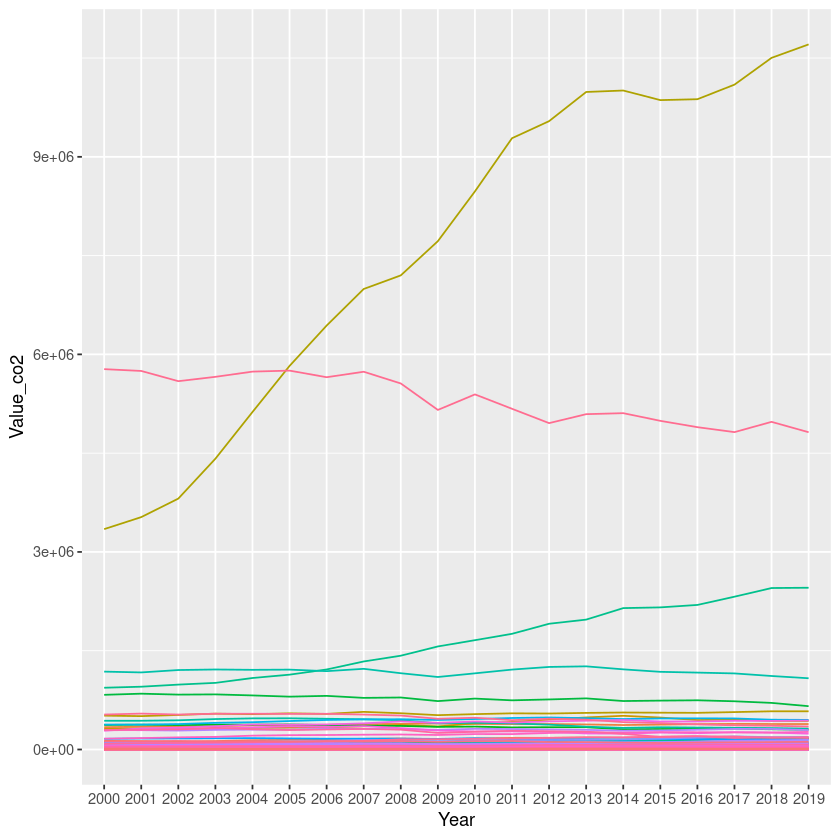

In [17]:
ggplot(complete_energy) + 
  aes(x = Year, y = Value_co2, color = Entity, group = Entity) + 
  geom_line(show.legend = FALSE) 
#complete energy avec les valeurs transformées mais on garde value_Co2
#parfoisun groupe contient une seule observation et je pense que cela ne s'affiche donc pas 

In [18]:
paste('ecart type')
sd(complete_energy$Value_co2)
paste('moyenne :')
mean(complete_energy$Value_co2)
paste('min')
min(complete_energy$Value_co2)
paste('max')
max(complete_energy$Value_co2)

[1] "ecart type"

[1] 818020.2

[1] "moyenne :"

[1] 168818.2

[1] "min"

[1] 30

[1] "max"

[1] 10707220

Ici nous pouvons observer que l'écart type de la variable Value CO2 est très grande, ce qui témoigne d'une hétérogéneité des valeurs par rapport à la répartition moyenne. De plus le graphique que les 5 pays ayant une emission de CO2 la plus importante sont : Chine / Etats-Unis / Inde / Japon / Allemagne

### Les pays les plus émetteurs de CO2

Entity         Value_co2
28  China          7636642.5
143 United States  5329538.5
63  India          1633979.0
69  Japan          1183734.5
51  Germany         773644.5
25  Canada          547644.5
142 United Kingdom  470604.0
86  Mexico          444619.5
67  Italy           399400.5
124 South Africa    398041.5

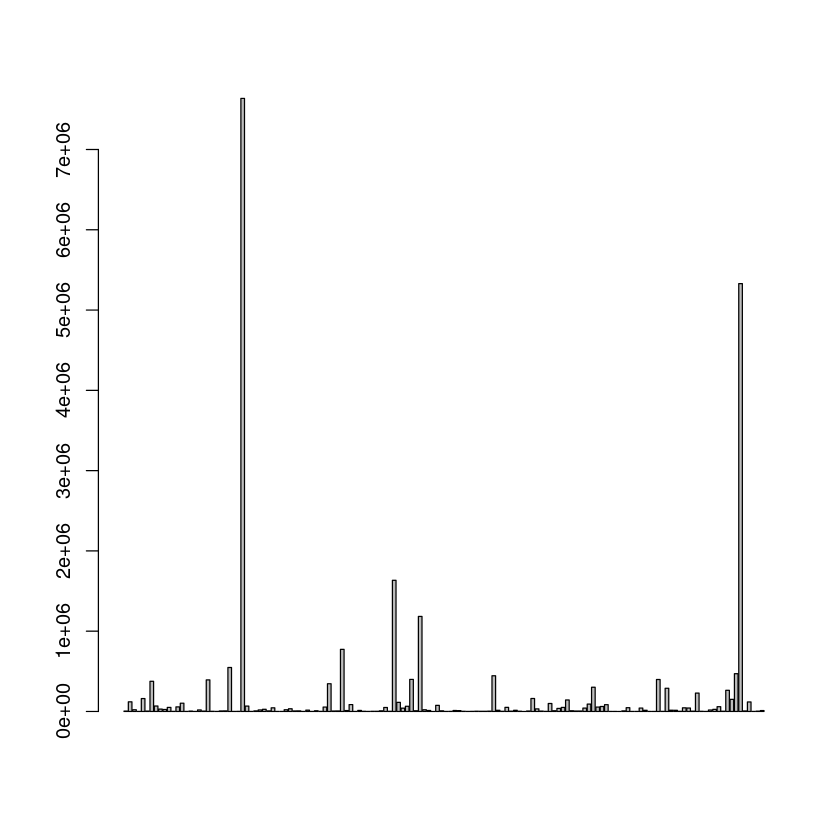

In [19]:
Moy = aggregate(data=complete_energy,Value_co2~Entity,FUN=mean)
index = order(Moy$Value_co2, decreasing = TRUE )
Moy_classe = Moy[index,]
head(Moy_classe,10)
barplot(Moy[,2])

## Question 4

### Analyse descriptive unidimensionnelle

#### Variables qualitatives : Year et Entity 


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
 137  138  140  141  141  141  141  144  144  144  145  145  144  145  147  147 
2016 2017 2018 2019 2020 
 146  146  146  146    0 


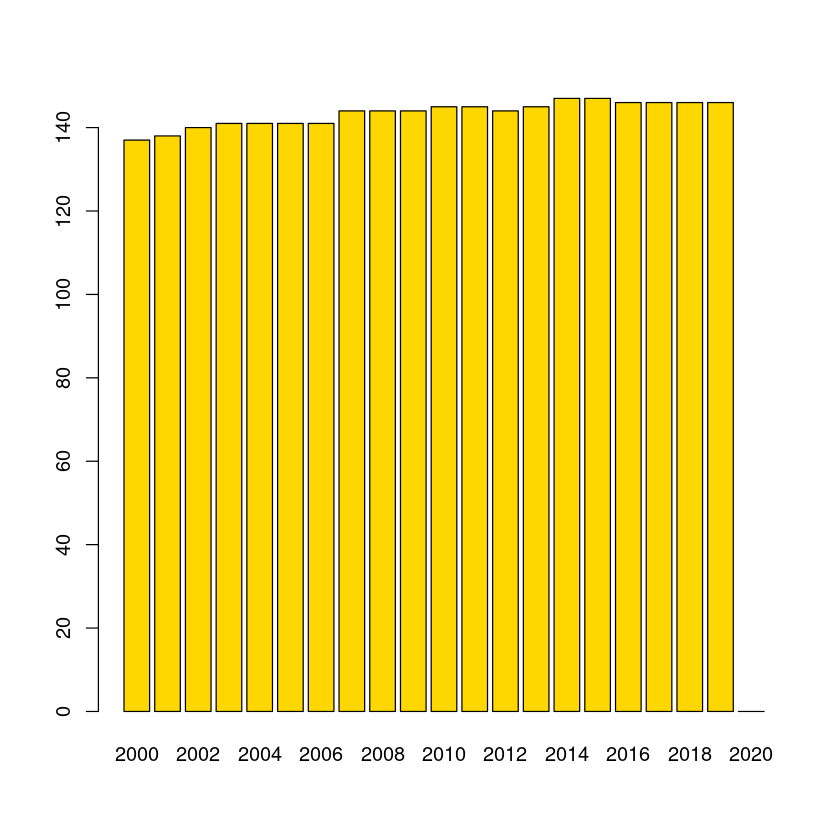

In [20]:
occ_y = table(complete_energy$Year)
print(occ_y)
barplot(occ_y, col="gold")

Chaque année n'a pas le même nombre d'observations.

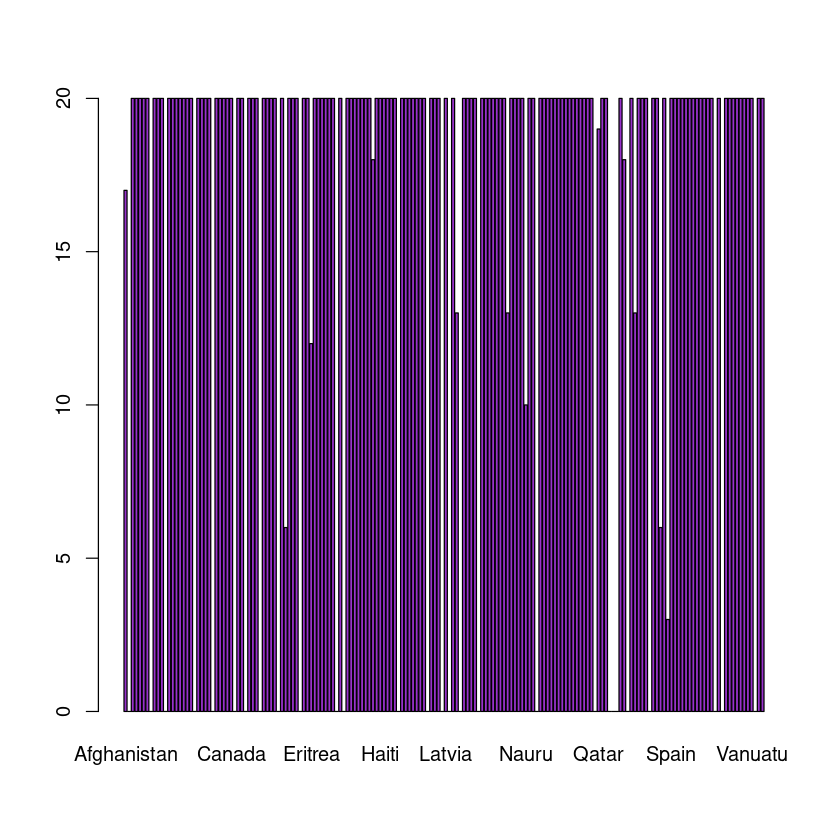

In [21]:
occ_e = table(complete_energy$Entity)
#print(occ_e)
barplot(occ_e,col = "darkorchid")


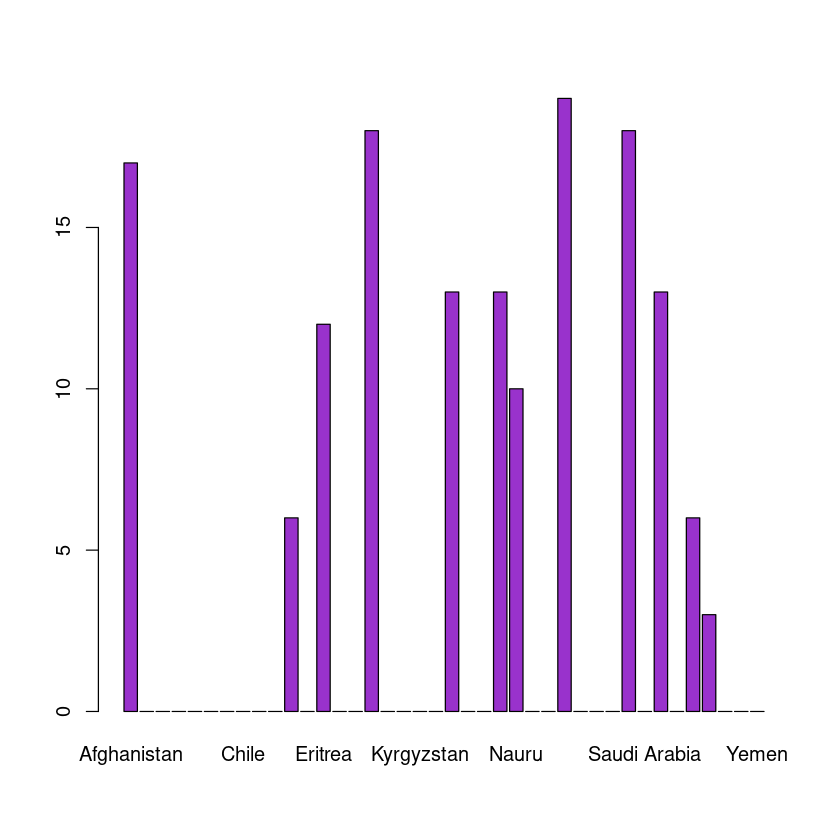

In [22]:
occ_e20 = occ_e[occ_e<20]
barplot(occ_e20,col = "darkorchid")

Chaque pays n'a pas le même nombre d'observations. Il y en a 12 qui n'ont pas été observés durant les 20 années de l'étude

#### Pour les variables quantitatives

In [23]:
summary(complete_energy)

                 Entity          Year       Access_elec       Access_fuels   
 Algeria            :  20   2014   : 147   Min.   :  1.252   Min.   :  0.00  
 Angola             :  20   2015   : 147   1st Qu.: 53.238   1st Qu.: 22.07  
 Antigua and Barbuda:  20   2016   : 146   Median : 97.000   Median : 81.55  
 Argentina          :  20   2017   : 146   Mean   : 76.585   Mean   : 62.17  
 Armenia            :  20   2018   : 146   3rd Qu.:100.000   3rd Qu.:100.00  
 Australia          :  20   2019   : 146   Max.   :100.000   Max.   :100.00  
 (Other)            :2748   (Other):1990                                     
 Renewable_energy  Elec_fossil        Elec_nuclear      Elec_renew     
 Min.   : 0.000   Min.   :   0.000   Min.   :  0.00   Min.   :   0.00  
 1st Qu.: 9.188   1st Qu.:   0.290   1st Qu.:  0.00   1st Qu.:   0.09  
 Median :28.790   Median :   2.995   Median :  0.00   Median :   1.68  
 Mean   :35.802   Mean   :  76.694   Mean   : 15.34   Mean   :  26.60  
 3rd Qu.:60.667 

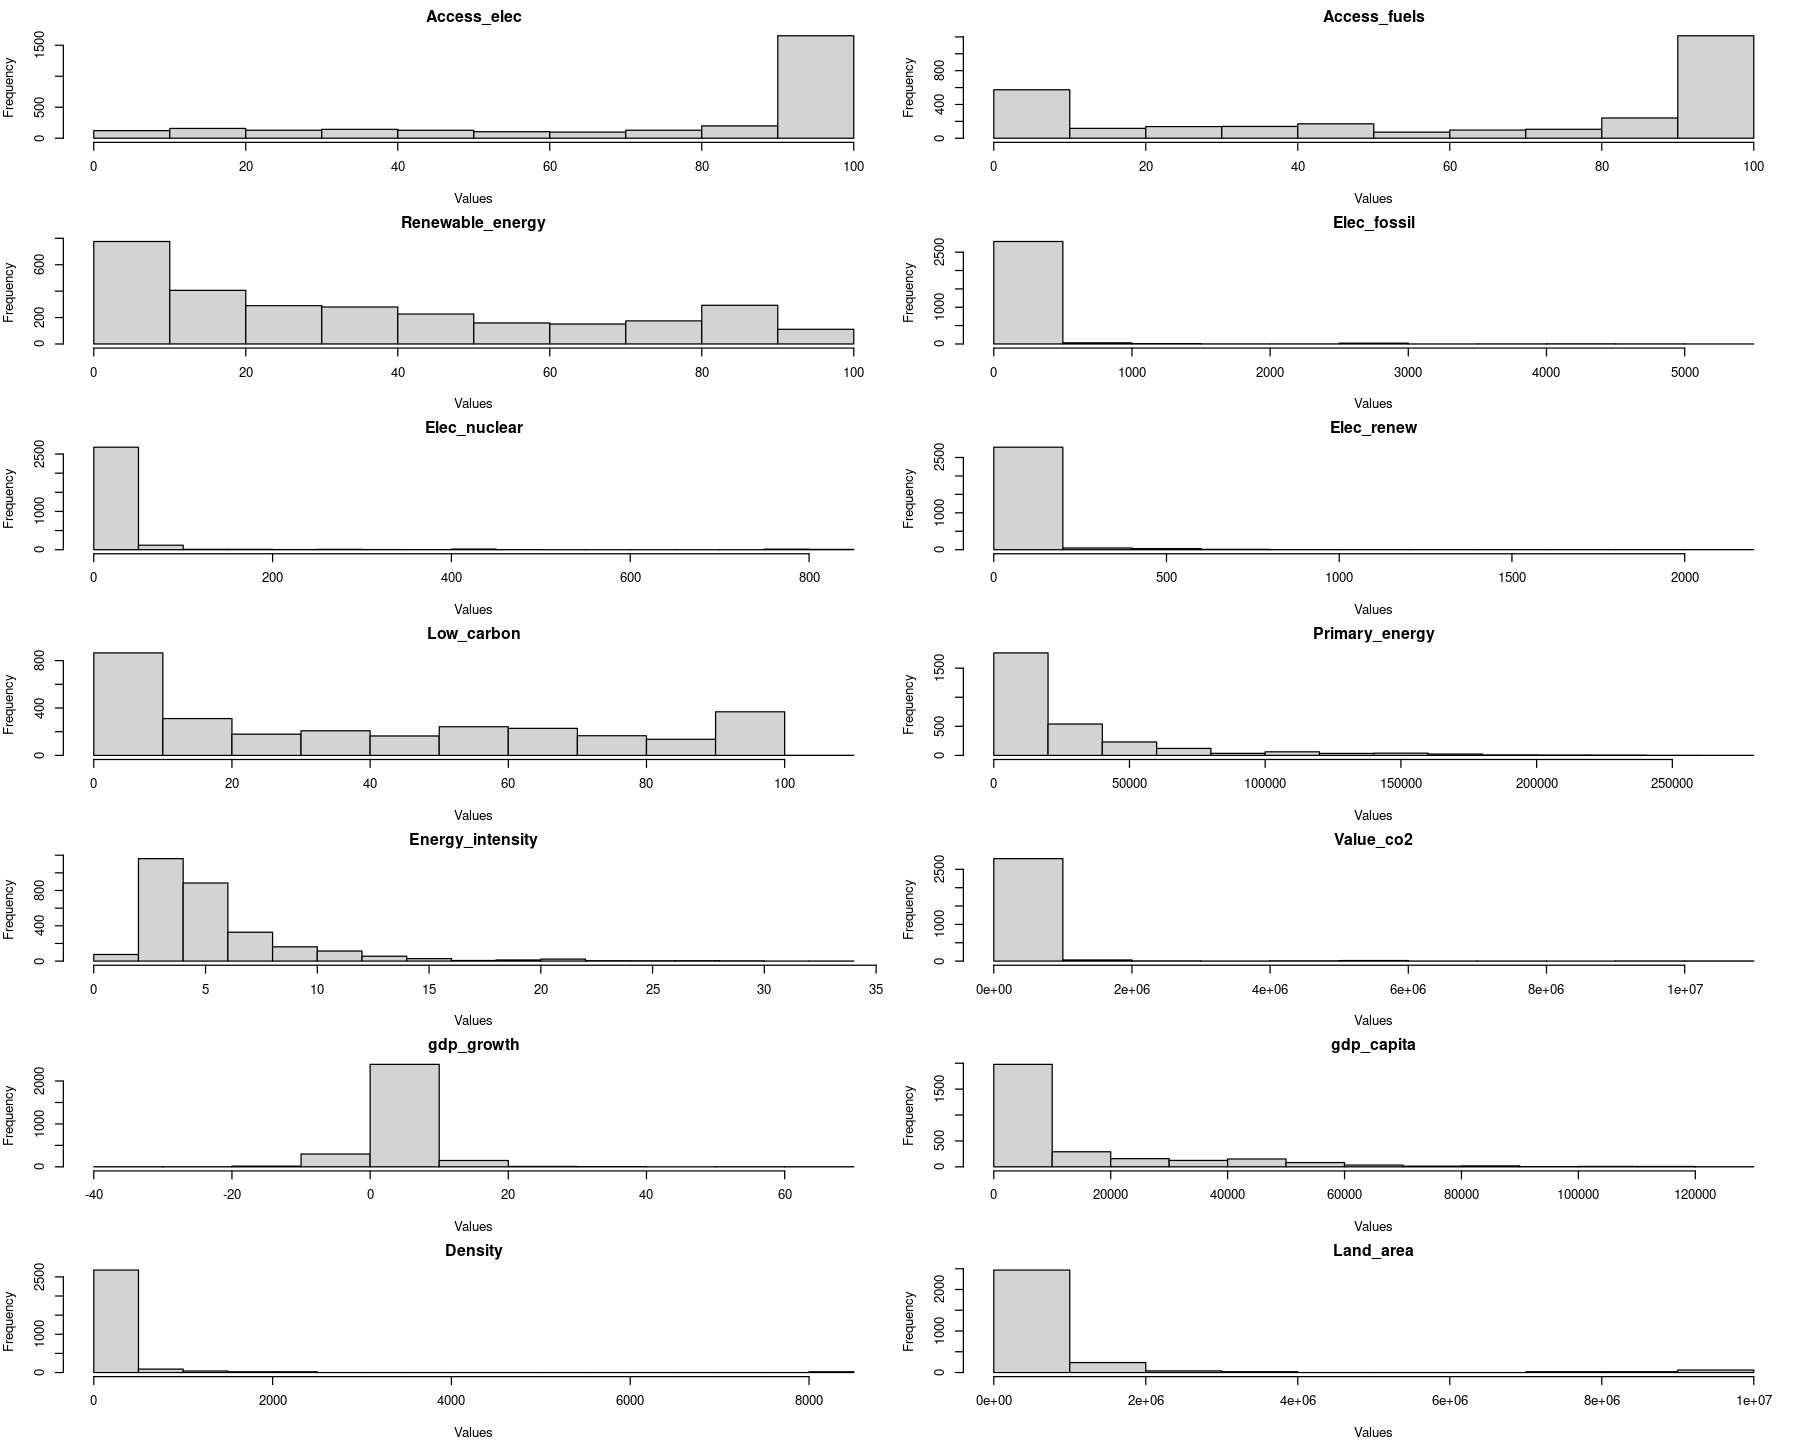

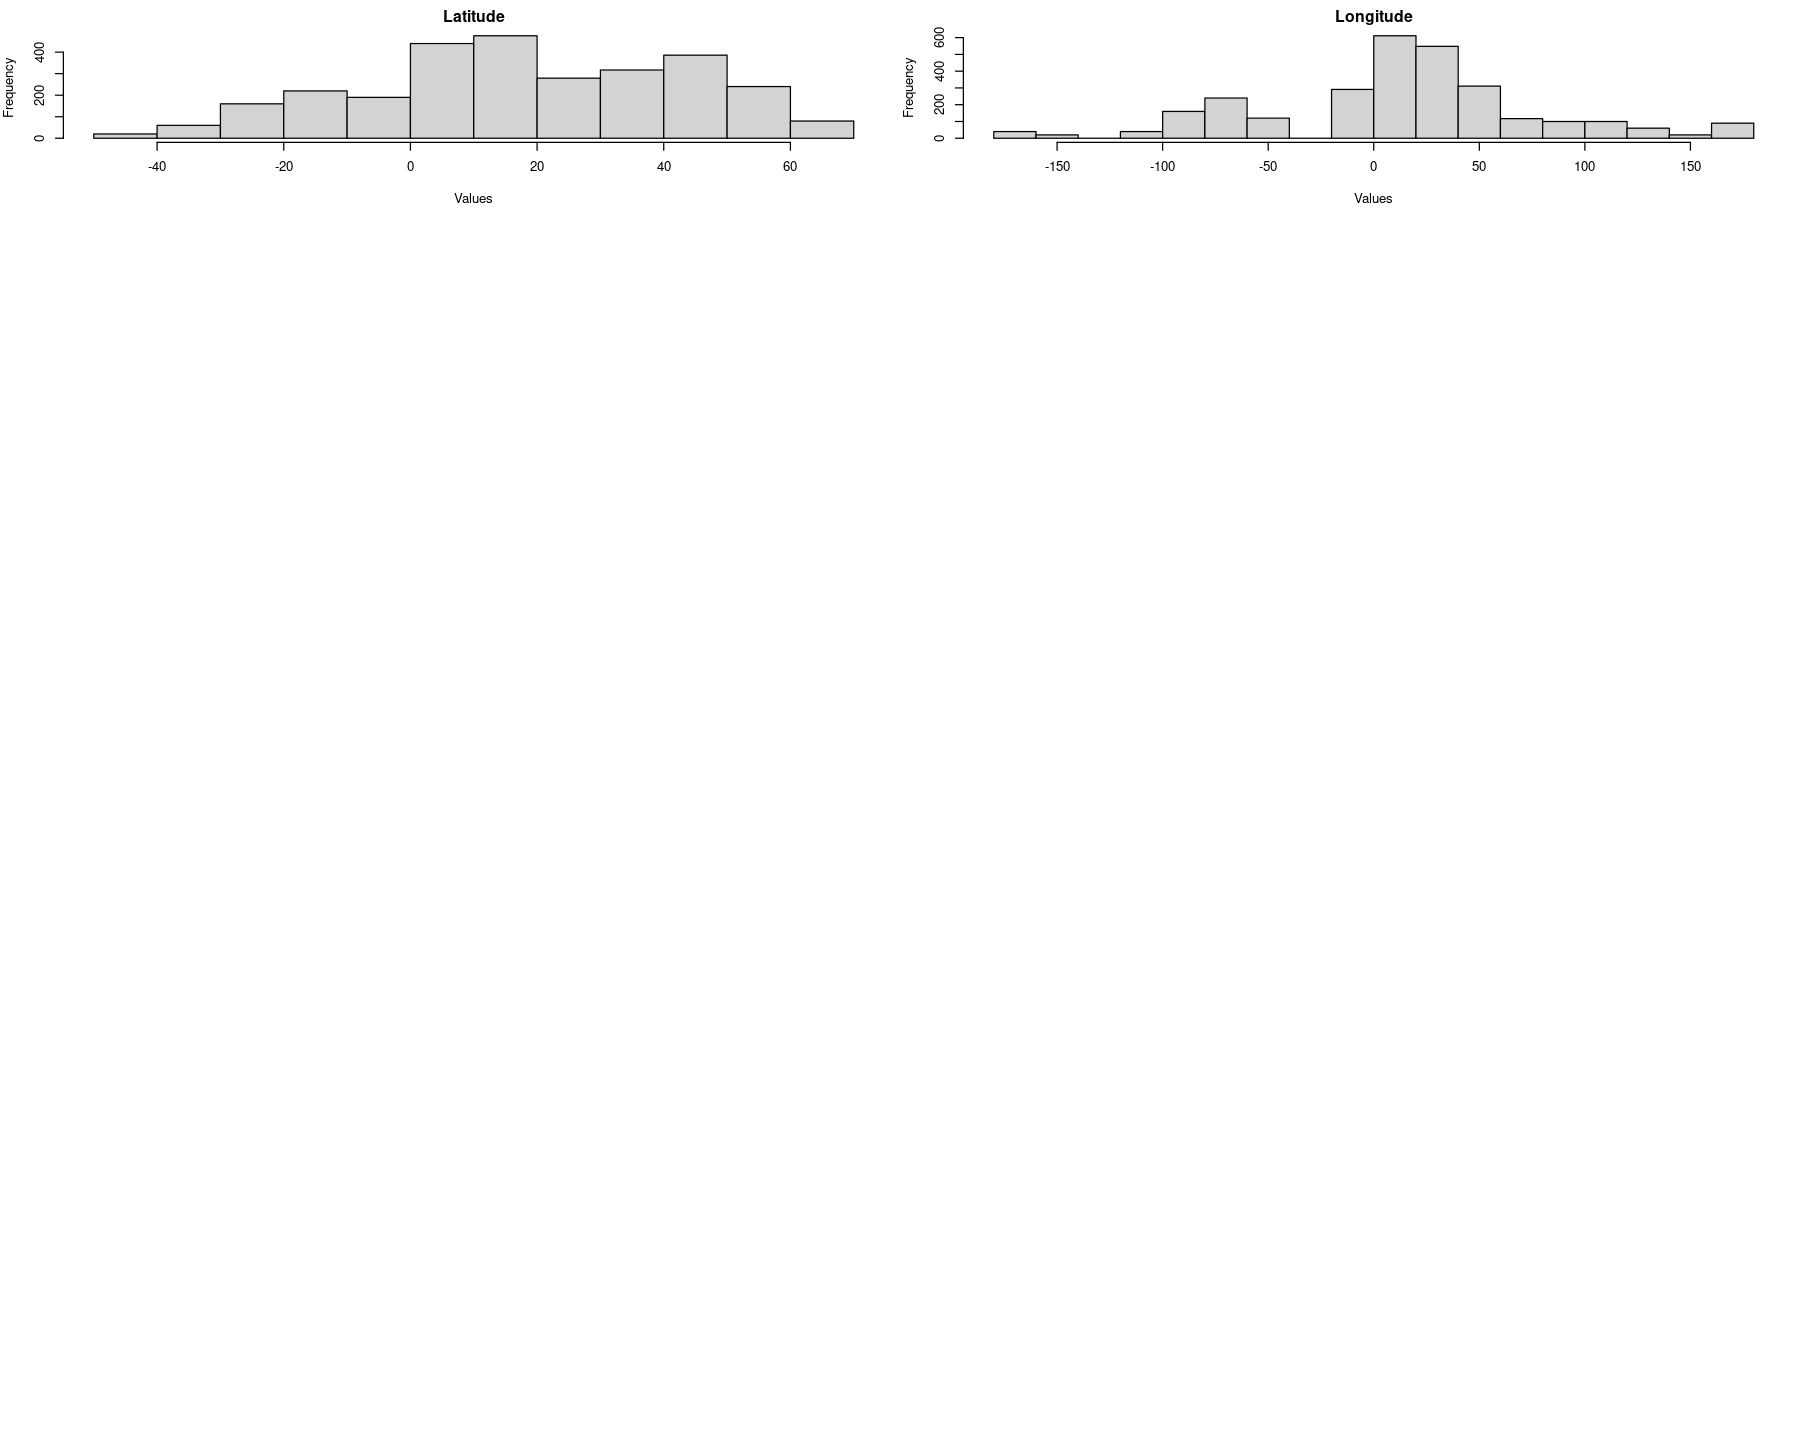

In [24]:
options(repr.plot.width = 15, repr.plot.height = 12)
par(mfrow = c(7,2) , mar = c(4,4,2,1))

for (i in 3:length(names(complete_energy))) {
    dfi = complete_energy[,c(i)]
    hist(dfi, main=names(complete_energy)[i],xlab='Values')
}

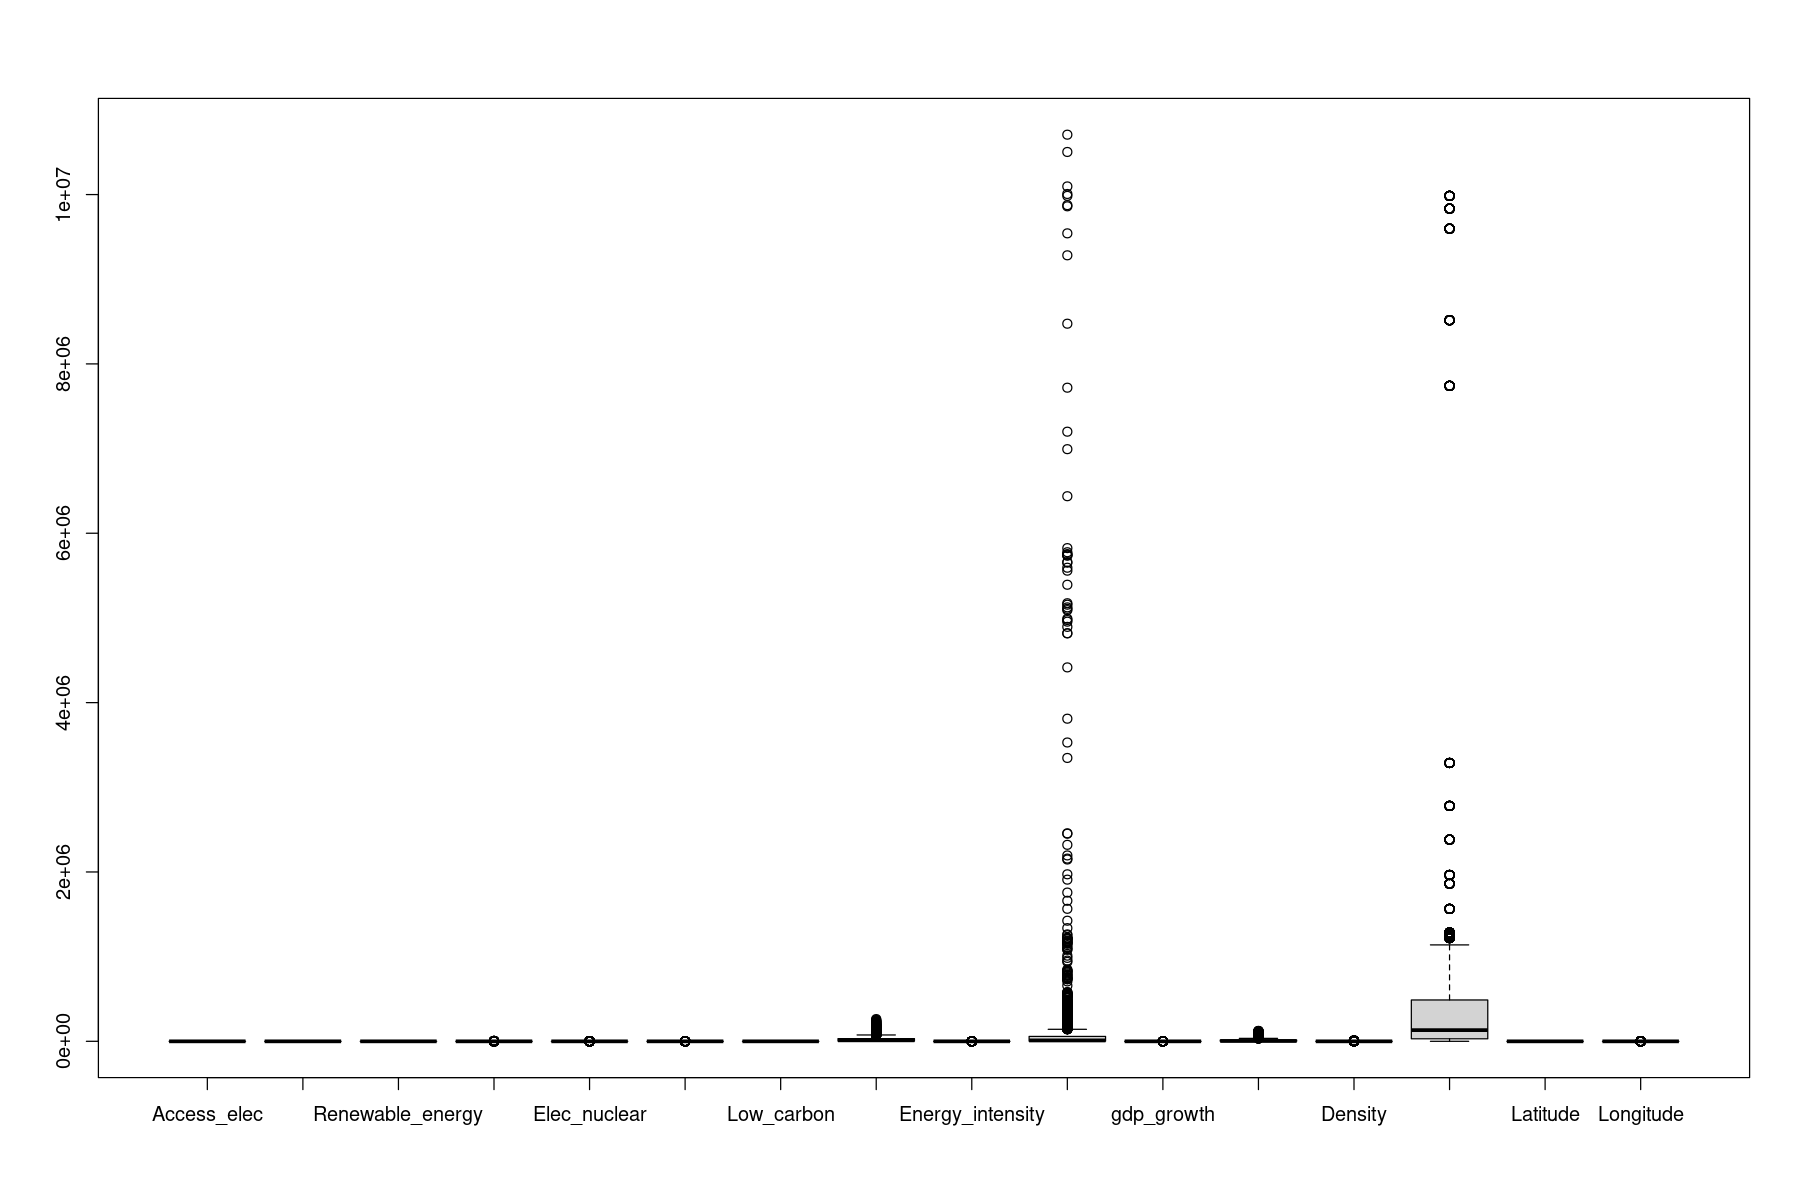

In [25]:
options(repr.plot.width = 15, repr.plot.height = 10)

df = complete_energy[,-c(1,2)]
boxplot(df)

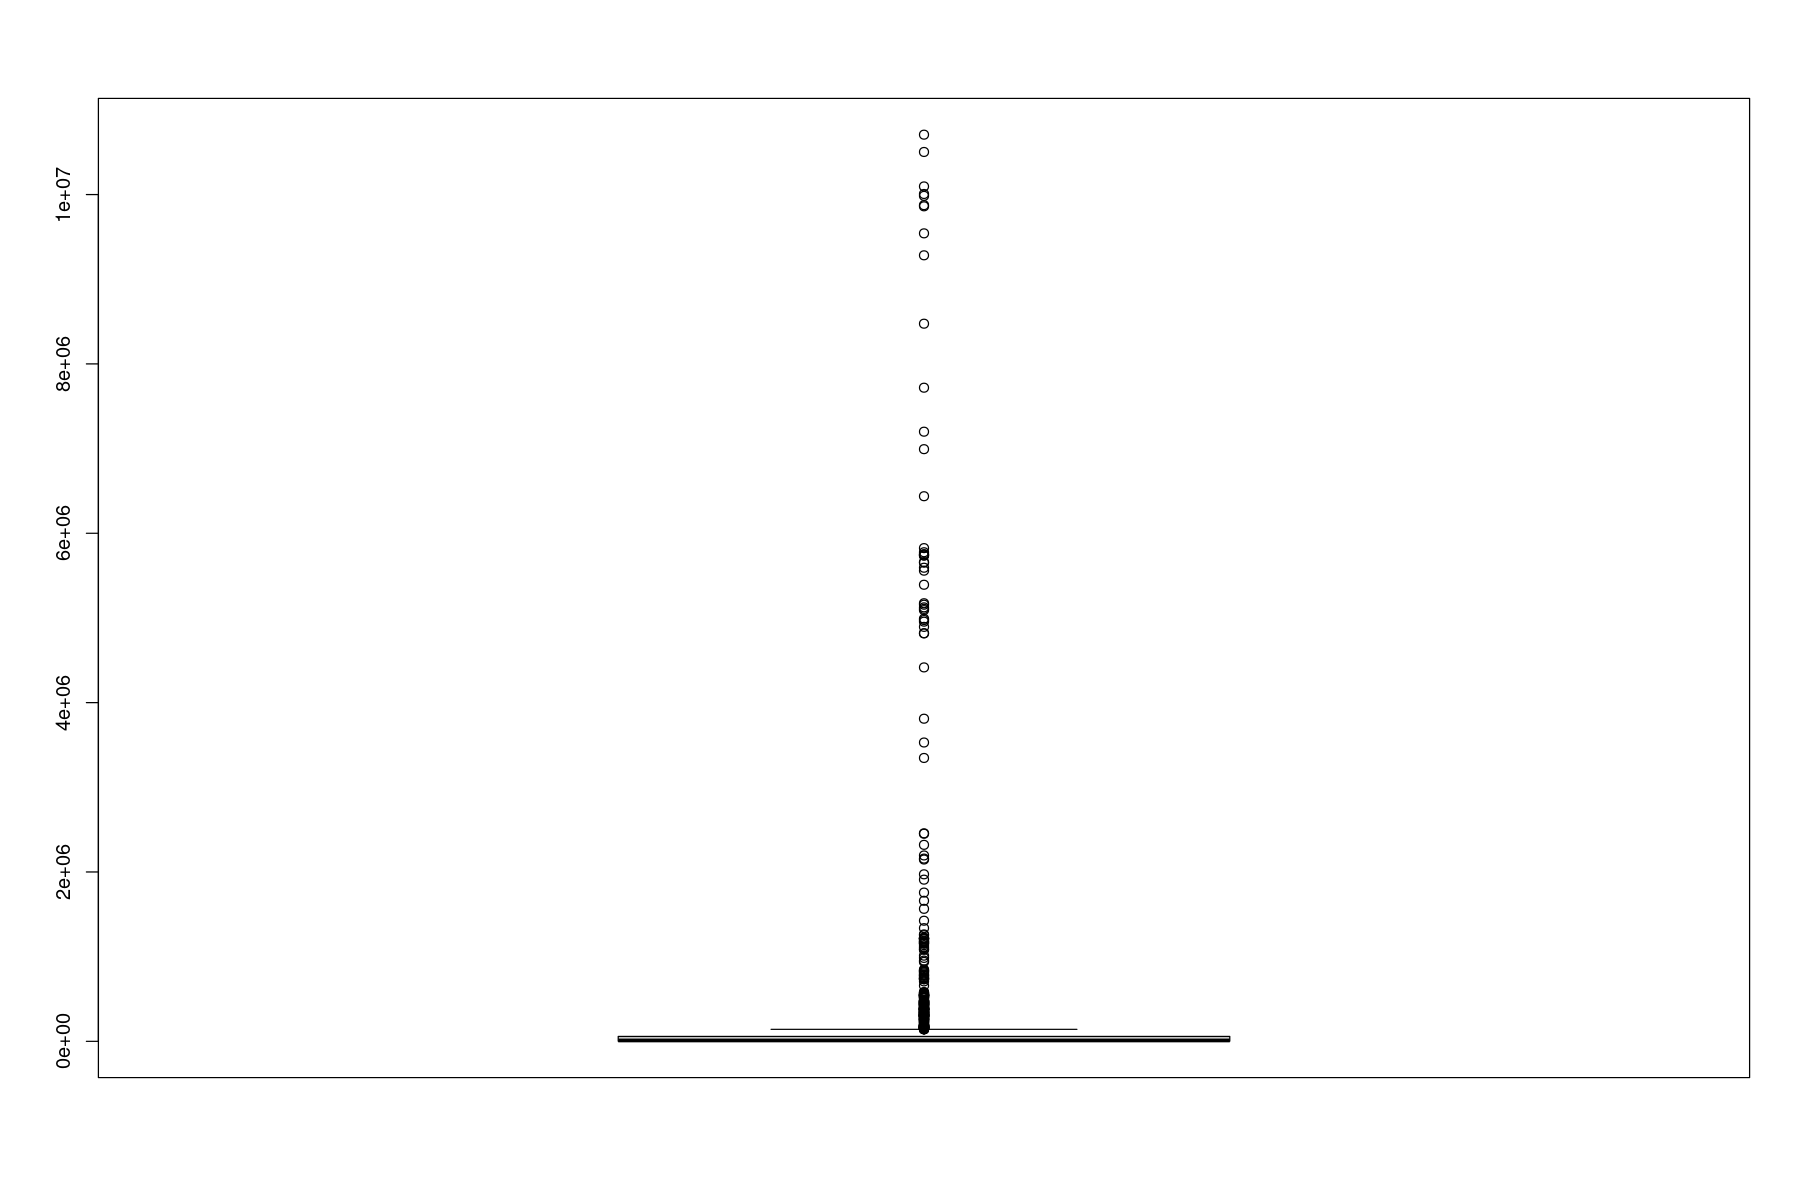

In [26]:
boxplot(df$Value_co2)

Les échelles de valeurs sont très différentes en fonction des variables que nous regardons dans notre energyset, nos avons choisi de nous focaliser sur Value_CO2 et nous voyons que celle-ci est composée de beaucoup d'outliers. Donc l'observation en boxplot n'est pas forcément pertinente.

##### Transformation des variables

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


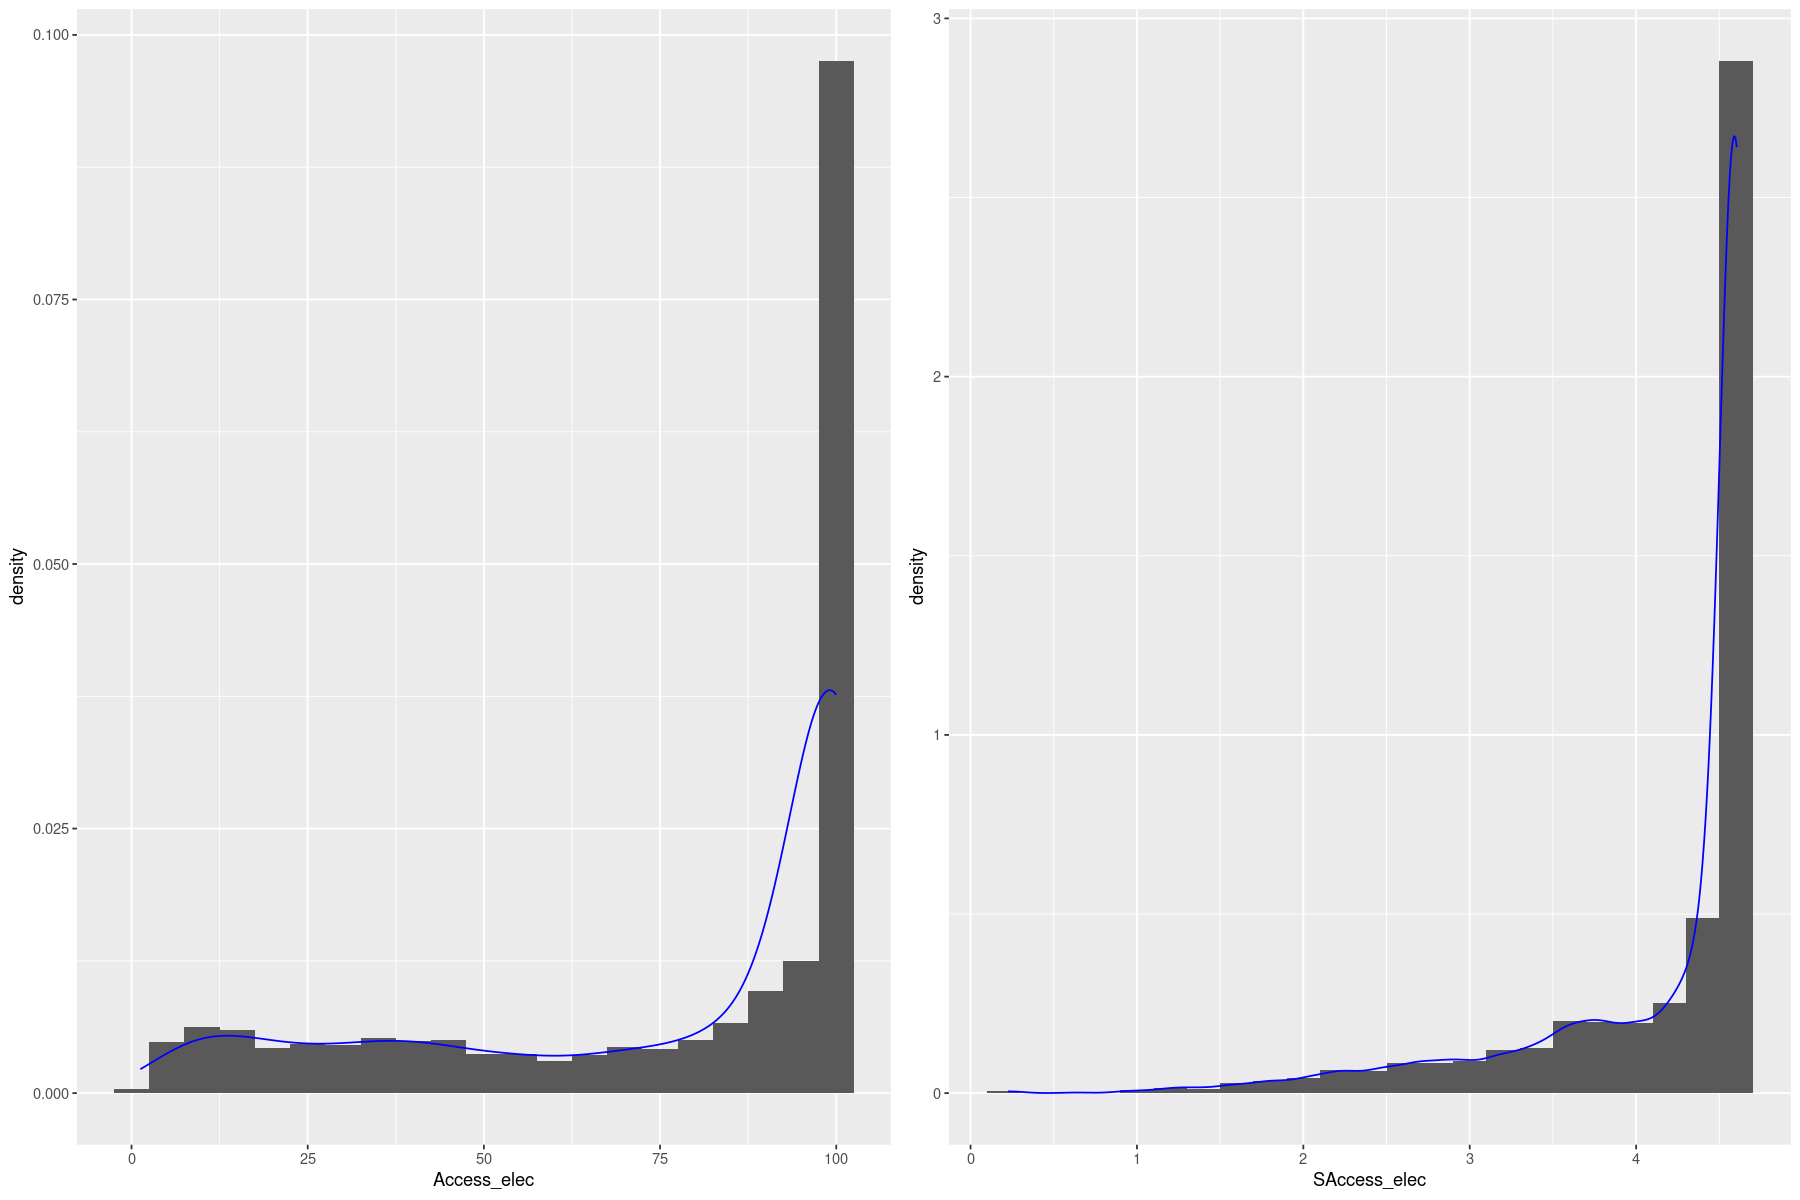

In [27]:
complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

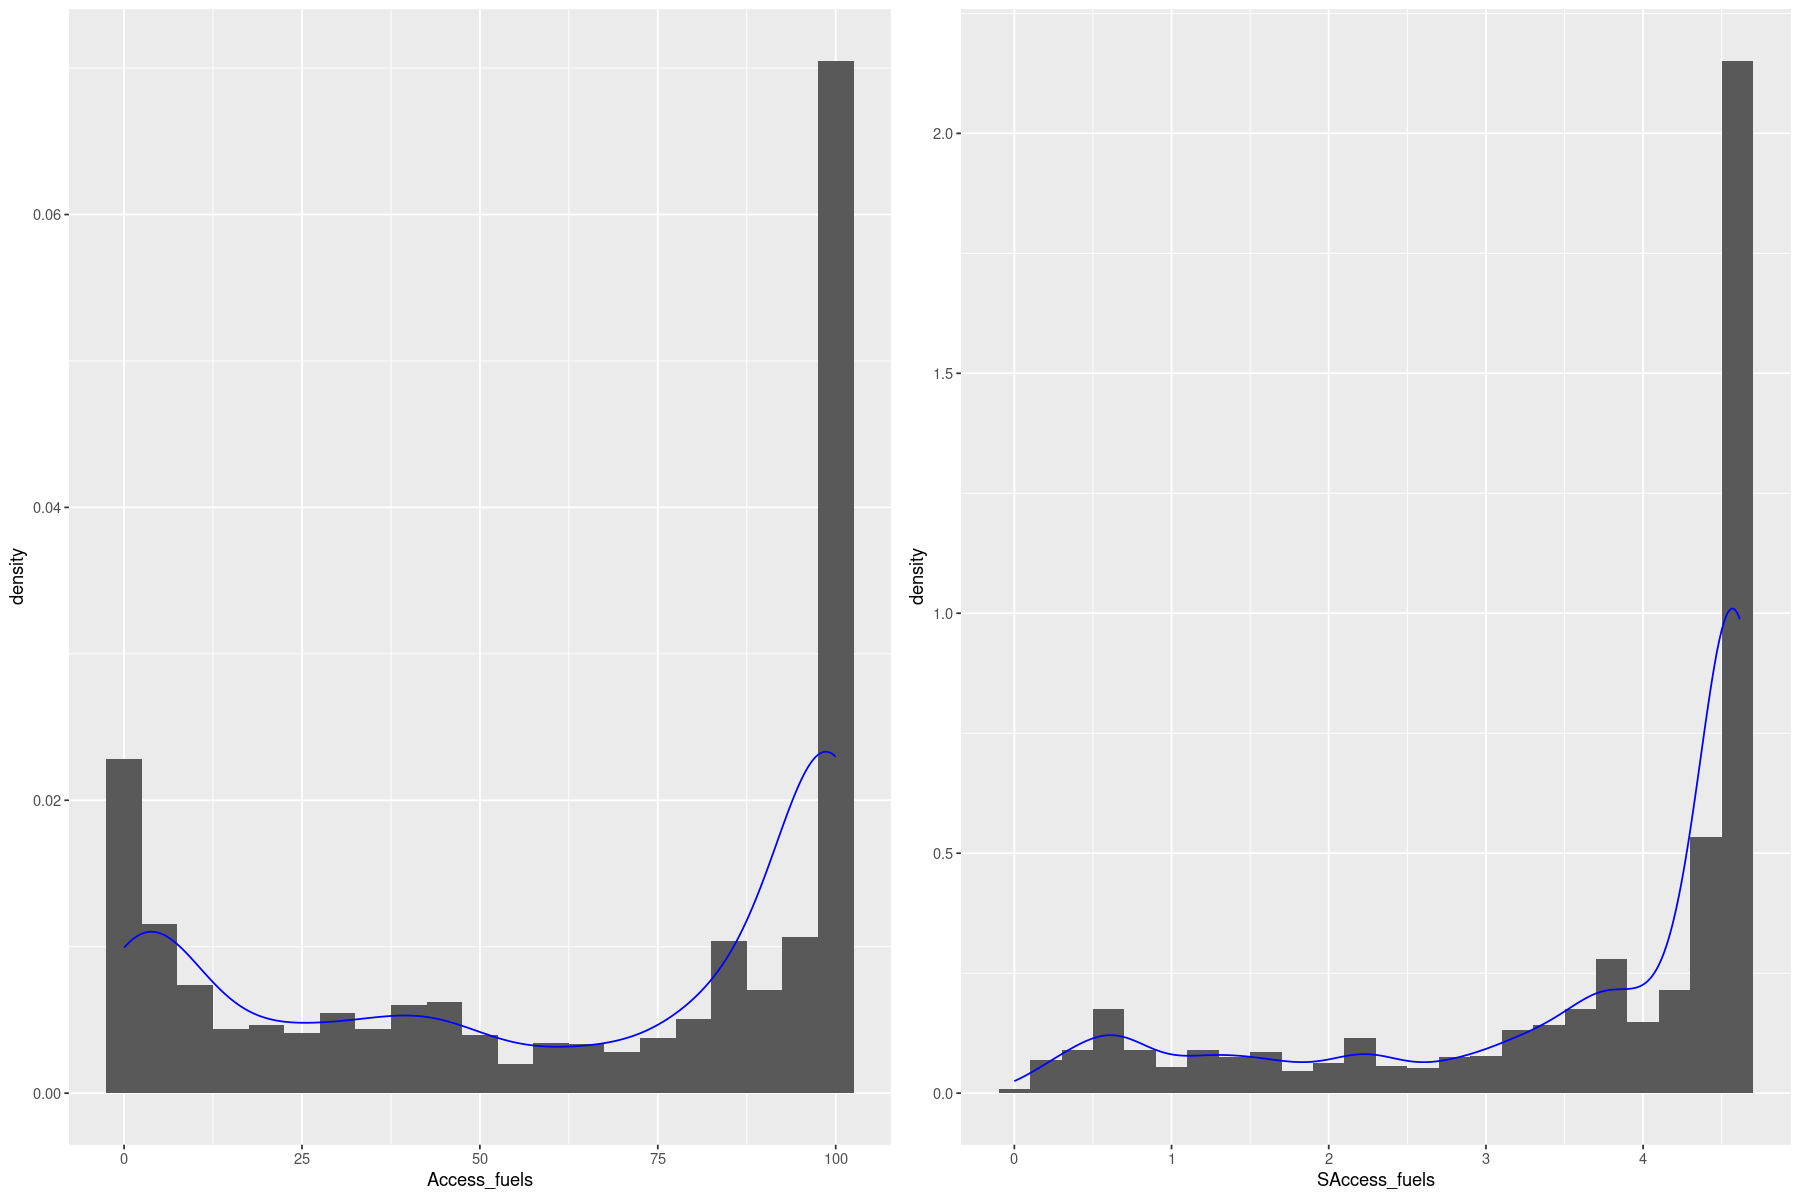

In [28]:
complete_energy[, "SAccess_fuels"] = log(1+complete_energy[, "Access_fuels"])

g1 = ggplot(complete_energy,aes(x=Access_fuels))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_fuels))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

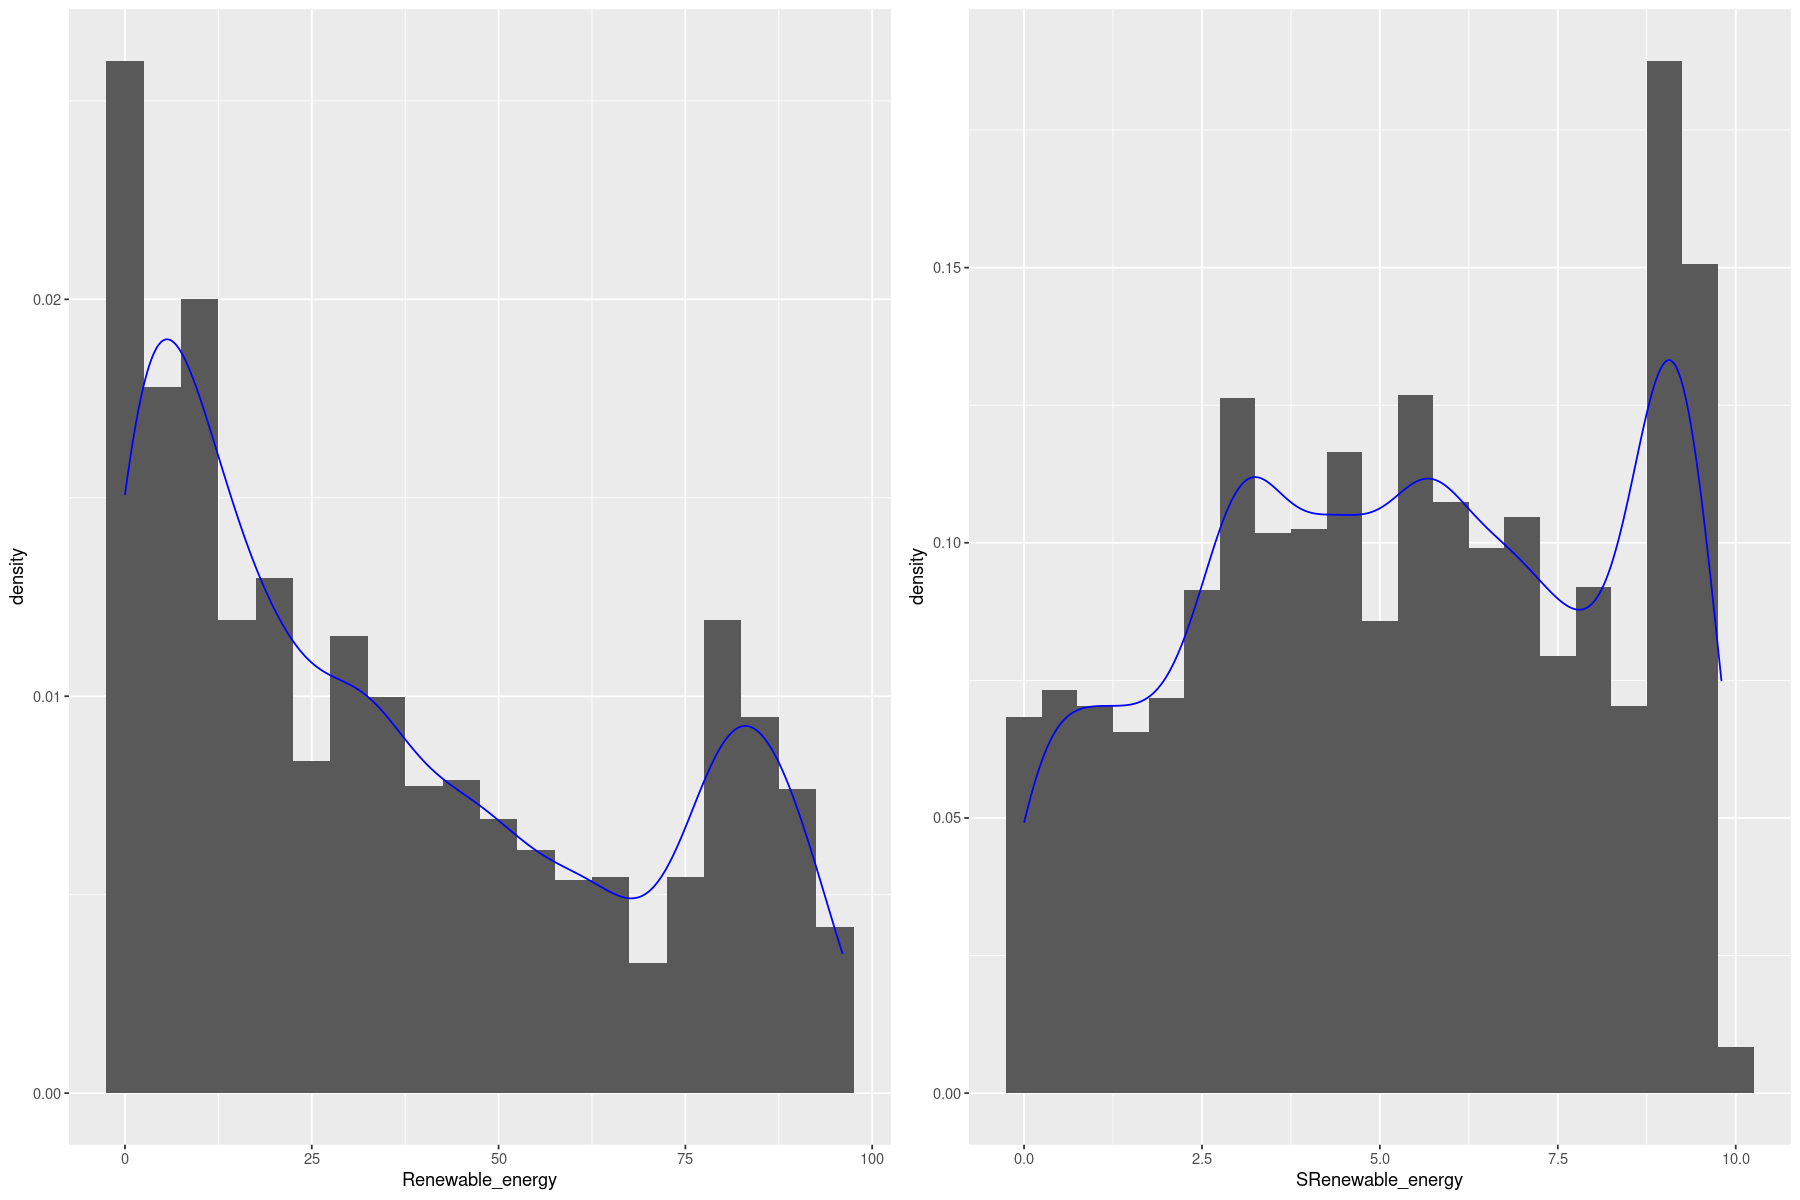

In [29]:
complete_energy[, "SRenewable_energy"] = sqrt(complete_energy[, "Renewable_energy"])

g1 = ggplot(complete_energy,aes(x=Renewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SRenewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 
grid.arrange(g1,g2,ncol=2)

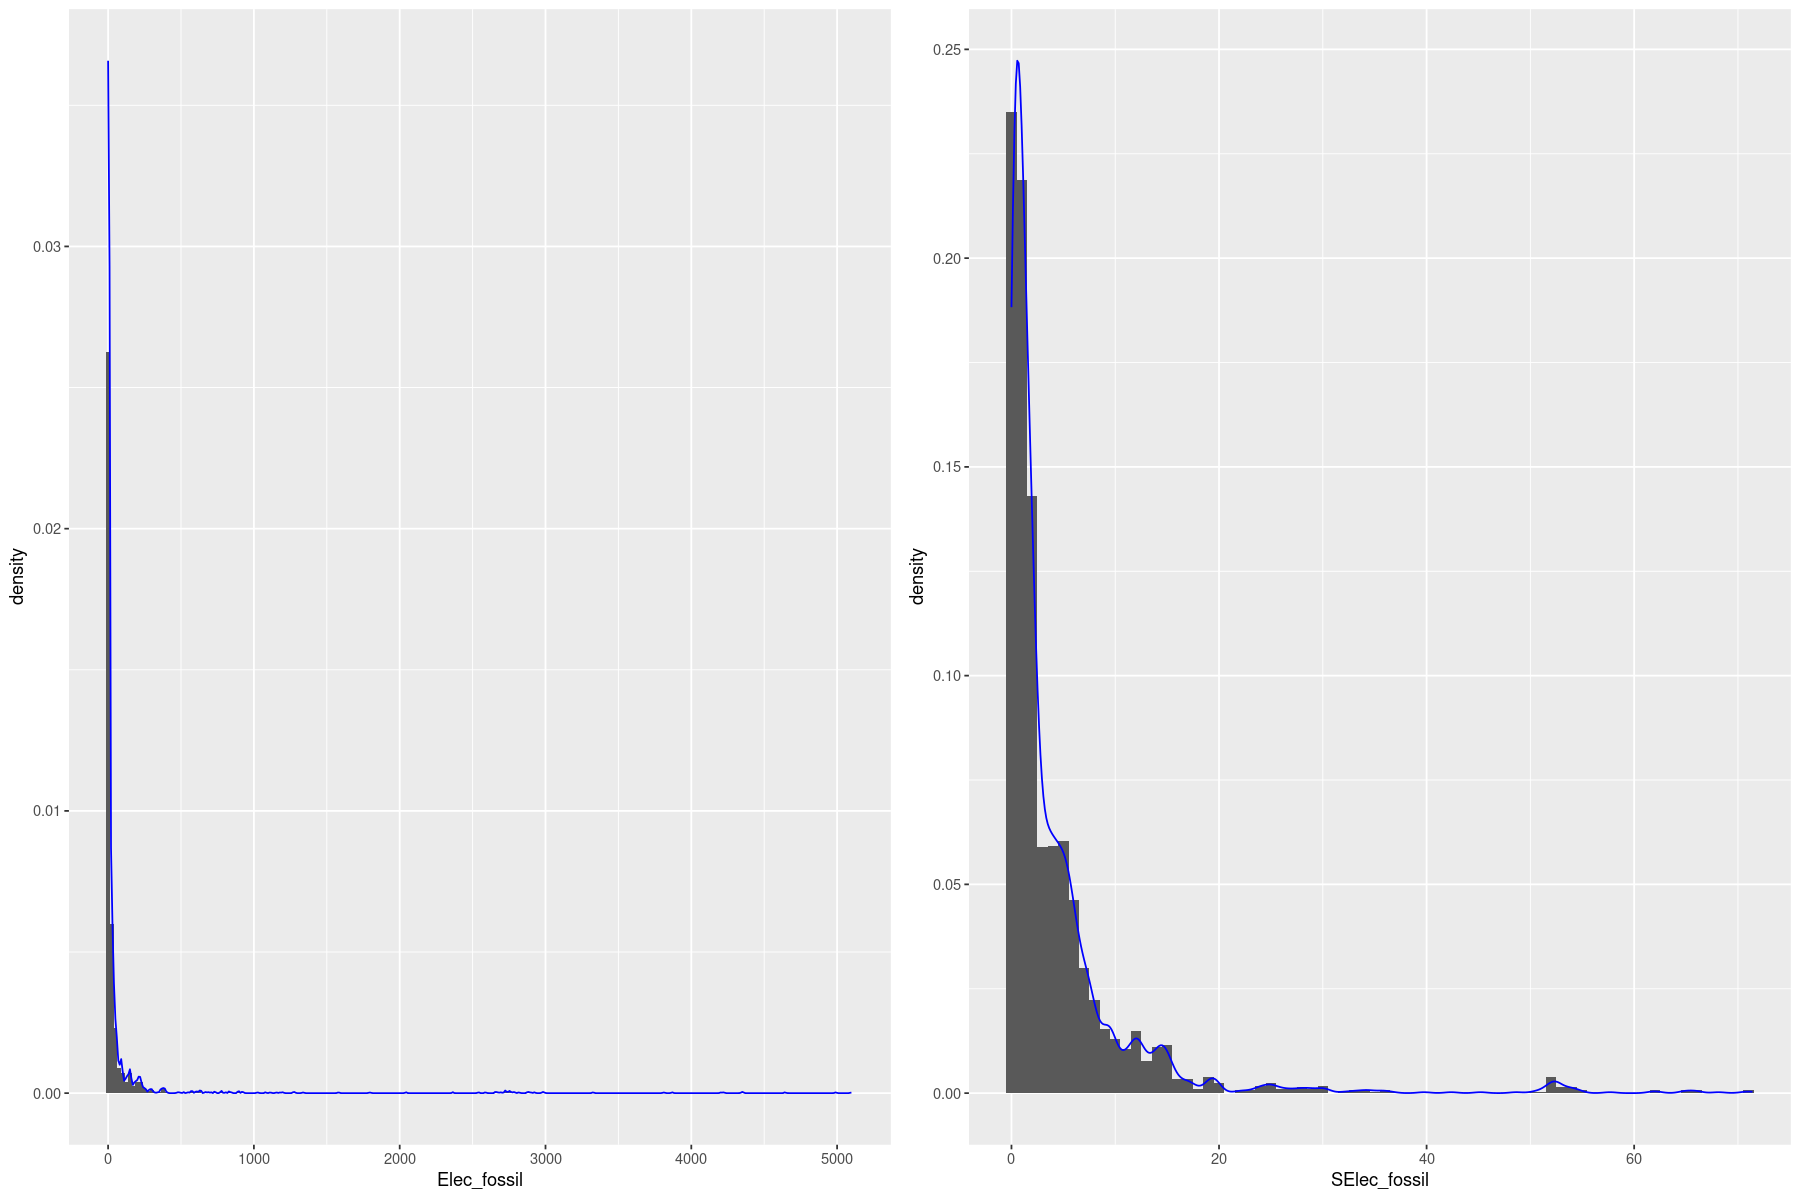

In [30]:
complete_energy[, "SElec_fossil"] = sqrt(complete_energy[, "Elec_fossil"])

g1 = ggplot(complete_energy,aes(x=Elec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

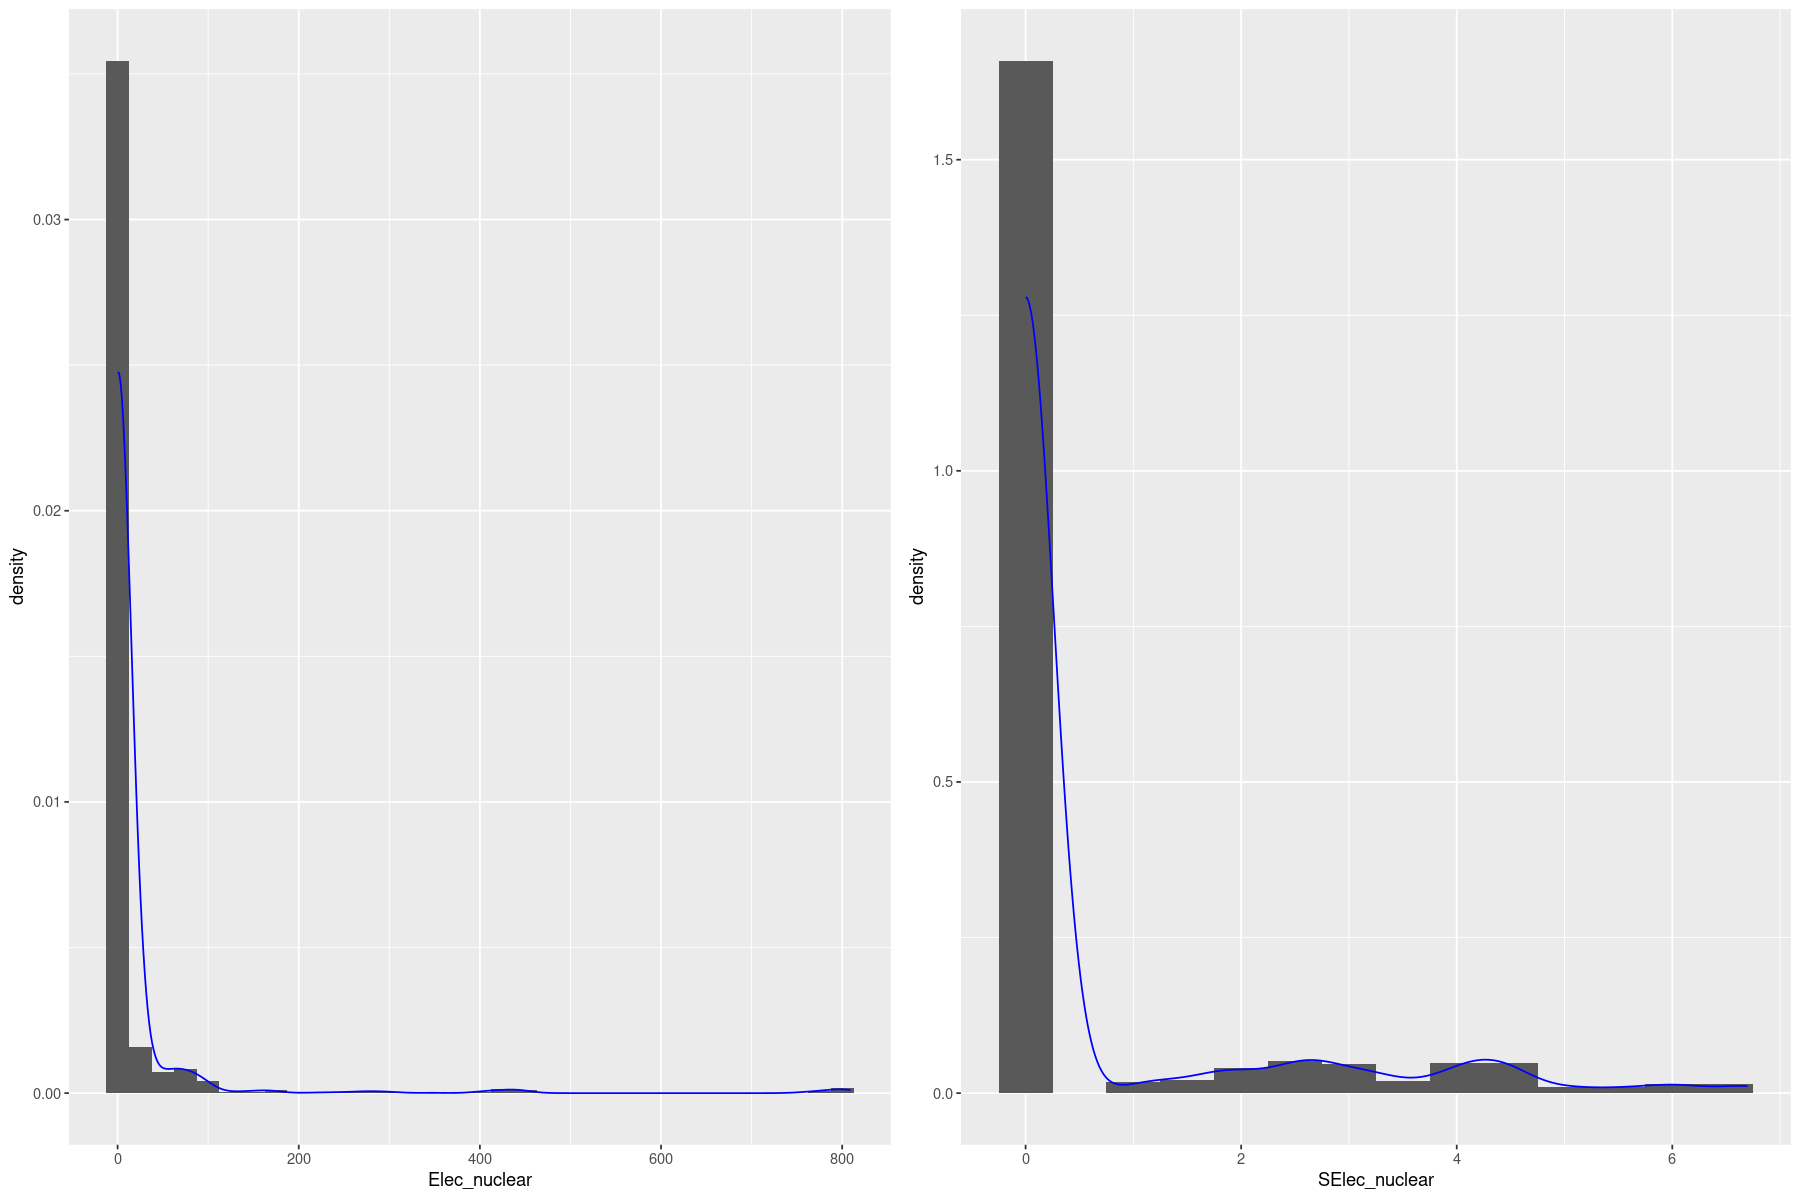

In [31]:
complete_energy[, "SElec_nuclear"] = log(1+complete_energy[, "Elec_nuclear"])

g1 = ggplot(complete_energy,aes(x=Elec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

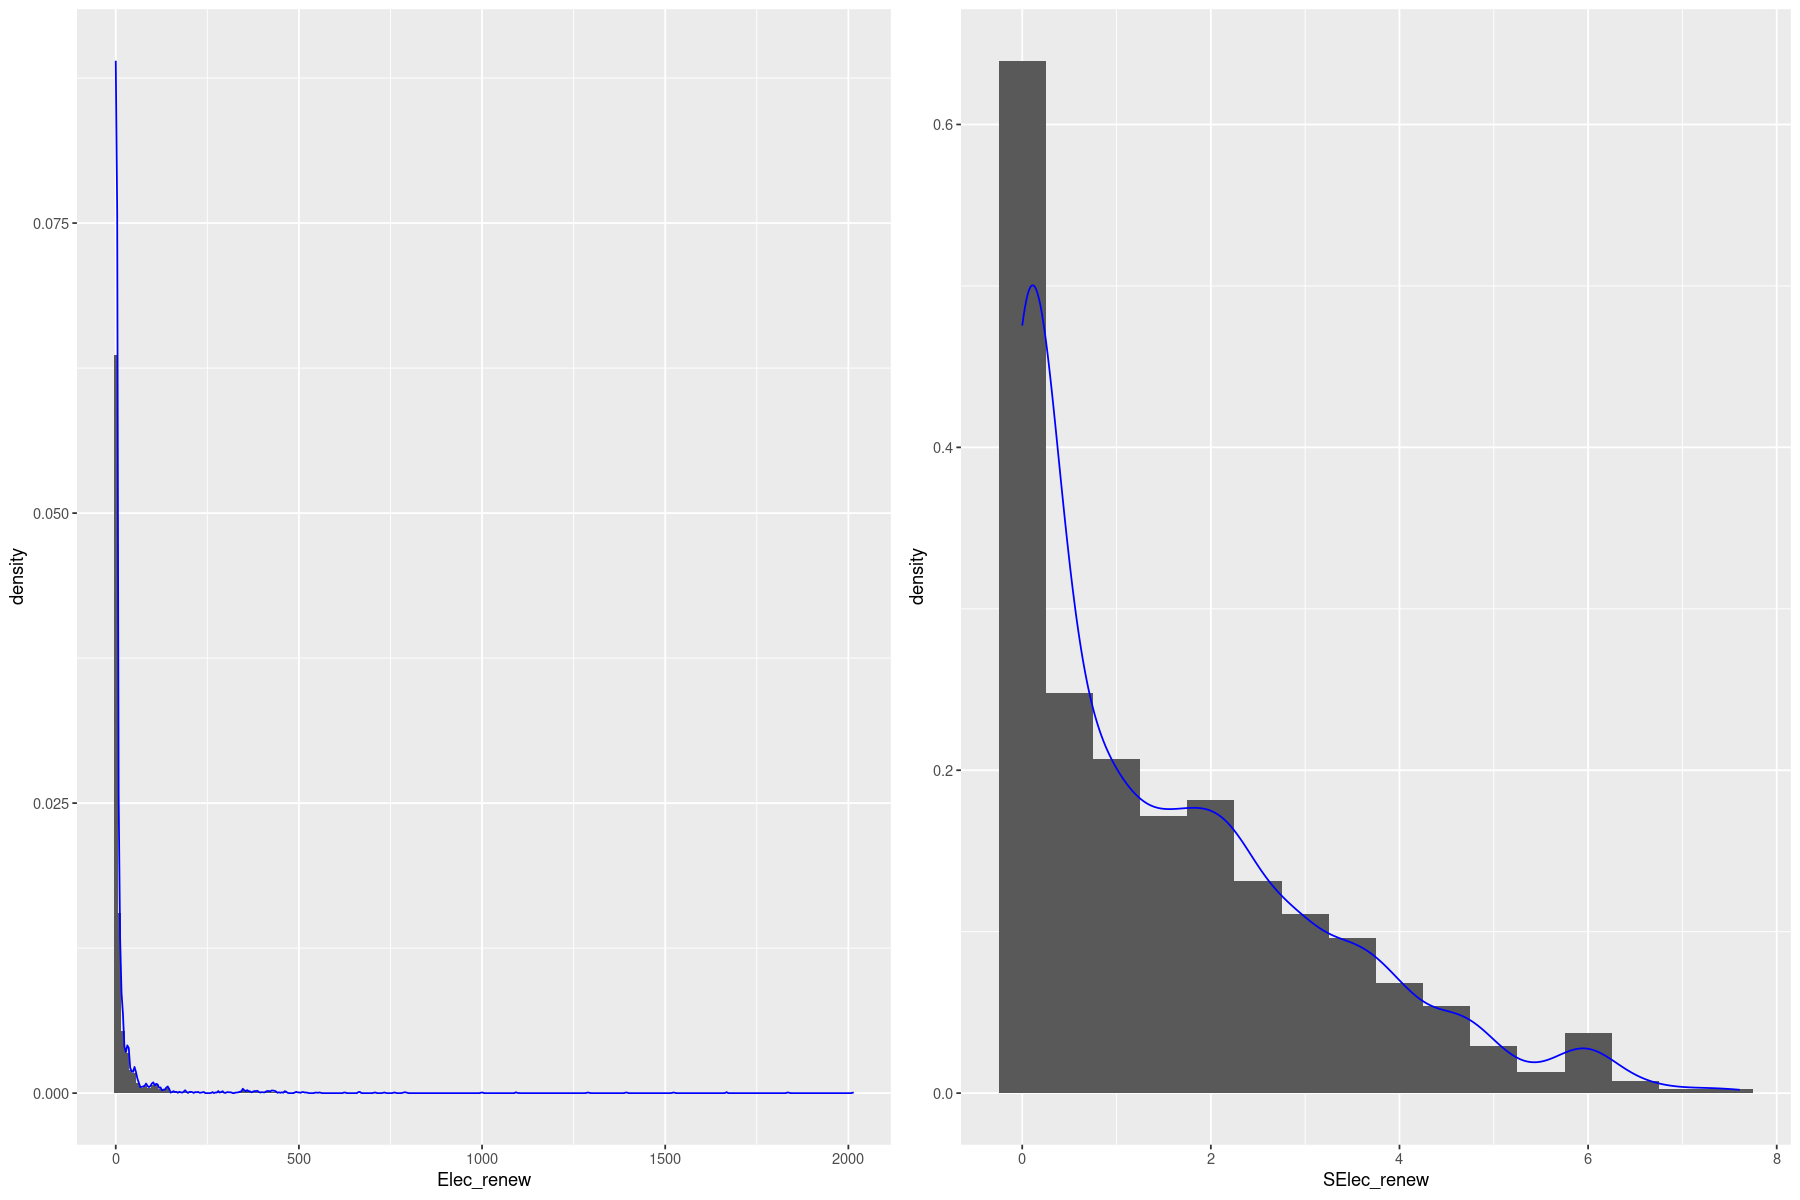

In [32]:
complete_energy[, "SElec_renew"] = log(1+complete_energy[, "Elec_renew"])

g1 = ggplot(complete_energy,aes(x=Elec_renew))+ geom_histogram(aes(y=..density..),binwidth = 10)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_renew))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

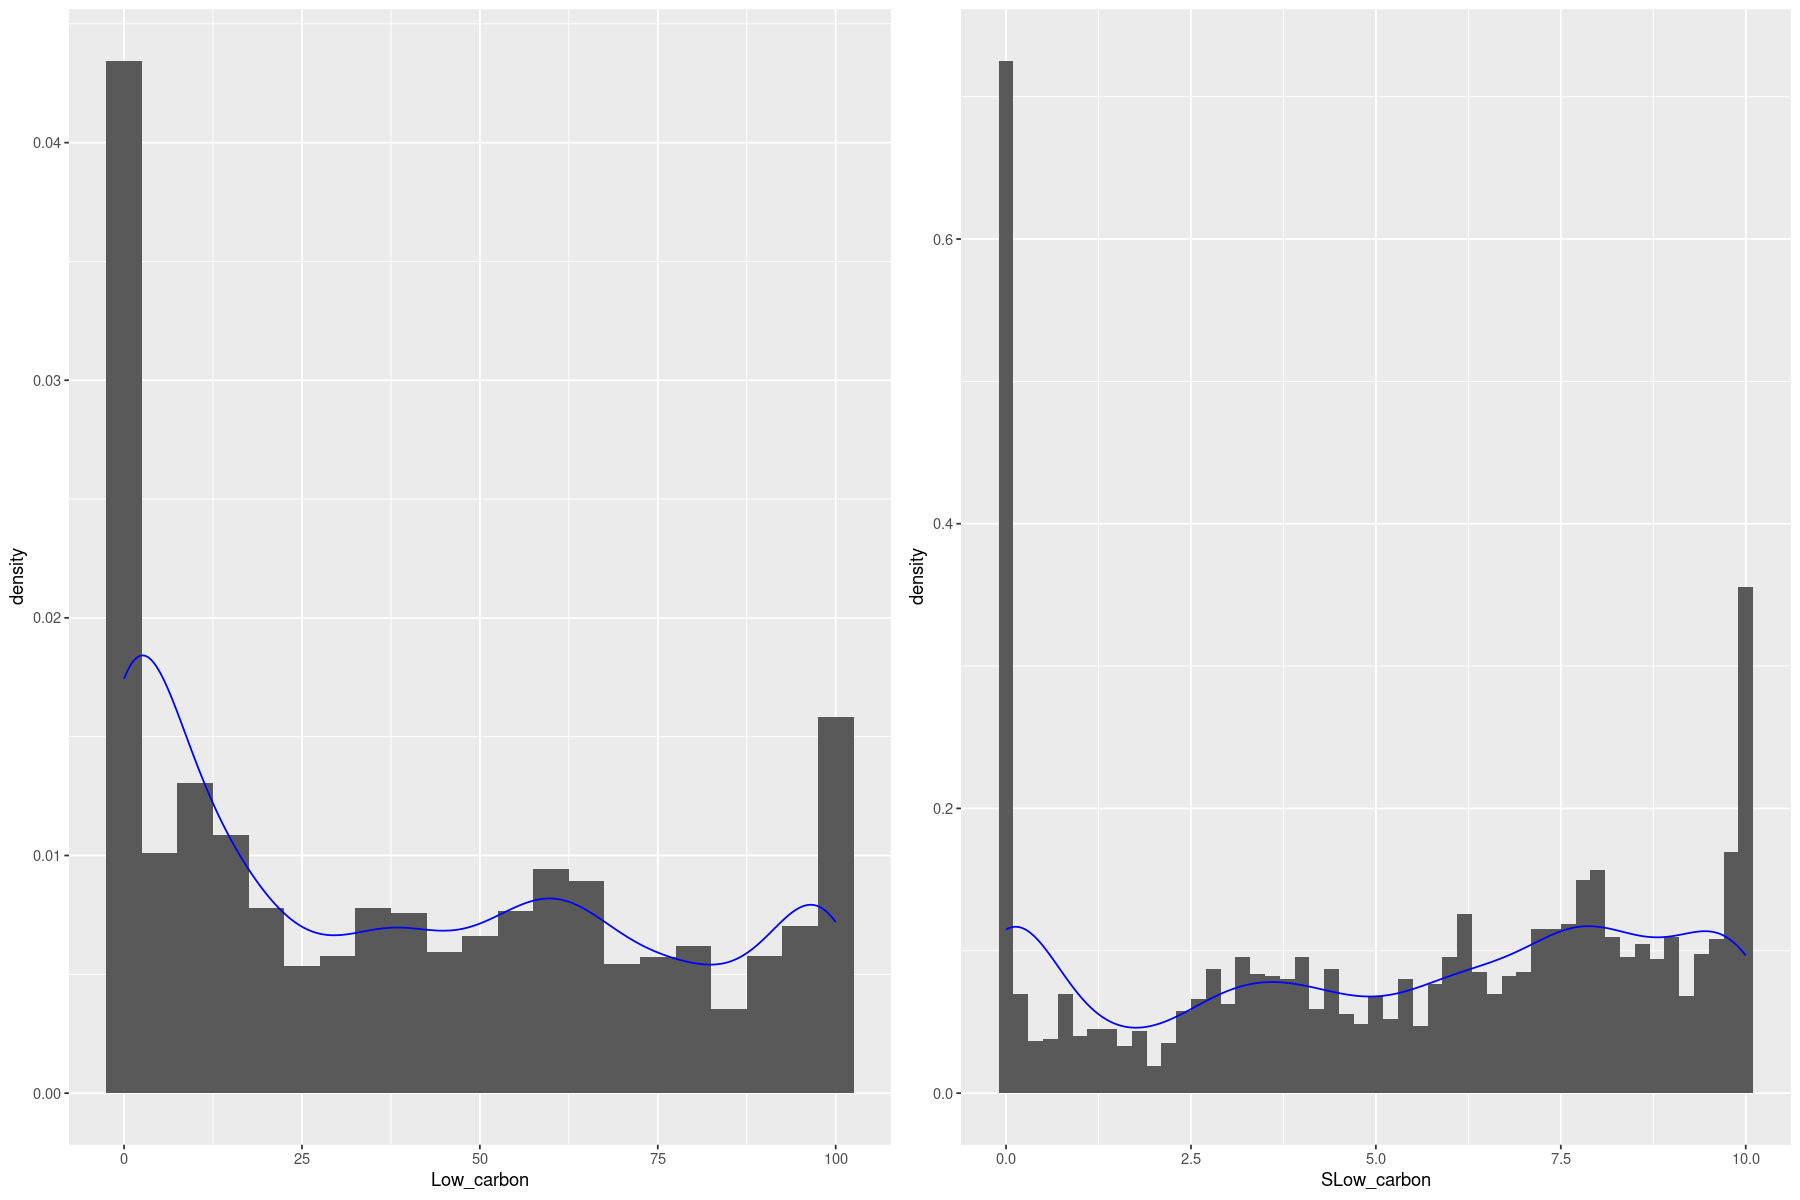

In [33]:
complete_energy[, "SLow_carbon"] = sqrt(complete_energy[, "Low_carbon"])

g1 = ggplot(complete_energy,aes(x=Low_carbon))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLow_carbon))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

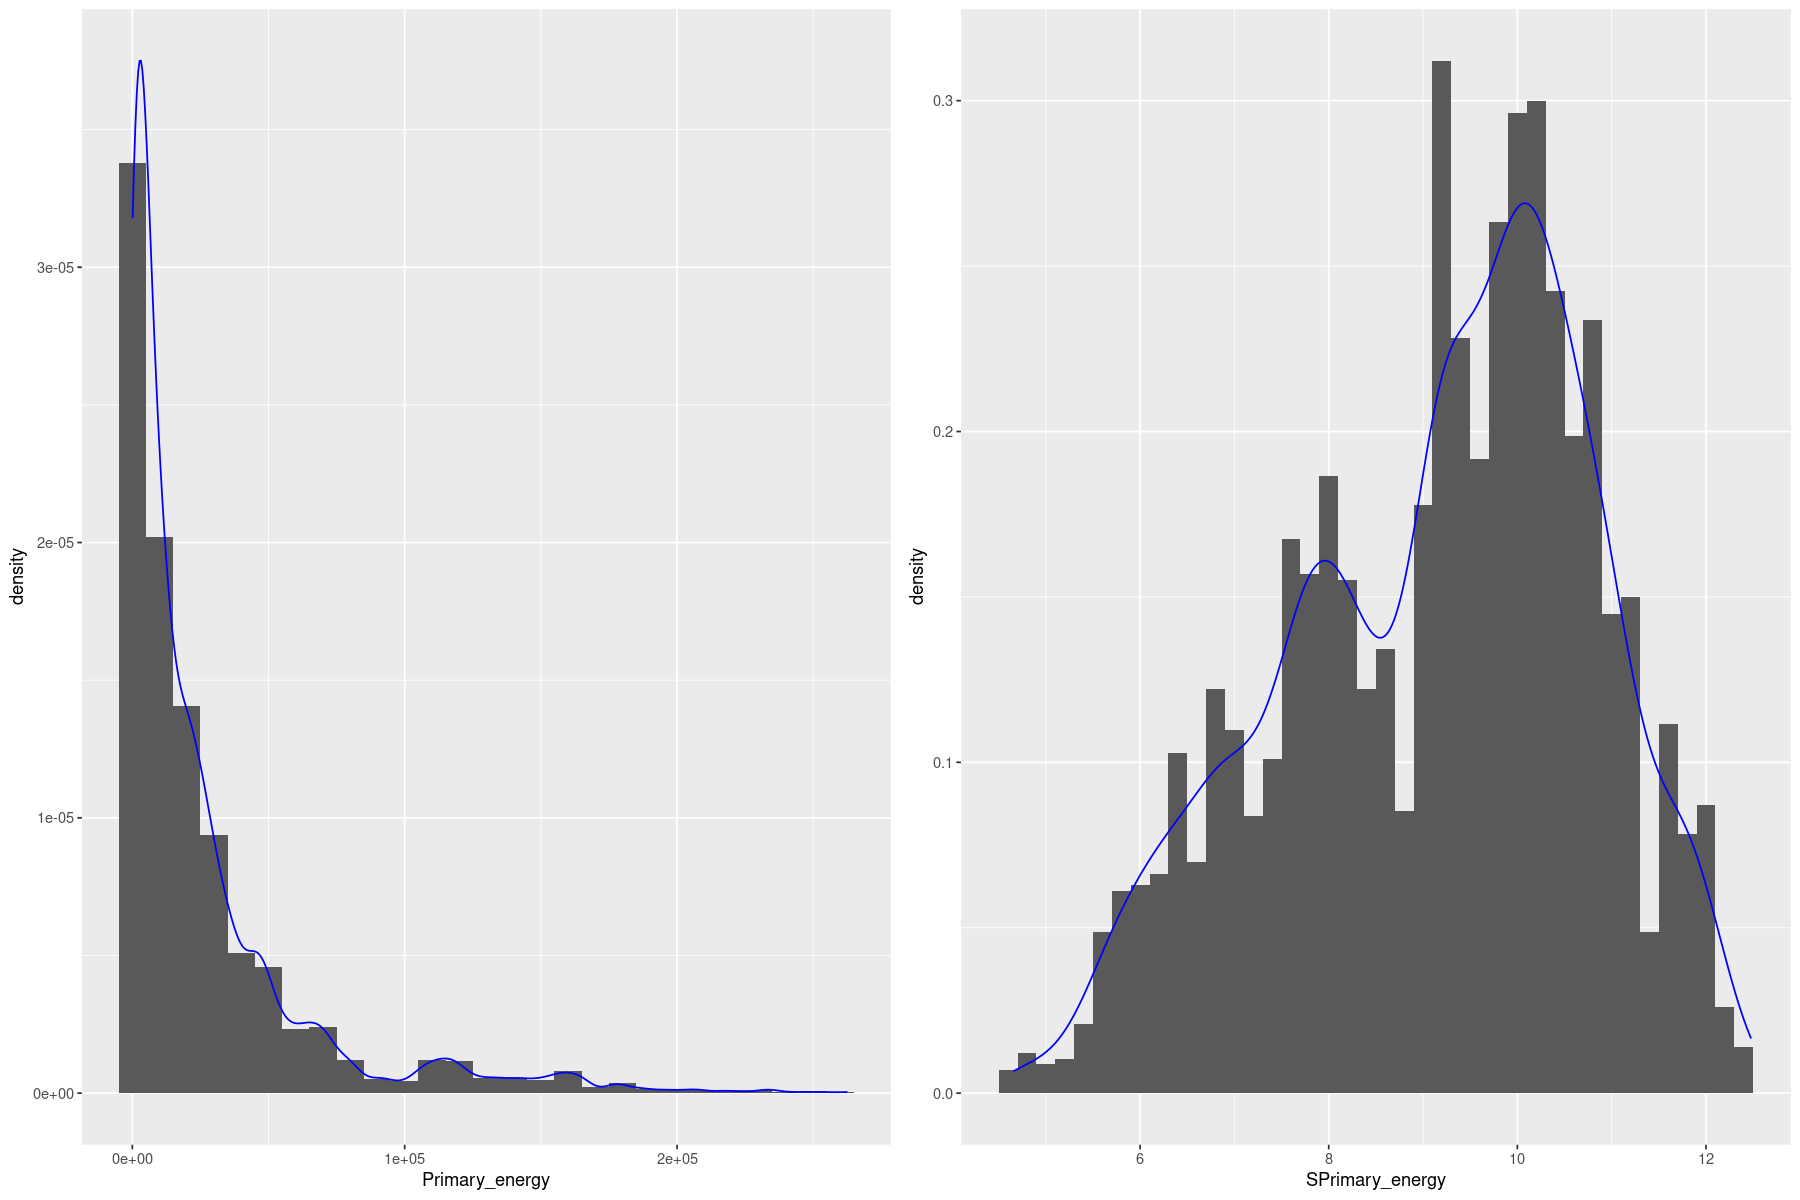

In [34]:
complete_energy[, "SPrimary_energy"] = log(complete_energy[, "Primary_energy"])

g1 = ggplot(complete_energy,aes(x=Primary_energy))+ geom_histogram(aes(y=..density..),binwidth = 10000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SPrimary_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

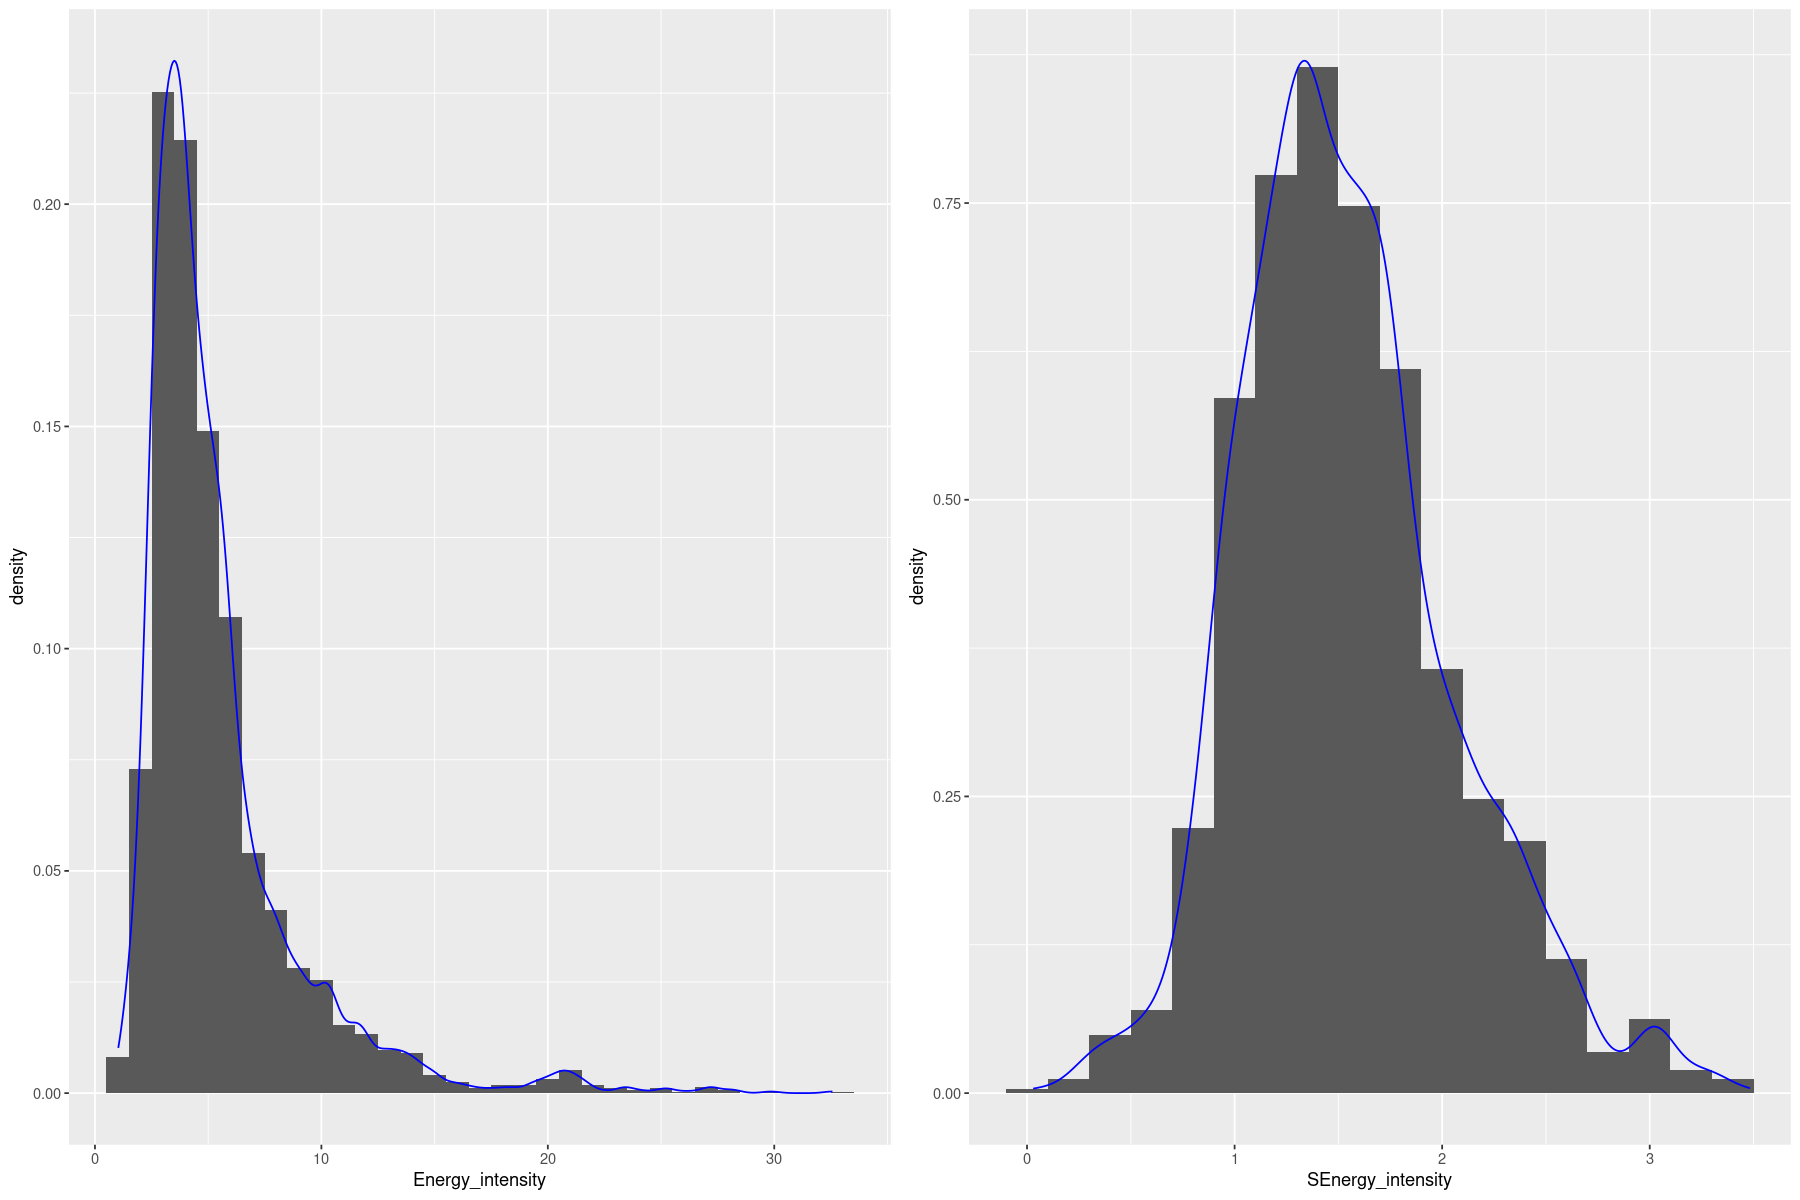

In [35]:
complete_energy[, "SEnergy_intensity"] = log(complete_energy[, "Energy_intensity"])

g1 = ggplot(complete_energy,aes(x=Energy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SEnergy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

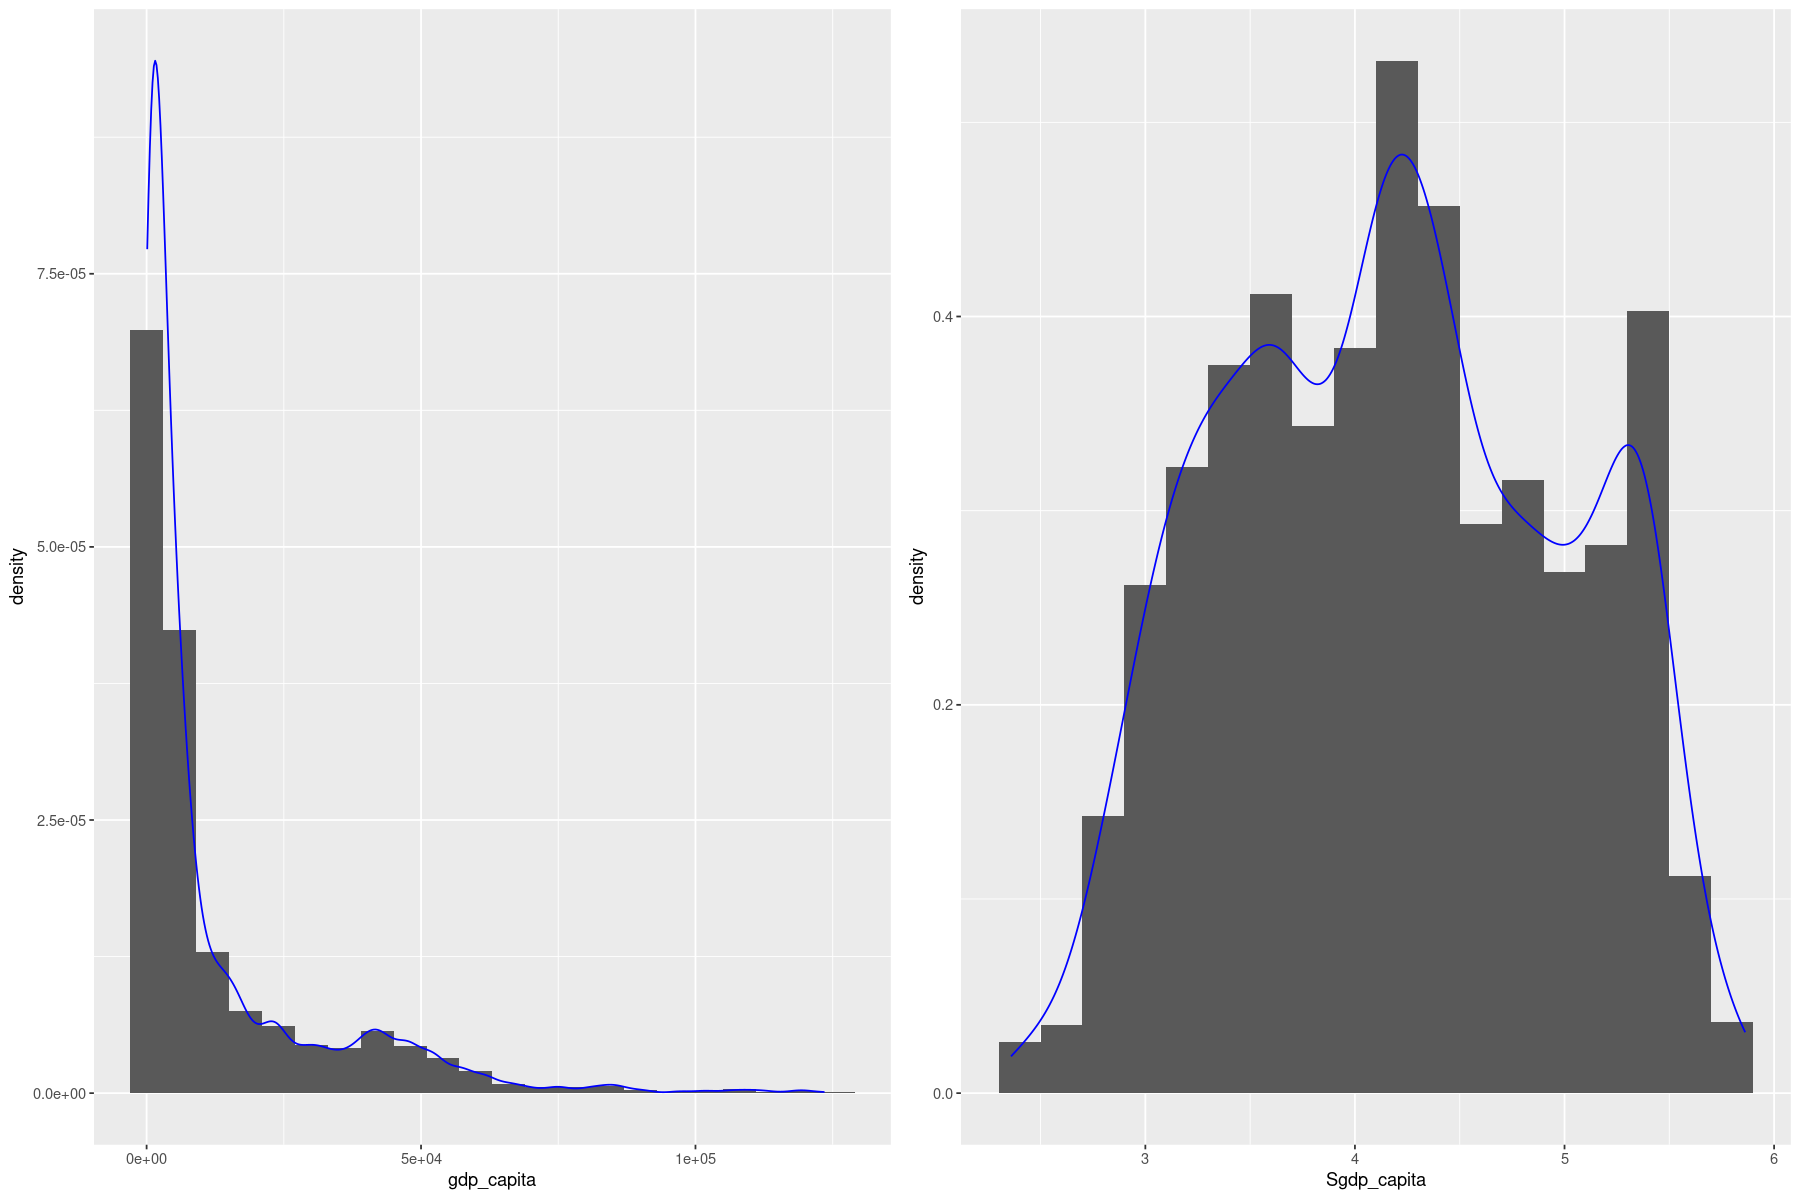

In [36]:
complete_energy[, "Sgdp_capita"] = log(sqrt(complete_energy[, "gdp_capita"]))

g1 = ggplot(complete_energy,aes(x=gdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 6000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=Sgdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

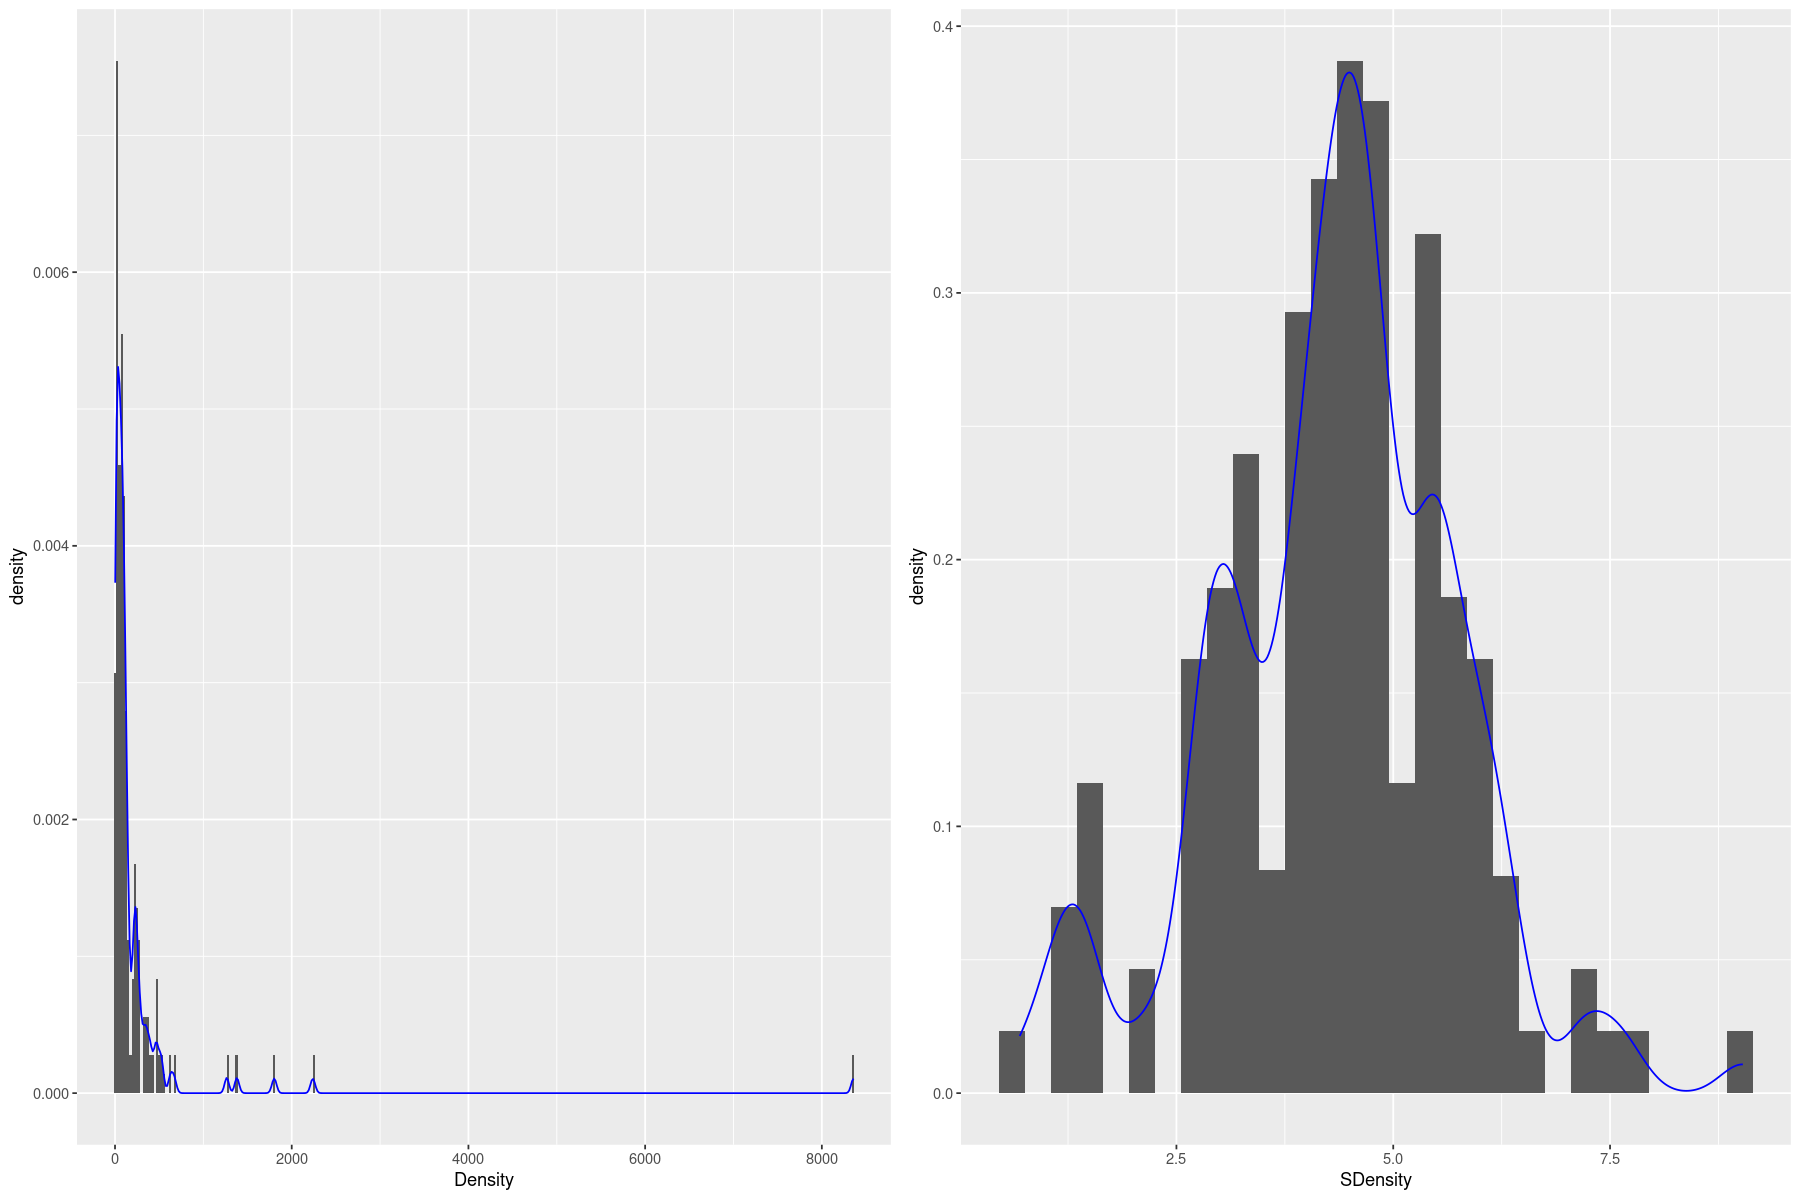

In [37]:
complete_energy[, "SDensity"] = log(complete_energy[, "Density"])

g1 = ggplot(complete_energy,aes(x=Density))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SDensity))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

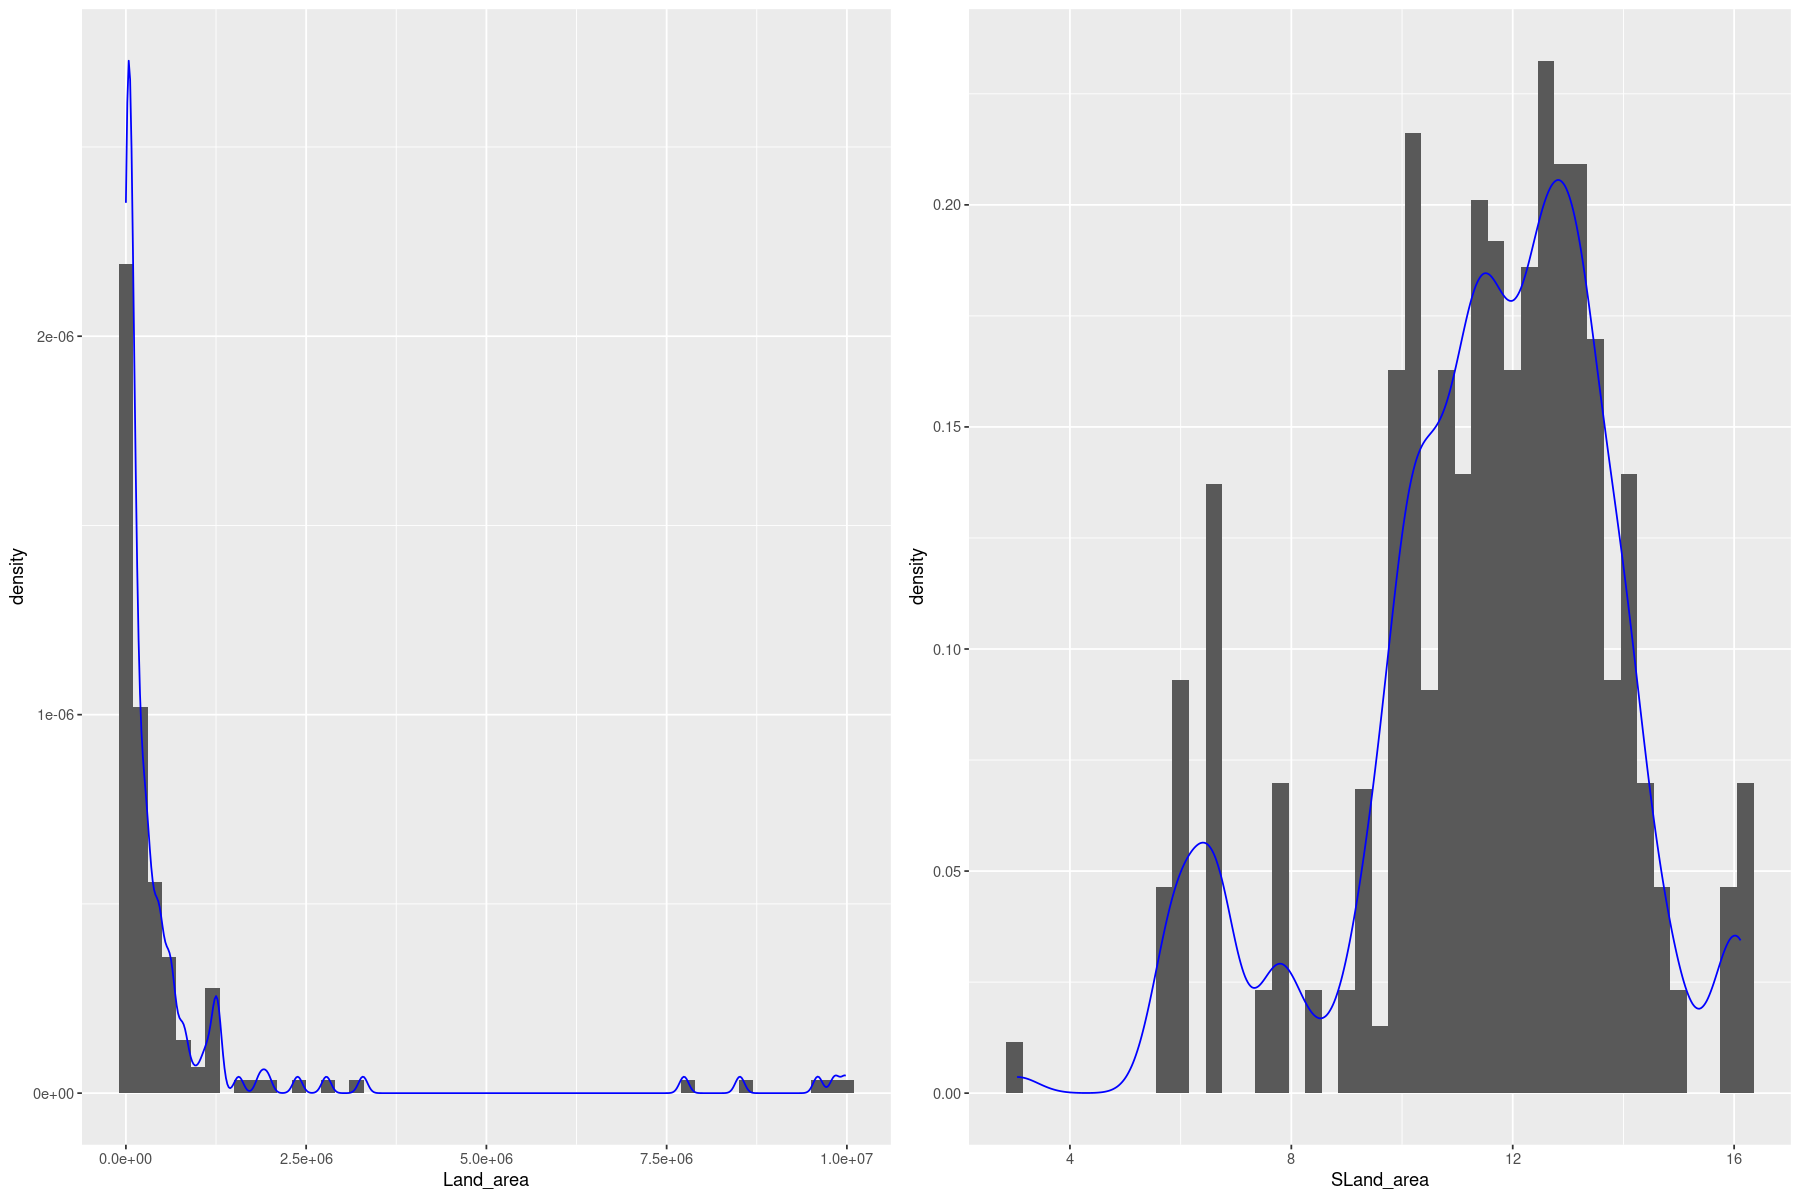

In [38]:
complete_energy[, "SLand_area"] = log(complete_energy[, "Land_area"])

g1 = ggplot(complete_energy,aes(x=Land_area))+ geom_histogram(aes(y=..density..),binwidth = 200000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLand_area))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

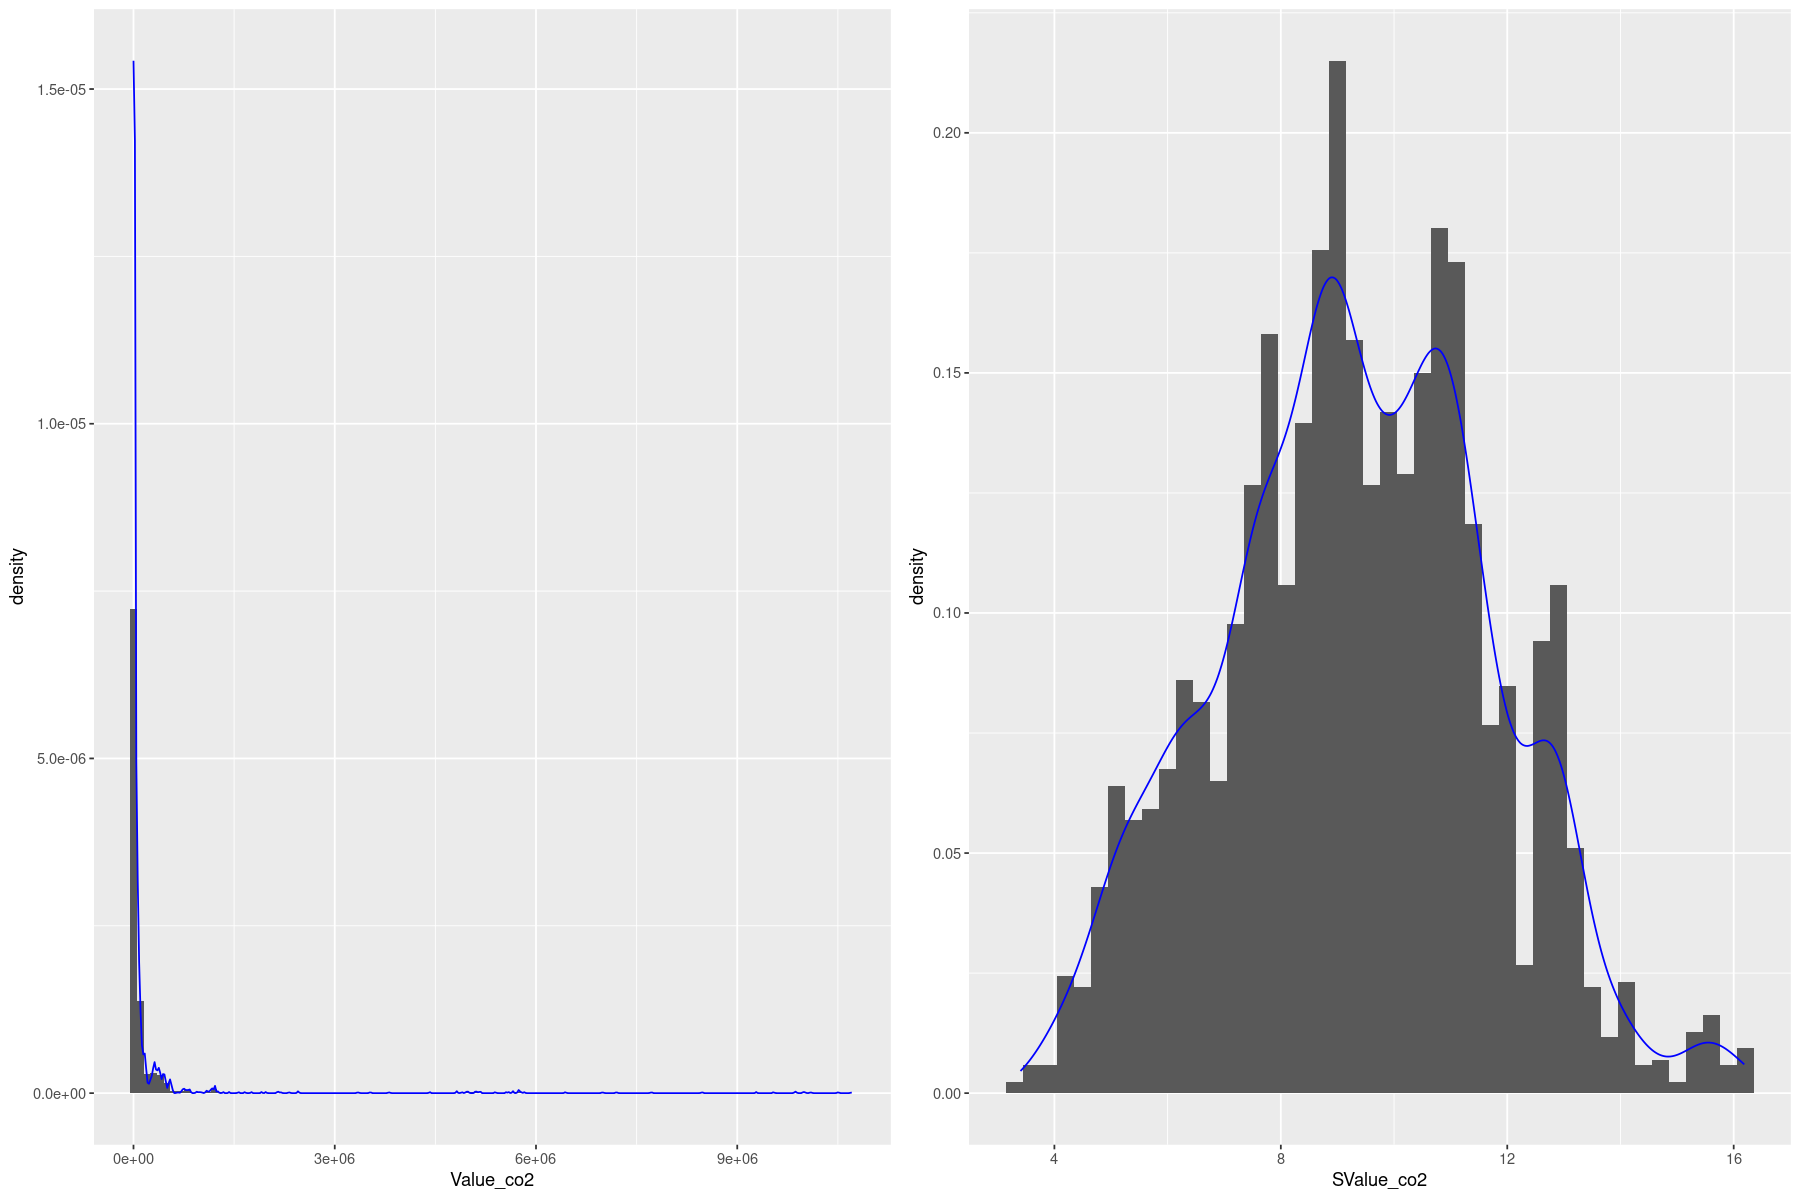

In [39]:
complete_energy[, "SValue_co2"] = log(complete_energy[, "Value_co2"])

g1 = ggplot(complete_energy,aes(x=Value_co2))+ geom_histogram(aes(y=..density..),binwidth = 100000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SValue_co2))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [40]:
# complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

# g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
# g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth =0.3)+geom_density(alpha=.1, col="blue") 

# grid.arrange(g1,g2,ncol=2)

# #Pourquoi deux fois ? 

In [41]:
#for (i in 3:length(names(complete_energy))) {

#complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

#g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
#g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

#grid.arrange(g1,g2,ncol=2)
    
#}

In [42]:
#summary(complete_energy)

In [43]:
complete_energy = complete_energy[-c(3,4,5,6,7,8,9,10,11,14,15,16)]

In [44]:
summary(complete_energy)

                 Entity          Year        Value_co2          gdp_growth     
 Algeria            :  20   2014   : 147   Min.   :      30   Min.   :-36.658  
 Angola             :  20   2015   : 147   1st Qu.:    2188   1st Qu.:  1.771  
 Antigua and Barbuda:  20   2016   : 146   Median :   10425   Median :  3.788  
 Argentina          :  20   2017   : 146   Mean   :  168818   Mean   :  3.895  
 Armenia            :  20   2018   : 146   3rd Qu.:   58145   3rd Qu.:  5.957  
 Australia          :  20   2019   : 146   Max.   :10707220   Max.   : 63.380  
 (Other)            :2748   (Other):1990                                       
    Latitude         Longitude        SAccess_elec   SAccess_fuels  
 Min.   :-40.901   Min.   :-175.20   Min.   :0.225   Min.   :0.000  
 1st Qu.:  1.651   1st Qu.: -10.94   1st Qu.:3.975   1st Qu.:3.139  
 Median : 17.061   Median :  18.64   Median :4.575   Median :4.413  
 Mean   : 18.140   Mean   :  12.97   Mean   :4.160   Mean   :3.633  
 3rd Qu.: 39.40

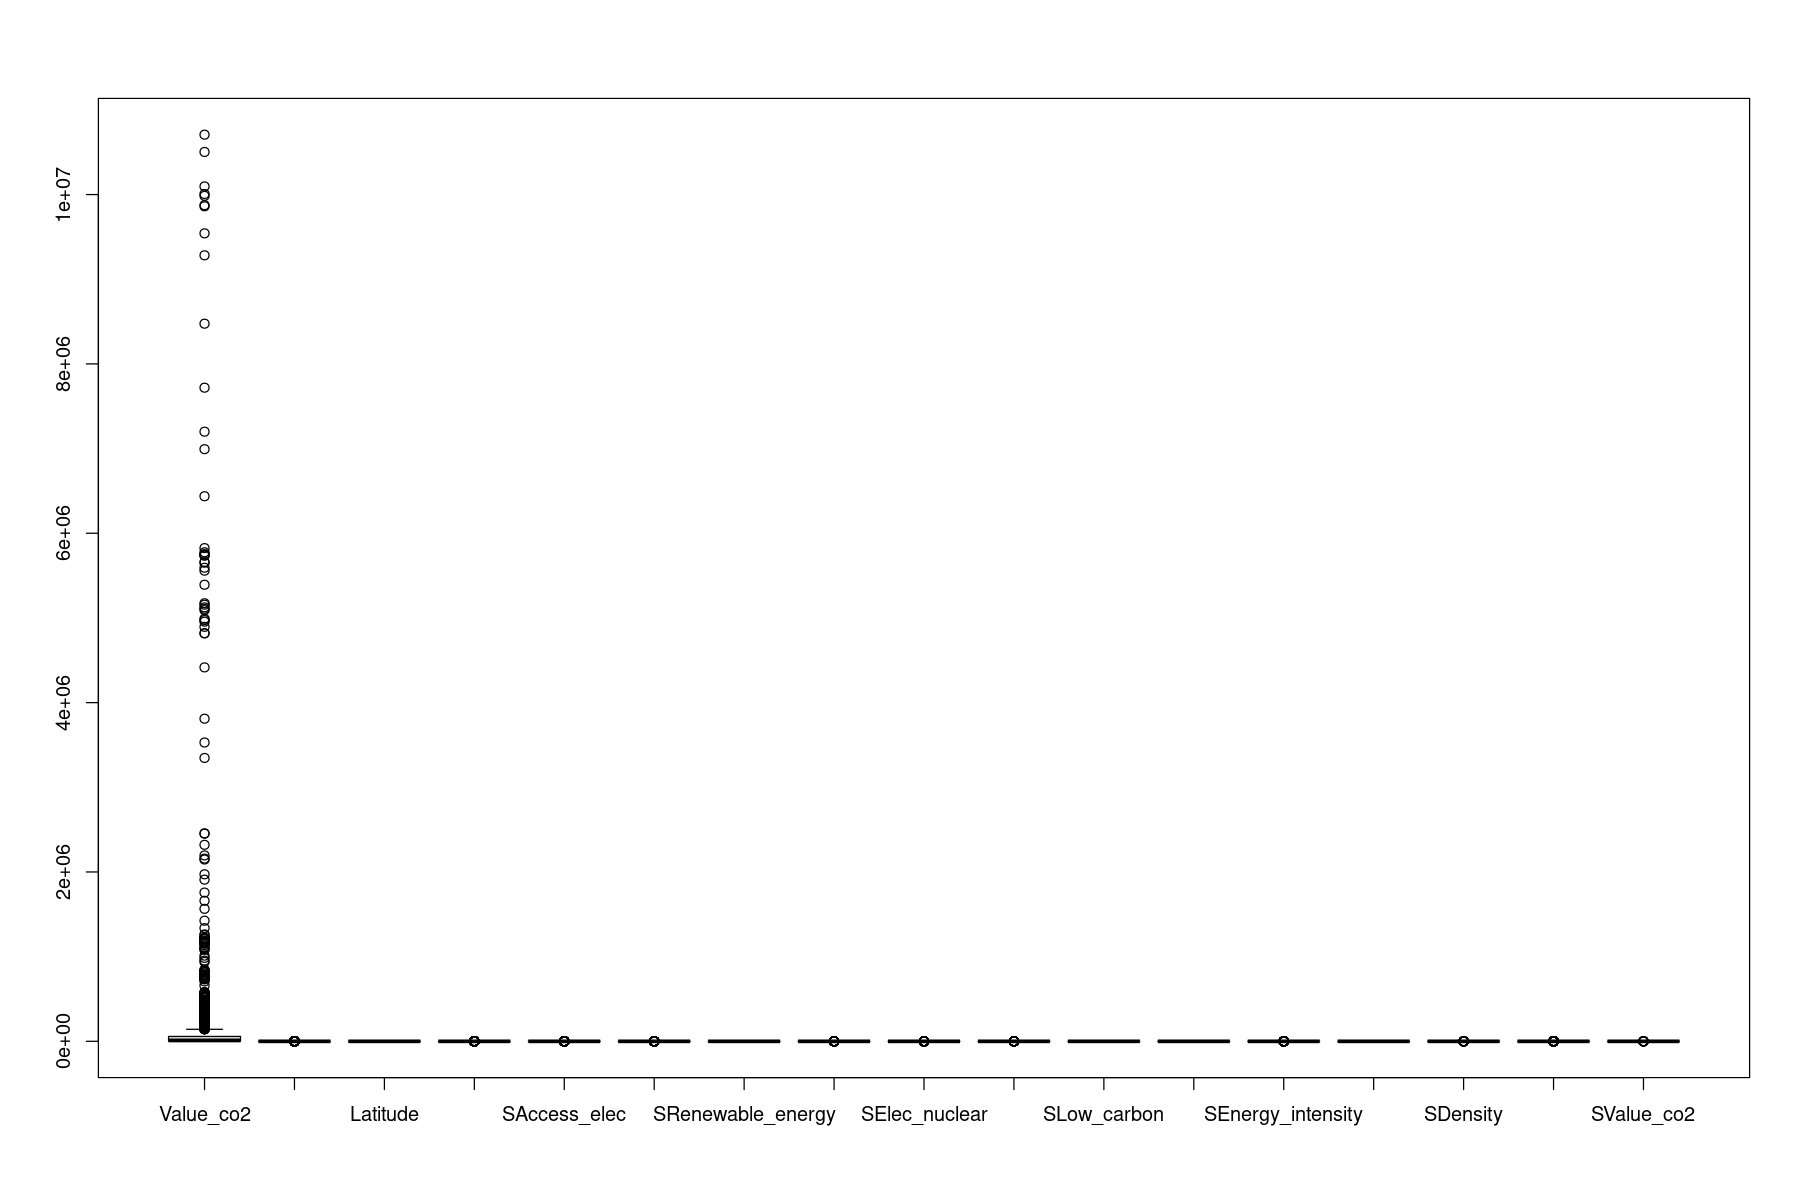

In [45]:
boxplot(complete_energy[,-c(1,2)])

On affiche toutes les variables, mais comme elles n'ont pas la même échelle, c'est difficile à interpréter.

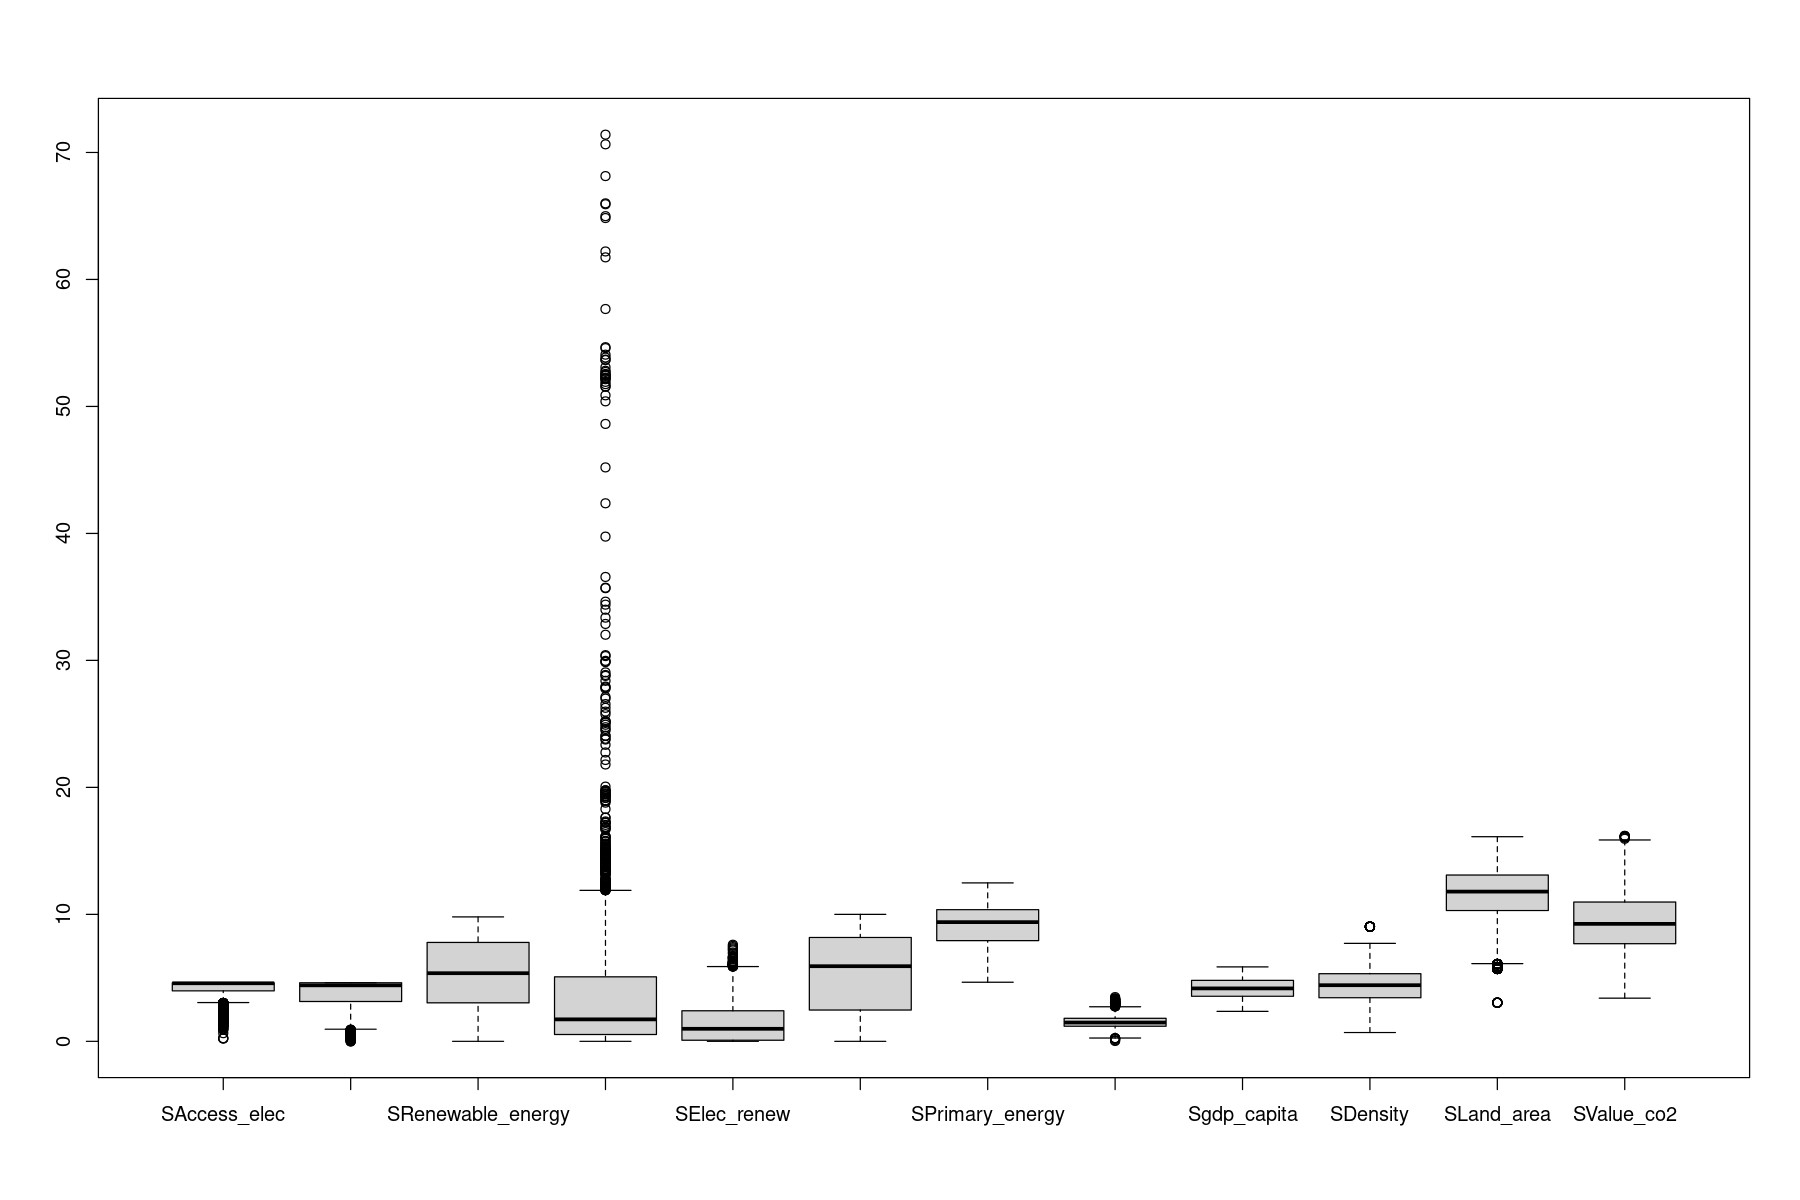

In [46]:
boxplot(complete_energy[,-c(1:6,11)])

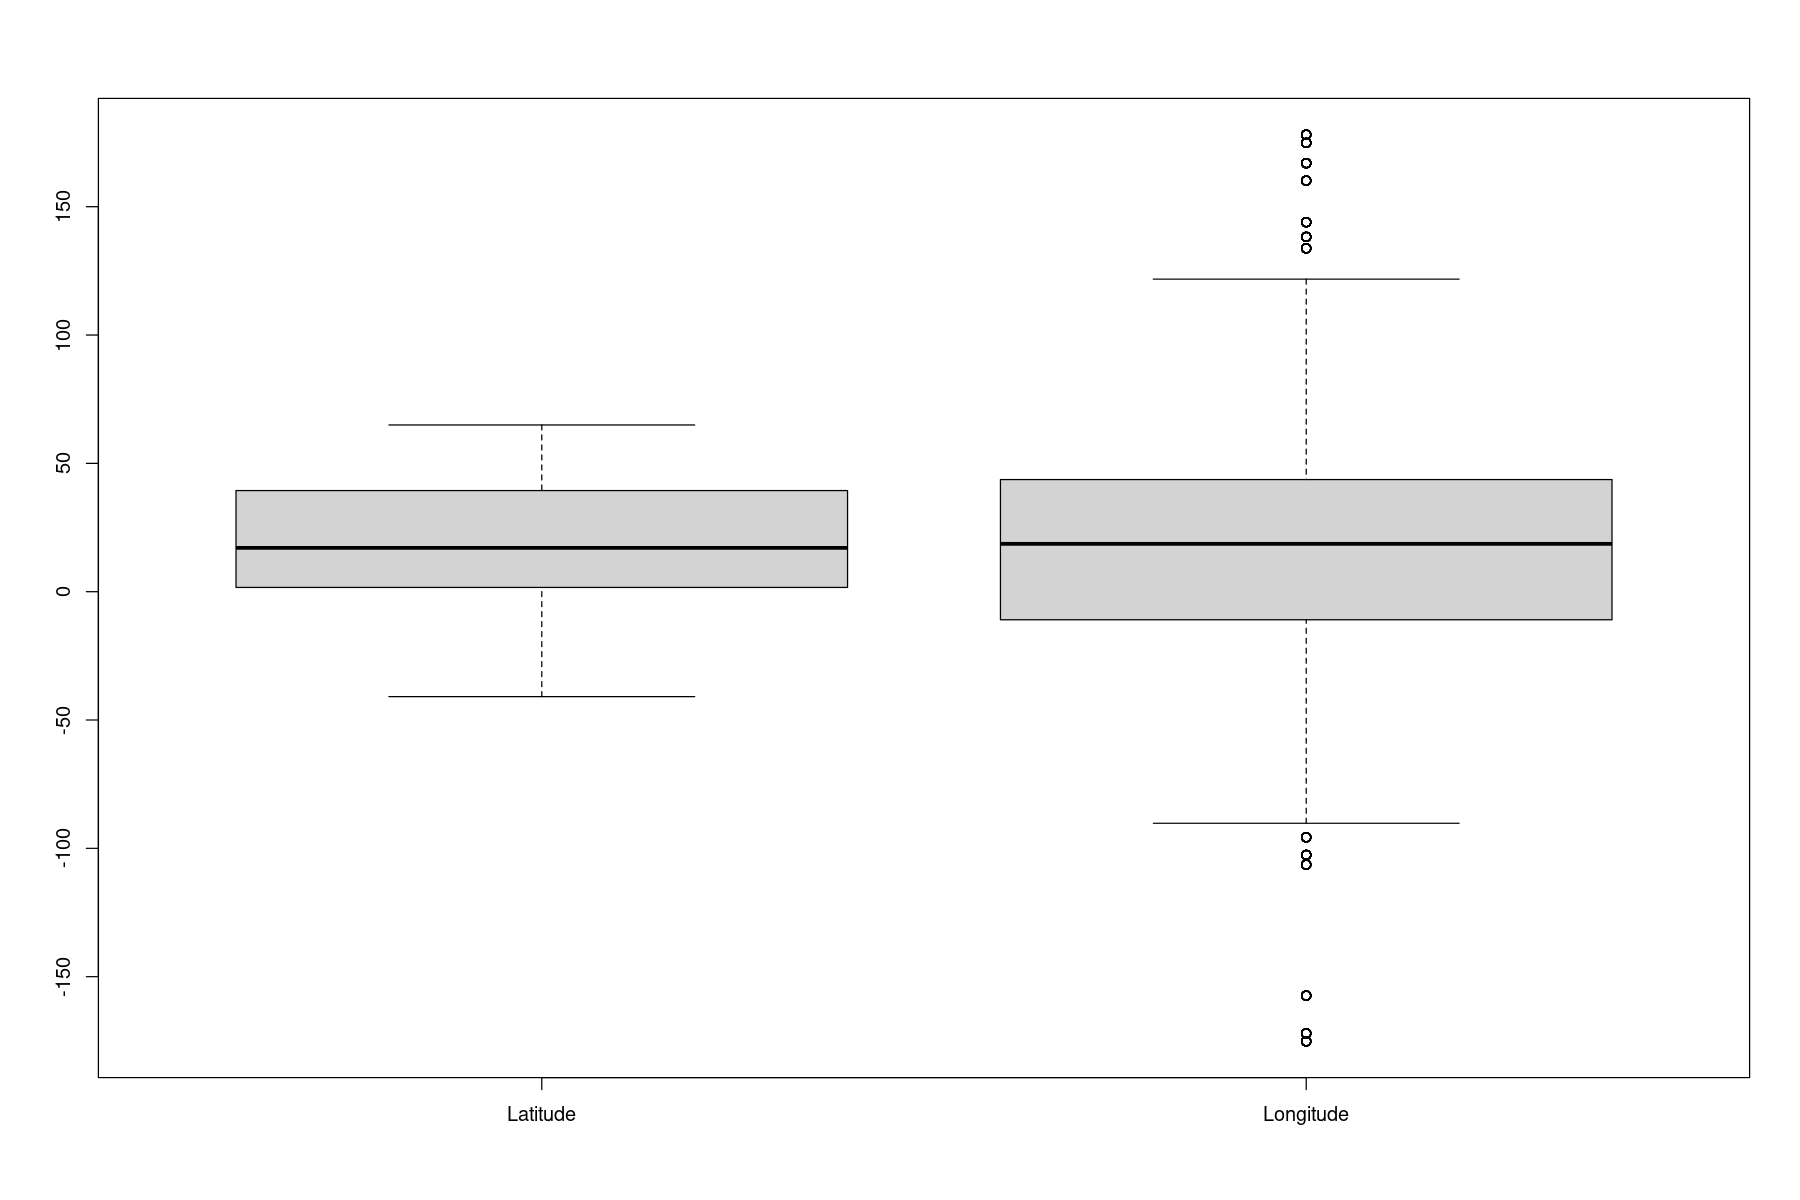

In [47]:
boxplot(complete_energy[,c(5:6)])

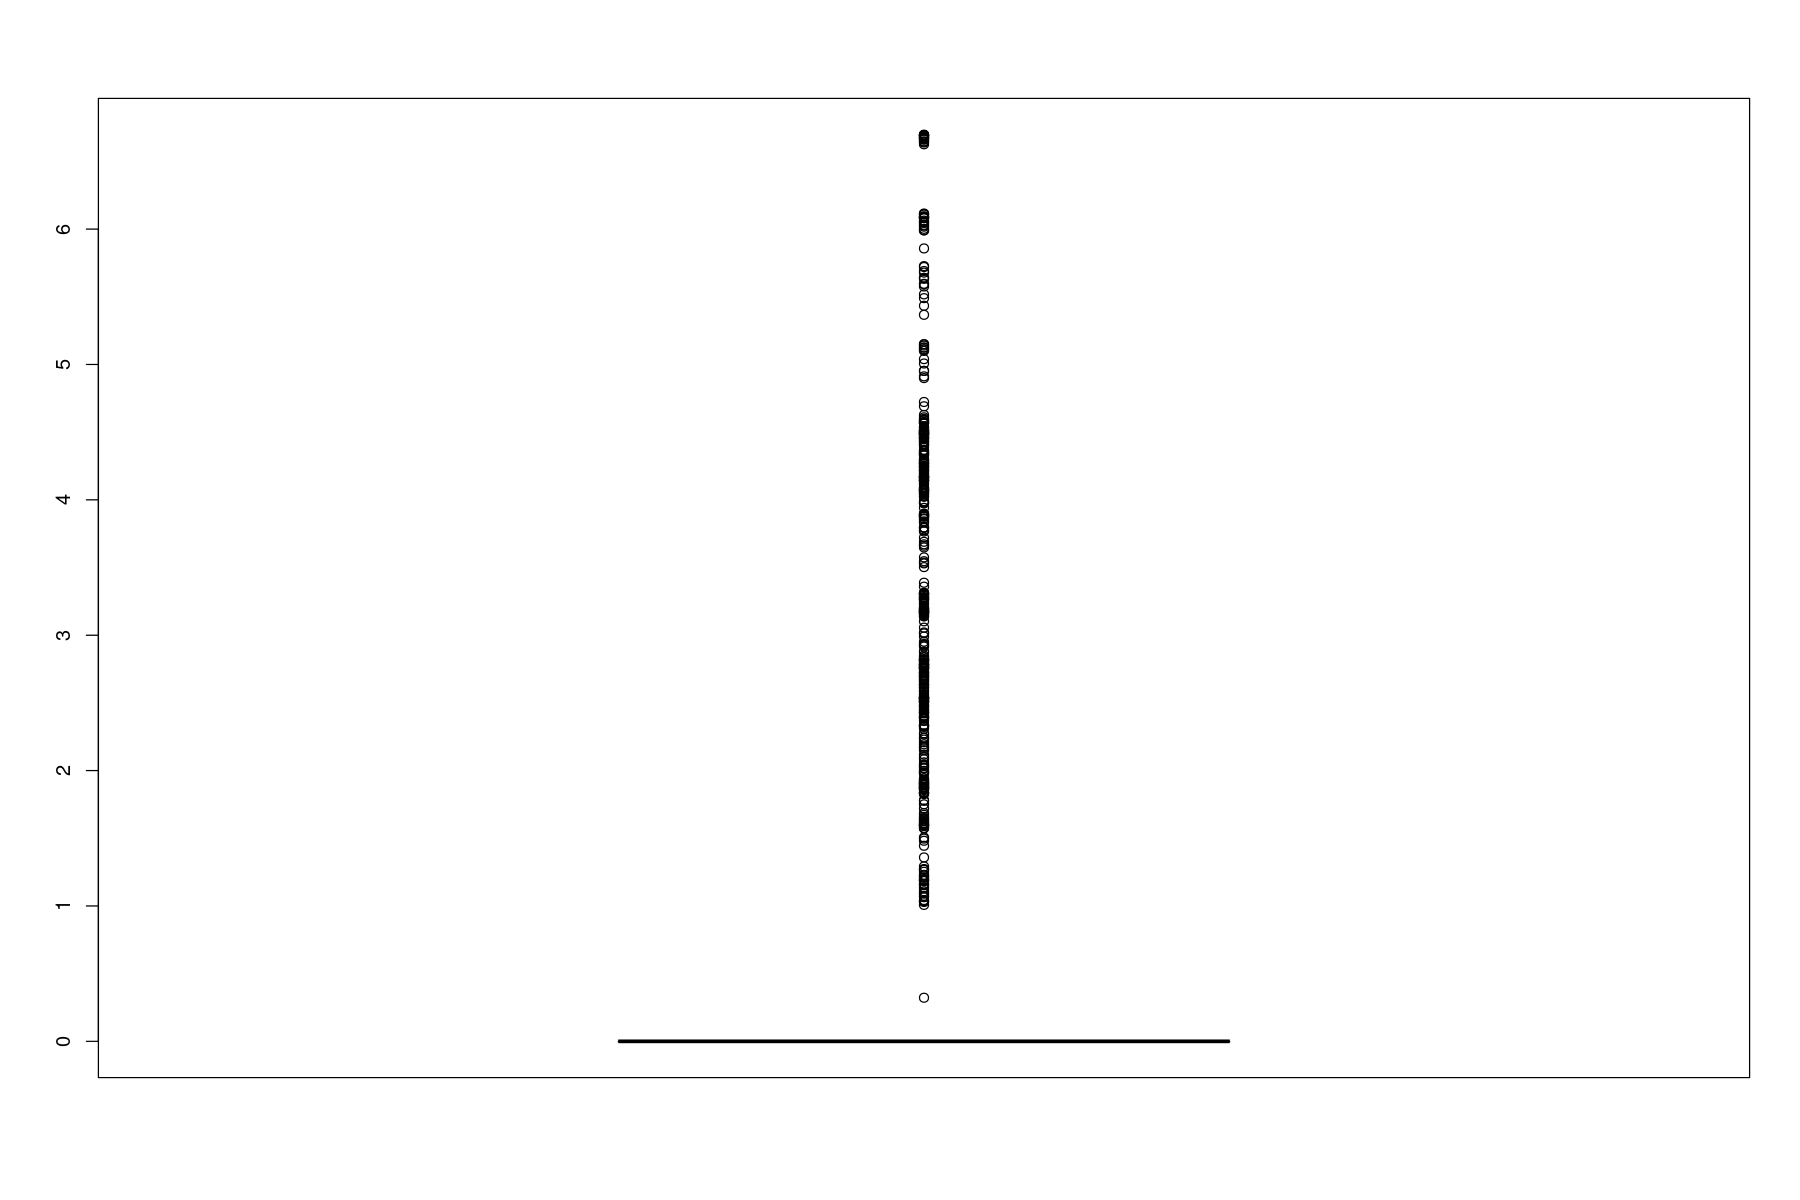

In [48]:
boxplot(complete_energy[,c(11)]) #nuclear

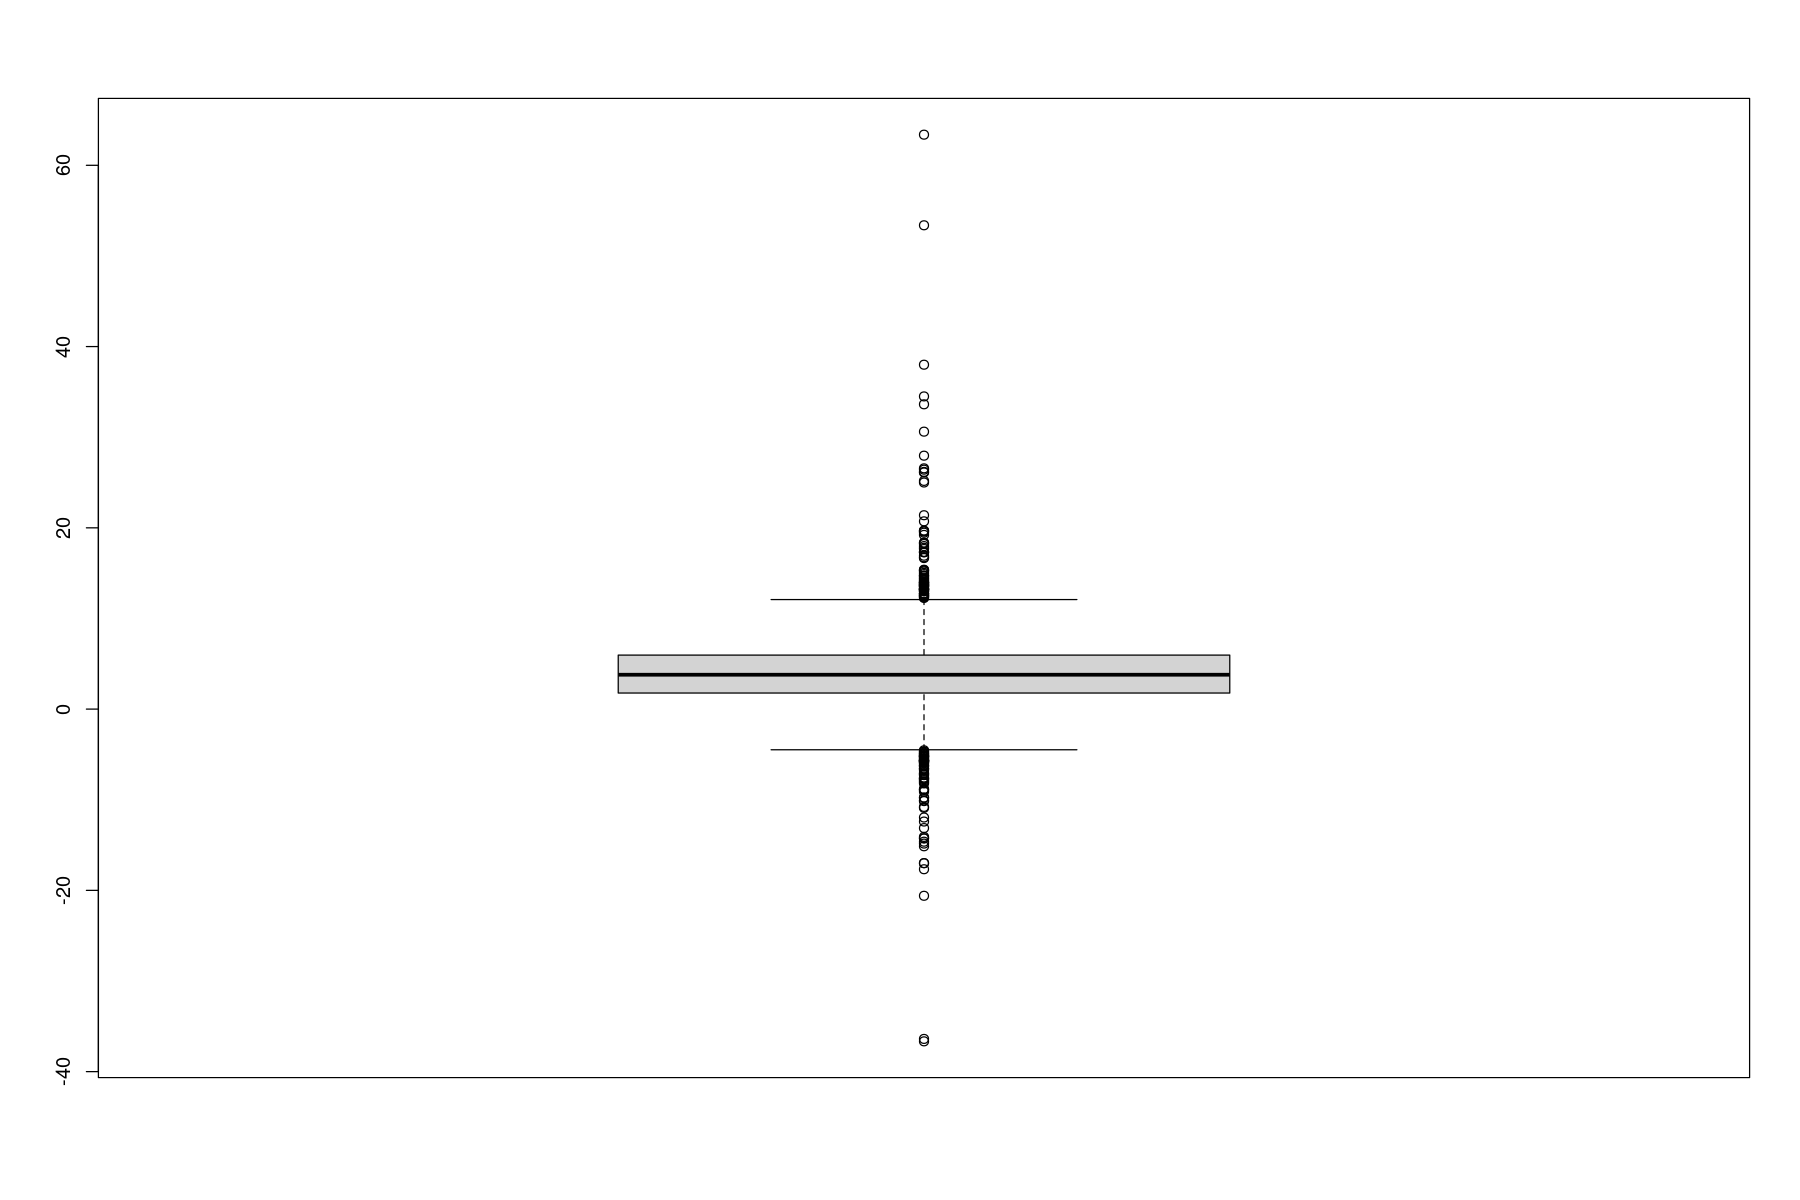

In [49]:
boxplot(complete_energy[,c(4)]) #gdp growth

On ne regarde à présent que les variables transformée. L'échelle est meilleure

## Question 6 

### Analyse descriptive multidimensionnelle

#### Variable quantitative

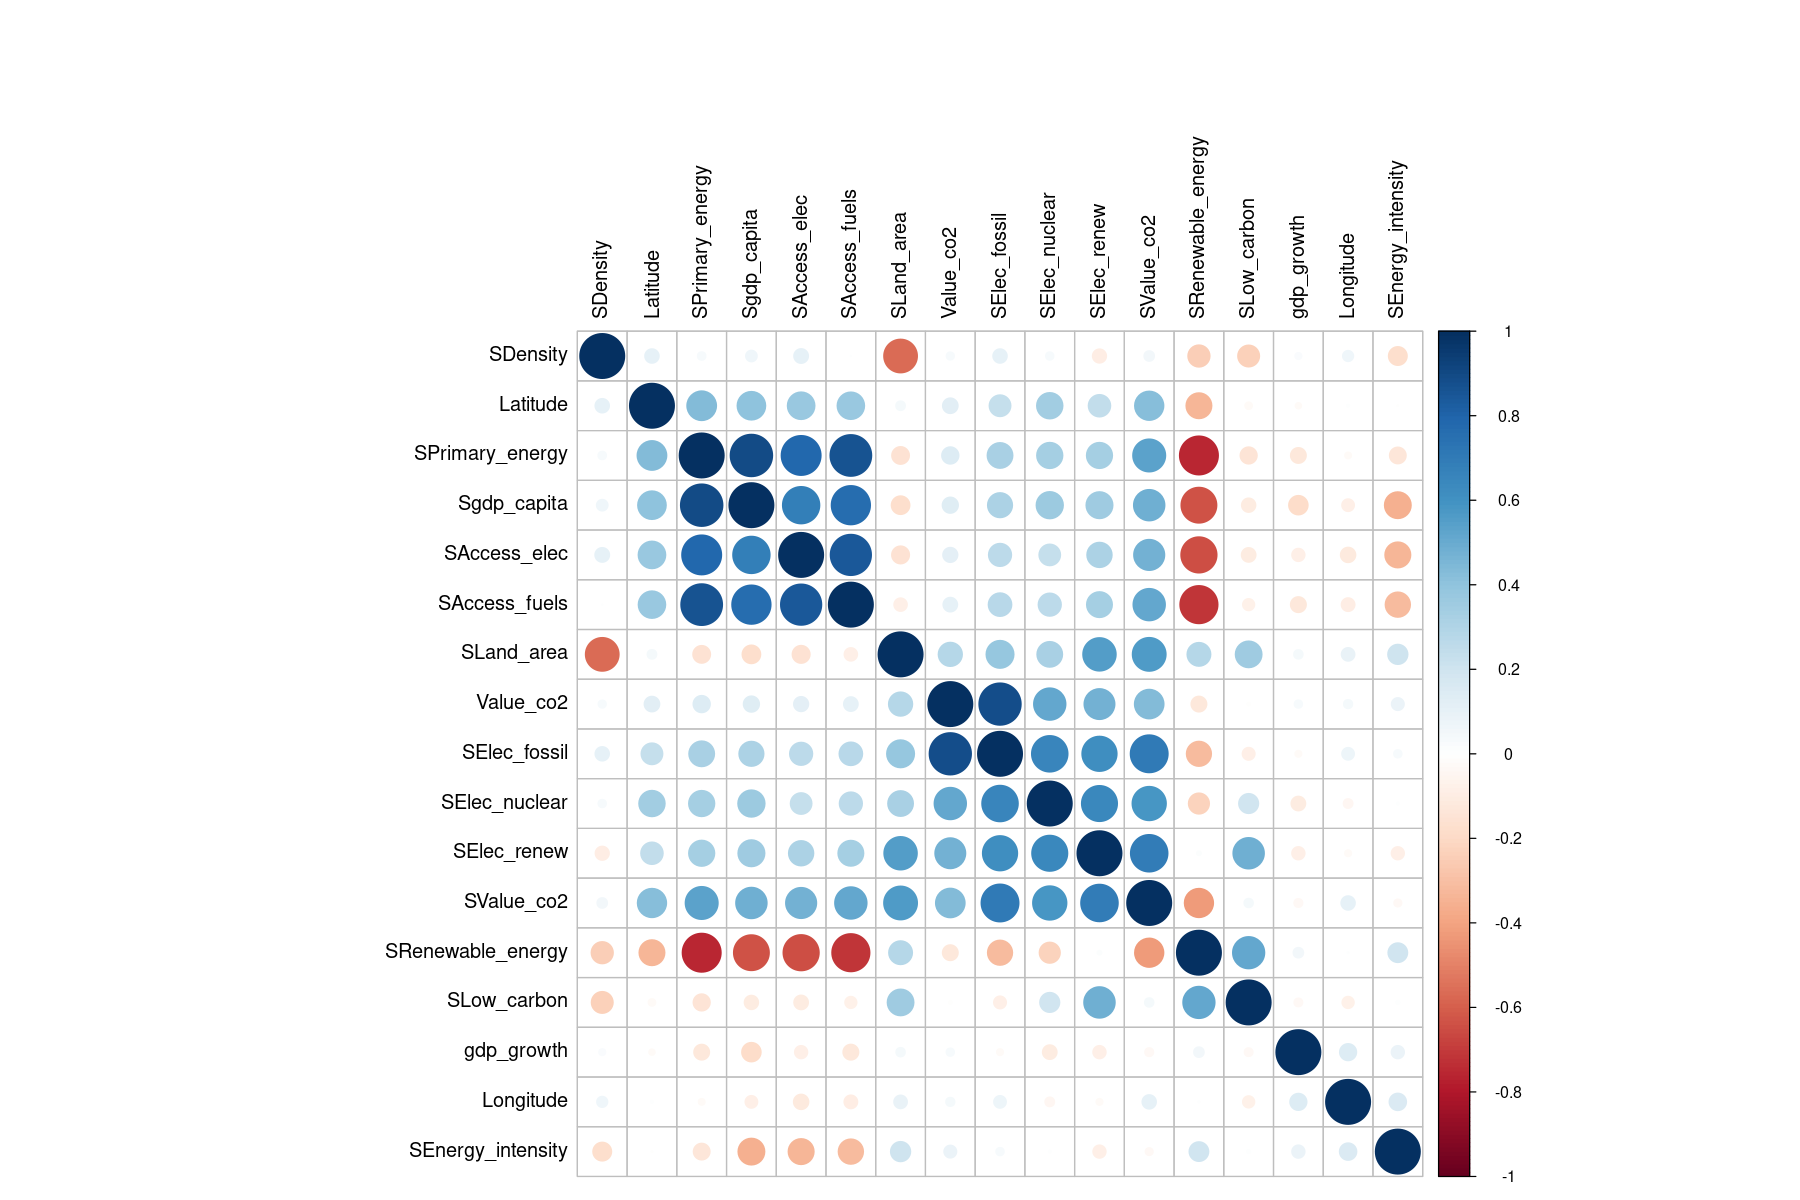

In [50]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
par(mfrow=c(1,1), mar=c(5,5,2,2))
corrplot(mcor, order="hclust", tl.col="black")

In [51]:
#par(mfrow = c(6,3) , mar = c(4,4,2,1))

#for (i in 3:length(names(complete_energy))) {
 #   dfi = complete_energy[,c(2,i)]
   # plot(dfi, main=names(complete_energy)[i],xlab='Values')
#}

#### Variable qualitative

Pour cette étude, nous avons essayé plusieurs techniques pour visualiser nos données. Cependant nous avons pu remarquer que le nombre d'observations par pays n'est pas identique en fonction des années (voir graphique ci-dessous), ce qui ne rend pas forcément fiable nos exploitations.En effet, nous avons également essayé d'afficher des boxplots de l'ensemble des variables en fonction de Year, mais ce n'était pas très pertinent.   

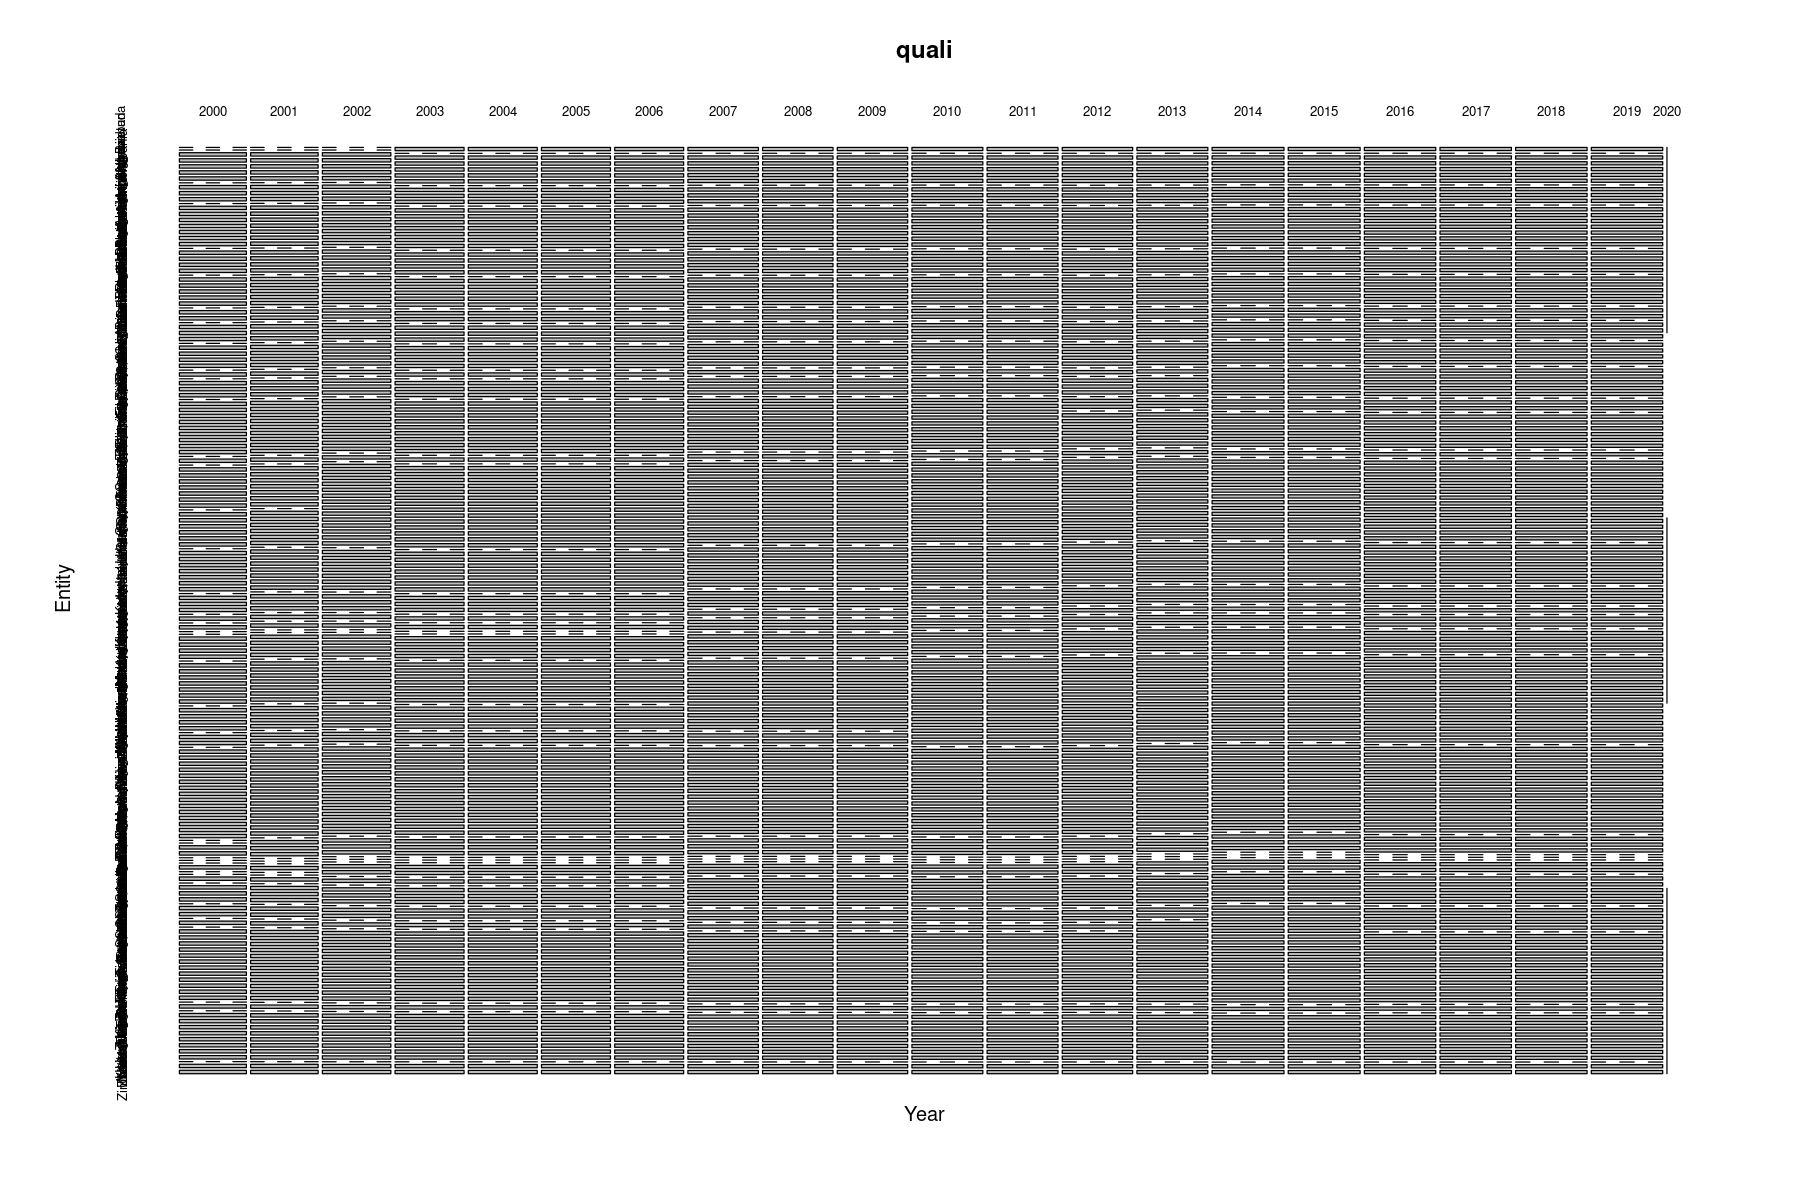

In [52]:
quali= xtabs(~Year + Entity, data = complete_energy)
mosaicplot(quali)

## Question 8

### Dépendance entre Year et la variable à prédire

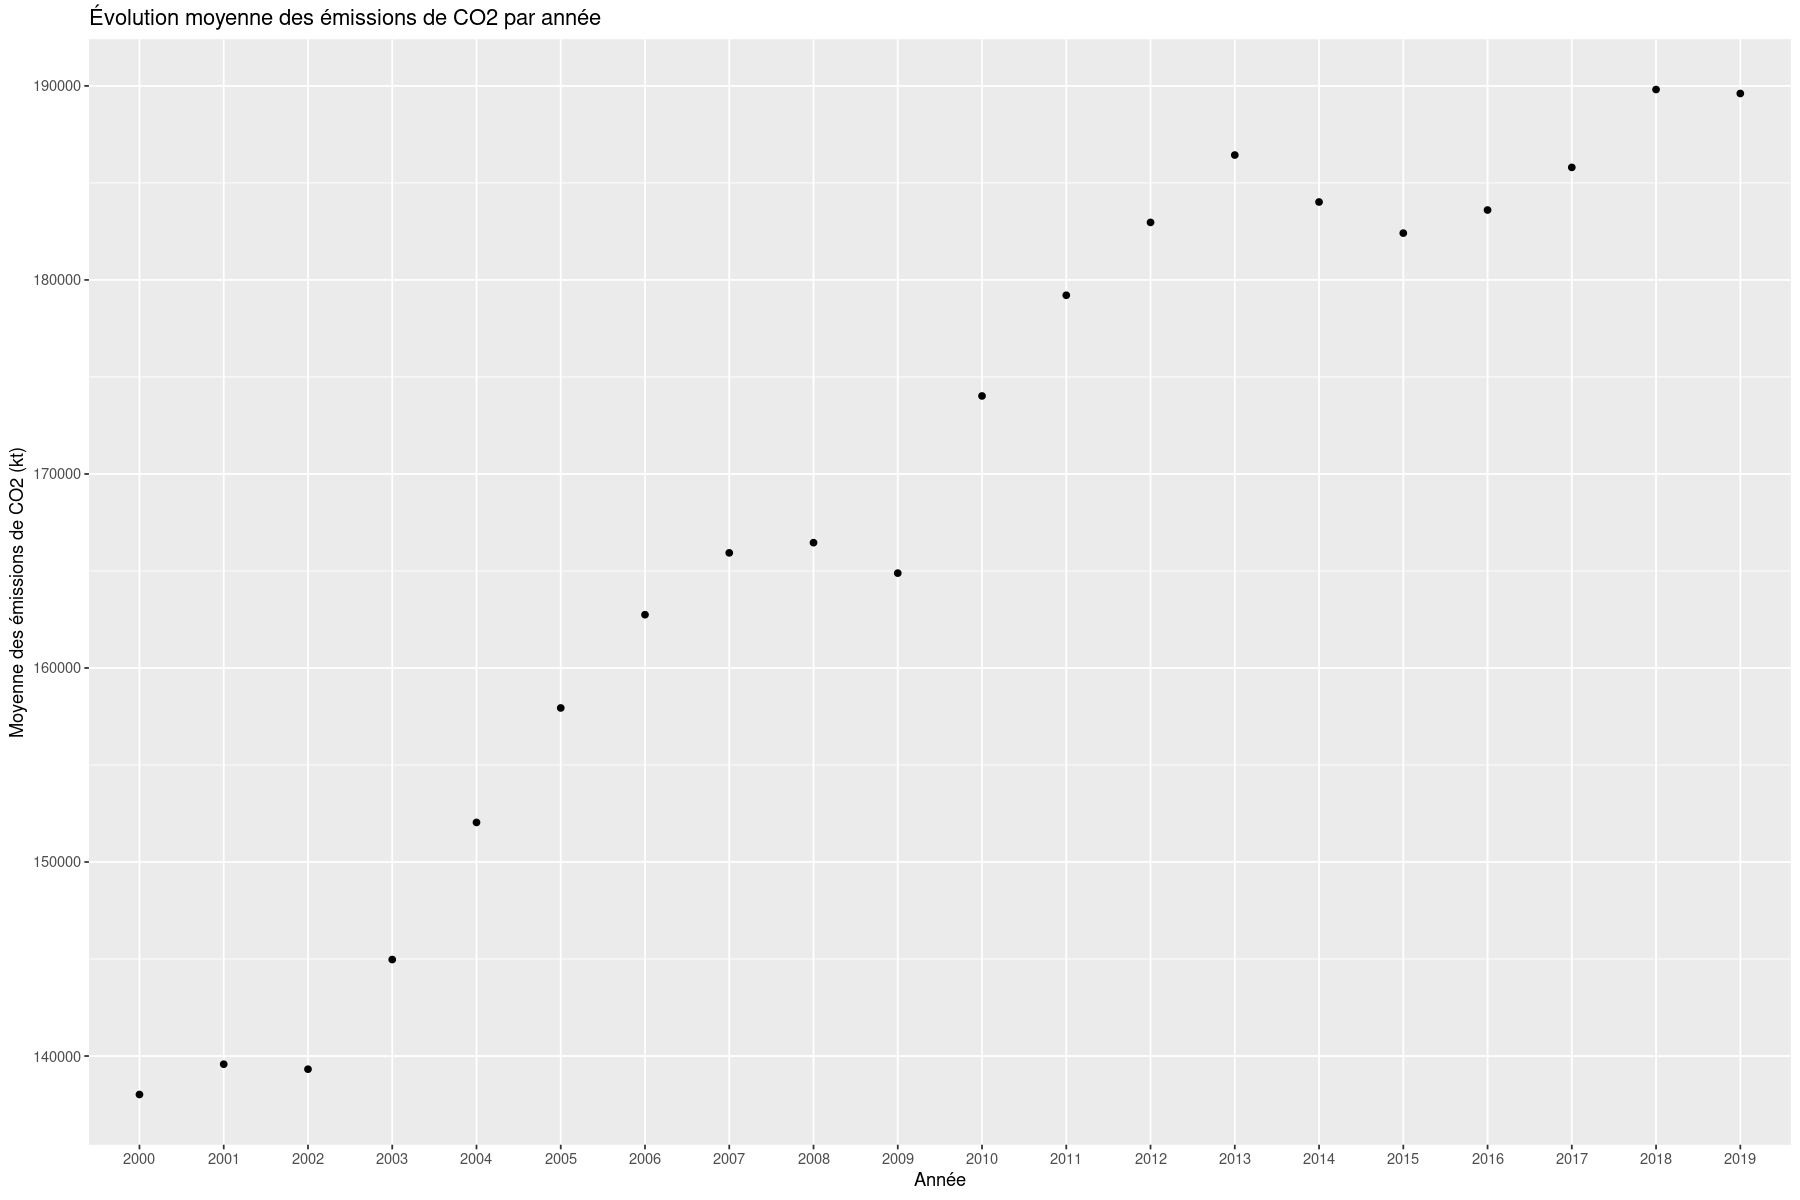

In [53]:
Moy = aggregate( Value_co2 ~ Year, data = complete_energy, FUN = mean)

ggplot(Moy) + 
  aes(x = Year, y = Value_co2) + 
  geom_point() +
  labs(x = "Année", y = "Moyenne des émissions de CO2 (kt)", title = "Évolution moyenne des émissions de CO2 par année")

In [54]:
Std = aggregate( Value_co2 ~ Year, data = complete_energy, FUN = sd )

Median = aggregate( Value_co2 ~ Year, data = complete_energy, FUN = median )

Stat = Moy
Stat$std = Std$Value_co2
Stat$median = Median$Value_co2

names(Stat)[which(names(Stat) == "Value_co2")] = "mean"

Stat

Year mean     std      median
1  2000 138016.4 586021.7  9000 
2  2001 139578.2 589751.5  9045 
3  2002 139321.1 588124.4  8985 
4  2003 144971.8 619668.0  9310 
5  2004 152039.4 661777.7  9560 
6  2005 157939.6 702156.5 10510 
7  2006 162745.4 733594.1  9970 
8  2007 165933.1 766181.3 10075 
9  2008 166458.1 770546.4  9700 
10 2009 164888.0 786177.6  9860 
11 2010 174019.5 846840.8  9950 
12 2011 179210.0 895407.9 10900 
13 2012 182964.4 911125.1 11945 
14 2013 186437.5 945723.5 11330 
15 2014 184016.3 943343.7 10860 
16 2015 182412.4 928555.0 11070 
17 2016 183602.7 929534.0 11135 
18 2017 185800.3 944709.9 12585 
19 2018 189814.1 981043.4 14325 
20 2019 189609.5 990345.4 13395

## Question 7

In [55]:
str(complete_energy)

'data.frame':	2868 obs. of  19 variables:
 $ Entity           : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year             : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Value_co2        : num  1220 1030 1550 1760 1770 ...
 $ gdp_growth       : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Latitude         : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude        : num  67.7 67.7 67.7 67.7 67.7 ...
 $ SAccess_elec     : num  2.69 3 3.23 3.42 3.58 ...
 $ SAccess_fuels    : num  2.35 2.48 2.58 2.7 2.79 ...
 $ SRenewable_energy: num  6.05 6.65 5.82 5.65 5.36 ...
 $ SElec_fossil     : num  0.557 0.574 0.583 0.447 0.447 ...
 $ SElec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SElec_renew      : num  0.489 0.445 0.464 0.495 0.56 ...
 $ SLow_carbon      : num  8.19 7.93 7.96 8.73 8.89 ...
 $ SPrimary_energy  : num  5.44 5.32 5.53 5.72 5.87 ...
 $ SEnergy_intensity: num  0.336 0.182 0.344 0.405 0.425 ...
 $ Sgdp_capita      : num  2.63 2.68 2.74 2.79 2.9

### Analyse en composante principale

In [56]:
energy_pca = scale(complete_energy[,-c(1,2,3)], center = TRUE, scale = TRUE)
head(energy_pca)

gdp_growth   Latitude  Longitude SAccess_elec SAccess_fuels SRenewable_energy
4  1.062712614 0.6338505 0.8359896 -1.9758403   -0.9495474     0.27838517      
5 -0.534097141 0.6338505 0.8359896 -1.5610729   -0.8568021     0.48769117      
6  1.578777364 0.6338505 0.8359896 -1.2445776   -0.7799768     0.19625172      
7  0.314722045 0.6338505 0.8359896 -0.9884929   -0.6927000     0.13536853      
8  2.137714332 0.6338505 0.8359896 -0.7733013   -0.6236650     0.03627968      
9  0.006383943 0.6338505 0.8359896 -0.5552194   -0.5626073    -0.23163510      
  SElec_fossil SElec_nuclear SElec_renew SLow_carbon SPrimary_energy
4 -0.4890647   -0.4113497    -0.6367967  0.8483680   -2.258782      
5 -0.4867492   -0.4113497    -0.6642972  0.7739608   -2.330927      
6 -0.4856178   -0.4113497    -0.6523632  0.7835205   -2.203004      
7 -0.5034139   -0.4113497    -0.6329647  1.0069395   -2.088298      
8 -0.5034139   -0.4113497    -0.5922914  1.0527261   -1.996101      
9 -0.5048969   -0.4113497    -0.6723815  0.9695002   -1.667974      
  SEnergy_intensity Sgdp_capita SDensity   SLand_area SValue_co2
4 -2.326985         -1.963254   -0.1815456 0.7884167  -0.9320640
5 -2.624948         -1.898120   -0.1815456 0.7884167  -1.0030475
6 -2.313227         -1.812539   -0.1815456 0.7884167  -0.8316828
7 -2.193626         -1.758263   -0.1815456 0.7884167  -0.7784075
8 -2.155349         -1.562128   -0.1815456 0.7884167  -0.7760319
9 -1.696431         -1.553454   -0.1815456 0.7884167  -0.4830358

In [57]:
resultat_pca = PCA(energy_pca,ncp=16)
get_eig(resultat_pca)

eigenvalue  variance.percent cumulative.variance.percent
Dim.1  5.484759138 34.27974461       34.27974                  
Dim.2  2.991178926 18.69486828       52.97461                  
Dim.3  1.522017152  9.51260720       62.48722                  
Dim.4  1.173257491  7.33285932       69.82008                  
Dim.5  0.984740573  6.15462858       75.97471                  
Dim.6  0.865739312  5.41087070       81.38558                  
Dim.7  0.844580761  5.27862976       86.66421                  
Dim.8  0.633640931  3.96025582       90.62446                  
Dim.9  0.480224132  3.00140083       93.62587                  
Dim.10 0.296853269  1.85533293       95.48120                  
Dim.11 0.269506708  1.68441692       97.16561                  
Dim.12 0.184078742  1.15049213       98.31611                  
Dim.13 0.122602638  0.76626649       99.08237                  
Dim.14 0.101238596  0.63274122       99.71511                  
Dim.15 0.038753005  0.24220628       99.95732                  
Dim.16 0.006828628  0.04267892      100.00000

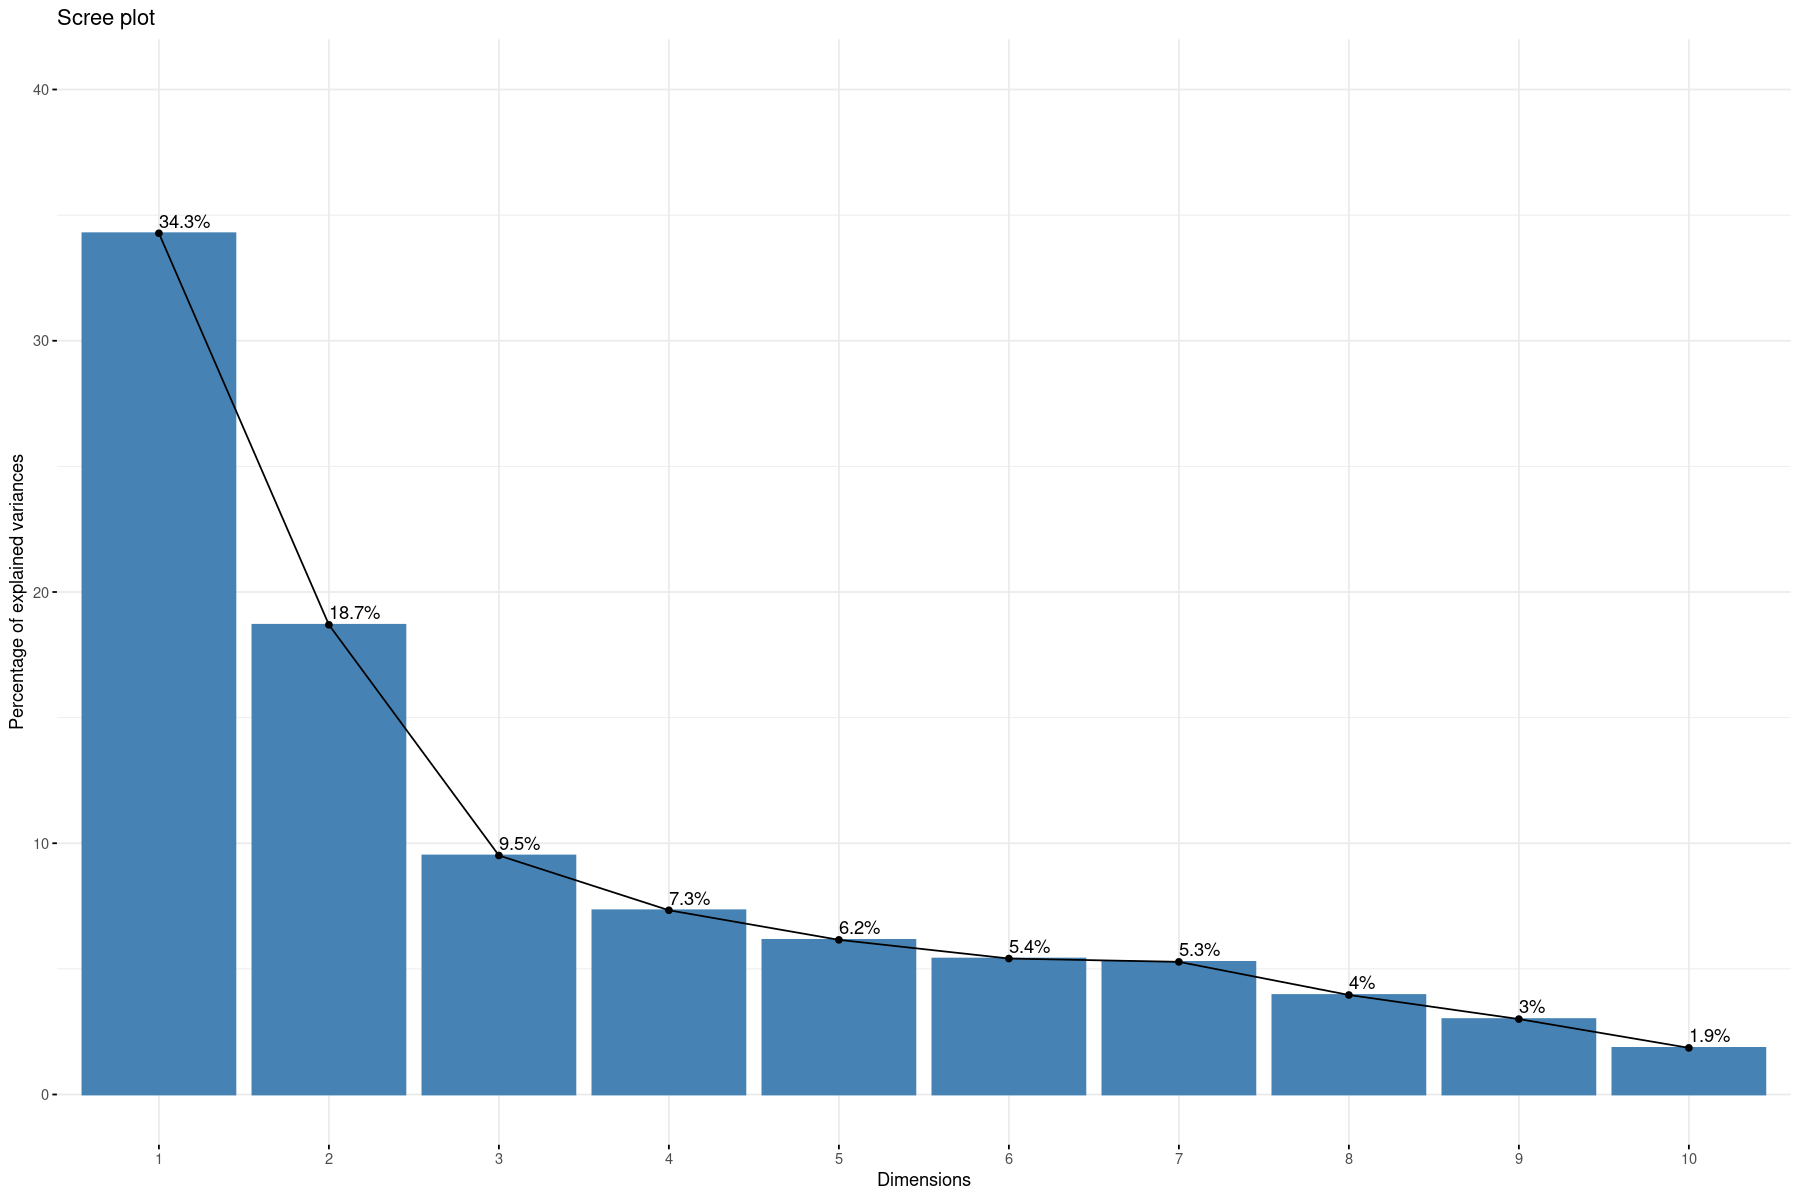

In [58]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,40))

Nous pouvons en effet voir par cette ACP, que la première composante explique 34.3% des valeurs du energy set.La deuxième composante, elle représente 18.7%. Nous pourrions réduire notre dimension à 2 car avec ces deux-ci, nous expliquons pratiquement la moitié du energy set. Il faudrait ajouter 4 dimensions pour avoir 80% des valeurs expliquées. 

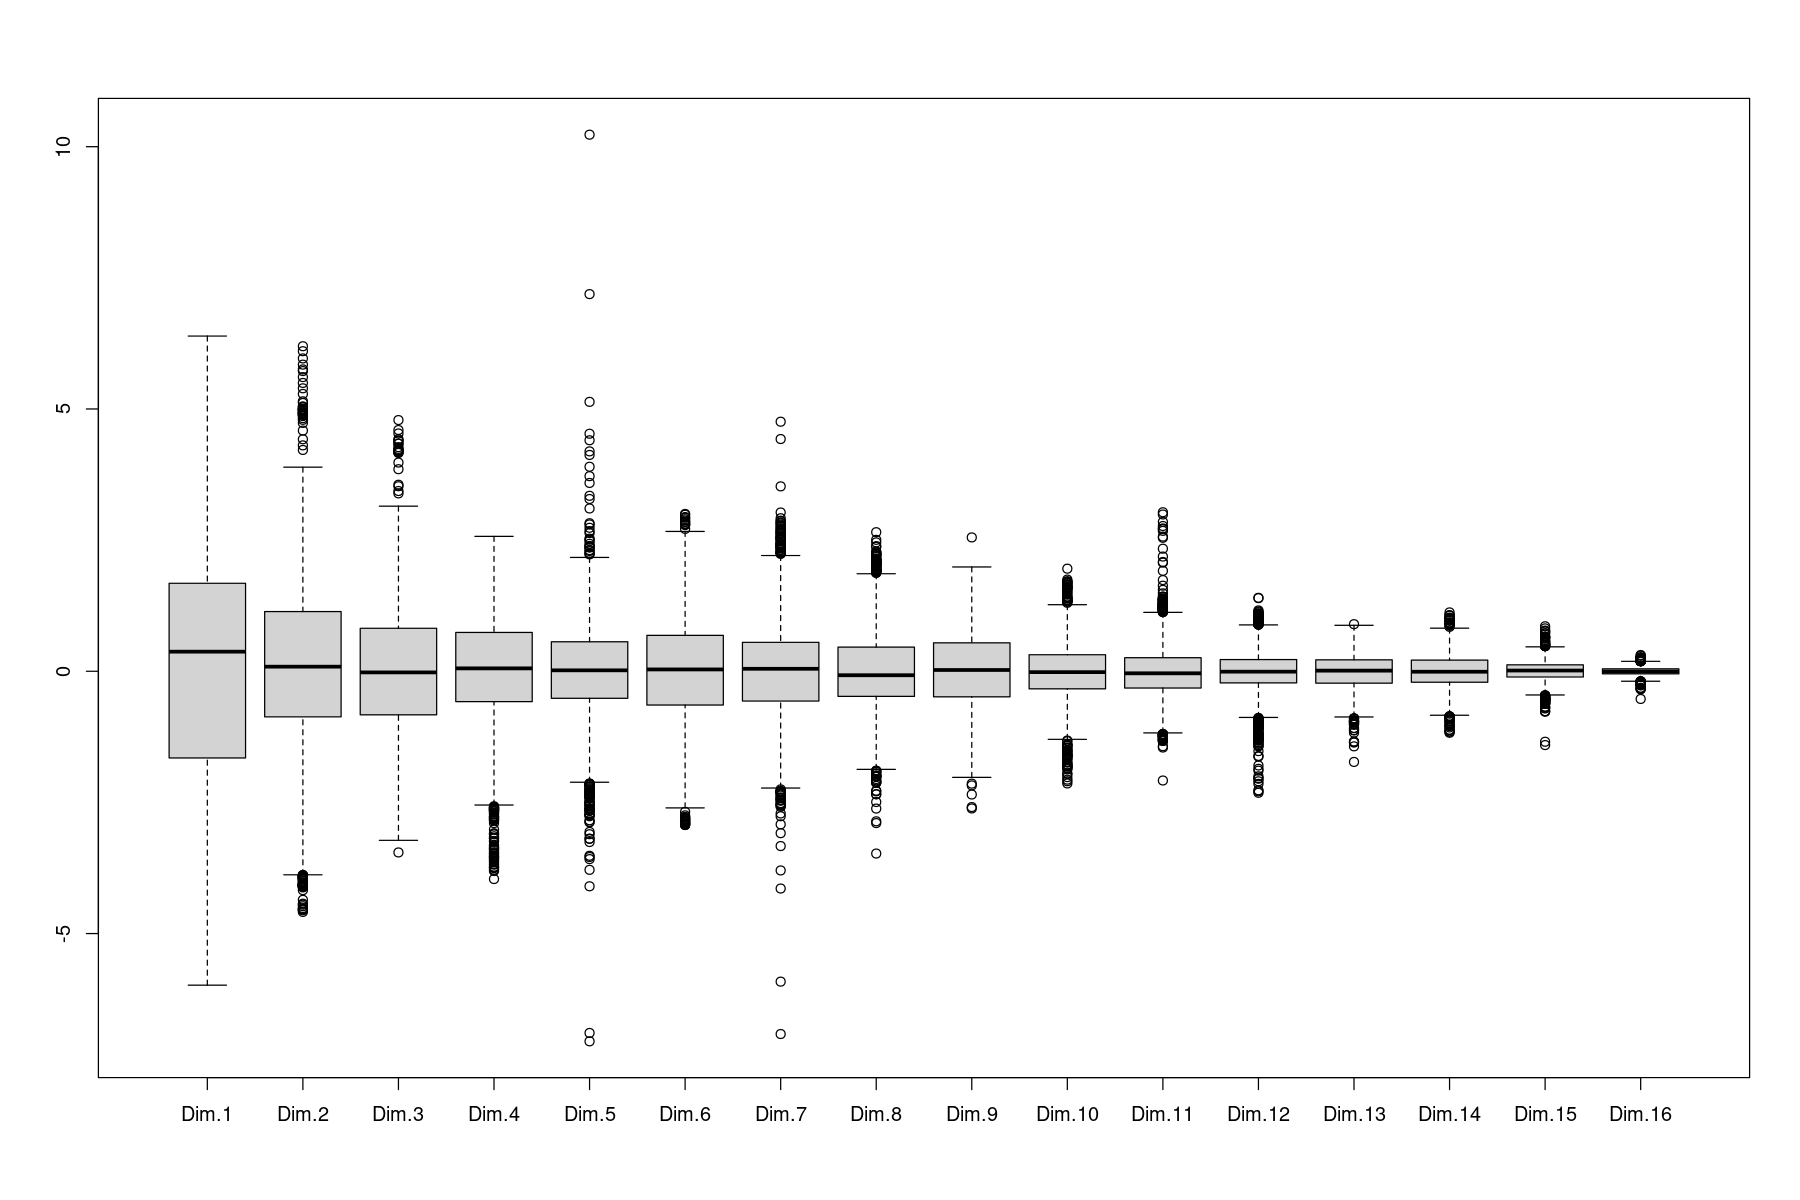

In [59]:
boxplot(resultat_pca$ind$coord)

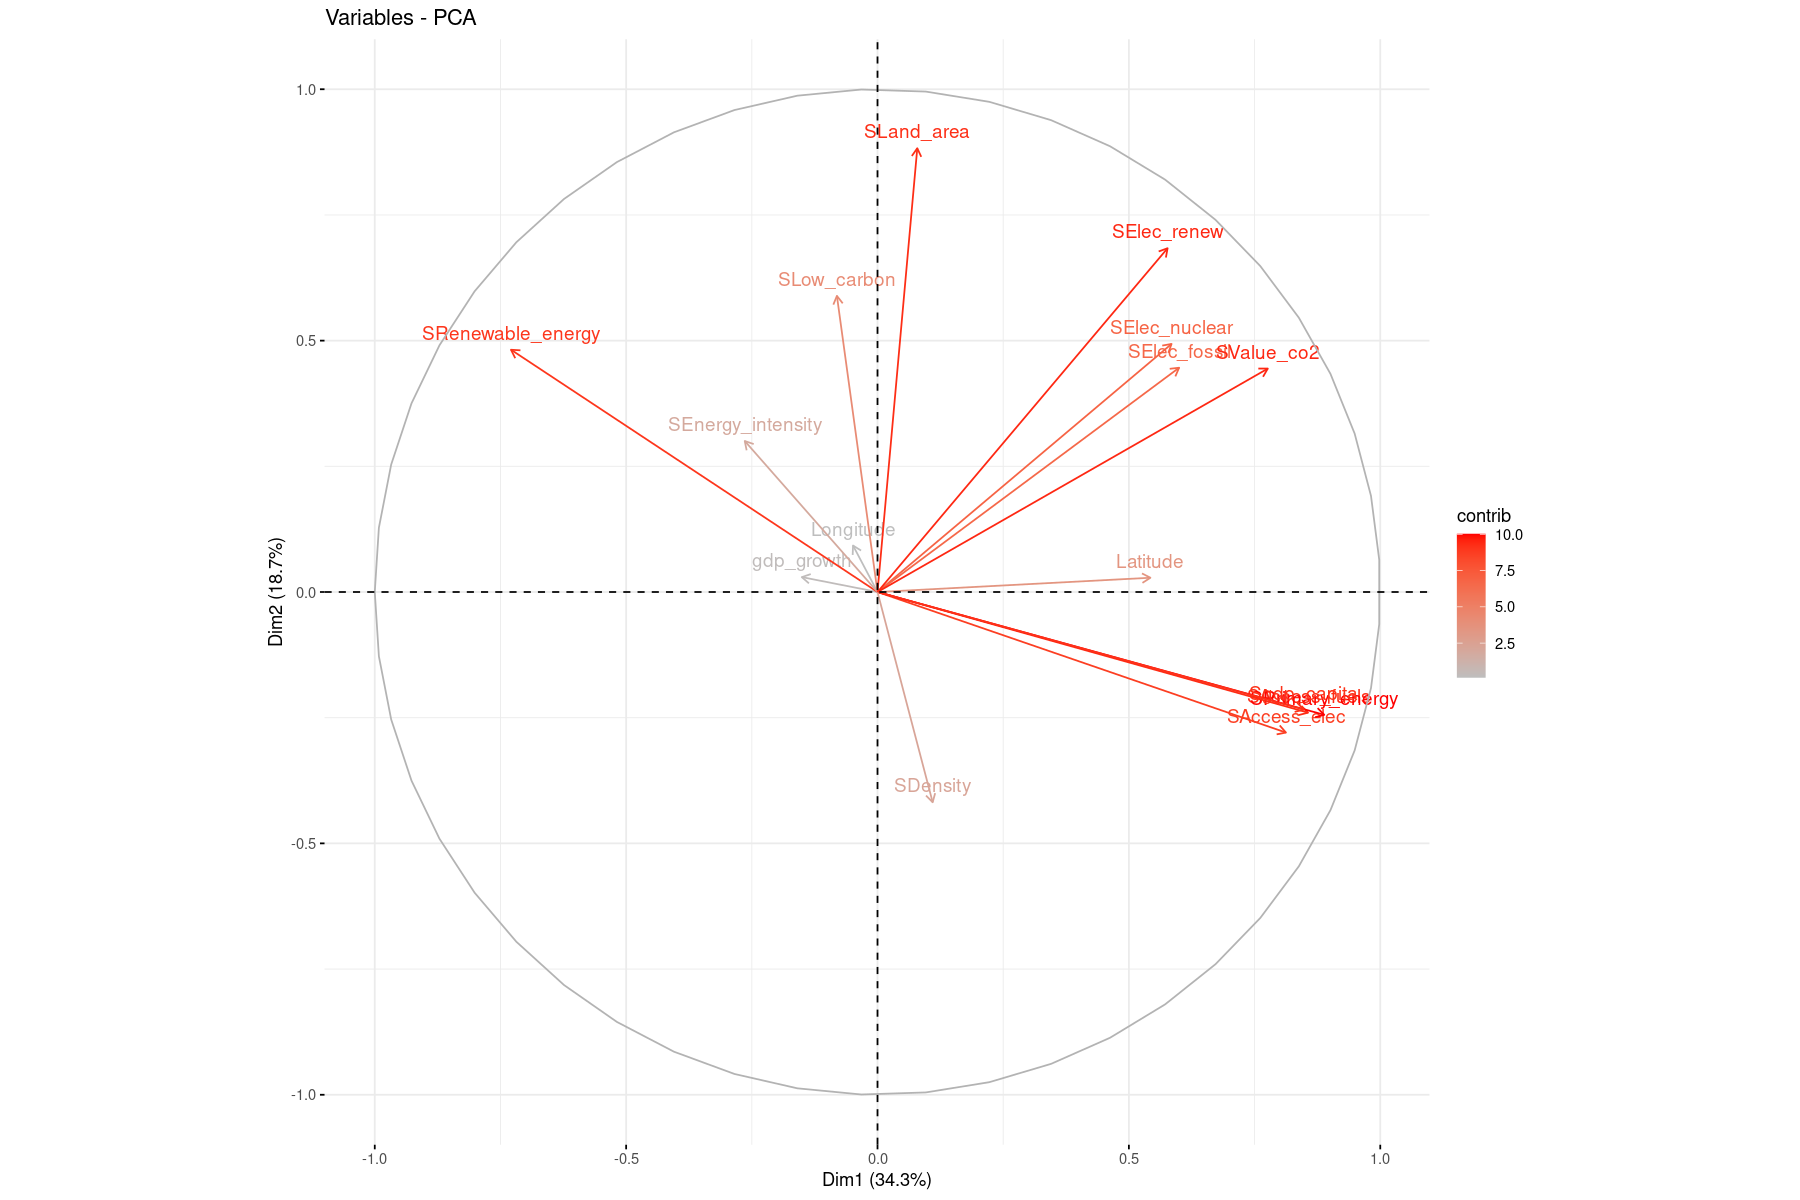

In [60]:
var=get_pca_var(resultat_pca)
fviz_pca_var(resultat_pca,col.var= "contrib",gradient.cols=c("grey", "red"))

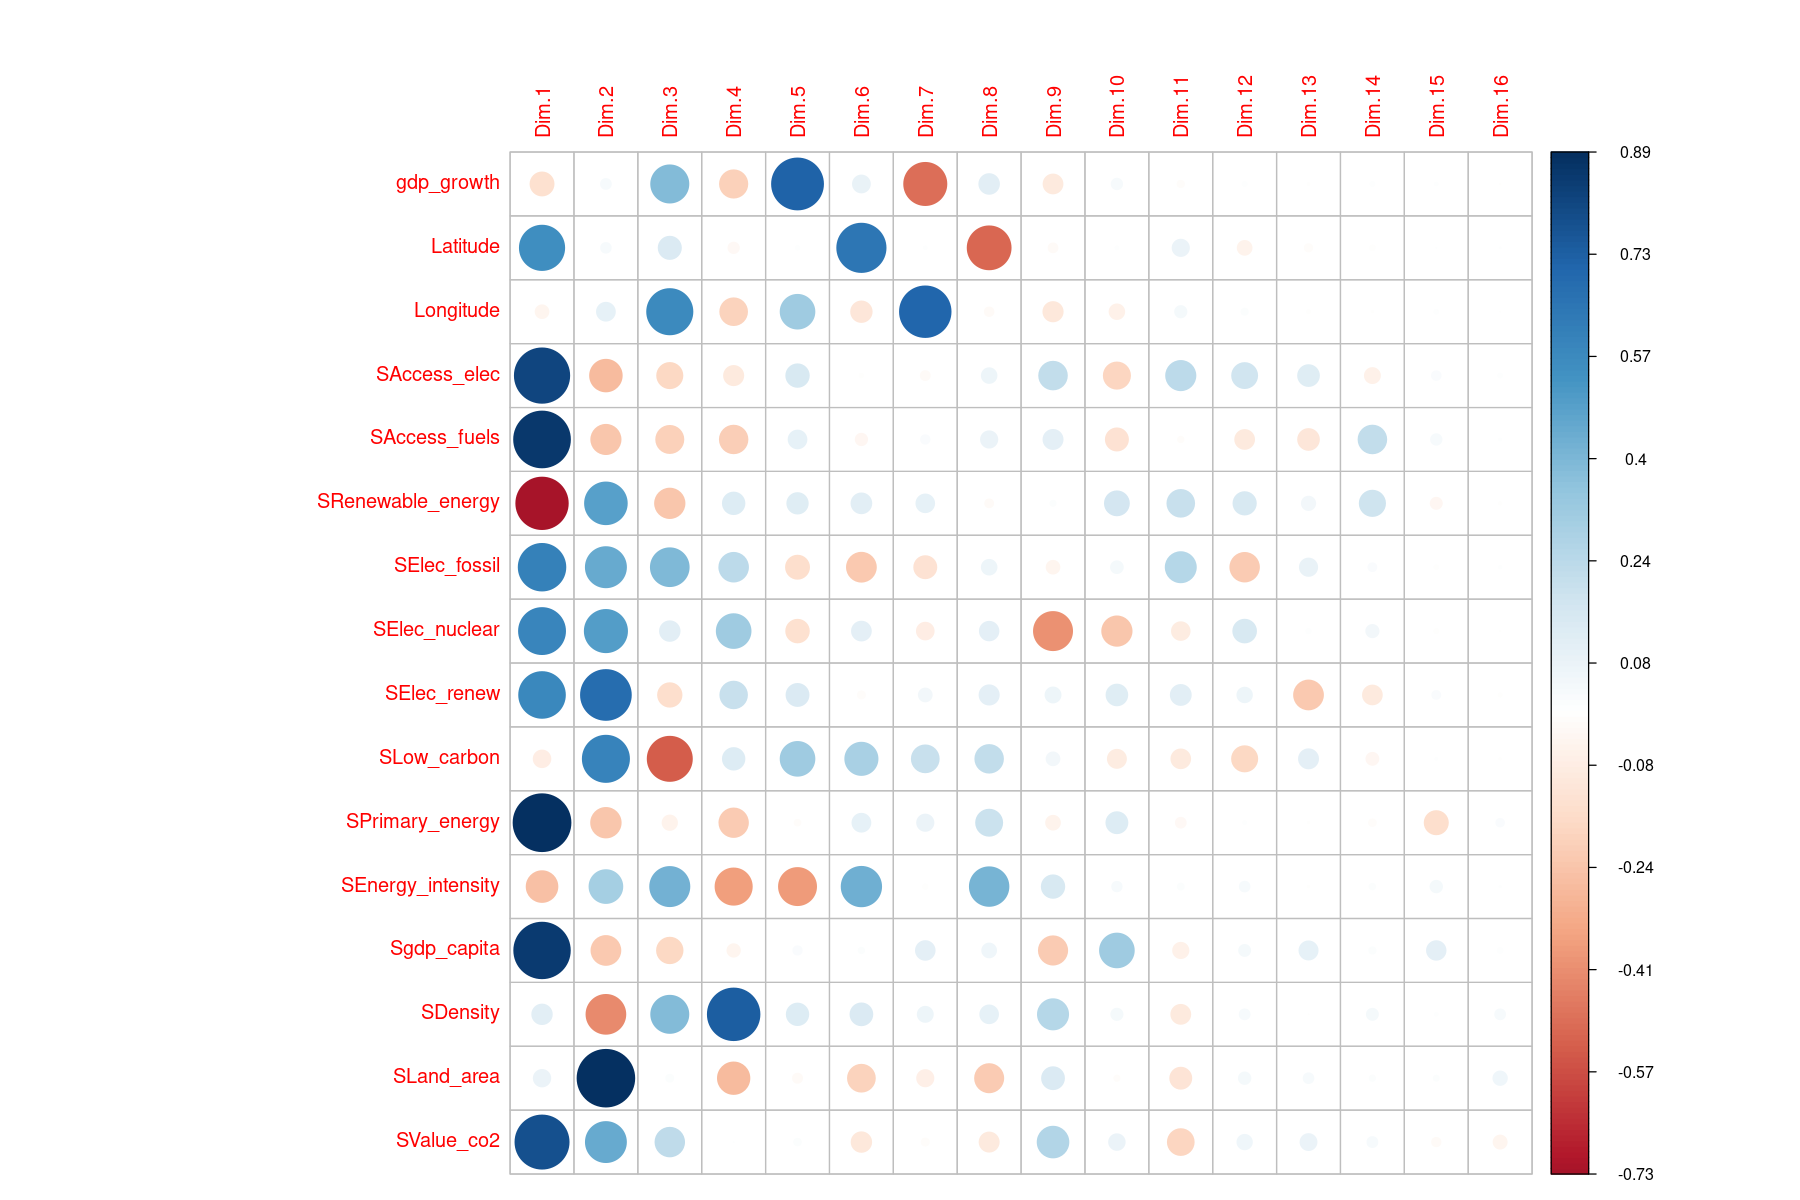

In [61]:
corrplot(resultat_pca$var$cor, is.corr=FALSE)

Dim 1 : Corrélée positivement avec Access_to_Electricity, Access_Clean_Fuel, Primary_energy_consumption, gdp_per_capita / Négativement avec Renewable_share

Dim 2 : Corrélée positivement Land_Area, Electricity_renewables

Dim 4 : Corrélée positivement Density

Dim 5 : Corrélée positivement gdp_growth

Dim 6 Corrélée positivement Latitude

# Modélisation

In [62]:
complete_energy$SElec_fossil = NULL
complete_energy$Value_co2 = NULL
complete_energy$Entity = NULL

La variable Entity ajoute beaucoup de variables ce qui perturbe notre étude

## Question 1

### Diviser échantillon d'apprentissage / de test

In [63]:
# str(data)

In [64]:
set.seed(183) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(complete_energy) # nombre de lignes dans les données
nvar <- ncol(complete_energy) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

# construction de l'échantillon d'apprentissage
datappr <-complete_energy[appri,] 
# construction de l'échantillon test
datestr <- complete_energy[testi, ] 

# vérification
str(datappr)
str(datestr)
#summary(datappr) 

'data.frame':	2294 obs. of  16 variables:
 $ Year             : Factor w/ 21 levels "2000","2001",..: 4 5 7 9 10 11 12 14 15 16 ...
 $ gdp_growth       : num  8.83 1.41 5.36 3.92 21.39 ...
 $ Latitude         : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude        : num  67.7 67.7 67.7 67.7 67.7 ...
 $ SAccess_elec     : num  2.69 3 3.42 3.75 3.84 ...
 $ SAccess_fuels    : num  2.35 2.48 2.7 2.87 2.97 ...
 $ SRenewable_energy: num  6.05 6.65 5.65 4.6 4.07 ...
 $ SElec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SElec_renew      : num  0.489 0.445 0.495 0.432 0.577 ...
 $ SLow_carbon      : num  8.19 7.93 8.73 8.6 9.11 ...
 $ SPrimary_energy  : num  5.44 5.32 5.72 6.41 6.88 ...
 $ SEnergy_intensity: num  0.336 0.182 0.405 0.663 0.811 ...
 $ Sgdp_capita      : num  2.63 2.68 2.79 2.95 3.04 ...
 $ SDensity         : num  4.09 4.09 4.09 4.09 4.09 ...
 $ SLand_area       : num  13.4 13.4 13.4 13.4 13.4 ...
 $ SValue_co2       : num  7.11 6.94 7.47 8.18 8.49 ...
'data.frame':	574 obs. of  1

Nous avons ici créé nous échantillon test et notre échantillon d'apprentissage. Nous pourrons donc tester notre modèle sur des données encore non traitées et éviter le surajustement. 

In [65]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(2, 17)+ylim(-0.8, 2)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

## Question 2

### Modèle linéaire

#### Sans sélection de variable

###### Sur données apprentissage

[1] "R2 = 0.961635616200232"

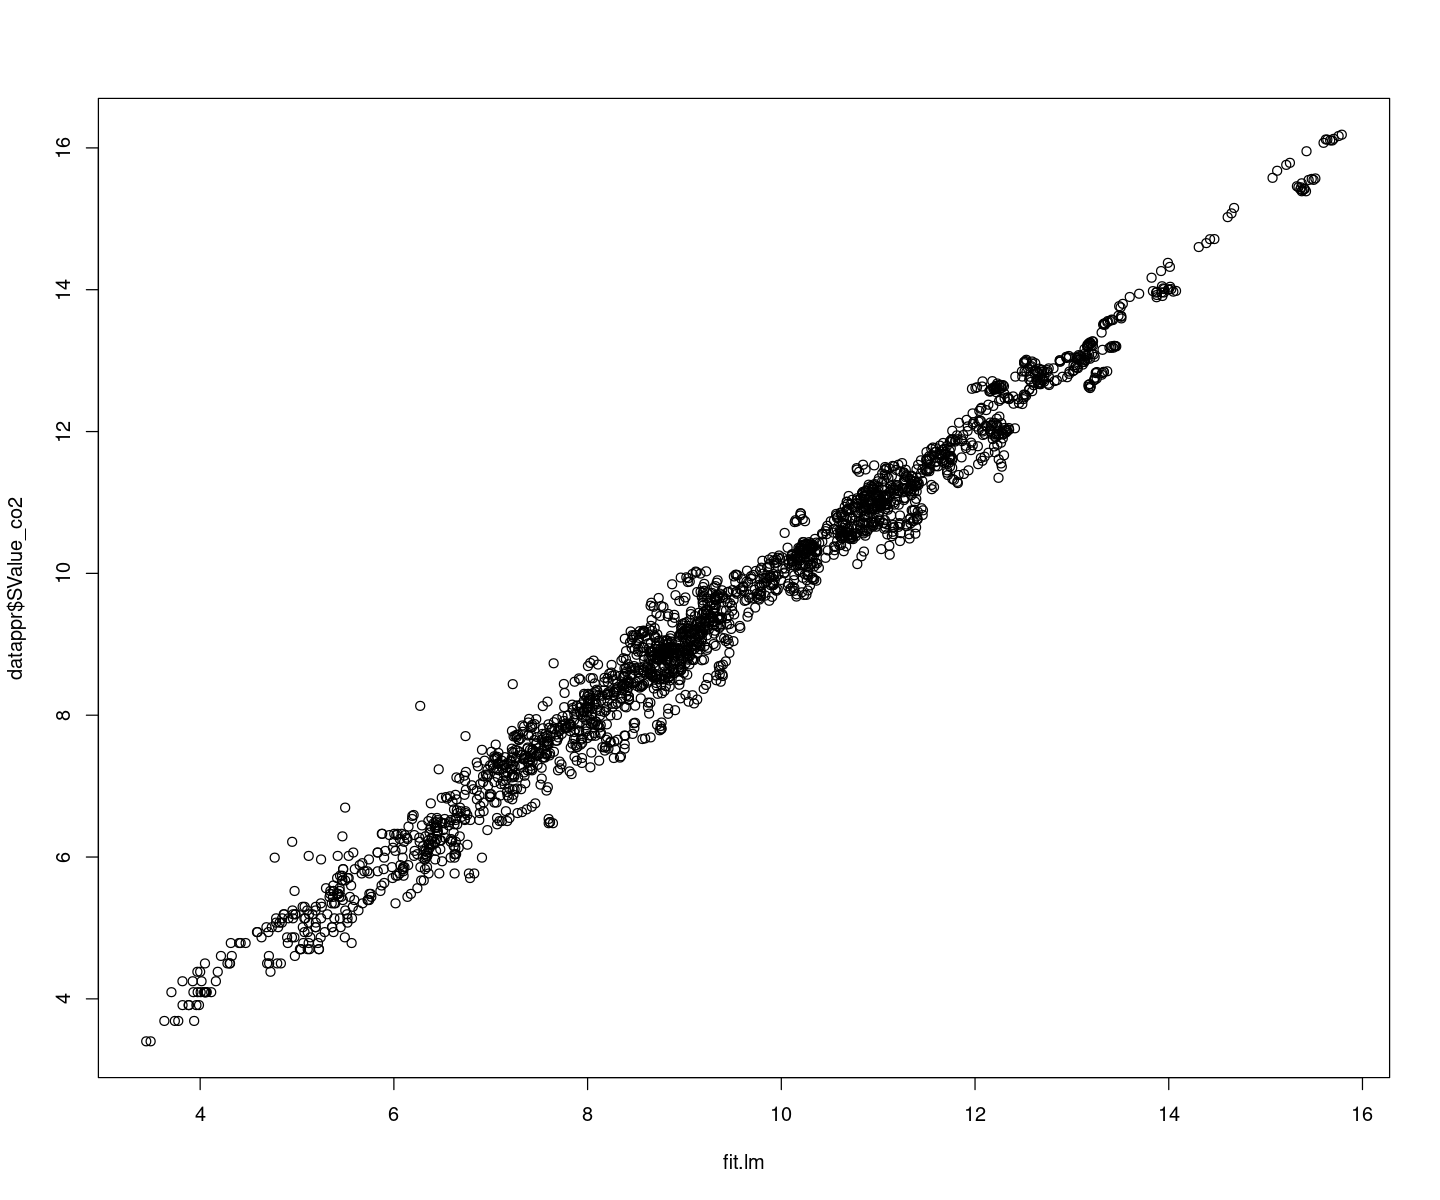

In [128]:
# estimation du modèle sans interaction
reg.lm <-aov(SValue_co2 ~ ., data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# MSE_rl = mean((datappr$SValue_co2 - fit.lm)^2)
# paste("MSE =", MSE_rl)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lm)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rl <- 1 - (SS_Residual / SS_Total)
R2a_rl = 1 - ((1-R2_bic*R2_bic)*(dim(datappr)[1]-1))/(dim(datappr)[1]-length(reg.lm$coefficients)-1)
paste("R2 =", R2a_rl)

plot(fit.lm,datappr$SValue_co2)

Warning message:
“Removed 38 rows containing missing values (`geom_point()`).”


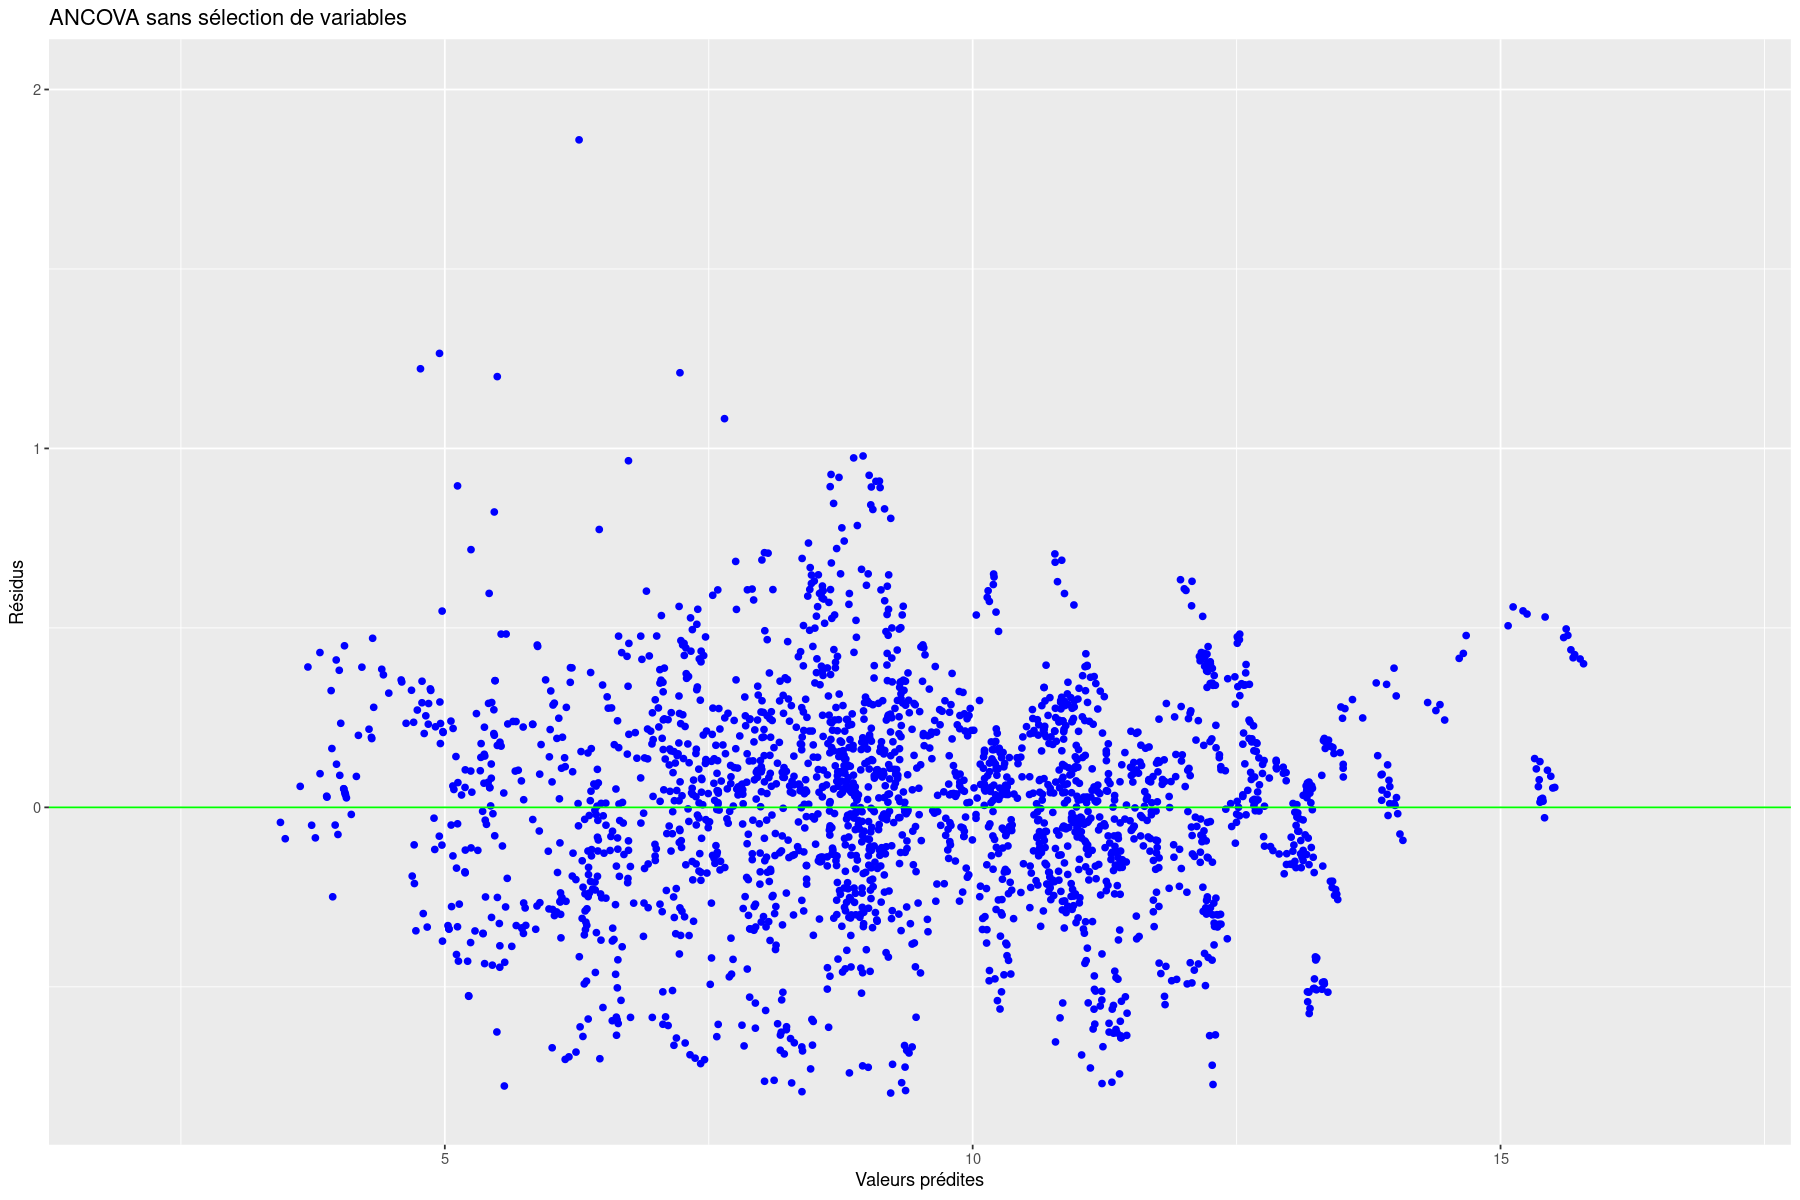

In [67]:

gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")


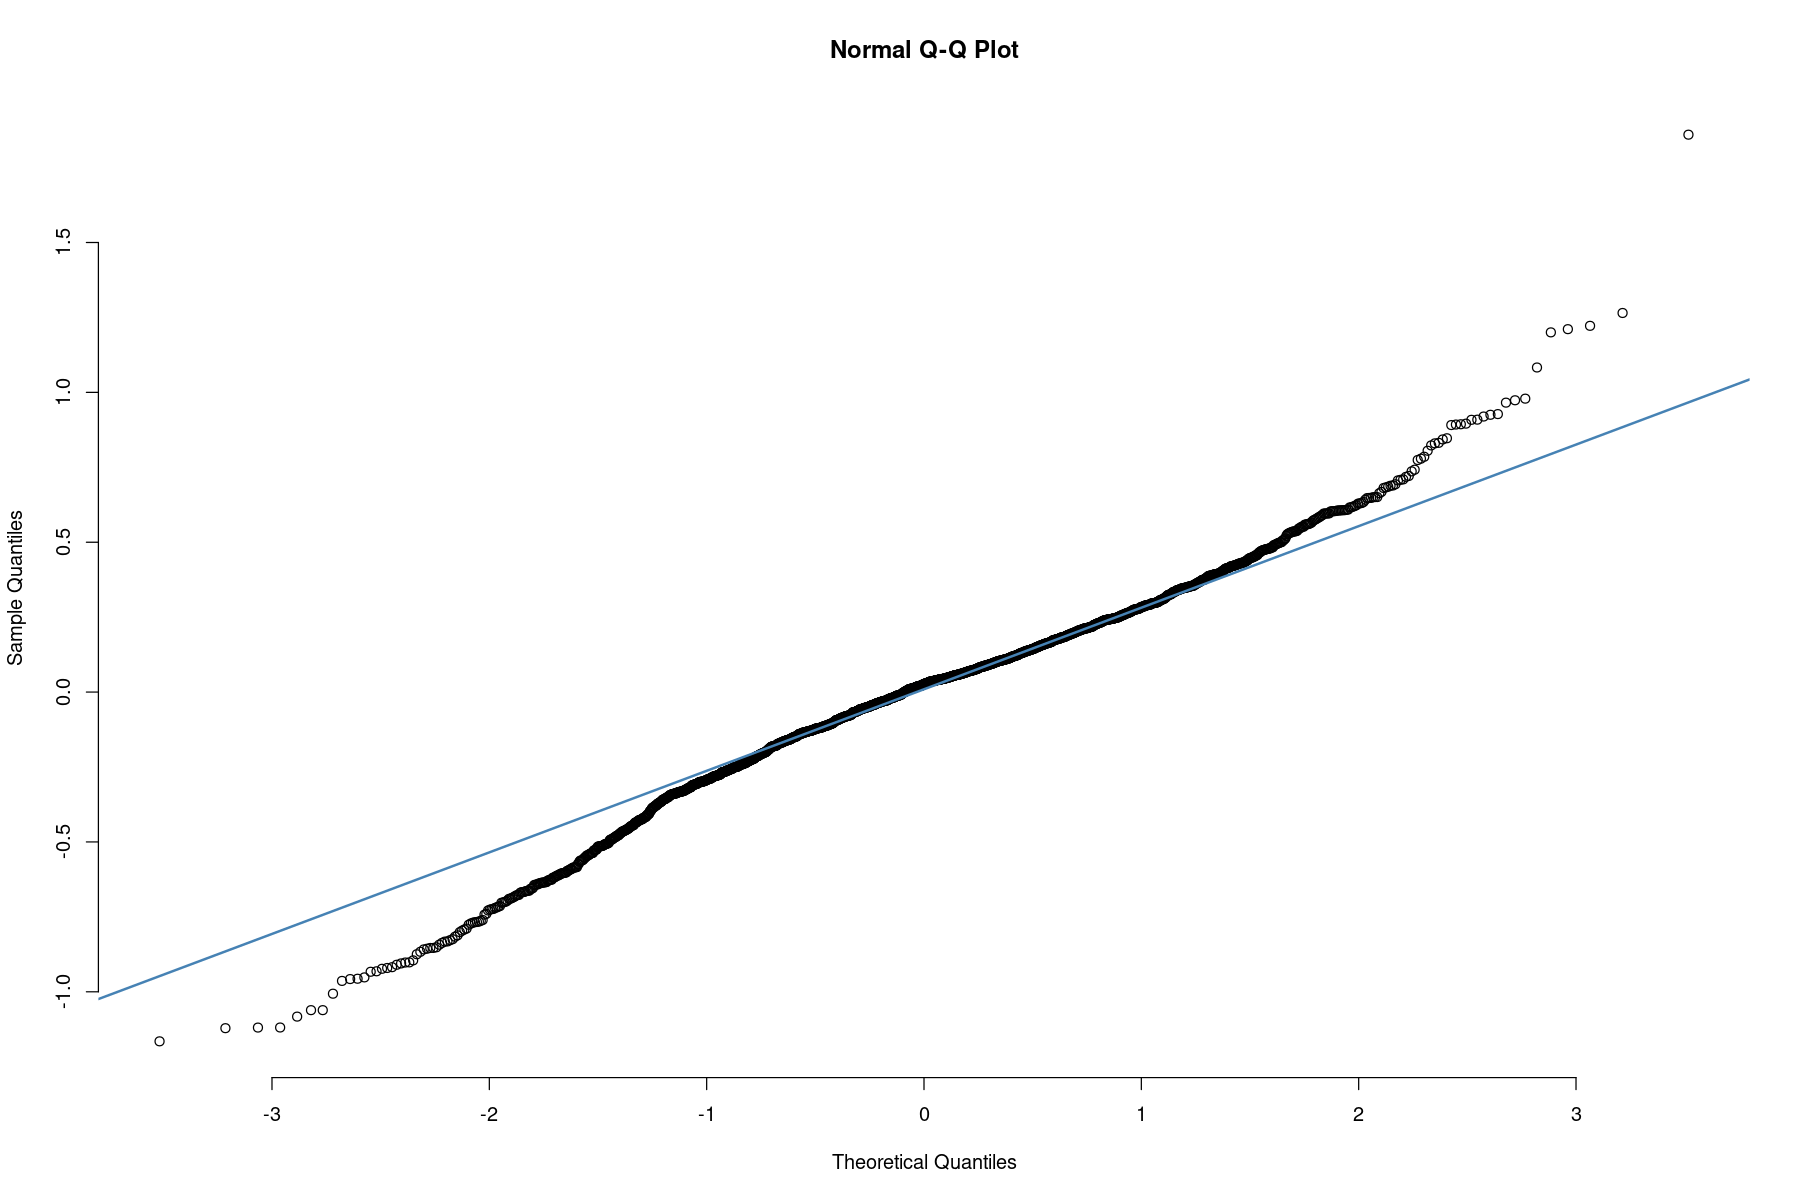

In [68]:
qqnorm(res.lm , pch = 1, frame = FALSE)
qqline(res.lm , col = "steelblue", lwd = 2)

In [69]:
summary(reg.lm)

                    Df Sum Sq Mean Sq   F value Pr(>F)    
Year                19     61       3    29.846 <2e-16 ***
gdp_growth           1     21      21   197.199 <2e-16 ***
Latitude             1   2217    2217 20670.729 <2e-16 ***
Longitude            1    120     120  1114.903 <2e-16 ***
SAccess_elec         1   1555    1555 14502.939 <2e-16 ***
SAccess_fuels        1    482     482  4493.154 <2e-16 ***
SRenewable_energy    1     20      20   189.737 <2e-16 ***
SElec_nuclear        1   2188    2188 20399.895 <2e-16 ***
SElec_renew          1   2235    2235 20836.882 <2e-16 ***
SLow_carbon          1    137     137  1275.367 <2e-16 ***
SPrimary_energy      1     35      35   323.589 <2e-16 ***
SEnergy_intensity    1     98      98   917.805 <2e-16 ***
Sgdp_capita          1     28      28   265.536 <2e-16 ***
SDensity             1      0       0     1.197  0.274    
SLand_area           1   3476    3476 32409.505 <2e-16 ***
Residuals         2260    242       0                   

**Le test de nullité des paramètres montre que seule la variable Density n'a pas un effet significatif sur la quantité de CO2 émise par un pays au niveau 5%. Cette variable peut donc être enlevées du modèle séparément**

## Modèle avec interactions

[1] "R2 = 0.954434730281979"

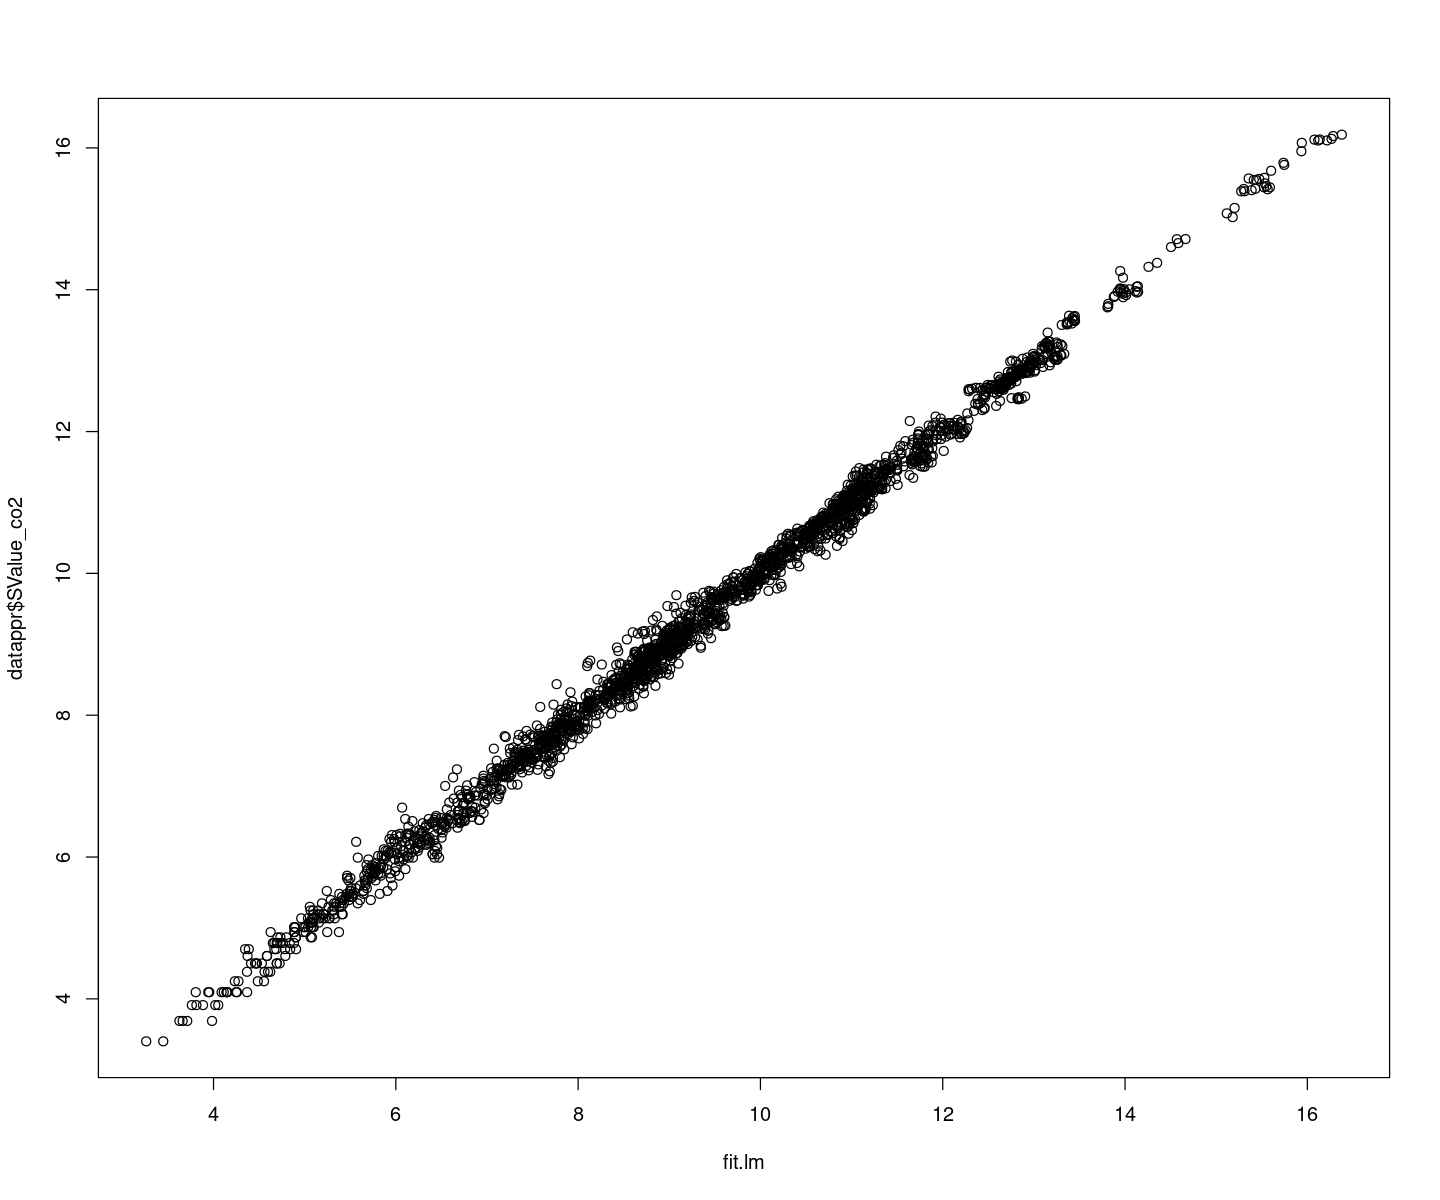

In [129]:
# estimation du modèle sans interaction
reg.lm <-aov(SValue_co2 ~ .^2, data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# MSE_rl = mean((datappr$SValue_co2 - fit.lm)^2)
# paste("MSE =", MSE_rl)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lm)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rl <- 1 - (SS_Residual / SS_Total)
R2a_rl = 1 - ((1-R2_bic*R2_bic)*(dim(datappr)[1]-1))/(dim(datappr)[1]-length(reg.lm$coefficients)-1)
paste("R2 =", R2a_rl)

plot(fit.lm,datappr$SValue_co2)

In [71]:
summary(reg.lm)

                                      Df Sum Sq Mean Sq   F value   Pr(>F)    
Year                                  19     61       3 1.031e+02  < 2e-16 ***
gdp_growth                             1     21      21 6.813e+02  < 2e-16 ***
Latitude                               1   2217    2217 7.142e+04  < 2e-16 ***
Longitude                              1    120     120 3.852e+03  < 2e-16 ***
SAccess_elec                           1   1555    1555 5.011e+04  < 2e-16 ***
SAccess_fuels                          1    482     482 1.552e+04  < 2e-16 ***
SRenewable_energy                      1     20      20 6.555e+02  < 2e-16 ***
SElec_nuclear                          1   2188    2188 7.048e+04  < 2e-16 ***
SElec_renew                            1   2235    2235 7.199e+04  < 2e-16 ***
SLow_carbon                            1    137     137 4.406e+03  < 2e-16 ***
SPrimary_energy                        1     35      35 1.118e+03  < 2e-16 ***
SEnergy_intensity                      1     98     

**Le modèle avec interactions entre les variables surajuste les données c'est à dire qu'il s'adapte trop bien à nos données d'entrainement. En prenant en compte toutes les interactions, nous obtenons un modèle difficile à interpreter et avec un grand nombre de variables. Nous allons donc faire une sélection de variables avec le critère BIC pénalisant les modèles complexes.
Nous avons fait le choix de ce critère car c'est celui qui pénalise le plus la dimension du modèle. Ainsi, il favorise les modèles qui expliquent efficacement les données tout en restant aussi simples que possible.** 

On a pas besoin des intéractions. Nous allons donc faire la sélection BIC sur le modèle sans intéractions.

#### Avec sélection de variable (BIC)

Le BIC, ou critère d'information bayésien, vise à choisir le modèle le plus adéquat parmi plusieurs candidats en évaluant la balance entre l'ajustement aux données et la complexité du modèle. Il pénalise les modèles plus complexes pour éviter le sur-ajustement, tout en favorisant ceux qui expliquent efficacement les données. En résumé, le BIC permet une sélection automatique des modèles les mieux adaptés en considérant à la fois leur performance et leur complexité.

###### Données apprentissage

In [78]:
reg.glm <- glm(SValue_co2 ~ ., data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- stepAIC(reg.glm, direction = "backward",k = log(nrow(datestr)), trace = 0)

Warning message:
“Removed 24 rows containing missing values (`geom_point()`).”


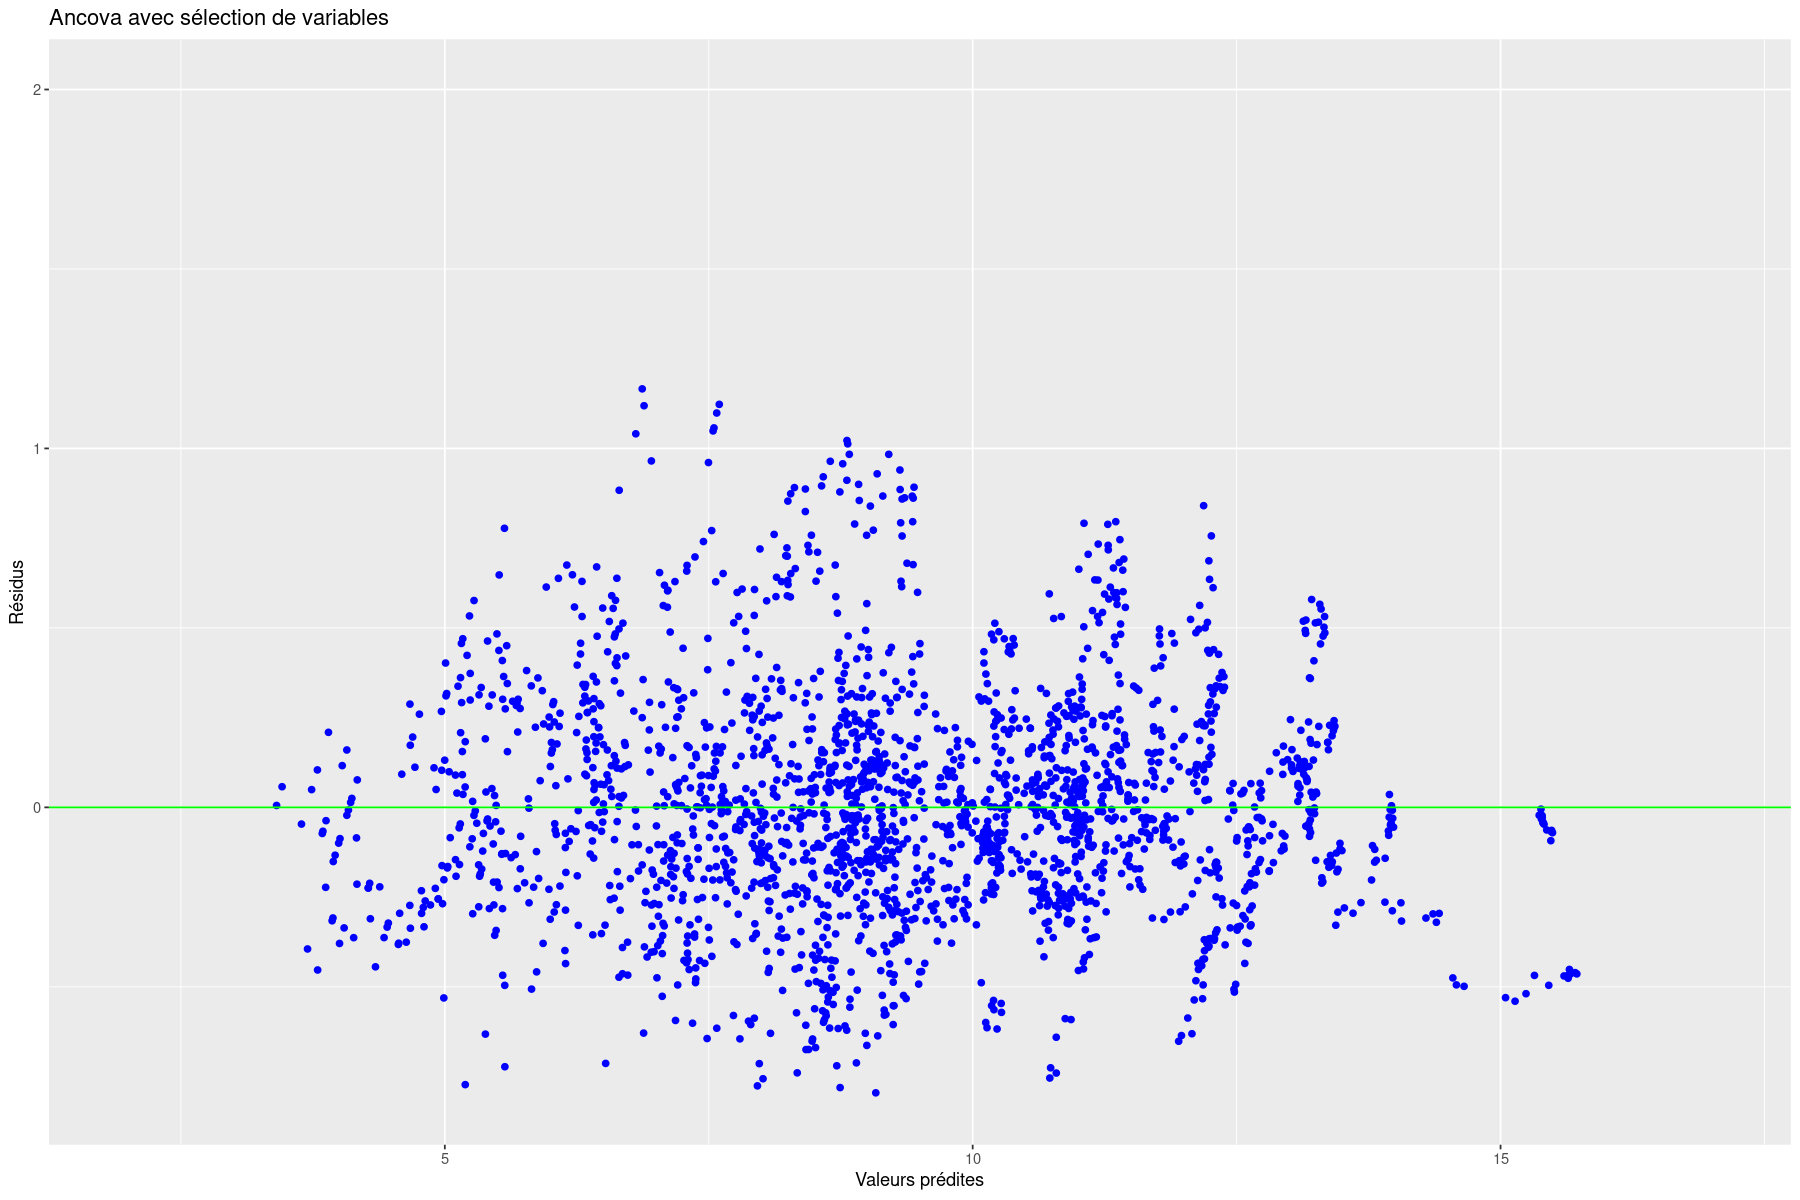

In [79]:
fit.bic=reg.glm.step$fitted
res.bic=fit.bic-datappr[,"SValue_co2"]
gplot.res(fit.bic,res.bic,titre="Ancova avec sélection de variables")

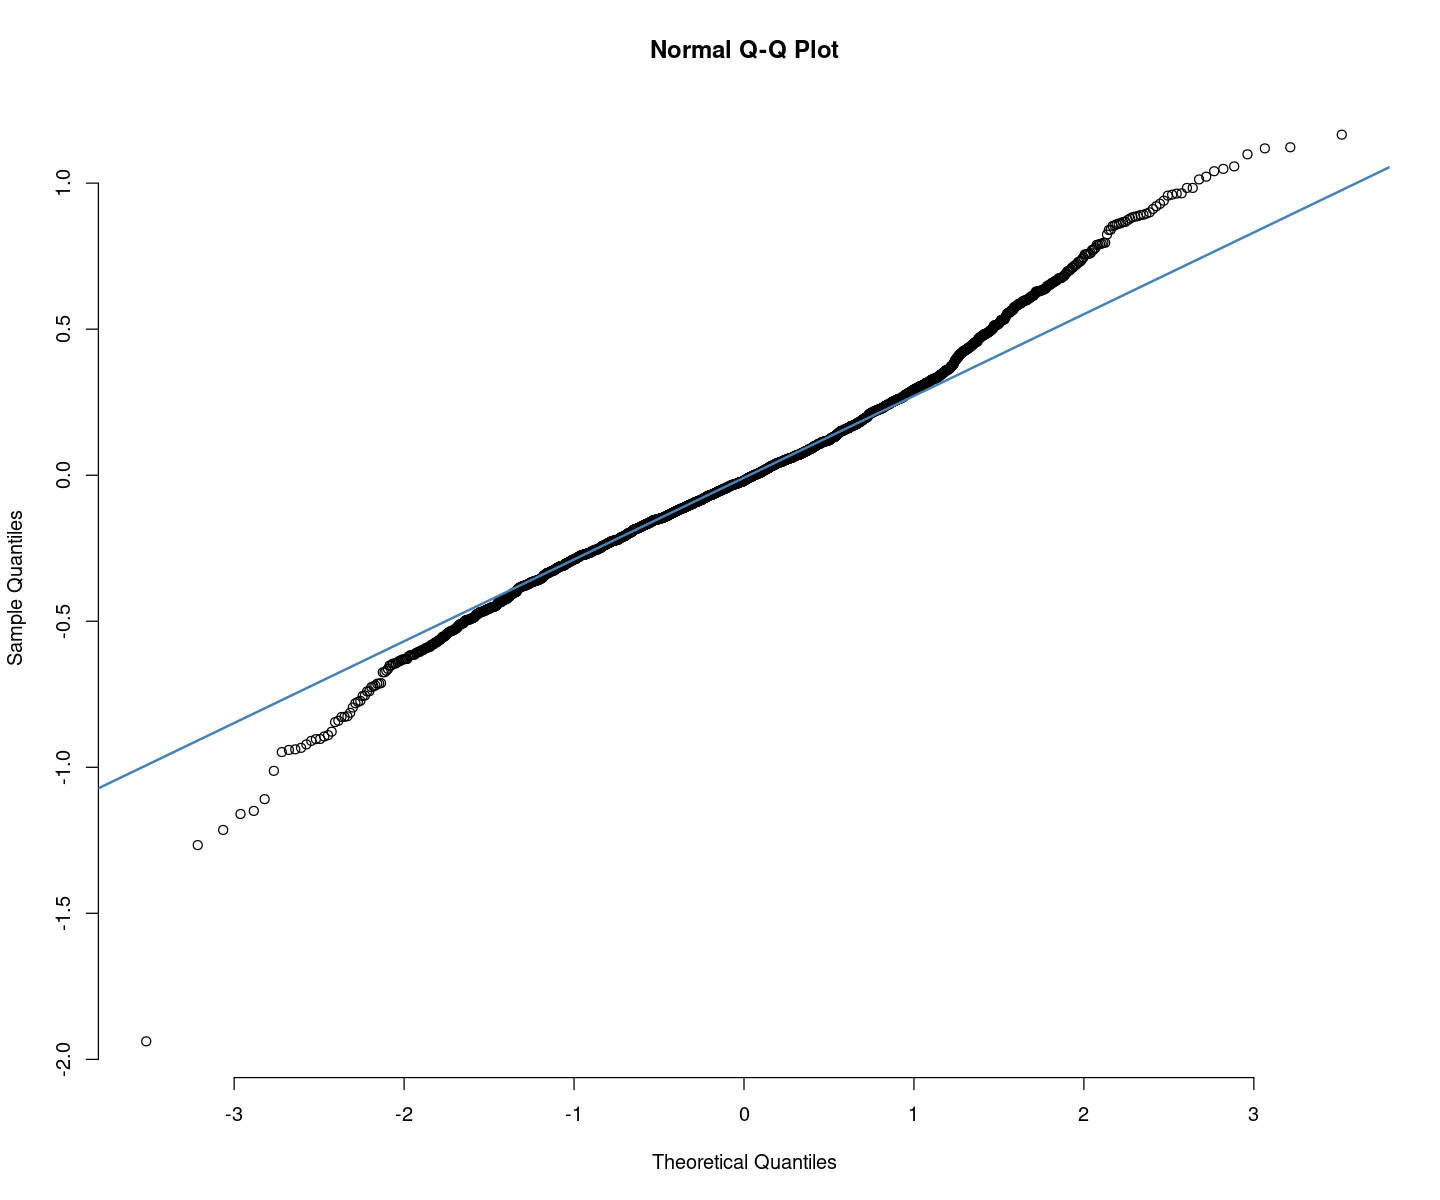

In [127]:
qqnorm(res.bic , pch = 1, frame = FALSE)
qqline(res.bic , col = "steelblue", lwd = 2)

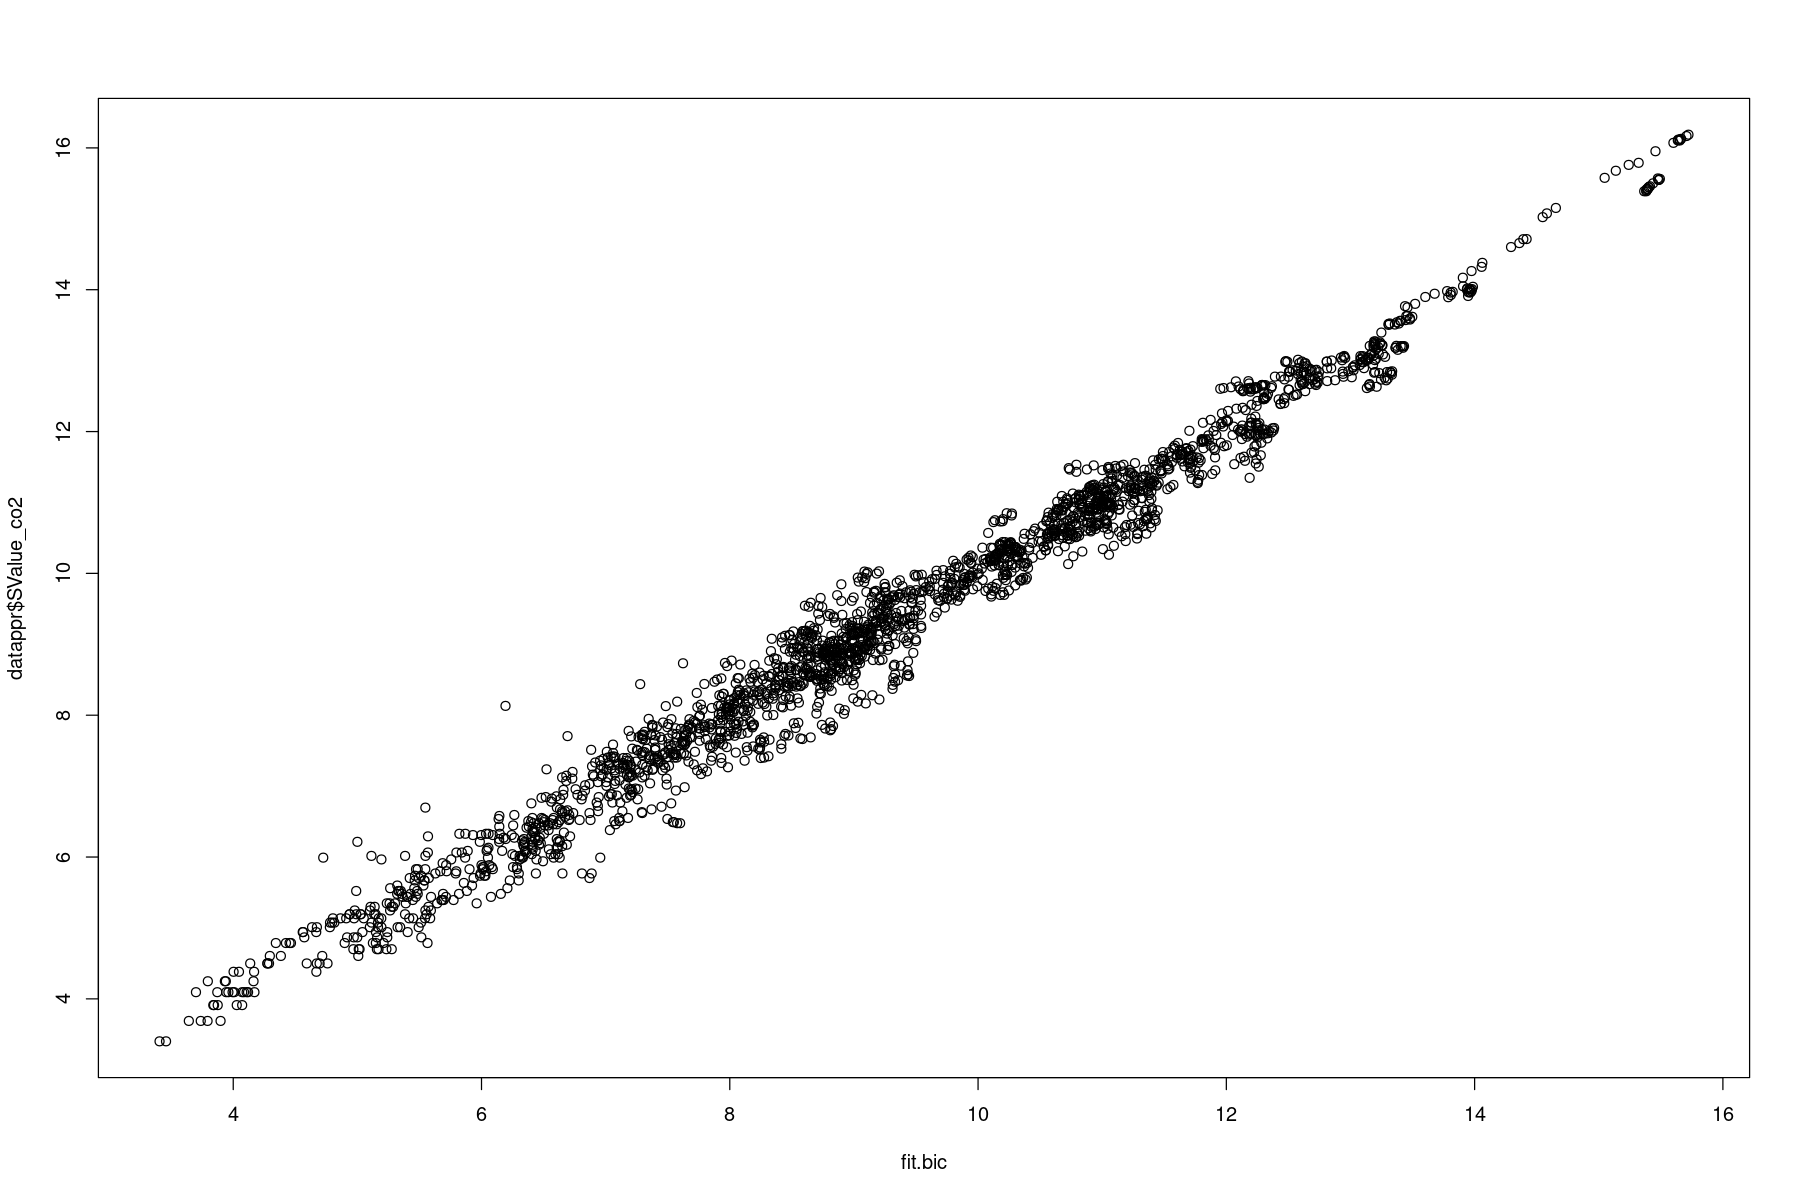

In [80]:
plot(fit.bic,datappr$SValue_co2)

In [136]:
#as.data.frame(reg.glm.step$coefficients) pour la question d'après

La séléection BIC nous a permis d'écarter deux variables explicatives : Year et Longitude

In [96]:
summary(reg.glm.step)


Call:
glm(formula = SValue_co2 ~ gdp_growth + Latitude + SAccess_elec + 
    SAccess_fuels + SRenewable_energy + SElec_nuclear + SElec_renew + 
    SLow_carbon + SPrimary_energy + SEnergy_intensity + Sgdp_capita + 
    SDensity + SLand_area, data = datappr)

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.478e+01  1.714e-01 -86.204  < 2e-16 ***
gdp_growth        -4.580e-03  1.558e-03  -2.939 0.003325 ** 
Latitude           1.481e-03  3.224e-04   4.595 4.57e-06 ***
SAccess_elec       3.750e-01  1.910e-02  19.630  < 2e-16 ***
SAccess_fuels      8.563e-02  1.321e-02   6.484 1.09e-10 ***
SRenewable_energy -7.338e-02  5.675e-03 -12.930  < 2e-16 ***
SElec_nuclear      1.835e-02  7.204e-03   2.547 0.010943 *  
SElec_renew       -3.577e-02  9.532e-03  -3.753 0.000179 ***
SLow_carbon       -3.638e-02  3.053e-03 -11.916  < 2e-16 ***
SPrimary_energy    4.454e-01  1.716e-02  25.962  < 2e-16 ***
SEnergy_intensity  1.781e-01  1.943e-02   9.168  < 2e-1

###### MSE et R2

In [95]:

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.bic)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_bic <- 1 - (SS_Residual / SS_Total)
R2a_bic = 1 - ((1-R2_bic*R2_bic)*(dim(datappr)[1]-1))/(dim(datappr)[1]-length(reg.glm.step$coefficients)-1)
paste("R2 ajusté=", R2a_bic)

[1] "R2 ajusté= 0.96197229354819"

###### Données tests

In [139]:
# pred.lm=predict(reg.lm,newdata=datestr)
# # Erreur quadratique moyenne de prévision
# sum((pred.lm-datestr[,"SValue_co2"])^2)/nrow(datestr)
# err.lm=pred.lm-datestr[,"SValue_co2"]
# gplot.res(pred.lm,err.lm,titre="")
# plot(pred.lm,datestr$SValue_co2)

#### Avec pénalisation (LASSO)

Etudions notre modèle selon le critère LASSO.


Le but du LASSO est de trouver un modèle qui minimise l'erreur de prédiction tout en contrôlant la taille des coefficients des variables explicatives. En imposant une pénalité sur la somme des valeurs absolues des coefficients, le LASSO favorise des solutions où certains coefficients sont réduits à zéro. En conséquence, il permet non seulement de prédire avec précision, mais aussi de sélectionner les variables les plus importantes pour la prédiction, ce qui réduit automatiquement la complexité du modèle en excluant les variables moins significatives.

###### Données apprentissage

Year2000 Year2001 Year2002 Year2003 Year2004 Year2005 Year2006 Year2007
4  0        0        0        1        0        0        0        0       
5  0        0        0        0        1        0        0        0       
7  0        0        0        0        0        0        1        0       
9  0        0        0        0        0        0        0        0       
10 0        0        0        0        0        0        0        0       
11 0        0        0        0        0        0        0        0       
   Year2008 Year2009 ⋯ SAccess_fuels SRenewable_energy SElec_nuclear
4  0        0        ⋯ 2.351375      6.054750          0            
5  0        0        ⋯ 2.476538      6.651316          0            
7  0        0        ⋯ 2.698000      5.647123          0            
9  1        0        ⋯ 2.873565      4.601087          0            
10 0        1        ⋯ 2.965273      4.065710          0            
11 0        0        ⋯ 3.044522      3.892300          0            
   SElec_renew SLow_carbon SPrimary_energy SEnergy_intensity Sgdp_capita
4  0.4885800   8.186653    5.437941        0.3364722         2.625308   
5  0.4446858   7.932298    5.319253        0.1823216         2.676834   
7  0.4946962   8.728716    5.718411        0.4054651         2.787470   
9  0.4317824   8.600733    6.409901        0.6626880         2.949488   
10 0.5766134   9.109266    6.882487        0.8109302         3.040274   
11 0.5596158   8.932370    7.075718        0.9001613         3.148837   
   SDensity SLand_area
4  4.094345 13.38815  
5  4.094345 13.38815  
7  4.094345 13.38815  
9  4.094345 13.38815  
10 4.094345 13.38815  
11 4.094345 13.38815

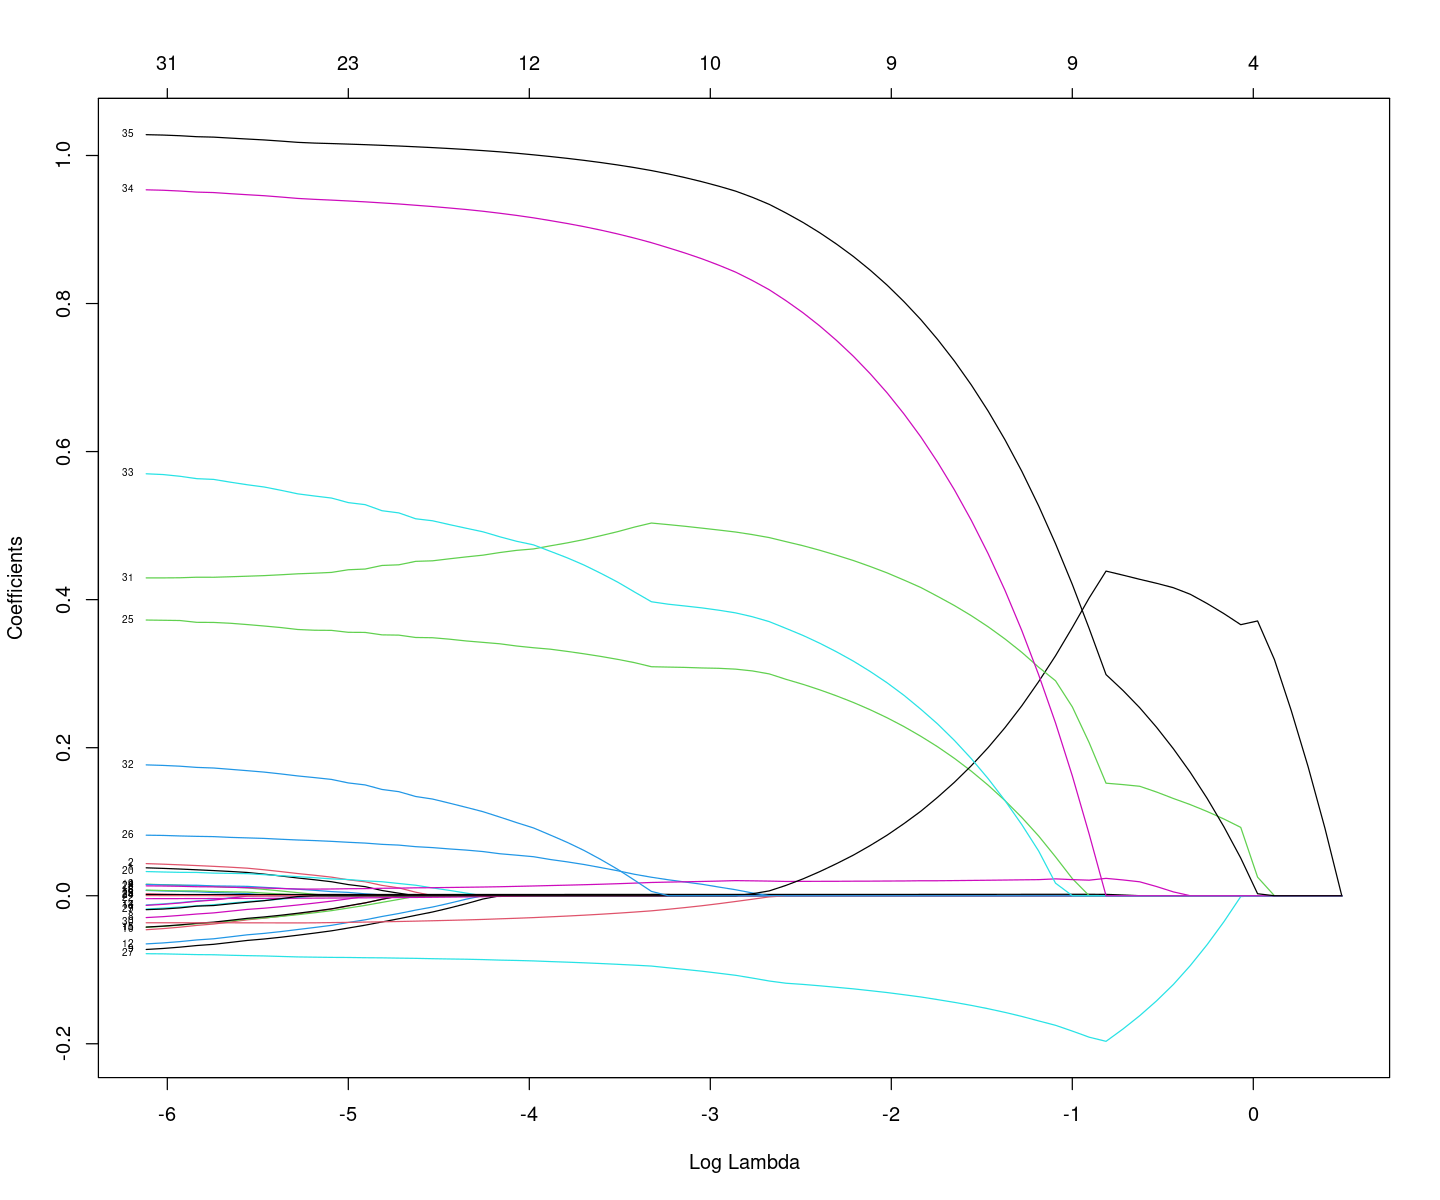

In [138]:
# Dans glmnet, le 17 correspond à l'indice de notre SvalueCo2 qu'il faut mettr en y ( variable à prédire) et pas dans x.
# Il faudra aussi enlever les factors ( entity et year )
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(SValue_co2 ~ .-1, data = datappr)
reg.lasso <- glmnet(y = datappr$SValue_co2, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
#legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))



head(x.mat)

##### Choix optimal de l'hyperparamètre

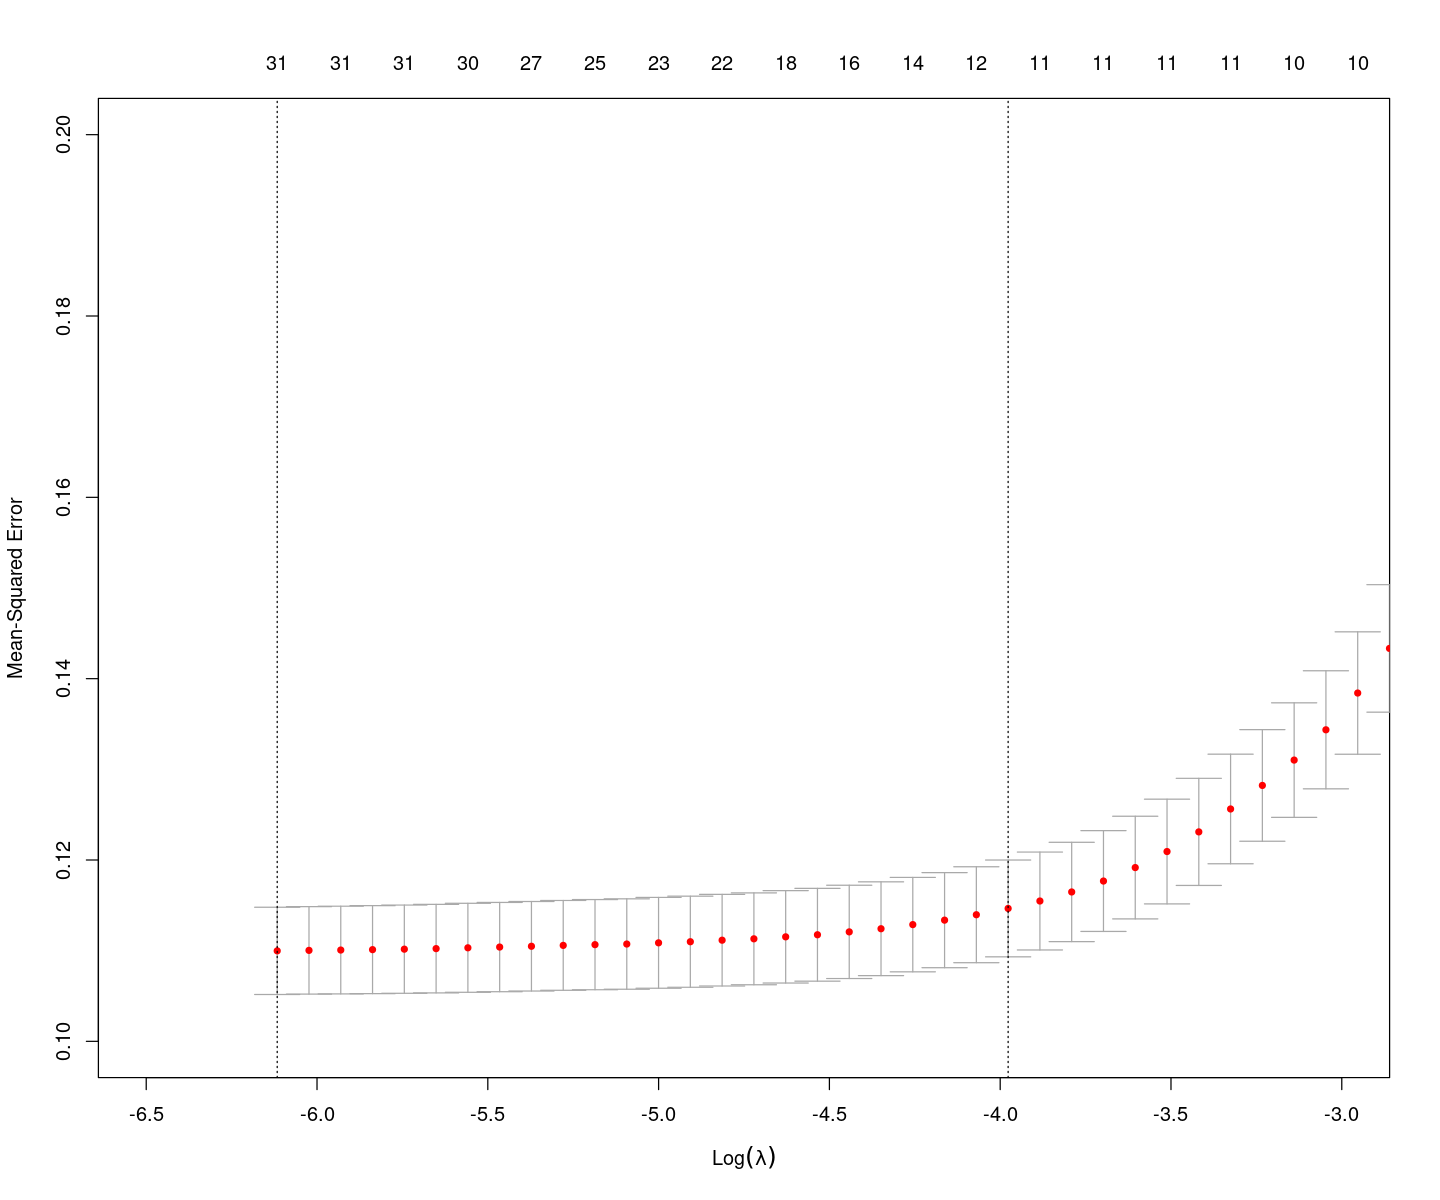

In [139]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 16], x = x.mat, nfolds = 10)
plot(reg.lasso.cv,xlim=c(-6.5,-3),ylim=c(0.1,0.2))

On a le choix entre lambda min et lambda 1se. Au vue du nombre de variables conséquentes que nous avons, il est pertinent d'en supprimer un max donc on prend 1se

In [140]:
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.019"

36 x 1 sparse Matrix of class "dgCMatrix"
                             s1
(Intercept)       -1.359818e+01
Year2000           .           
Year2001           .           
Year2002           .           
Year2003           .           
Year2004           .           
Year2005           .           
Year2006           .           
Year2007           .           
Year2008           .           
Year2009           .           
Year2010           .           
Year2011           .           
Year2012           .           
Year2013           .           
Year2014           .           
Year2015           .           
Year2016           .           
Year2017           .           
Year2018           .           
Year2019           .           
Year2020           .           
gdp_growth        -1.871127e-04
Latitude           1.705864e-03
Longitude          .           
SAccess_elec       3.350167e-01
SAccess_fuels      5.272588e-02
SRenewable_energy -8.805590e-02
SElec_nuclear      1.318647e-0

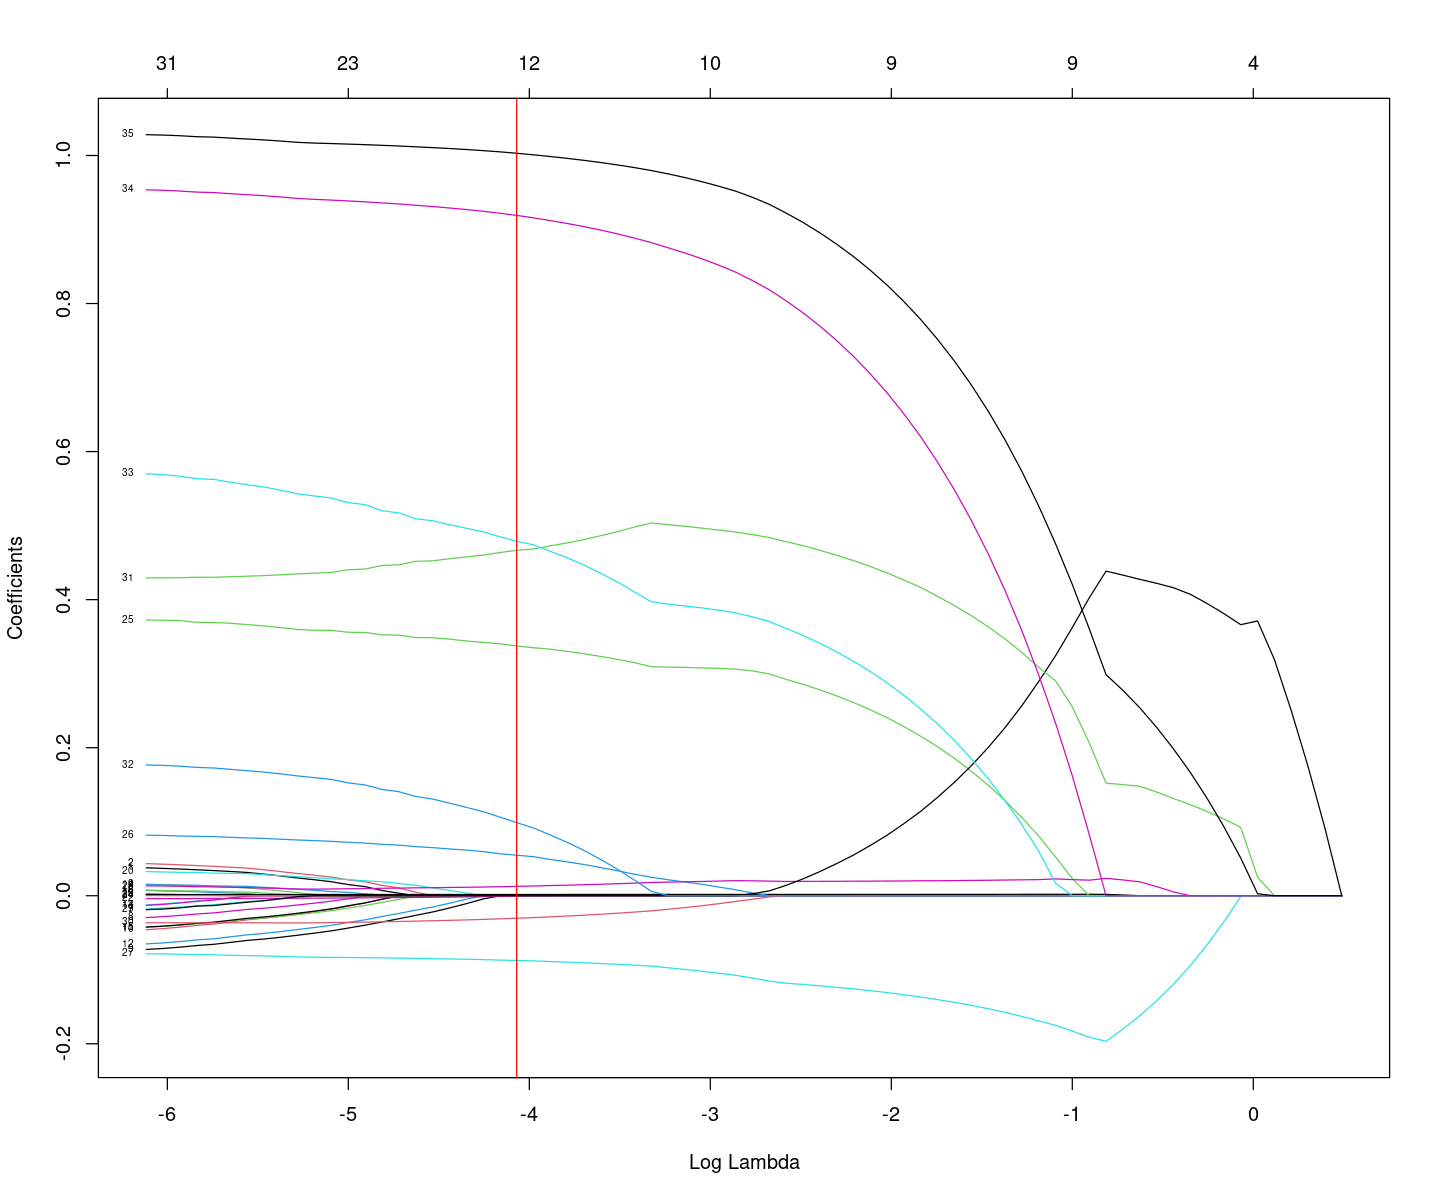

In [114]:
plot(reg.lasso, xvar = "lambda", label = TRUE)
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

In [115]:
fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$SValue_co2 - fit.lasso.1se 

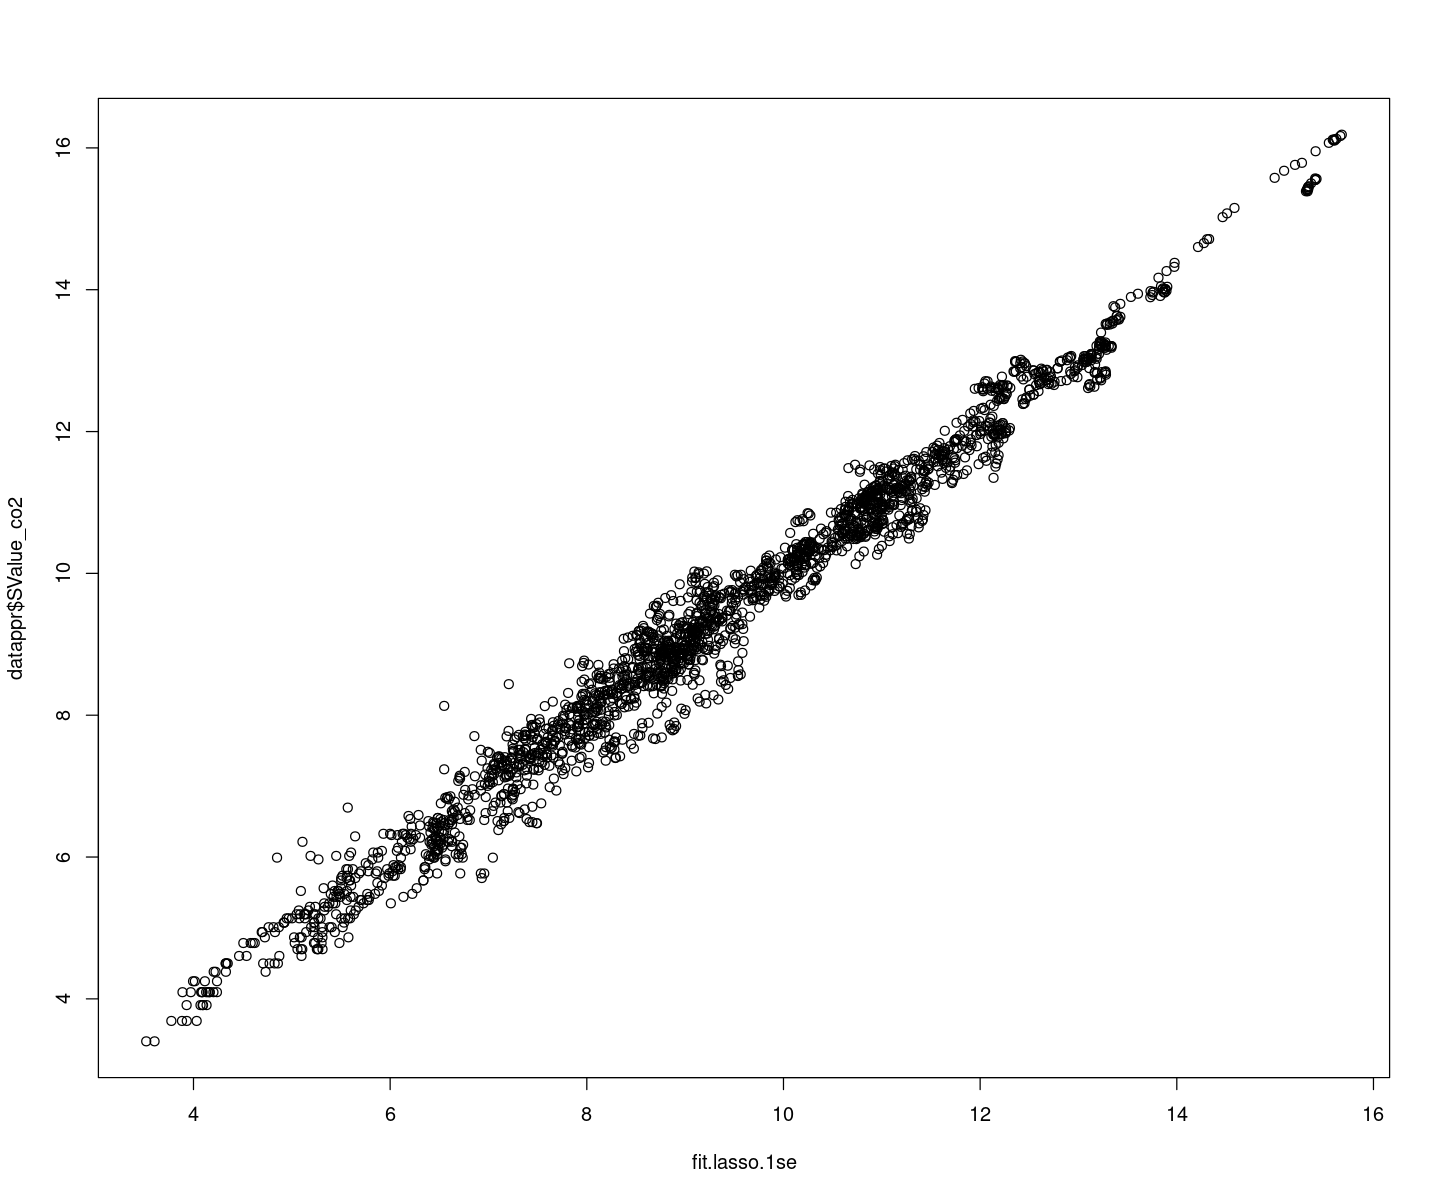

In [116]:
plot(fit.lasso.1se,datappr$SValue_co2)

##### Graphe des résidus

Warning message:
“Removed 45 rows containing missing values (`geom_point()`).”


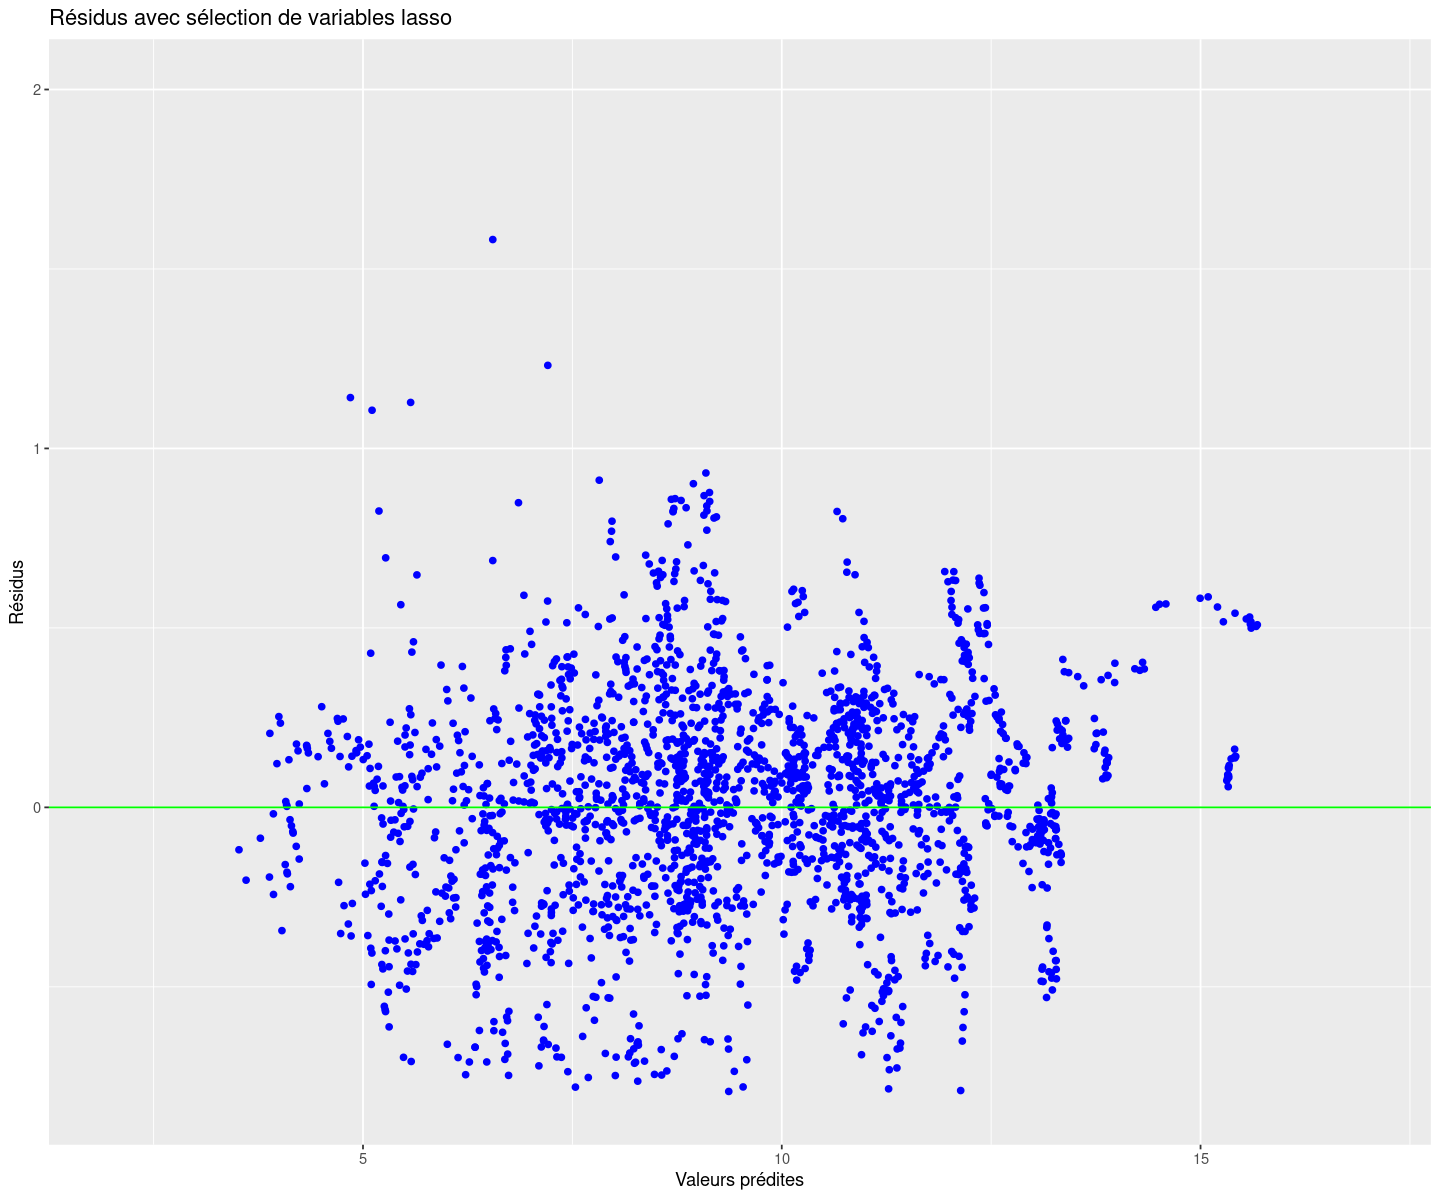

In [117]:
gplot.res(fit.lasso.1se,res.lasso.1se,"Résidus avec sélection de variables lasso")

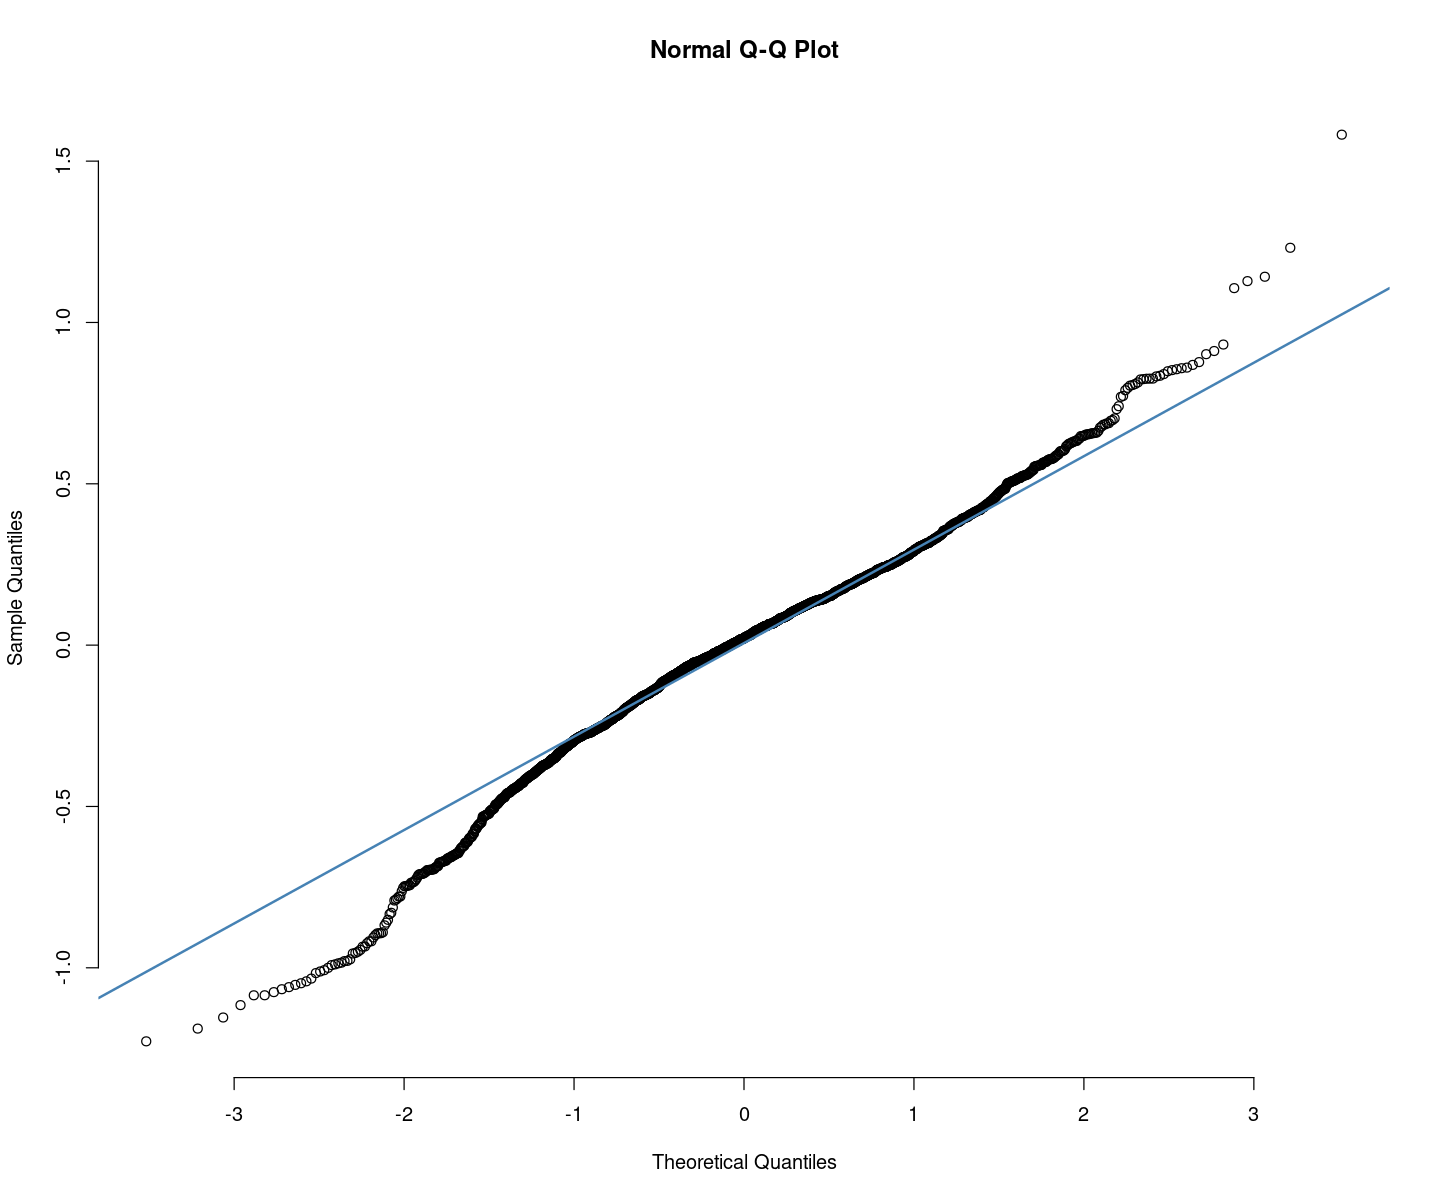

In [126]:
qqnorm(res.lasso.1se , pch = 1, frame = FALSE)
qqline(res.lasso.1se , col = "steelblue", lwd = 2)

##### MSE et R²

In [124]:
MSE_lse = mean((datappr$SValue_co2 - fit.lasso.1se)^2)
paste("MSE =", MSE_lse)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lasso.1se)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_lse <- 1 - (SS_Residual / SS_Total)
R2a_lse = 1 - ((1-R2_bic*R2_bic)*(dim(datappr)[1]-1))/(dim(datappr)[1]-length(reg.lasso.cv$coefficients)-1)
paste("R2 ajusté =", R2a_lse)

[1] "MSE = 0.111885998651161"

[1] "R2 ajusté = 0.962204473177638"

###### Données tests

In [119]:
#pred.lse=predict(reg.lasso.cv,newdata=datestr)
# Erreur quadratique moyenne de prévision
#sum((pred.lse-datestr[,"SValue_co2"])^2)/nrow(datestr)
#err.lse=pred.lse-datestr[,"SValue_co2"]
#gplot.res(pred.lse,err.lse,titre="")
#plot(pred.lse,datestr$SValue_co2)

### SVM

###### Données apprentissage

In [131]:
svm.reg0 = svm(SValue_co2 ~ ., data = datappr)
summary(svm.reg0)


Call:
svm(formula = SValue_co2 ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02857143 
    epsilon:  0.1 


Number of Support Vectors:  577






#### Choix du meilleur noyau SVM

In [ ]:
param = list(kernel = c("linear", "polynomial", "radial", "sigmoid"),
            cost = c(0.4, 0.5, 0.6, 0.8, 1, 1.4, 2),
            gamma = c(0.02, 0.05, 0.1, 0.5, 0.9, 1))

svm.reg.tune = tune(svm,SValue_co2 ~ ., data = datappr, ranges = param)

svm.reg.tune

In [ ]:
#set.seed(2021)


svm.reg = svm(SValue_co2~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    kernel = svm.reg.tune$best.parameters$kernel)
summary(svm.reg)

#### Résidus

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


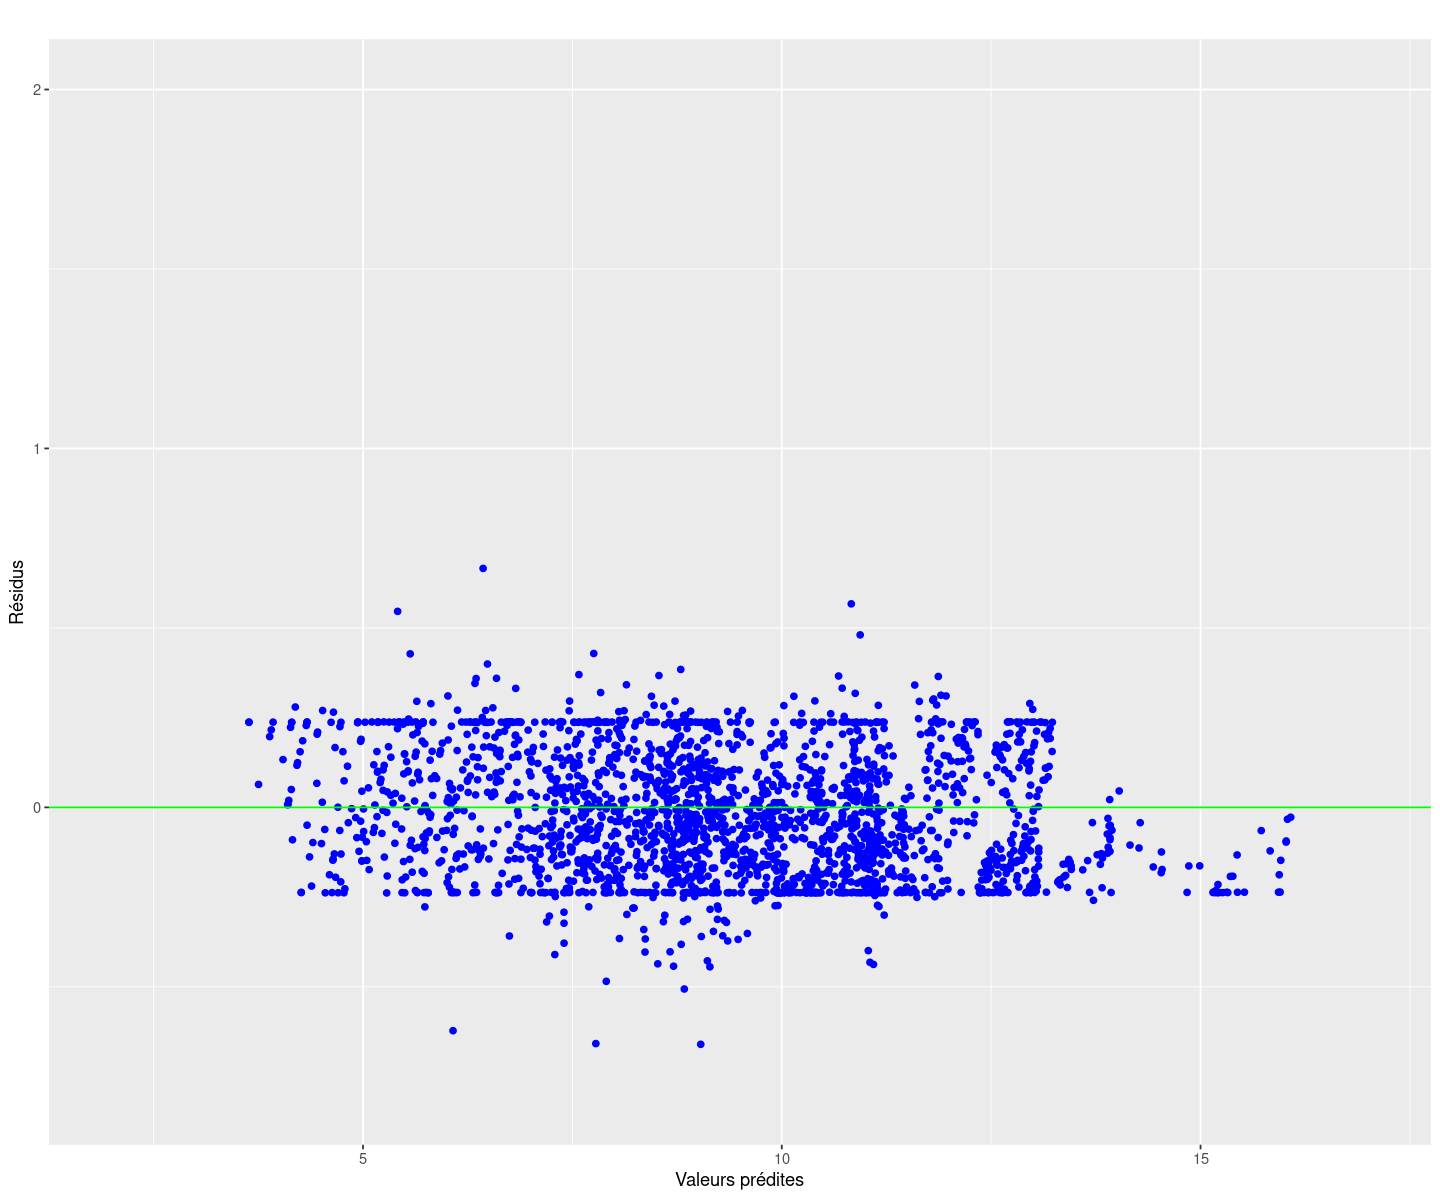

In [134]:
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"SValue_co2"]
gplot.res(fit.svmr,res.svmr,titre="")

Nous visualisons bien un tube sur le grpahe des résidus, caractéristique de la méthode SVM.

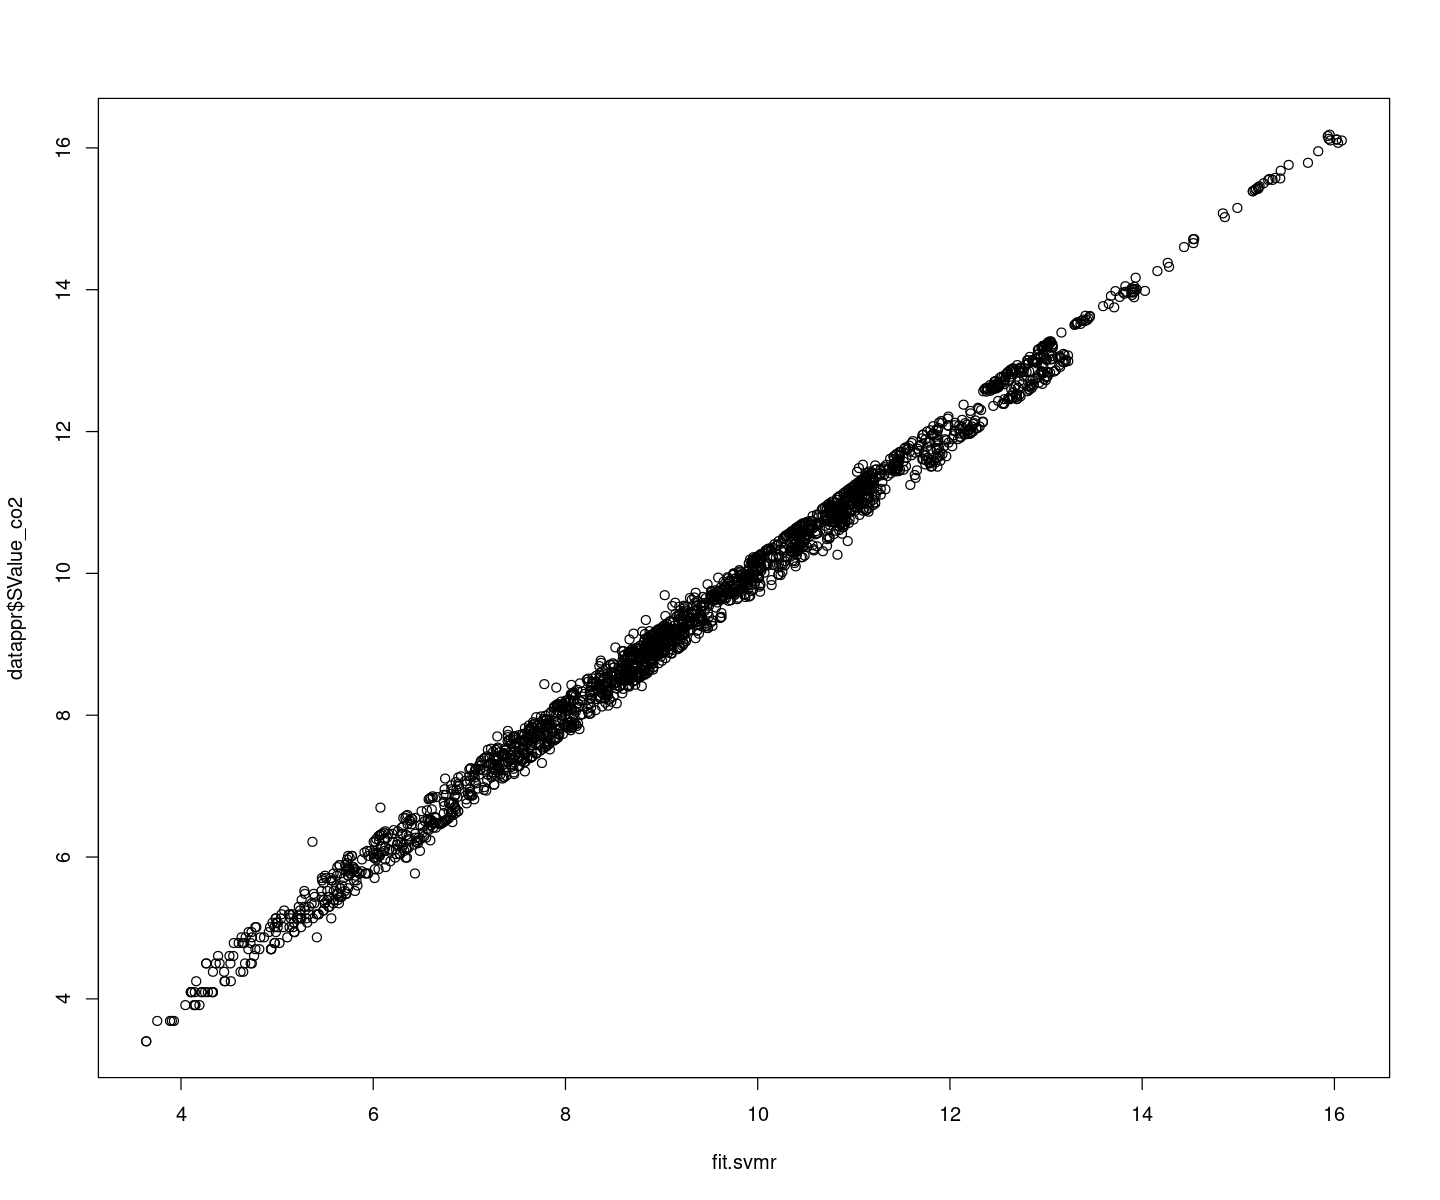

In [135]:
plot(fit.svmr,datappr$SValue_co2)

###### MSE et R2

In [136]:
MSE_svm = mean((datappr$SValue_co2 - fit.svmr)^2)
paste("MSE =", MSE_svm)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.svmr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_svm <- 1 - (SS_Residual / SS_Total)
R2a_svm = 1 - ((1-R2_bic*R2_bic)*(dim(datappr)[1]-1))/(dim(datappr)[1]-length(svm.reg$coefficients)-1)

paste("R2 ajusté =", R2a_svm)

[1] "MSE = 0.029210763037516"

[1] "R2 ajusté = 0.962204473177638"

###### Données tests

[1] 0.07414822

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


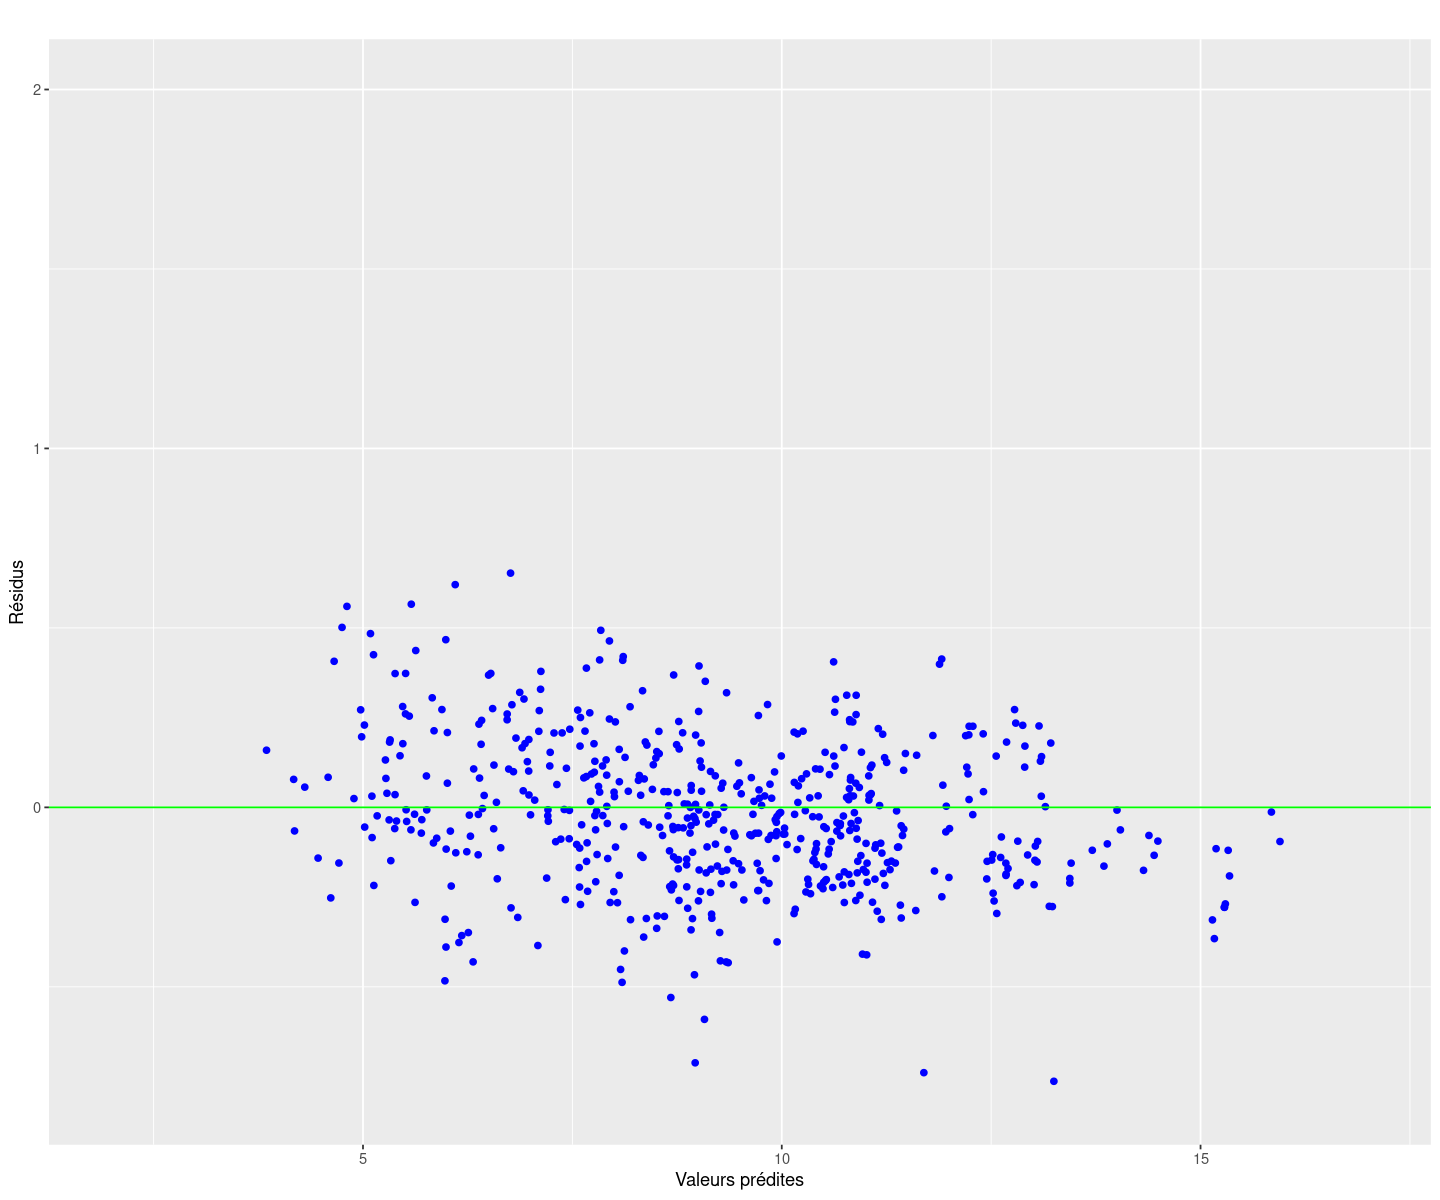

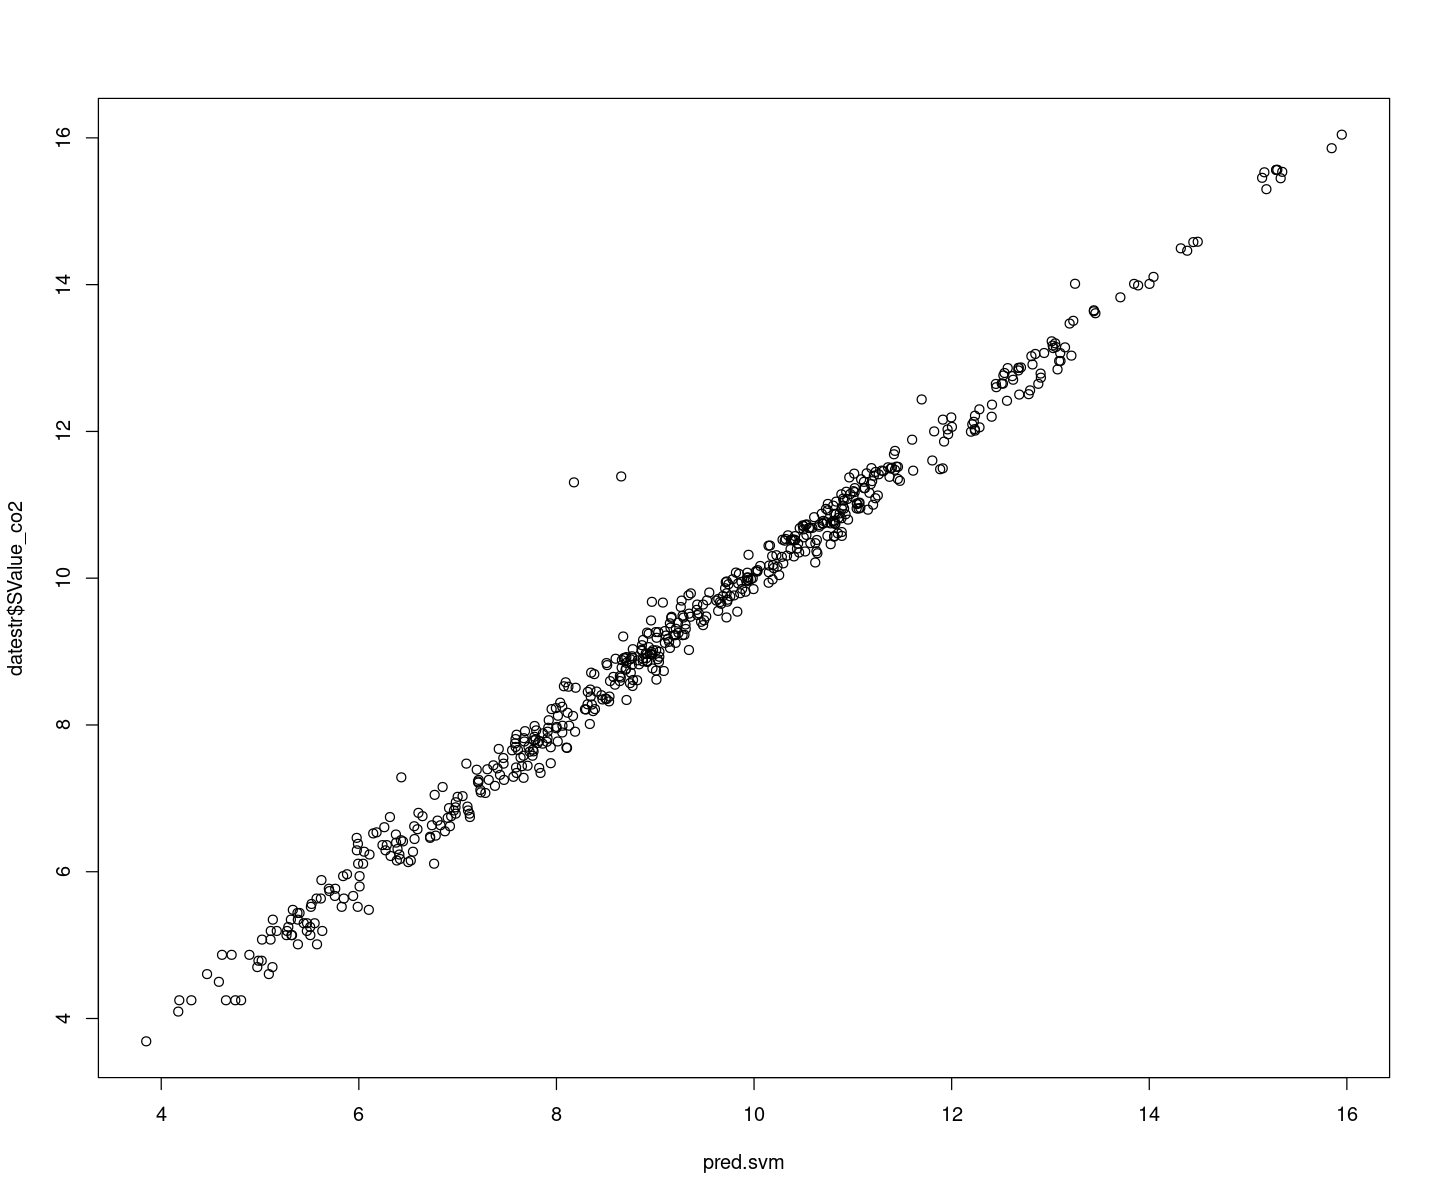

In [137]:
pred.svm=predict(svm.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.svm-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.svm=pred.svm-datestr[,"SValue_co2"]
gplot.res(pred.svm,err.svm,titre="")
plot(pred.svm,datestr$SValue_co2)

### Arbre

###### Données apprentissage

In [158]:
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=0.001))

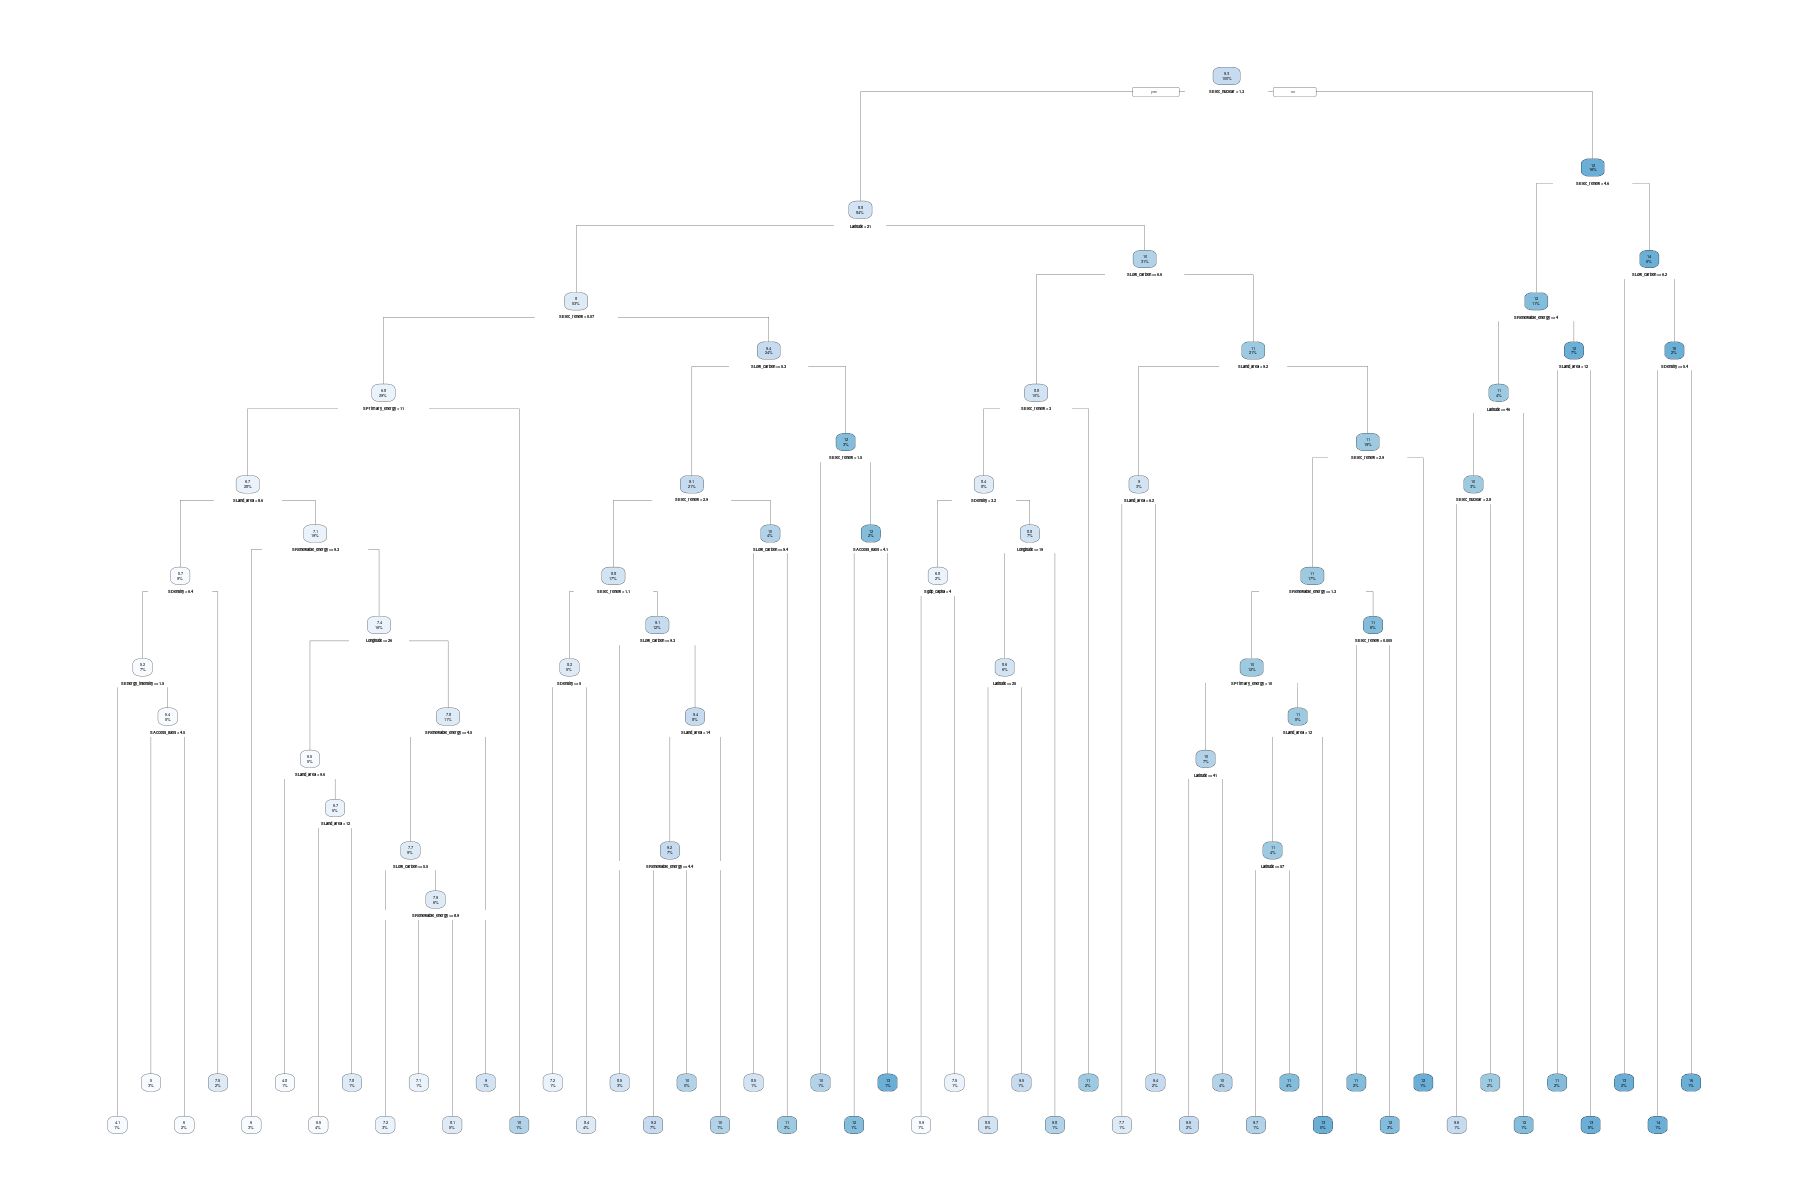

In [159]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

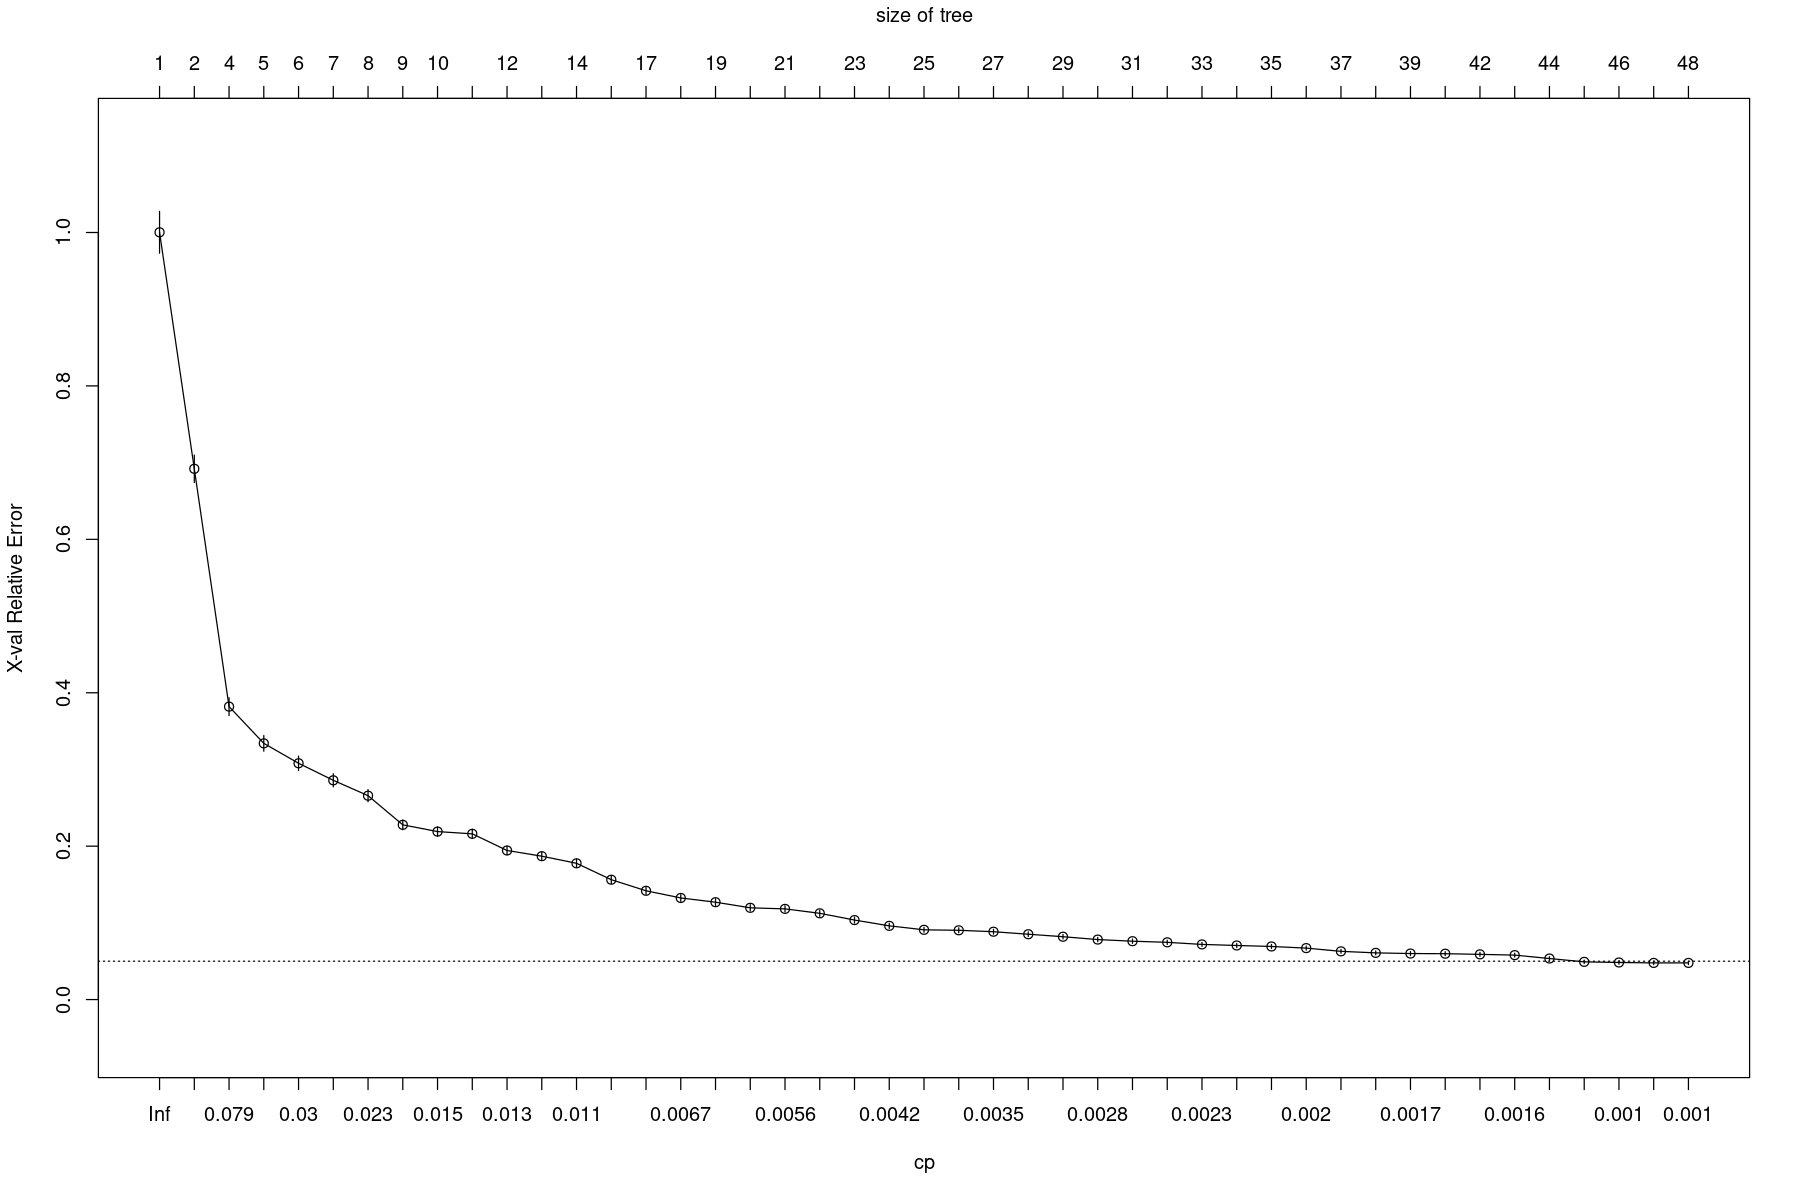

In [160]:
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"SValue_co2"])^2,2,sum)

plotcp(tree.reg)

[1] 0.001000923

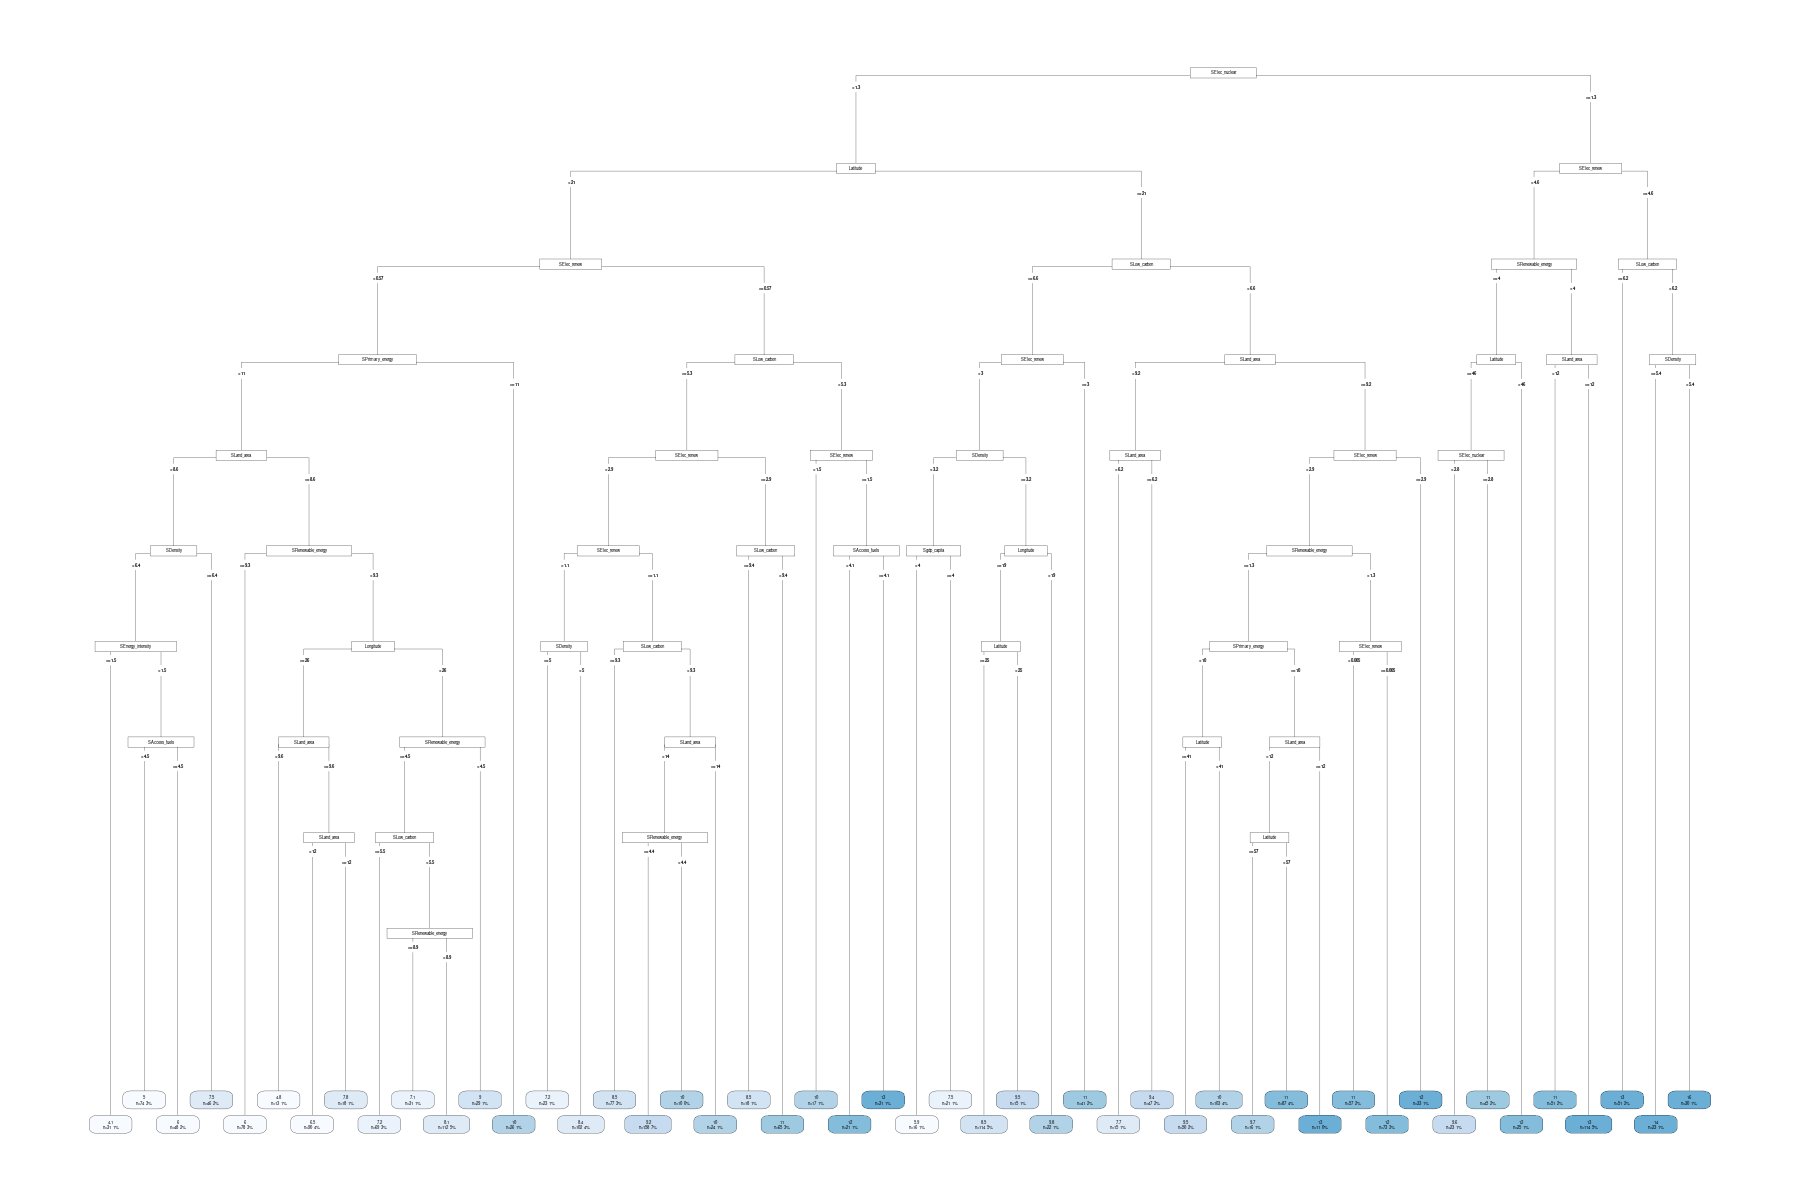

In [161]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

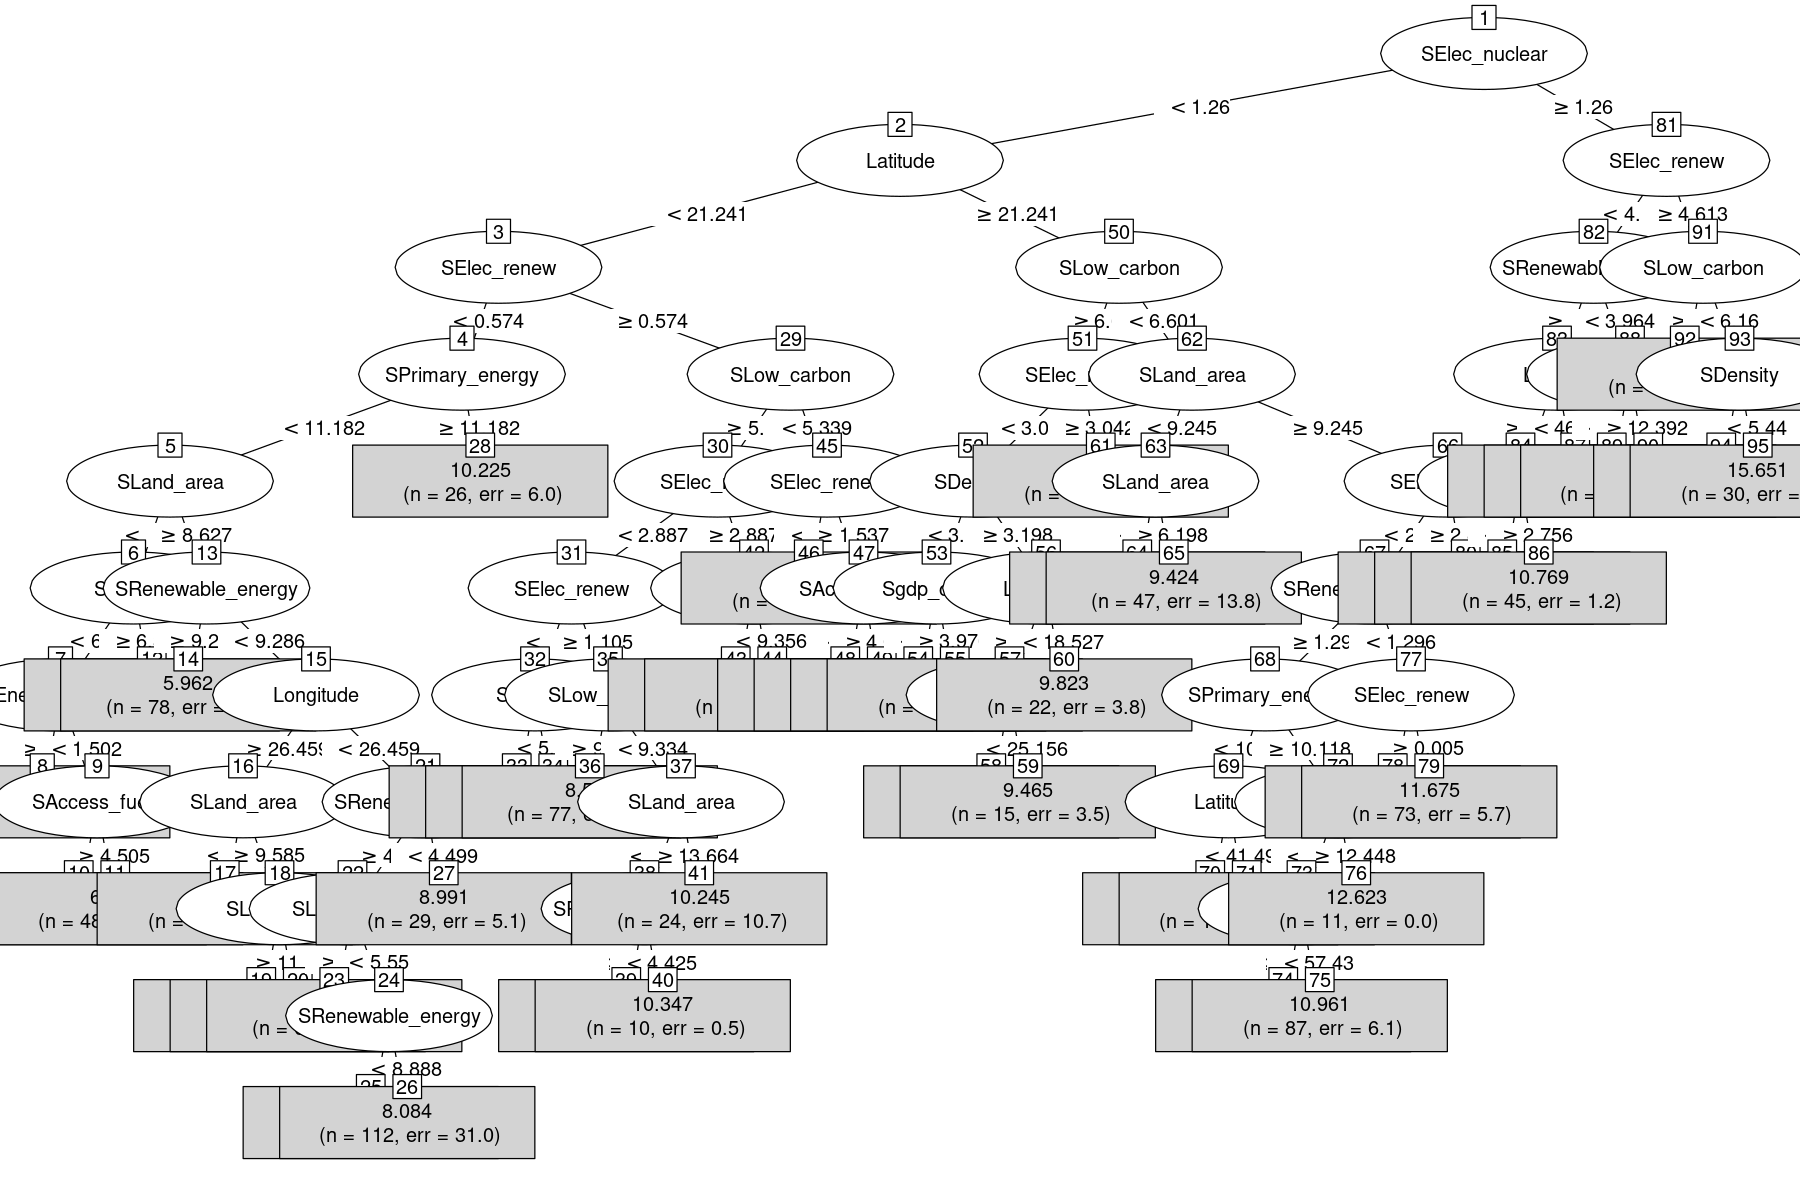

In [162]:
library(partykit)
plot(as.party(tree.reg), type="simple")

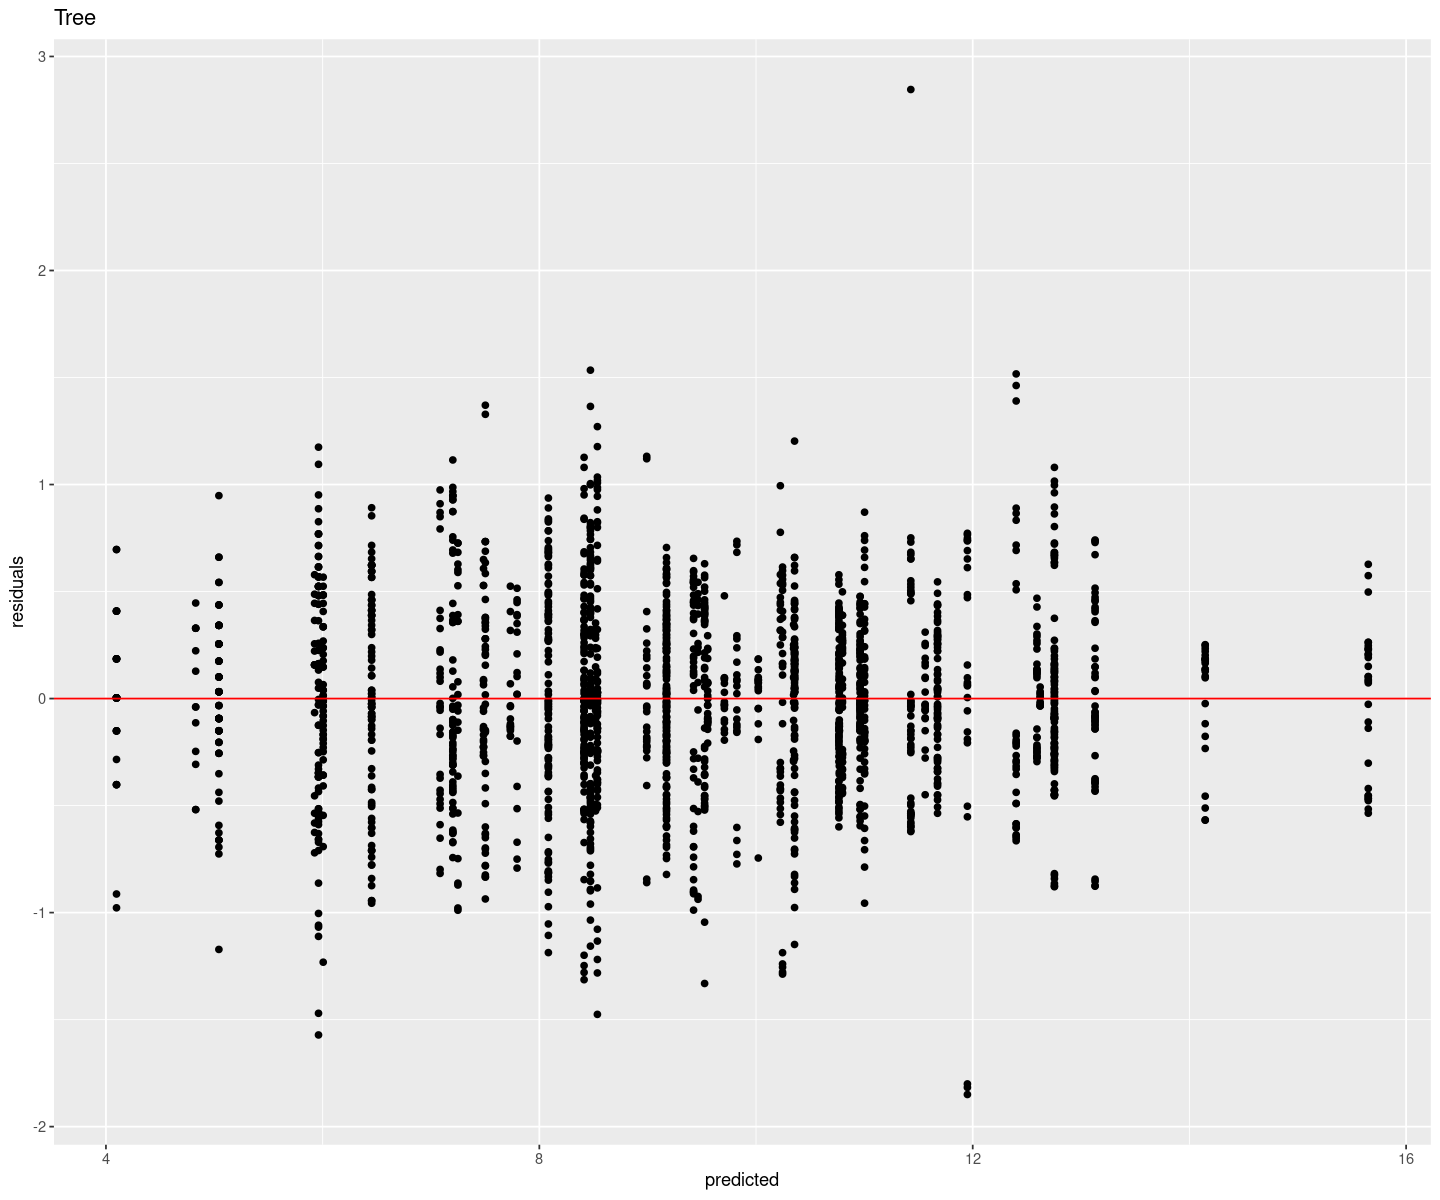

In [163]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"SValue_co2"]

options(repr.plot.width = 12, repr.plot.height = 10)
par(mfrow = c(1, 3))
ggplot(data.frame(residuals = res.tree, predicted = fit.tree), aes(x = predicted, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0 ,color = "red") +
  ggtitle("Tree")

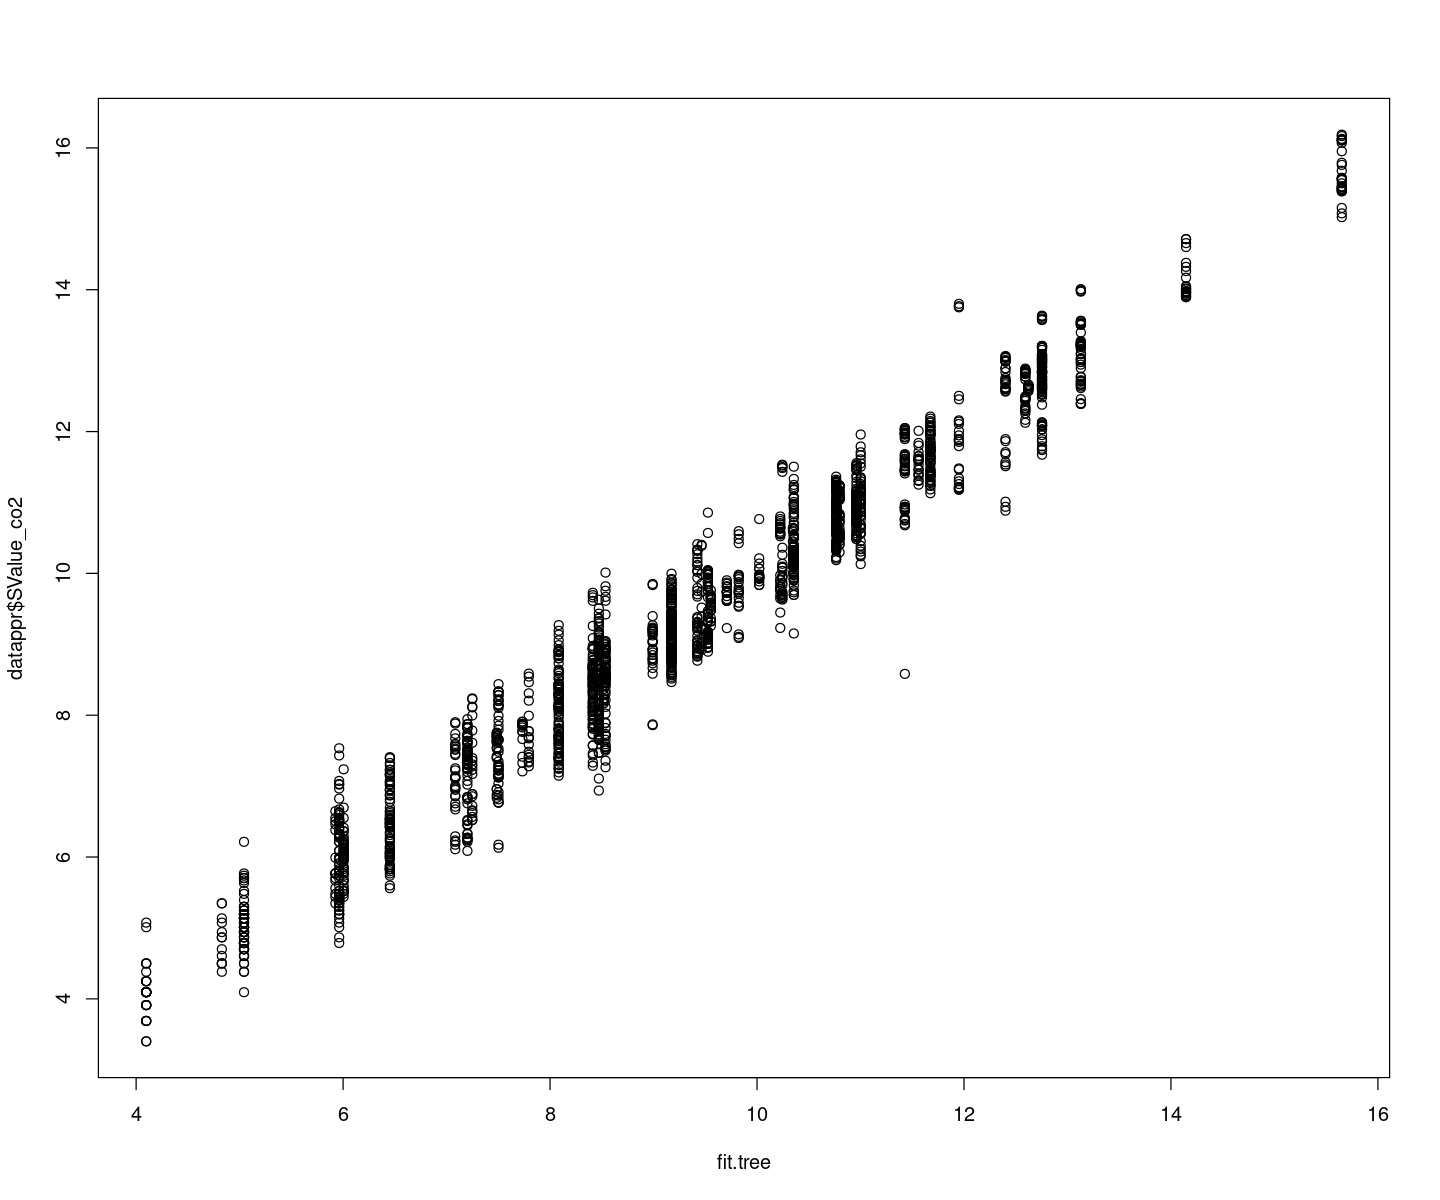

In [164]:
plot(fit.tree,datappr$SValue_co2)

###### MSE et R2

In [165]:
MSE_a = mean((datappr$SValue_co2 - fit.tree)^2)
paste("MSE =", MSE_a)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.tree)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_a <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_a)

[1] "MSE = 0.19972829511891"

[1] "R2 = 0.96452356279082"

###### Données tests

[1] 0.2728241

Warning message:
“Removed 29 rows containing missing values (`geom_point()`).”


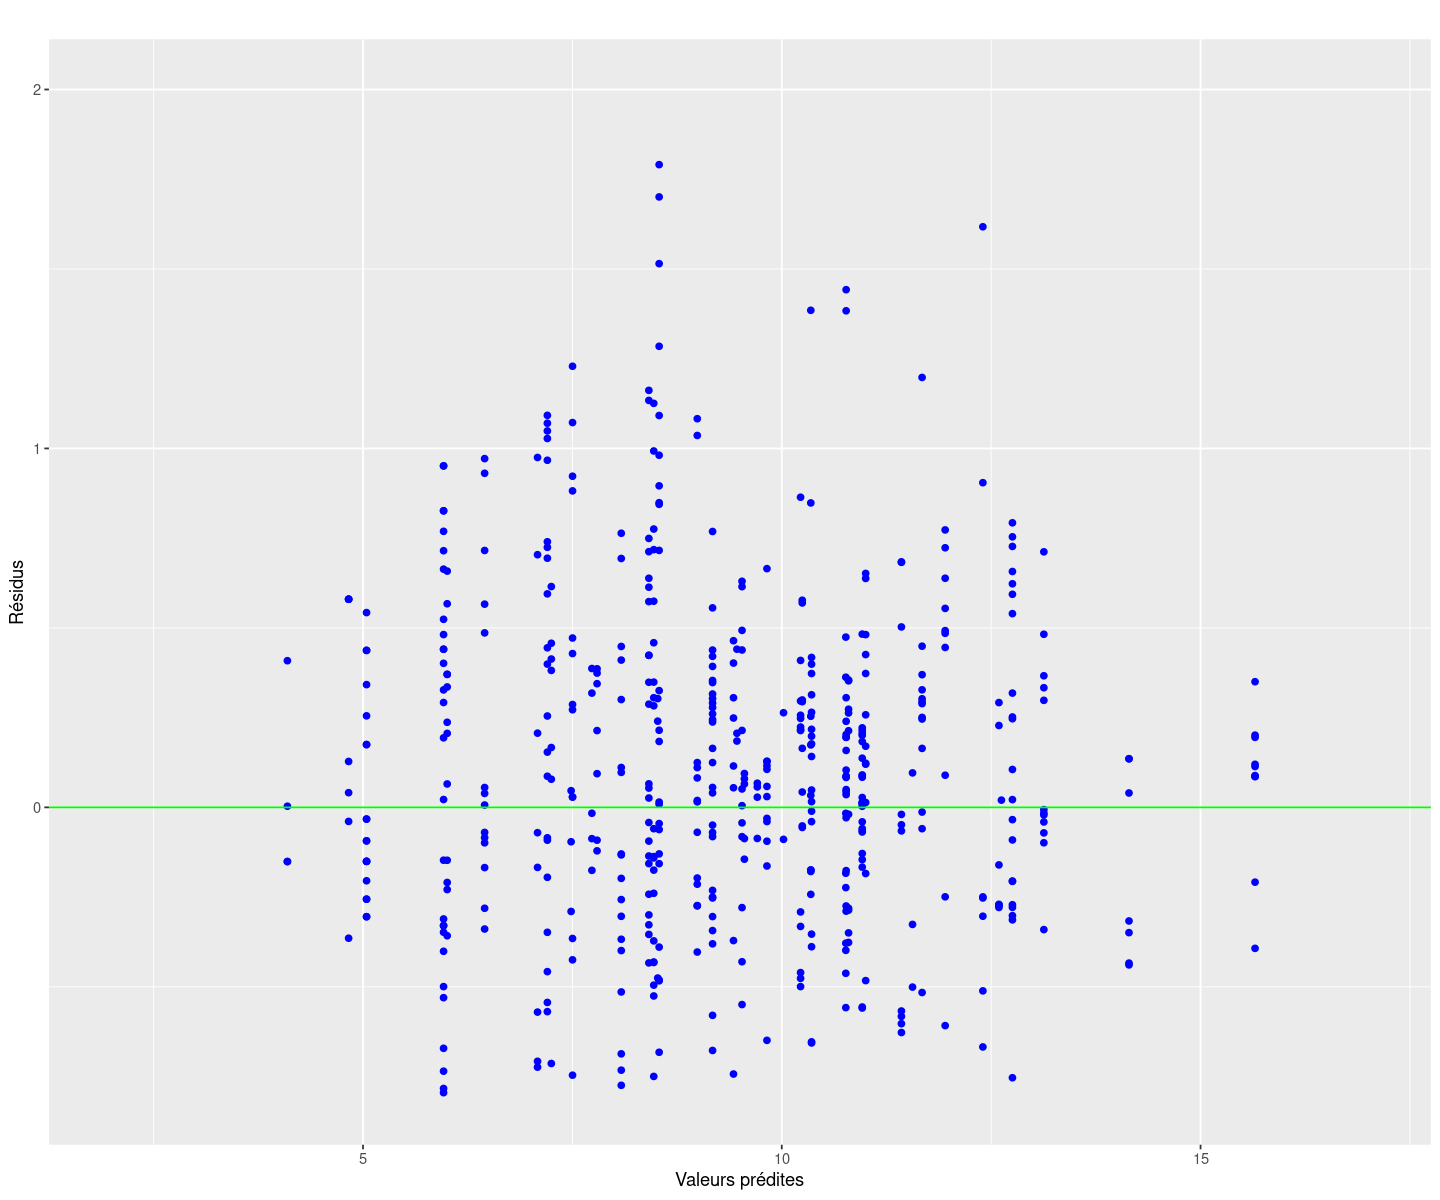

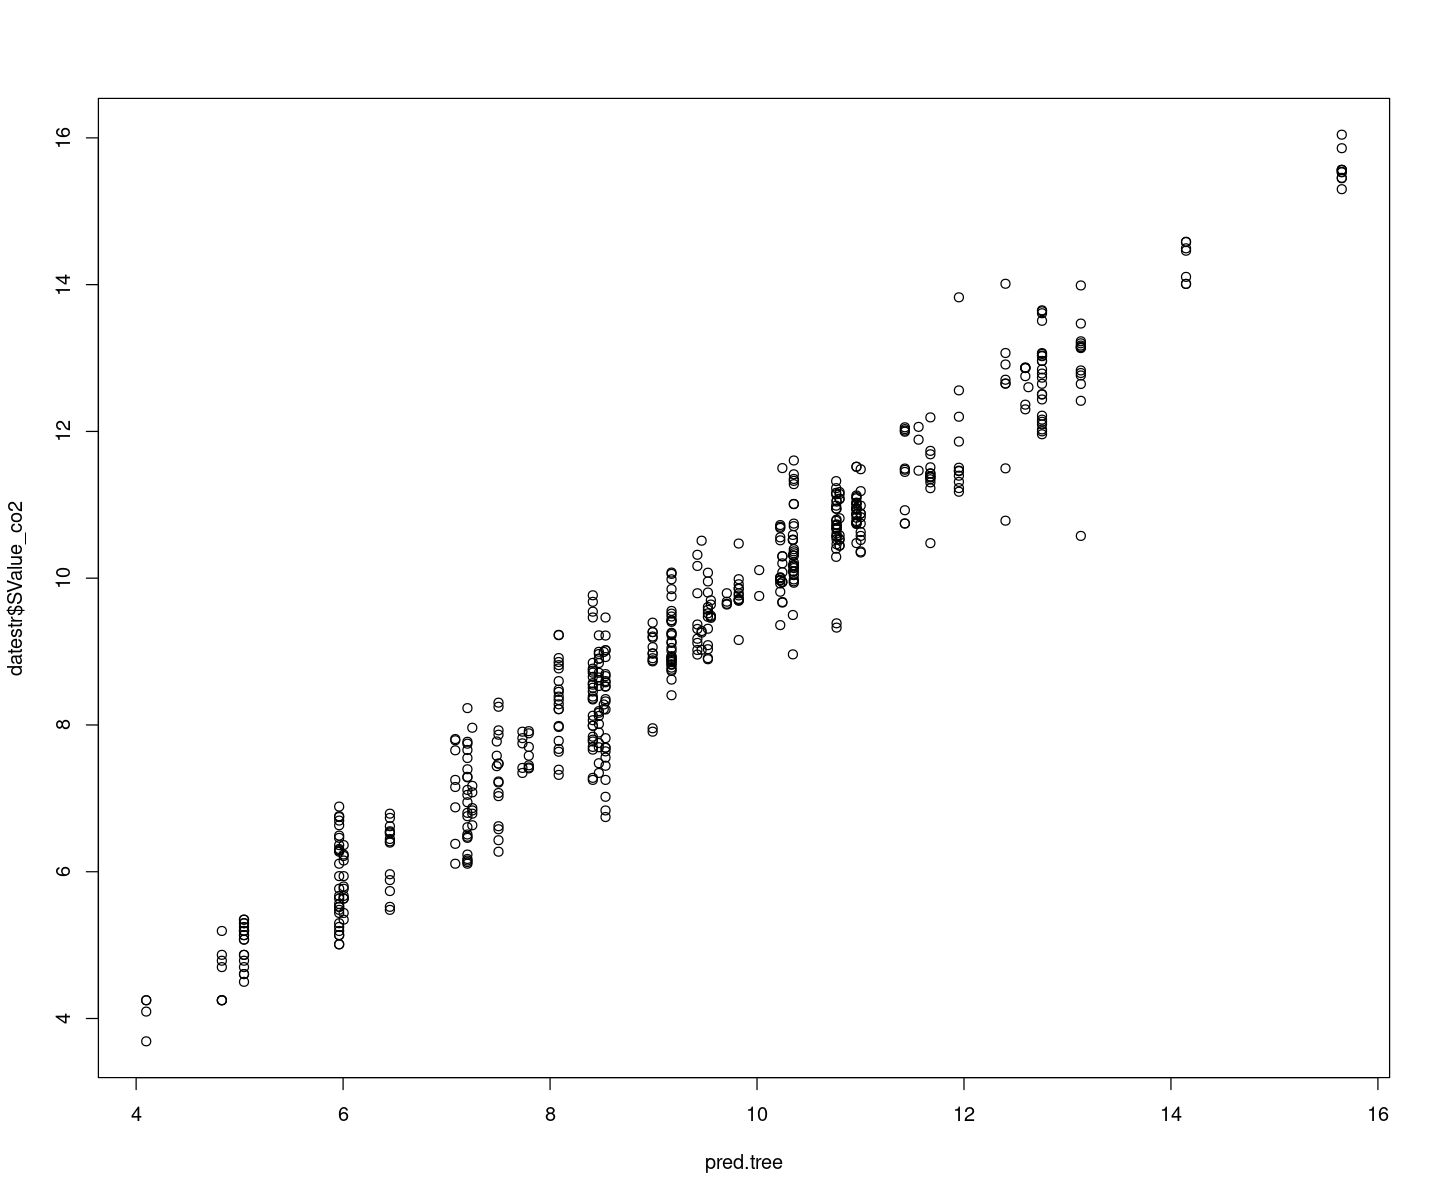

In [166]:
pred.tree=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.tree-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.tree=pred.tree-datestr[,"SValue_co2"]
gplot.res(pred.tree,err.tree,titre="")
plot(pred.tree,datestr$SValue_co2)

### Random Forest

###### Données apprentissage

In [167]:
str(datappr)

'data.frame':	2294 obs. of  16 variables:
 $ Year             : Factor w/ 21 levels "2000","2001",..: 4 5 7 9 10 11 12 14 15 16 ...
 $ gdp_growth       : num  8.83 1.41 5.36 3.92 21.39 ...
 $ Latitude         : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude        : num  67.7 67.7 67.7 67.7 67.7 ...
 $ SAccess_elec     : num  2.69 3 3.42 3.75 3.84 ...
 $ SAccess_fuels    : num  2.35 2.48 2.7 2.87 2.97 ...
 $ SRenewable_energy: num  6.05 6.65 5.65 4.6 4.07 ...
 $ SElec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SElec_renew      : num  0.489 0.445 0.495 0.432 0.577 ...
 $ SLow_carbon      : num  8.19 7.93 8.73 8.6 9.11 ...
 $ SPrimary_energy  : num  5.44 5.32 5.72 6.41 6.88 ...
 $ SEnergy_intensity: num  0.336 0.182 0.405 0.663 0.811 ...
 $ Sgdp_capita      : num  2.63 2.68 2.79 2.95 3.04 ...
 $ SDensity         : num  4.09 4.09 4.09 4.09 4.09 ...
 $ SLand_area       : num  13.4 13.4 13.4 13.4 13.4 ...
 $ SValue_co2       : num  7.11 6.94 7.47 8.18 8.49 ...


In [169]:
temps_debut <- Sys.time()
rf.reg=randomForest(SValue_co2~., data=datappr,xtest=datestr[,-16],ytest=datestr[,"SValue_co2"],
   ntree=500,do.trace=50,importance=TRUE)
temps_fin <- Sys.time()
temps_rf <- temps_fin - temps_debut
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |   0.0381     0.68 |  0.03744     0.63 |
 100 |  0.03241     0.58 |  0.03579     0.61 |
 150 |  0.03096     0.55 |   0.0343     0.58 |
 200 |  0.03058     0.54 |  0.03415     0.58 |
 250 |  0.03072     0.55 |  0.03487     0.59 |
 300 |  0.03009     0.53 |  0.03479     0.59 |
 350 |  0.02957     0.53 |  0.03491     0.59 |
 400 |  0.02995     0.53 |  0.03537     0.60 |
 450 |  0.02976     0.53 |  0.03529     0.60 |
 500 |  0.02966     0.53 |  0.03529     0.60 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


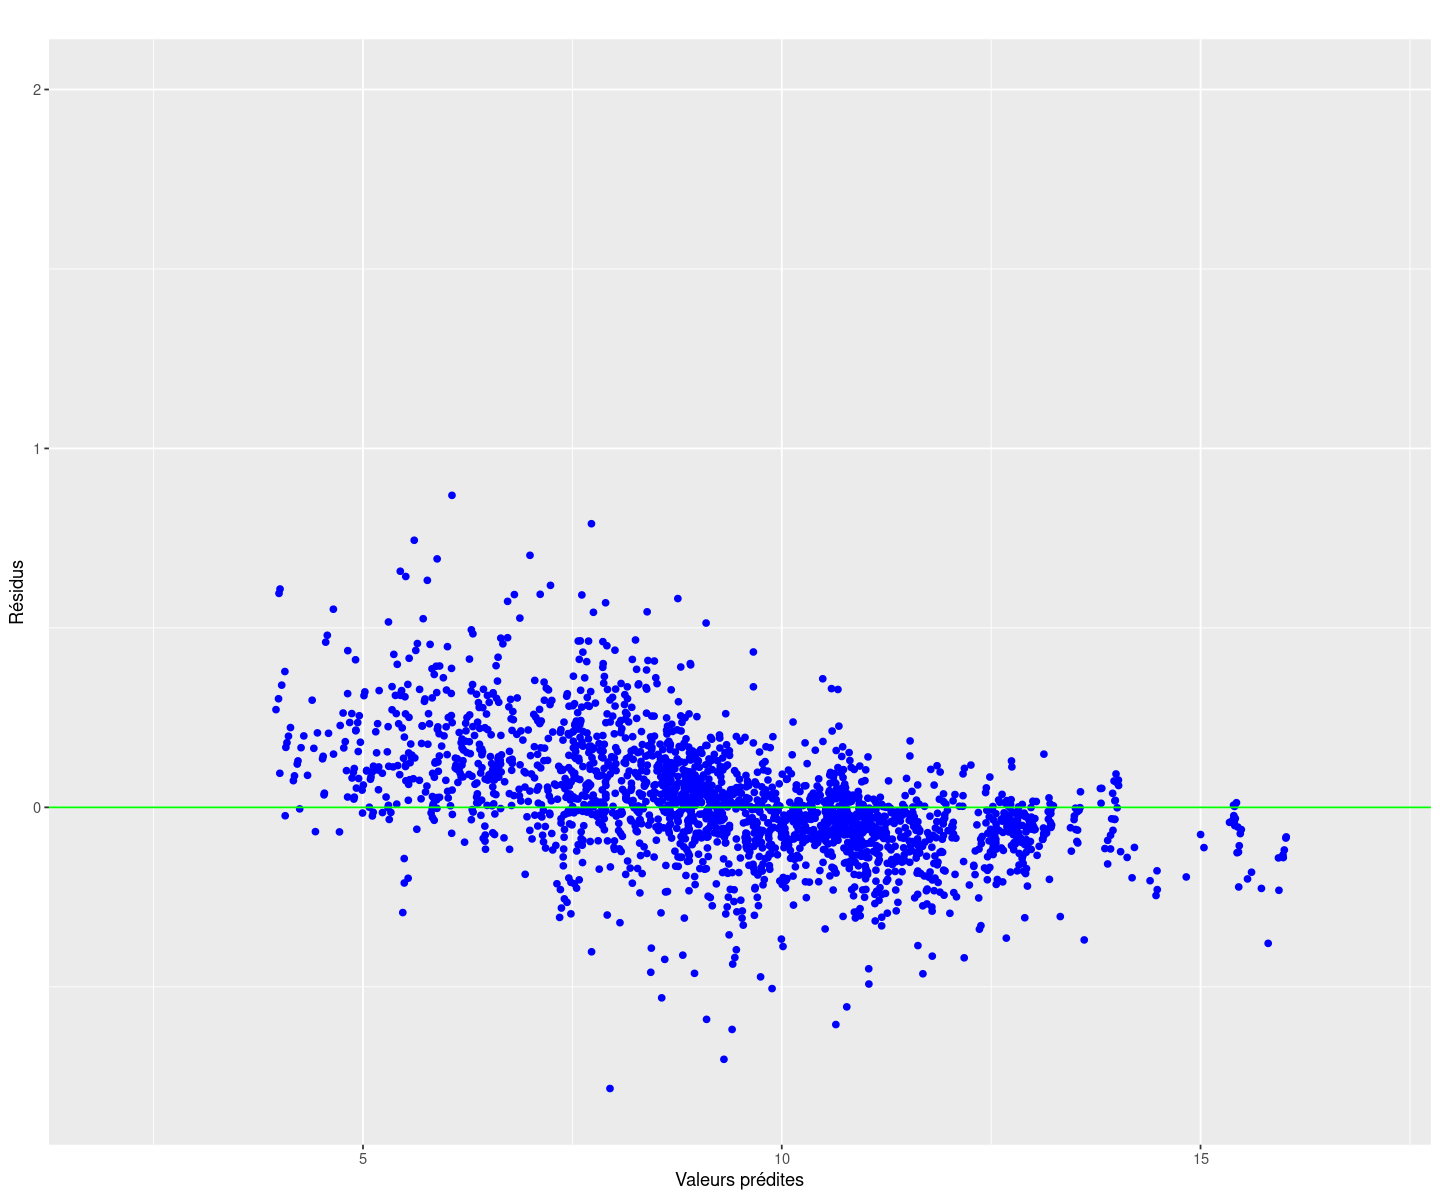

In [170]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"SValue_co2"]
gplot.res(fit.rfr,res.rfr,titre="")

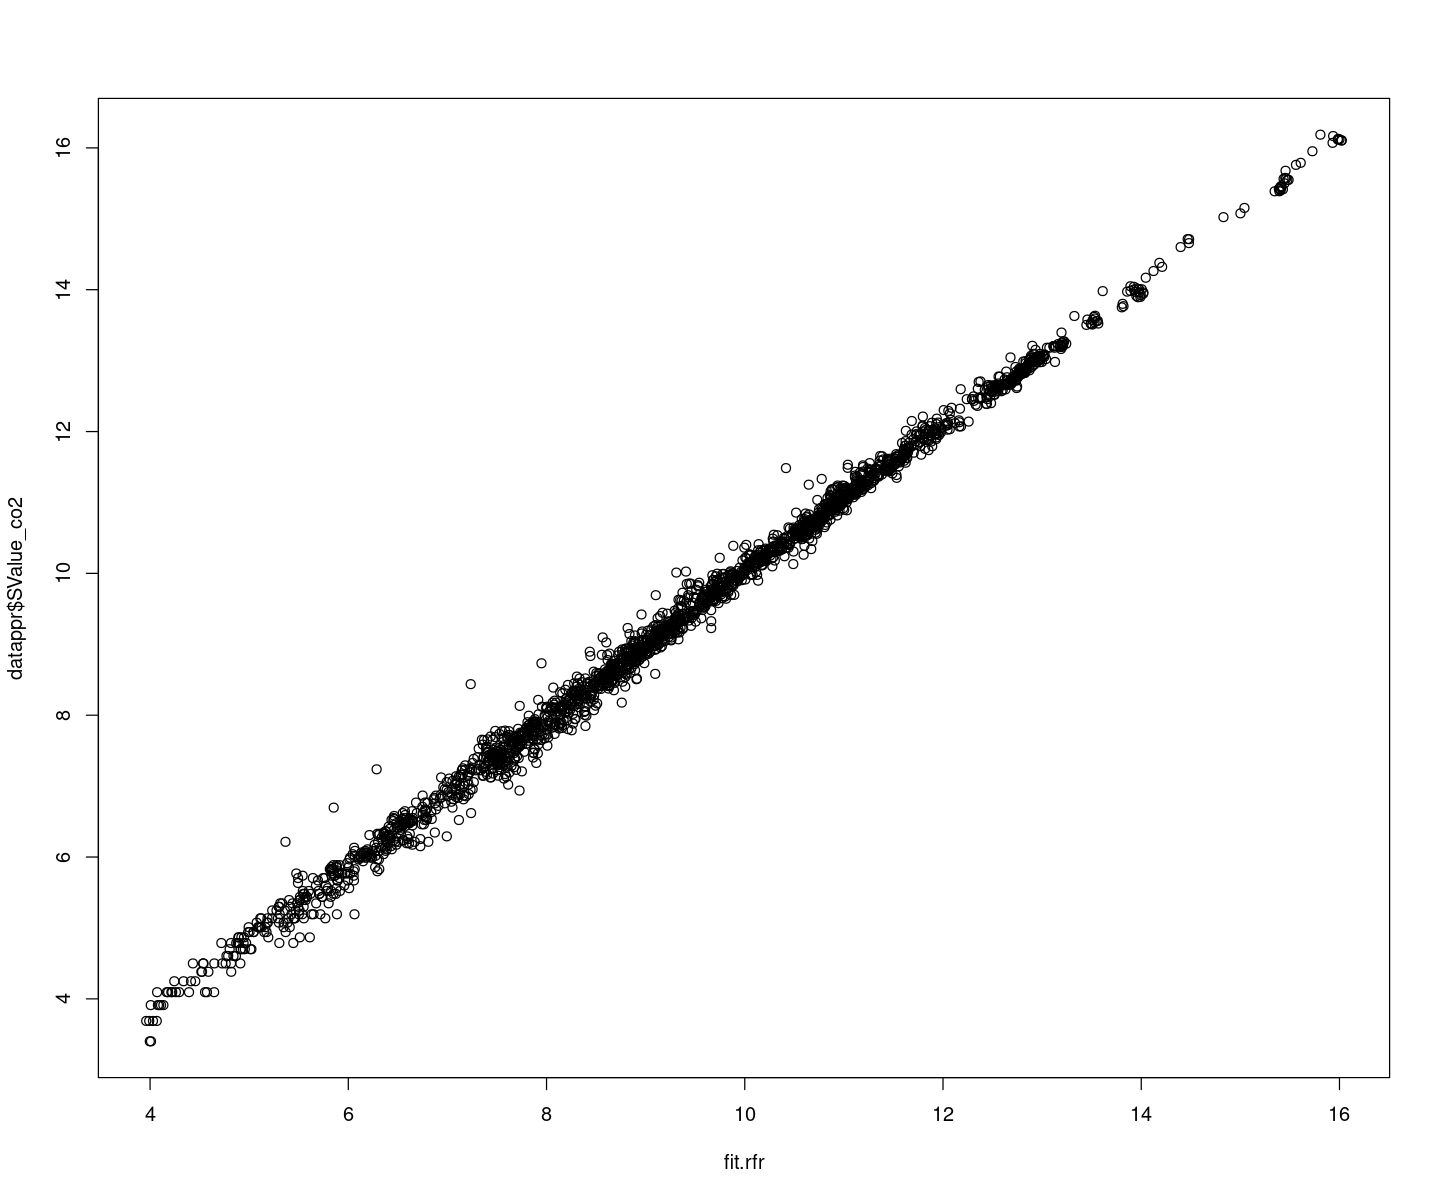

In [171]:
plot(fit.rfr,datappr$SValue_co2)

###### MSE et R2

In [172]:
MSE_rf = mean((datappr$SValue_co2 - fit.rfr)^2)
paste("MSE =", MSE_rf)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.rfr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rf <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_rf)

[1] "MSE = 0.0296568732102993"

[1] "R2 = 0.994732242621711"

###### Données tests

In [ ]:
pred.rf=predict(rf.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.rf-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.rf=pred.rf-datestr[,"SValue_co2"]
gplot.res(pred.rf,err.rf,titre="")
plot(pred.rf,datestr$SValue_co2)

### Boosting

###### Données apprentissage

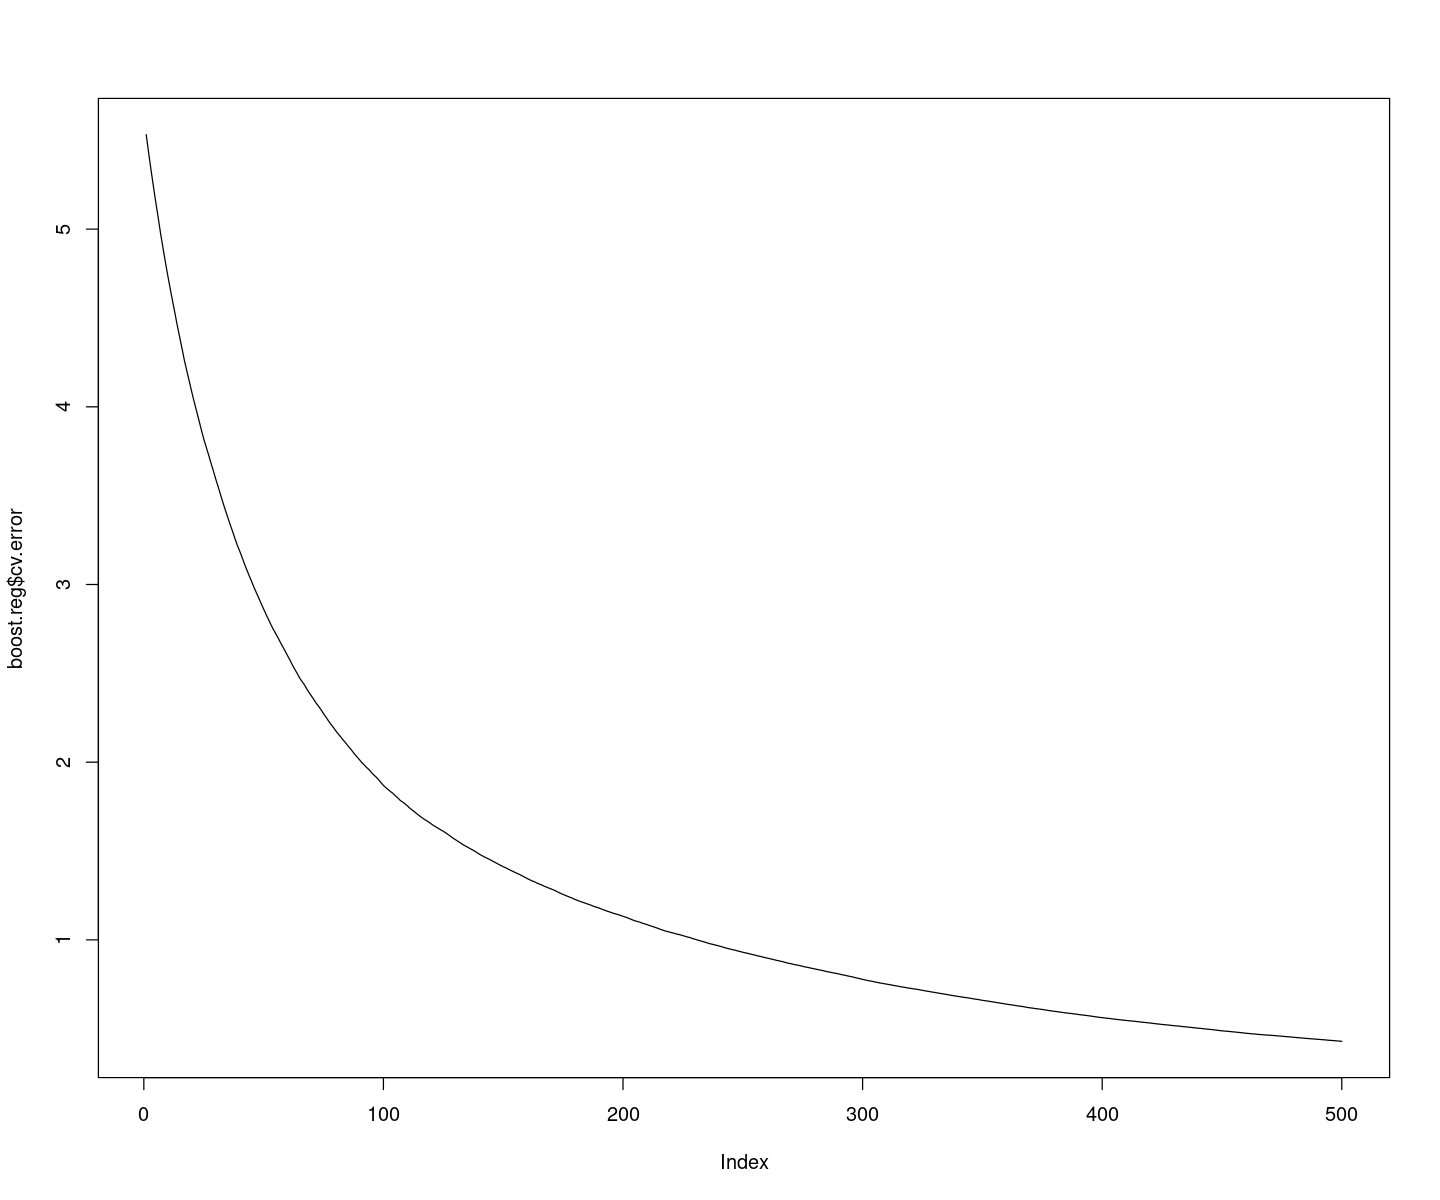

In [174]:
boost.reg = gbm(SValue_co2 ~ ., data = datappr, distribution = "gaussian", n.trees = 500, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

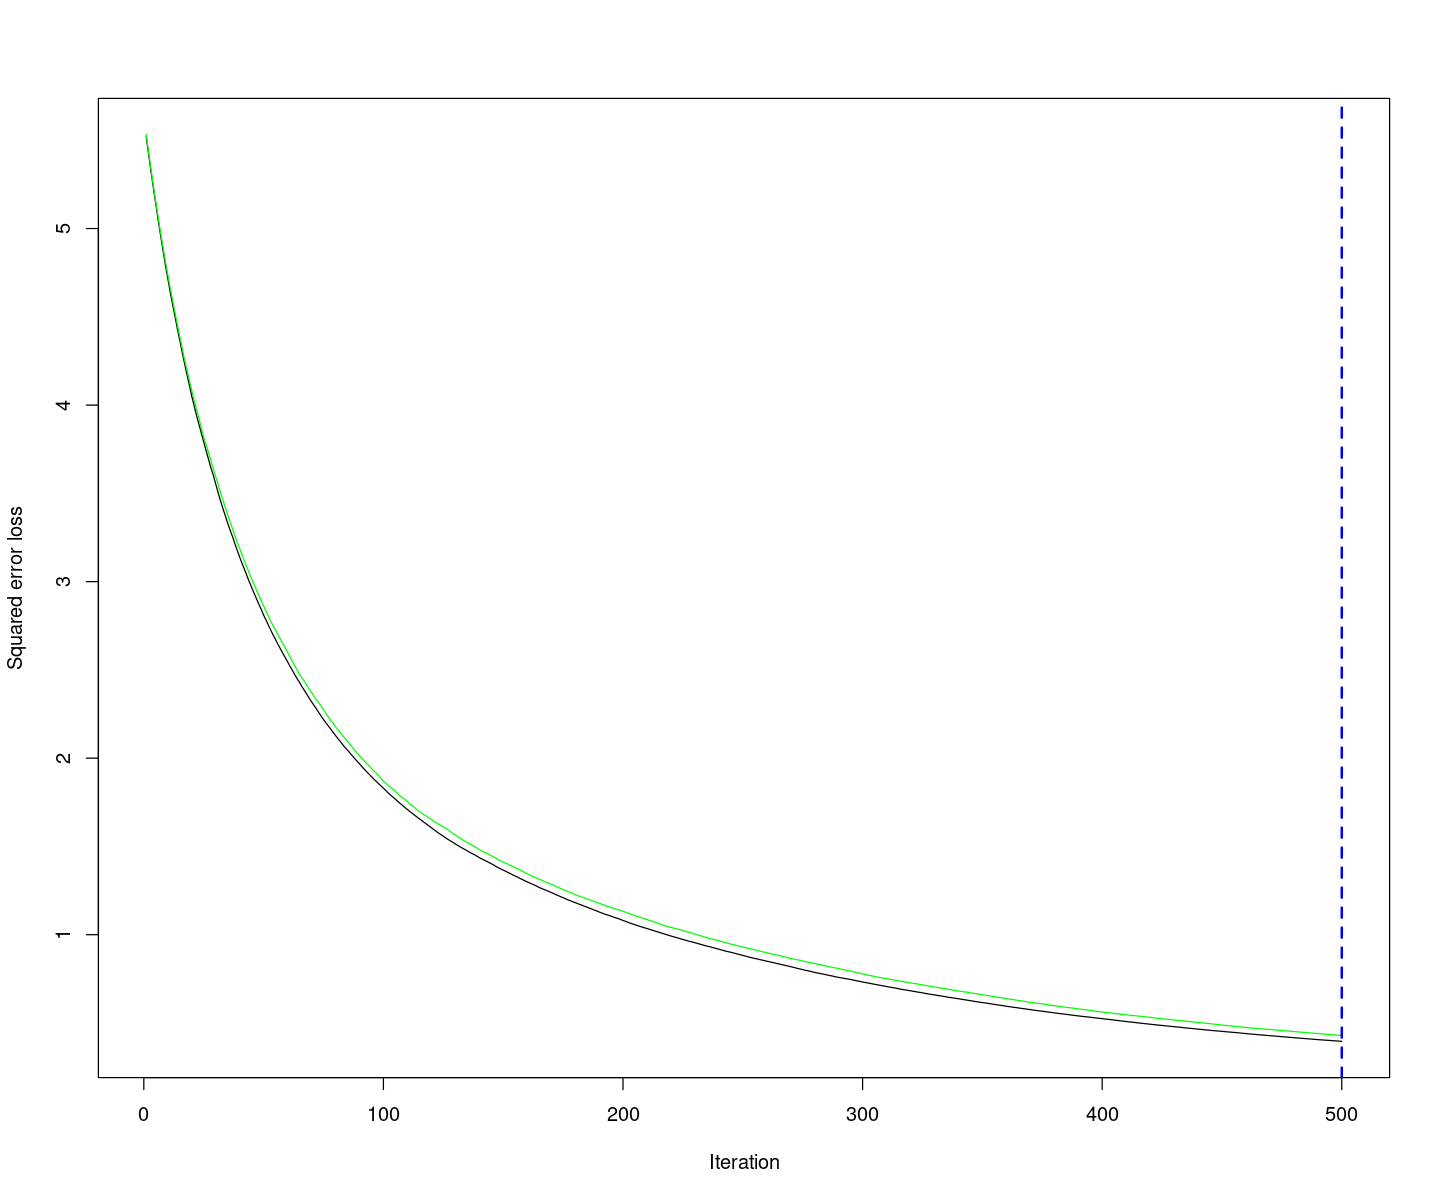

In [175]:
best.iter=gbm.perf(boost.reg,method="cv")

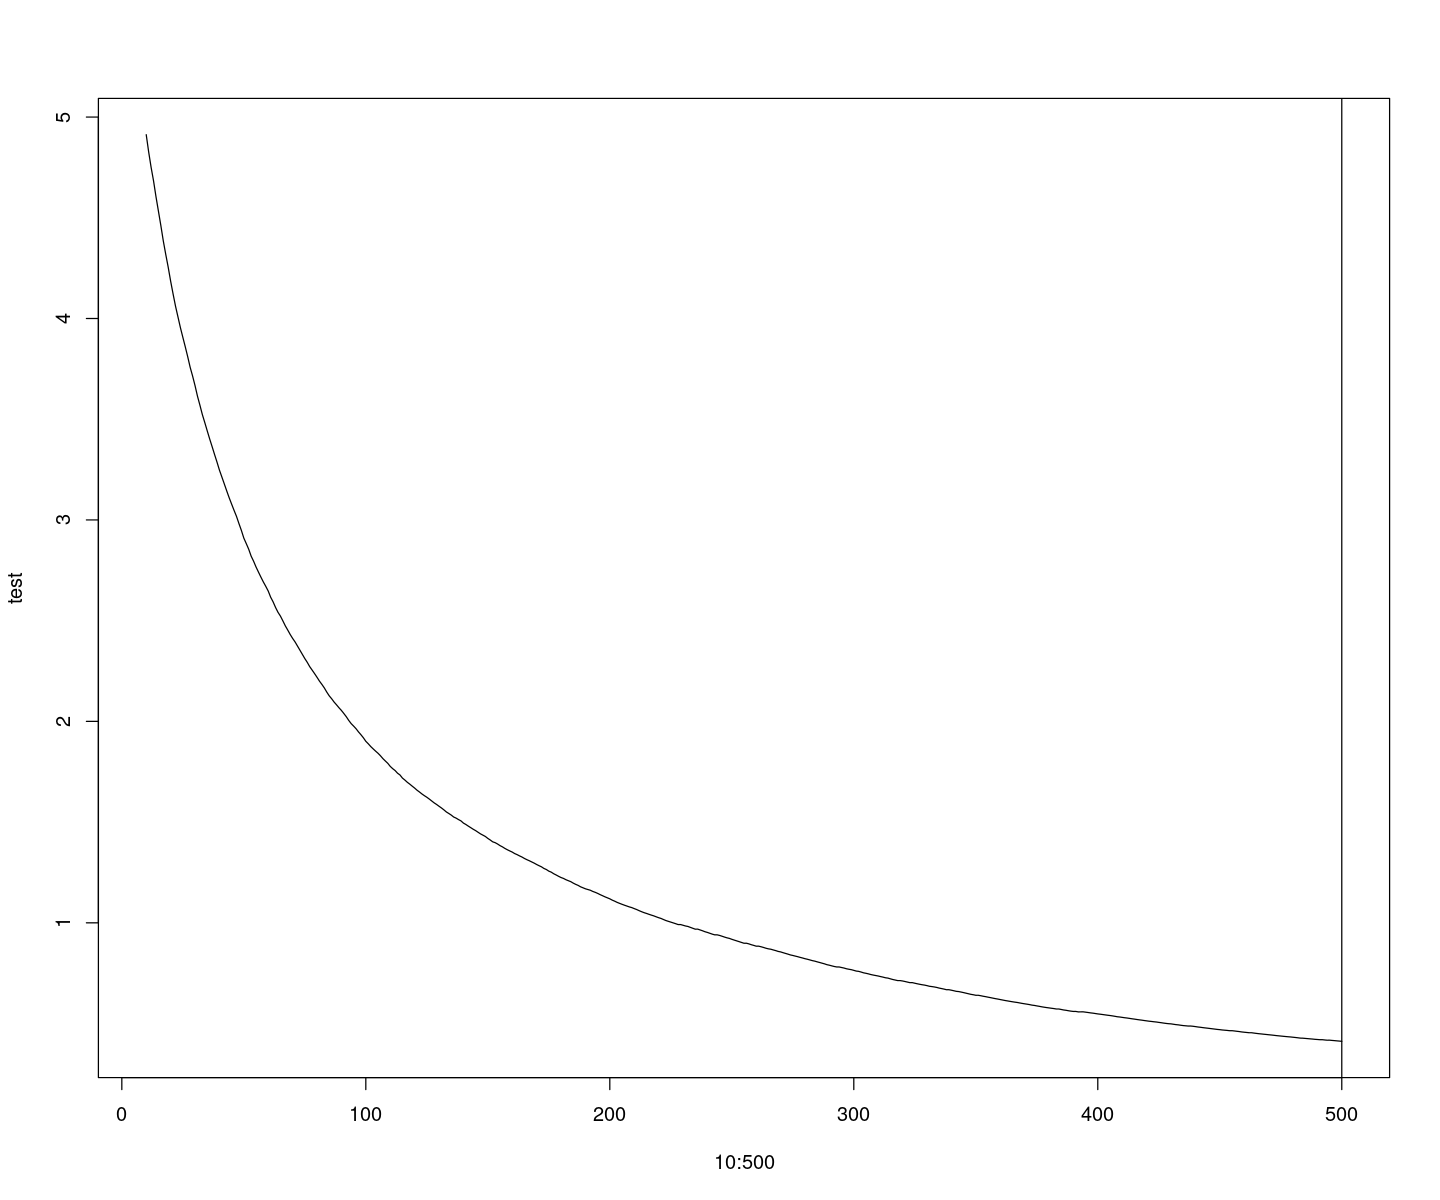

In [176]:
test=numeric()
for (i in 10:500){
pred.test=predict(boost.reg,newdata=datestr,n.trees=i)
err=sum((pred.test-datestr[,"SValue_co2"])^2)/nrow(datestr)
test=c(test,err)}
plot(10:500,test,type="l")
abline(v=best.iter)

Warning message:
“Removed 197 rows containing missing values (`geom_point()`).”


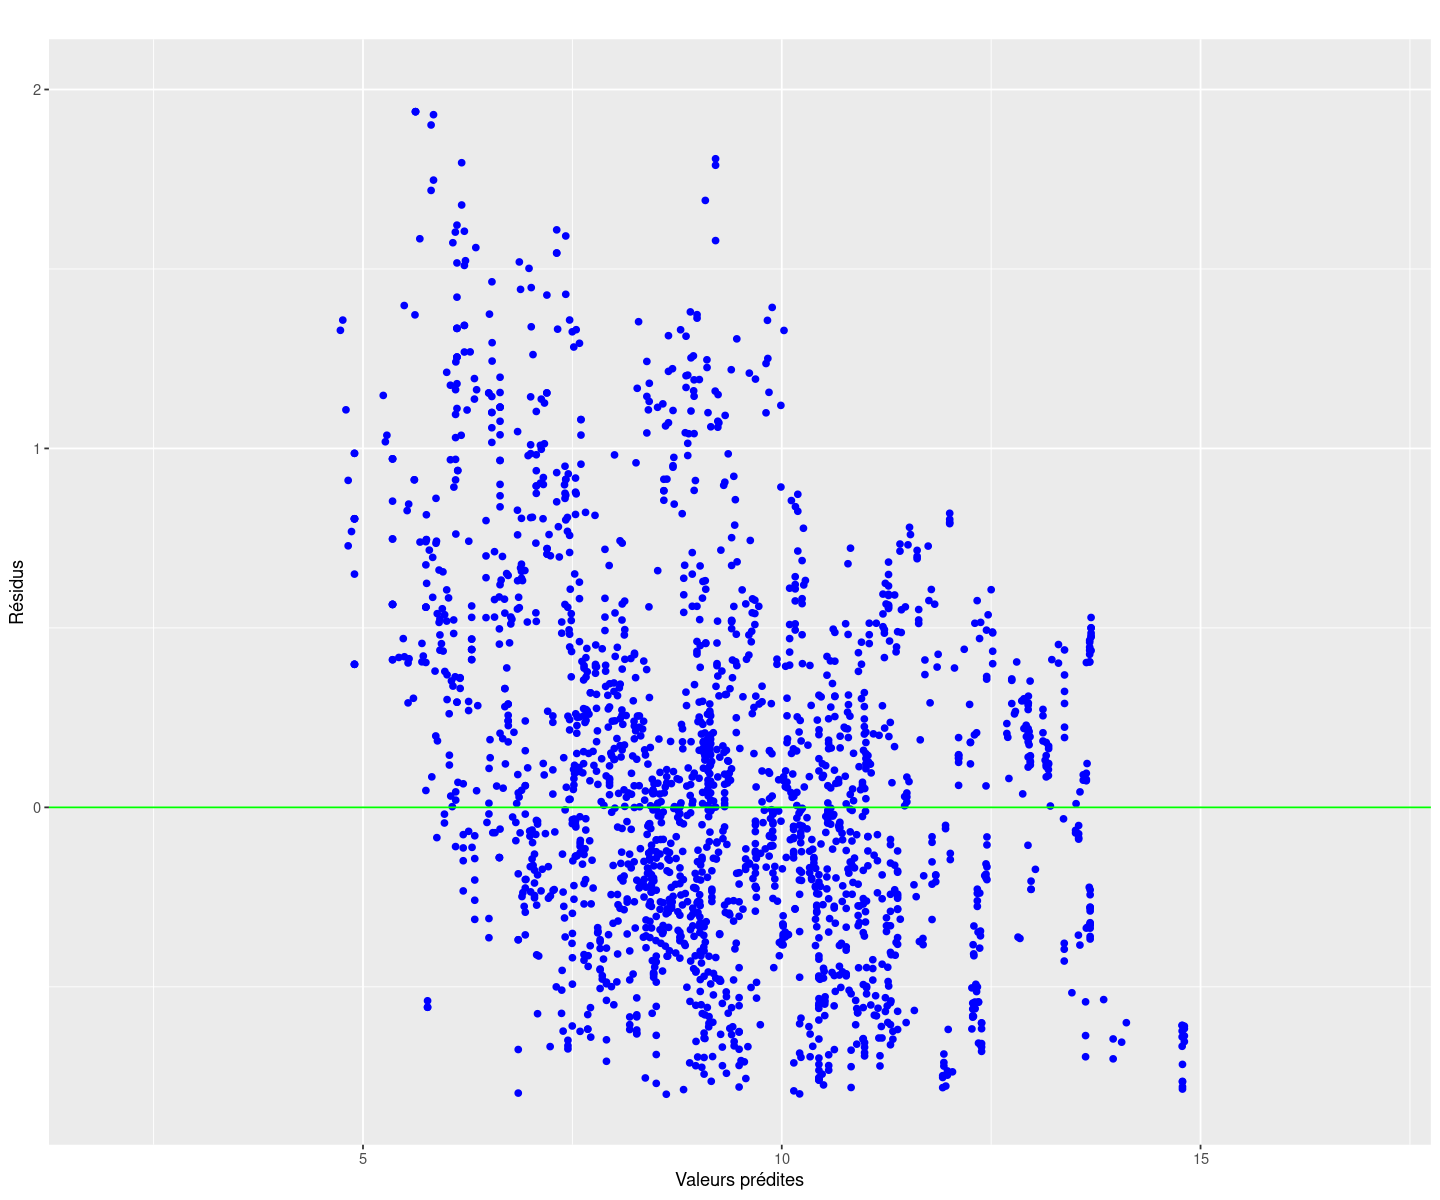

In [177]:
fit.boo=boost.reg$fit
res.boo=fit.boo-datappr[,"SValue_co2"]
gplot.res(fit.boo,res.boo,titre="")

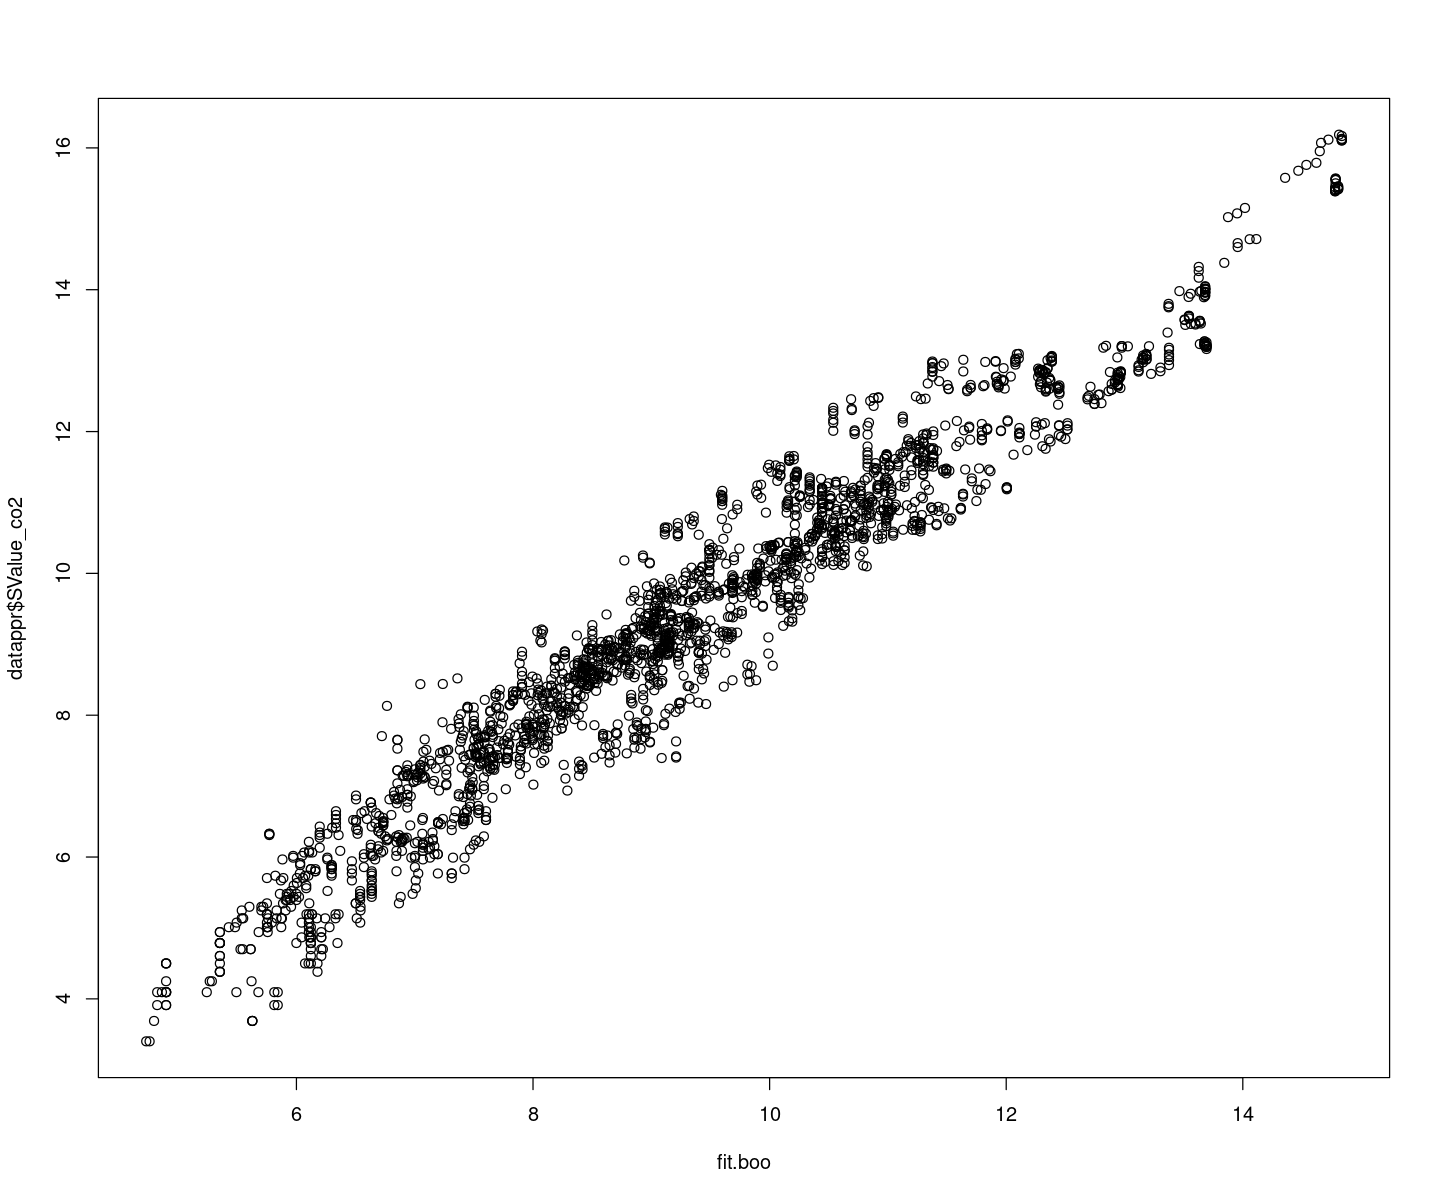

In [178]:
plot(fit.boo,datappr$SValue_co2)

###### MSE et R2

In [179]:
MSE_boo = mean((datappr$SValue_co2 - fit.boo)^2)
paste("MSE =", MSE_boo)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.boo)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_boo <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_boo)

[1] "MSE = 0.396120058189865"

[1] "R2 = 0.929639772054816"

###### Données tests

Using 500 trees...




[1] 0.4116595

Warning message:
“Removed 42 rows containing missing values (`geom_point()`).”


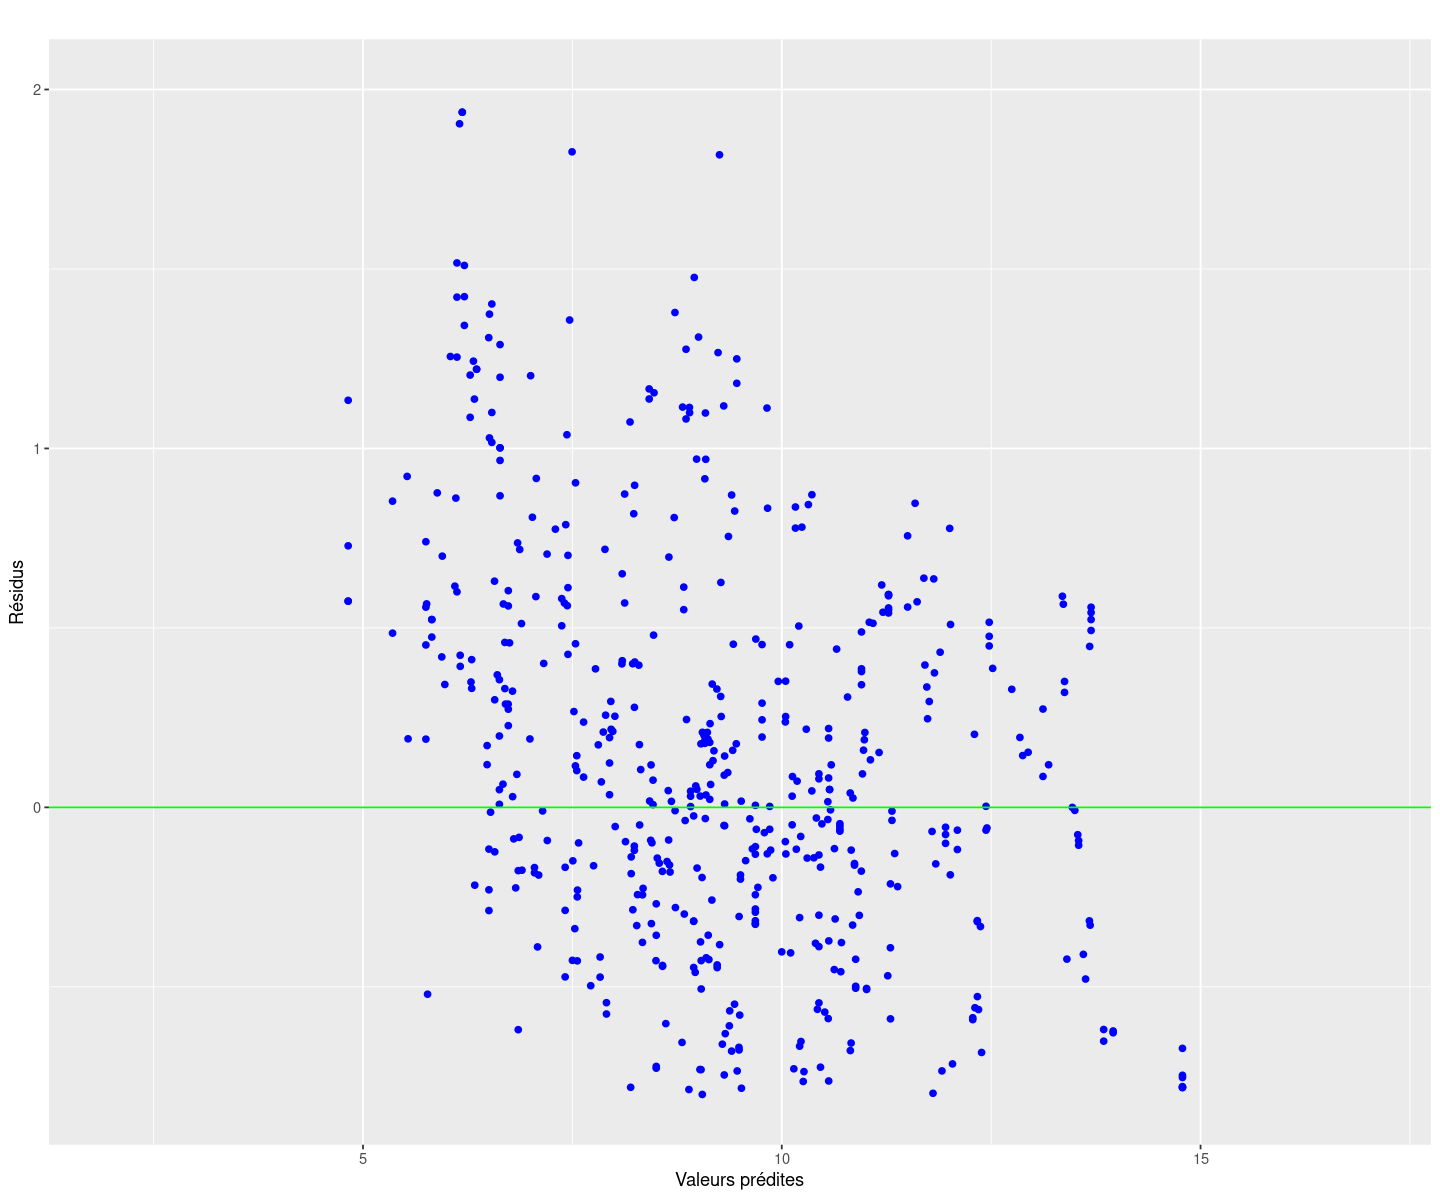

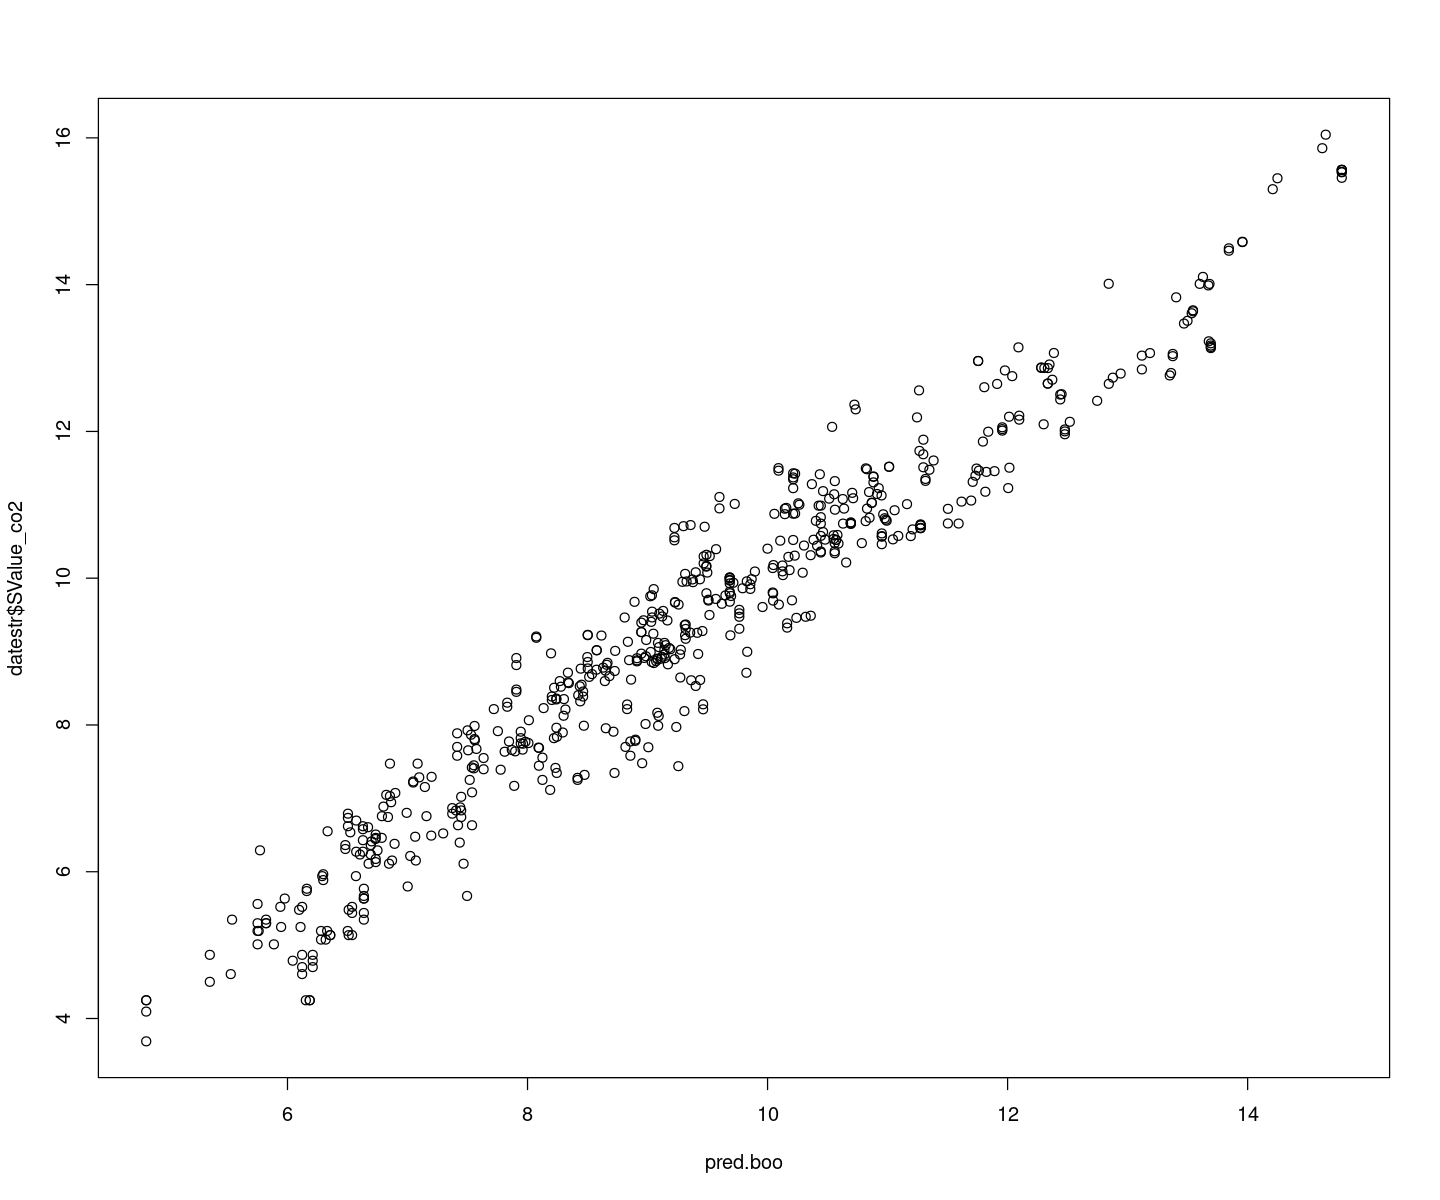

In [180]:
pred.boo=predict(boost.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.boo-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.boo=pred.boo-datestr[,"SValue_co2"]
gplot.res(pred.boo,err.boo,titre="")
plot(pred.boo,datestr$SValue_co2)

### Neural network

#### Sur données d'apprentissage

In [181]:
nnet.reg=nnet(SValue_co2~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  181
initial  value 207078.136163 
iter  10 value 12201.068566
iter  20 value 9205.084383
iter  30 value 8654.630293
iter  40 value 8184.638331
iter  50 value 7389.194547
iter  60 value 6956.576567
iter  70 value 6691.536336
iter  80 value 6291.669882
iter  90 value 4199.662556
iter 100 value 3377.904226
iter 110 value 2989.551245
iter 120 value 2599.827009
iter 130 value 2254.369064
iter 140 value 1711.581500
iter 150 value 1314.327024
iter 160 value 1001.171480
iter 170 value 851.945309
iter 180 value 689.154538
iter 190 value 557.834614
iter 200 value 513.340951
iter 210 value 488.205301
iter 220 value 472.812245
iter 230 value 446.570966
iter 240 value 424.139257
iter 250 value 406.634400
iter 260 value 393.821323
iter 270 value 383.564075
iter 280 value 370.756825
iter 290 value 364.226020
iter 300 value 360.742574
iter 310 value 358.620820
iter 320 value 357.865227
iter 330 value 356.764658
iter 340 value 355.027902
iter 350 value 353.681619
iter 360 value 351.770925
i

a 34-5-1 network with 181 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -0.96   -0.09    0.00    0.01    0.04   -0.01    0.06    0.02   -0.01    0.21 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -0.03   -0.05    0.05    0.00   -0.06   -0.10    0.04    0.10    0.11   -0.03 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 i27->h1 i28->h1 i29->h1 
   0.00   -0.01    0.01    0.00    0.07   -0.03   -0.16   -0.13   -0.20   -0.01 
i30->h1 i31->h1 i32->h1 i33->h1 i34->h1 
  -0.66    0.18    0.47    0.32    0.56 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -6.80    0.06    0.06    0.08   -0.01    0.03   -0.04   -0.08   -0.13   -0.10 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -0.08   -0.14   -0.17   -0.16   -0.15   -0.12   -0.12   -0.11   -0.09   -0.10 
i20->h2 i21->h2 i22->h2 i23->h

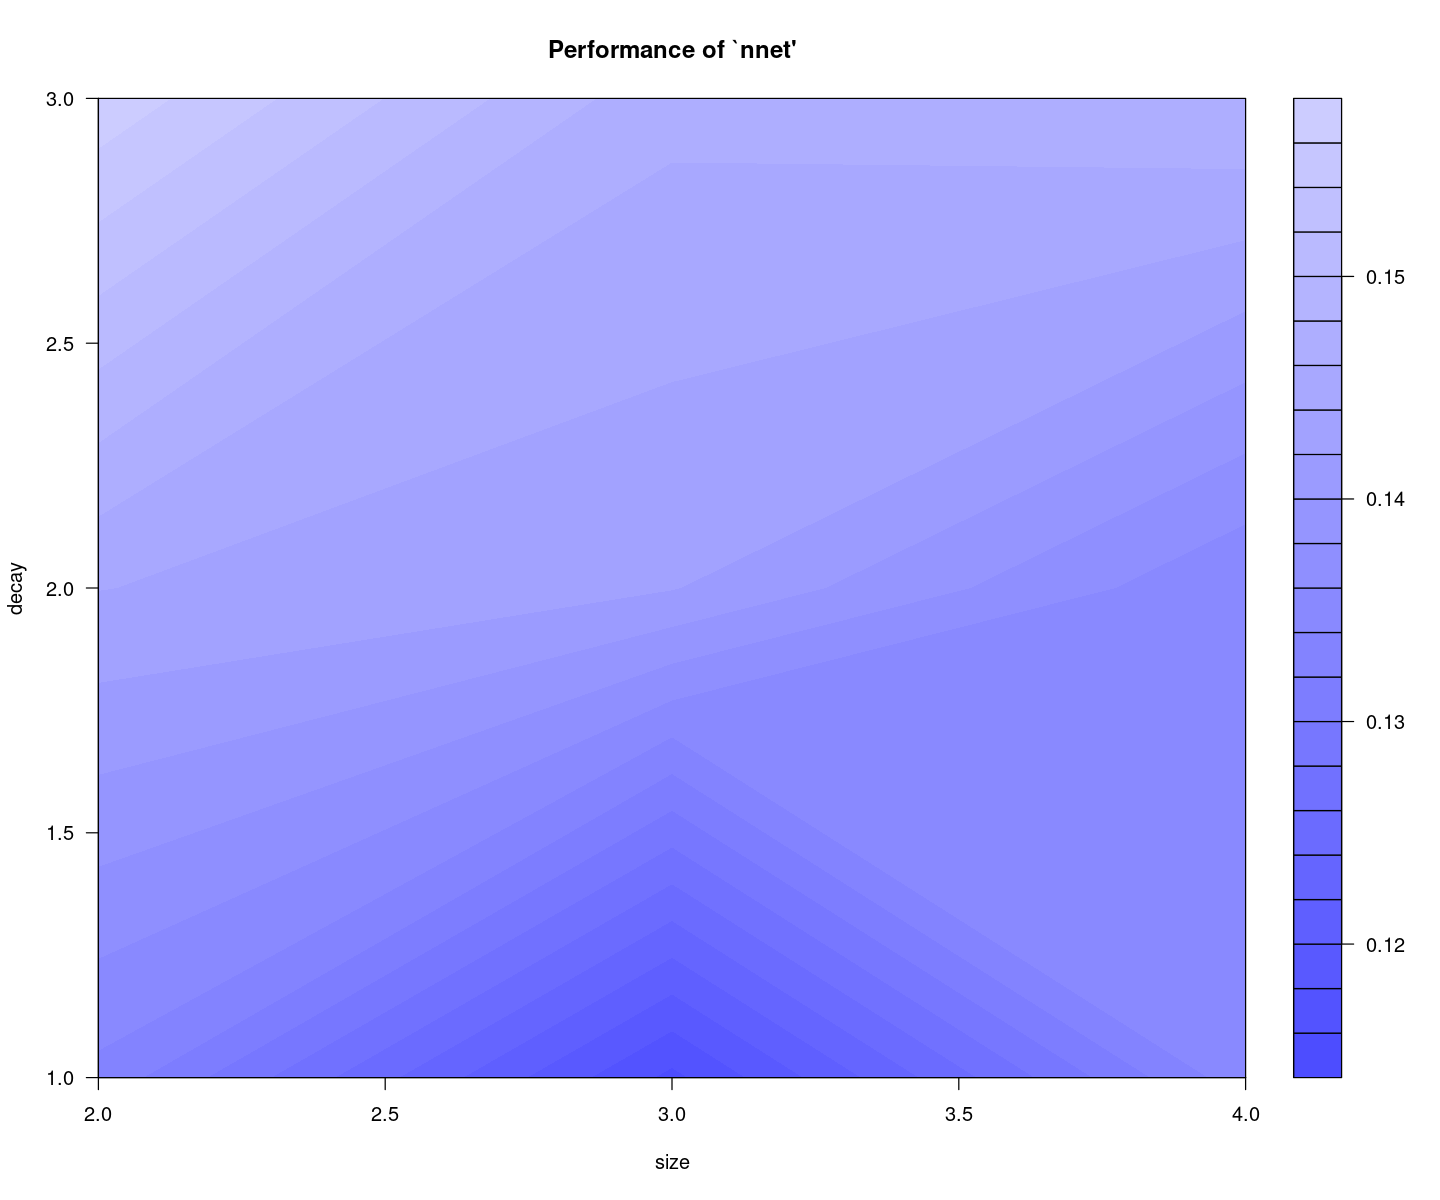

In [182]:
plot(tune.nnet(SValue_co2~.,data=datappr,size=c(2,3,4),decay=c(1,2,3),maxit=200,linout=TRUE))

# weights:  109
initial  value 189540.209593 
iter  10 value 11976.890489
iter  20 value 10910.225971
iter  30 value 8616.020820
iter  40 value 6351.170027
iter  50 value 4537.343605
iter  60 value 3798.259833
iter  70 value 3208.491701
iter  80 value 2786.466436
iter  90 value 2364.529602
iter 100 value 2116.810617
iter 110 value 1927.771347
iter 120 value 1690.984206
iter 130 value 1401.468017
iter 140 value 891.633878
iter 150 value 802.813710
iter 160 value 775.764134
iter 170 value 765.732256
iter 180 value 749.018131
iter 190 value 737.003862
iter 200 value 733.233829
final  value 733.233829 
stopped after 200 iterations


Warning message:
“Removed 46 rows containing missing values (`geom_point()`).”


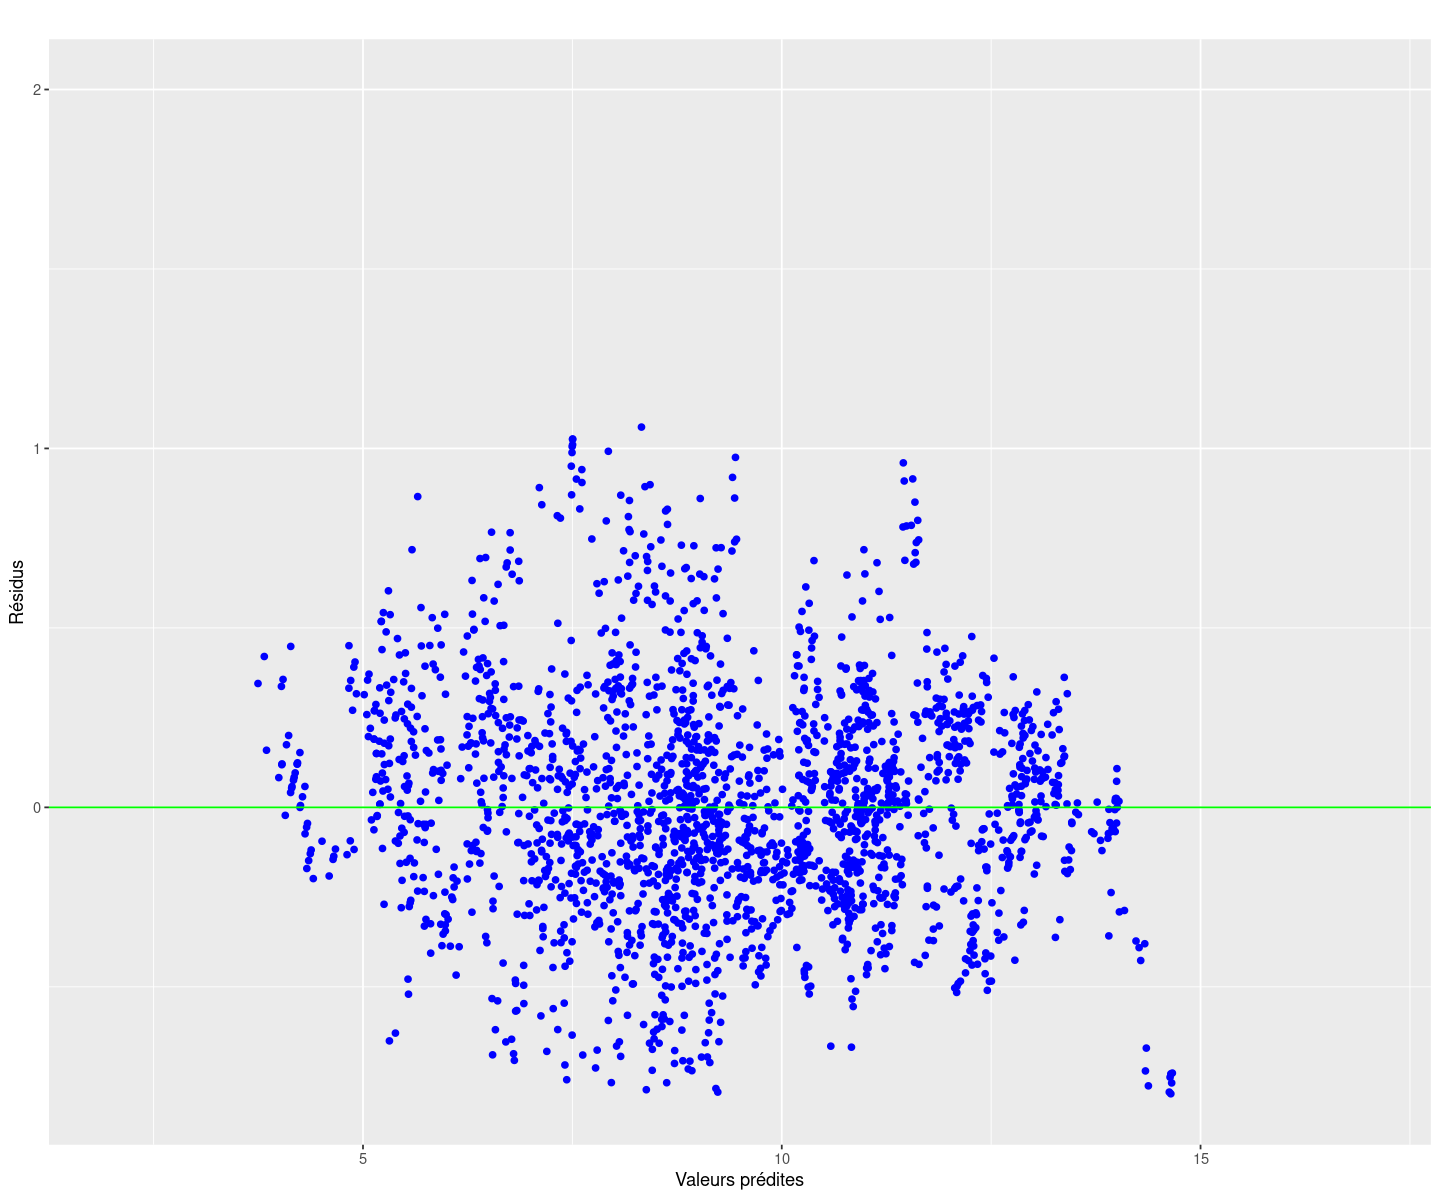

In [183]:
nnet.reg=nnet(SValue_co2~.,data=datappr,size=3,decay=2,linout=TRUE,maxit=200)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"SValue_co2"]
gplot.res(fit.nnetr,res.nnetr,titre="")

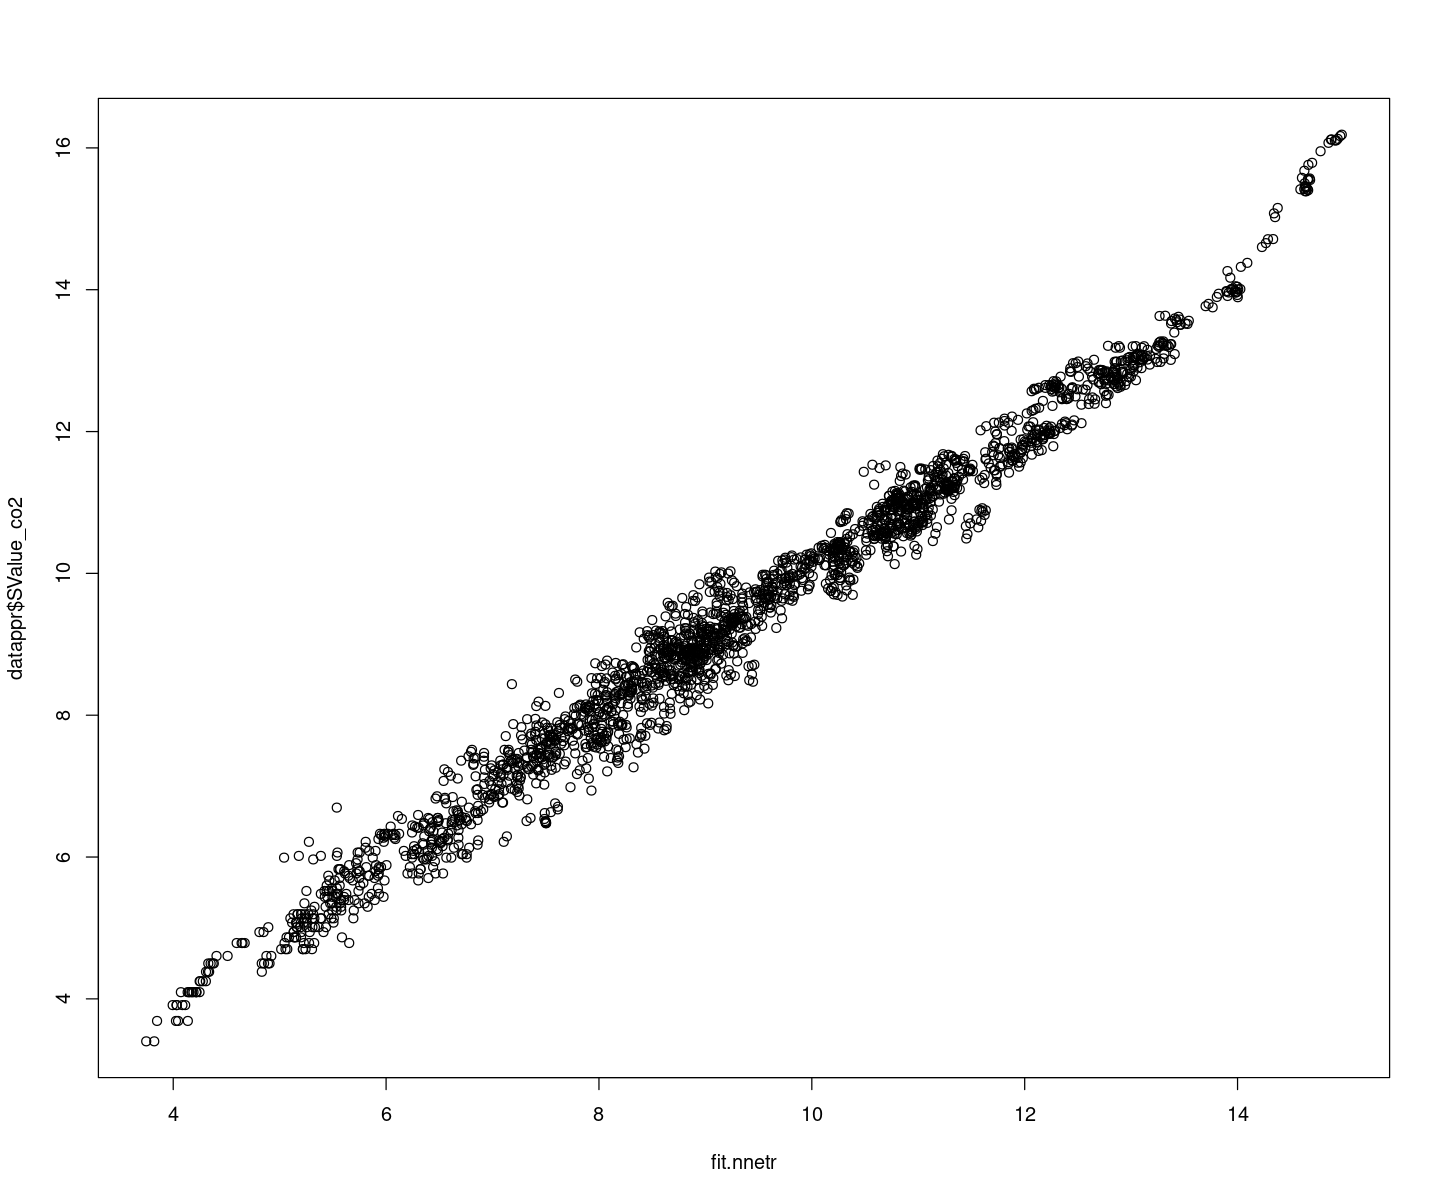

In [184]:
plot(fit.nnetr,datappr$SValue_co2)

##### MSE et R2

In [185]:
MSE_nn = mean((datappr$SValue_co2 - fit.nnetr)^2)
paste("MSE =", MSE_nn)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.nnetr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_nn <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2_nn)

[1] "MSE = 0.113015409595433"

[1] "R2 = 0.979925808309759"

#### Sur données test

[1] 0.126341

Warning message:
“Removed 16 rows containing missing values (`geom_point()`).”


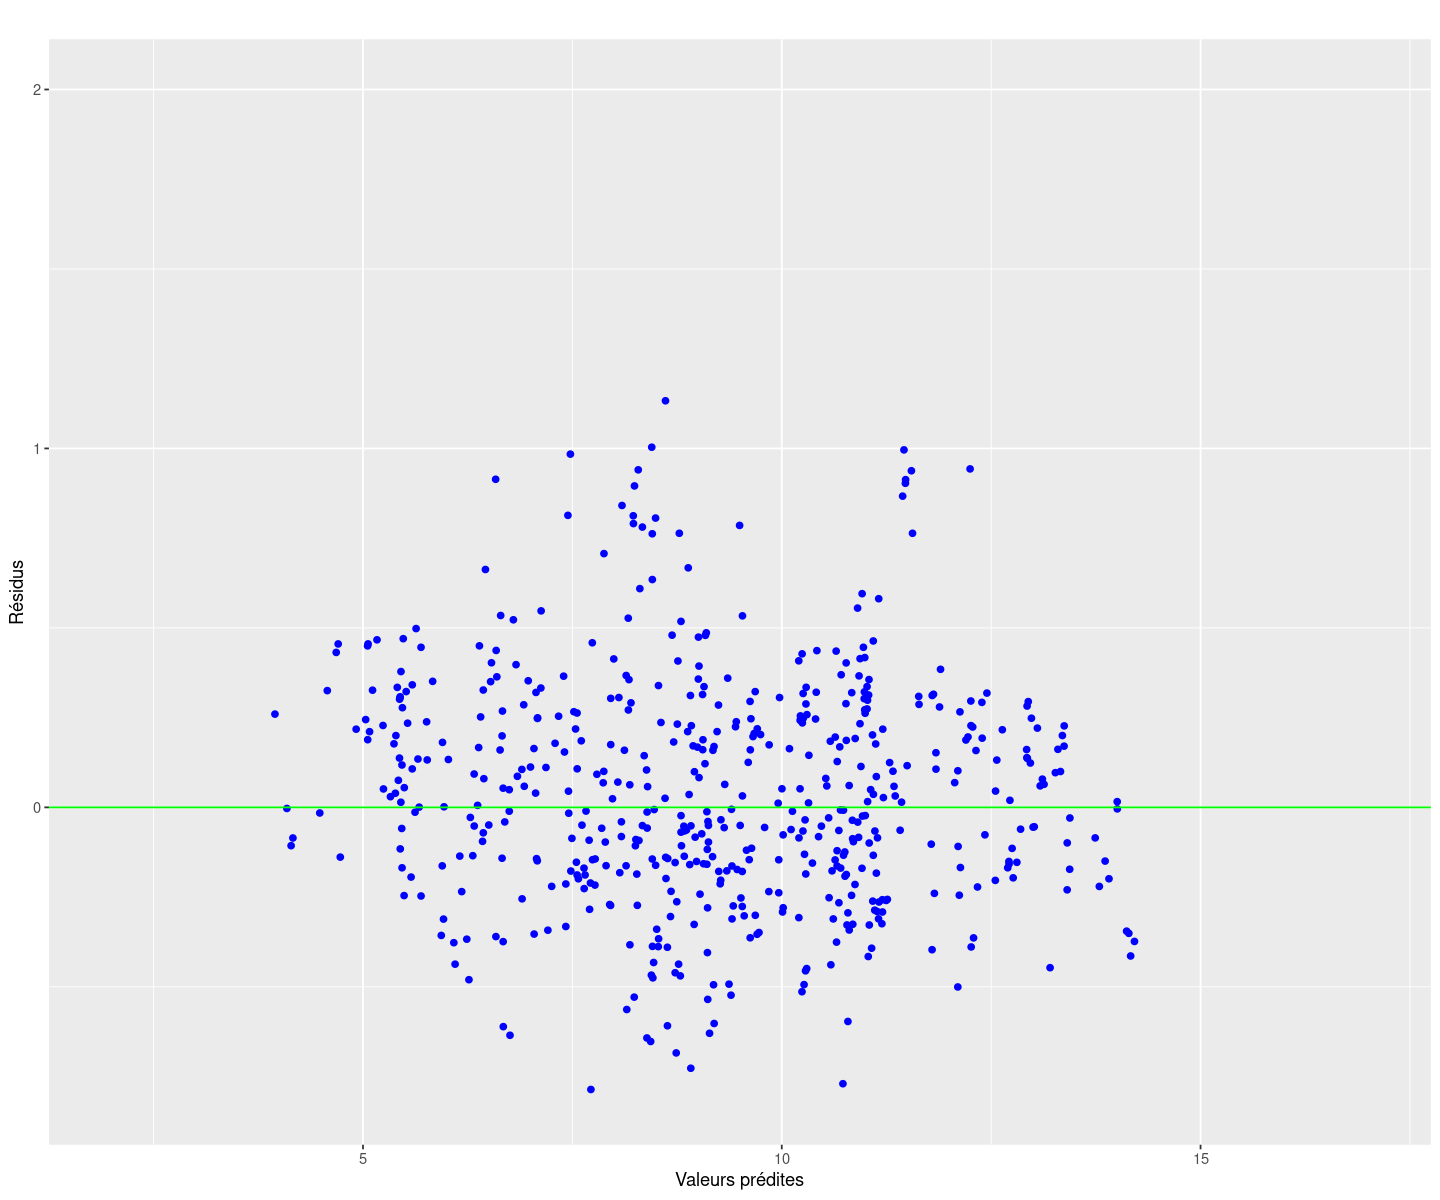

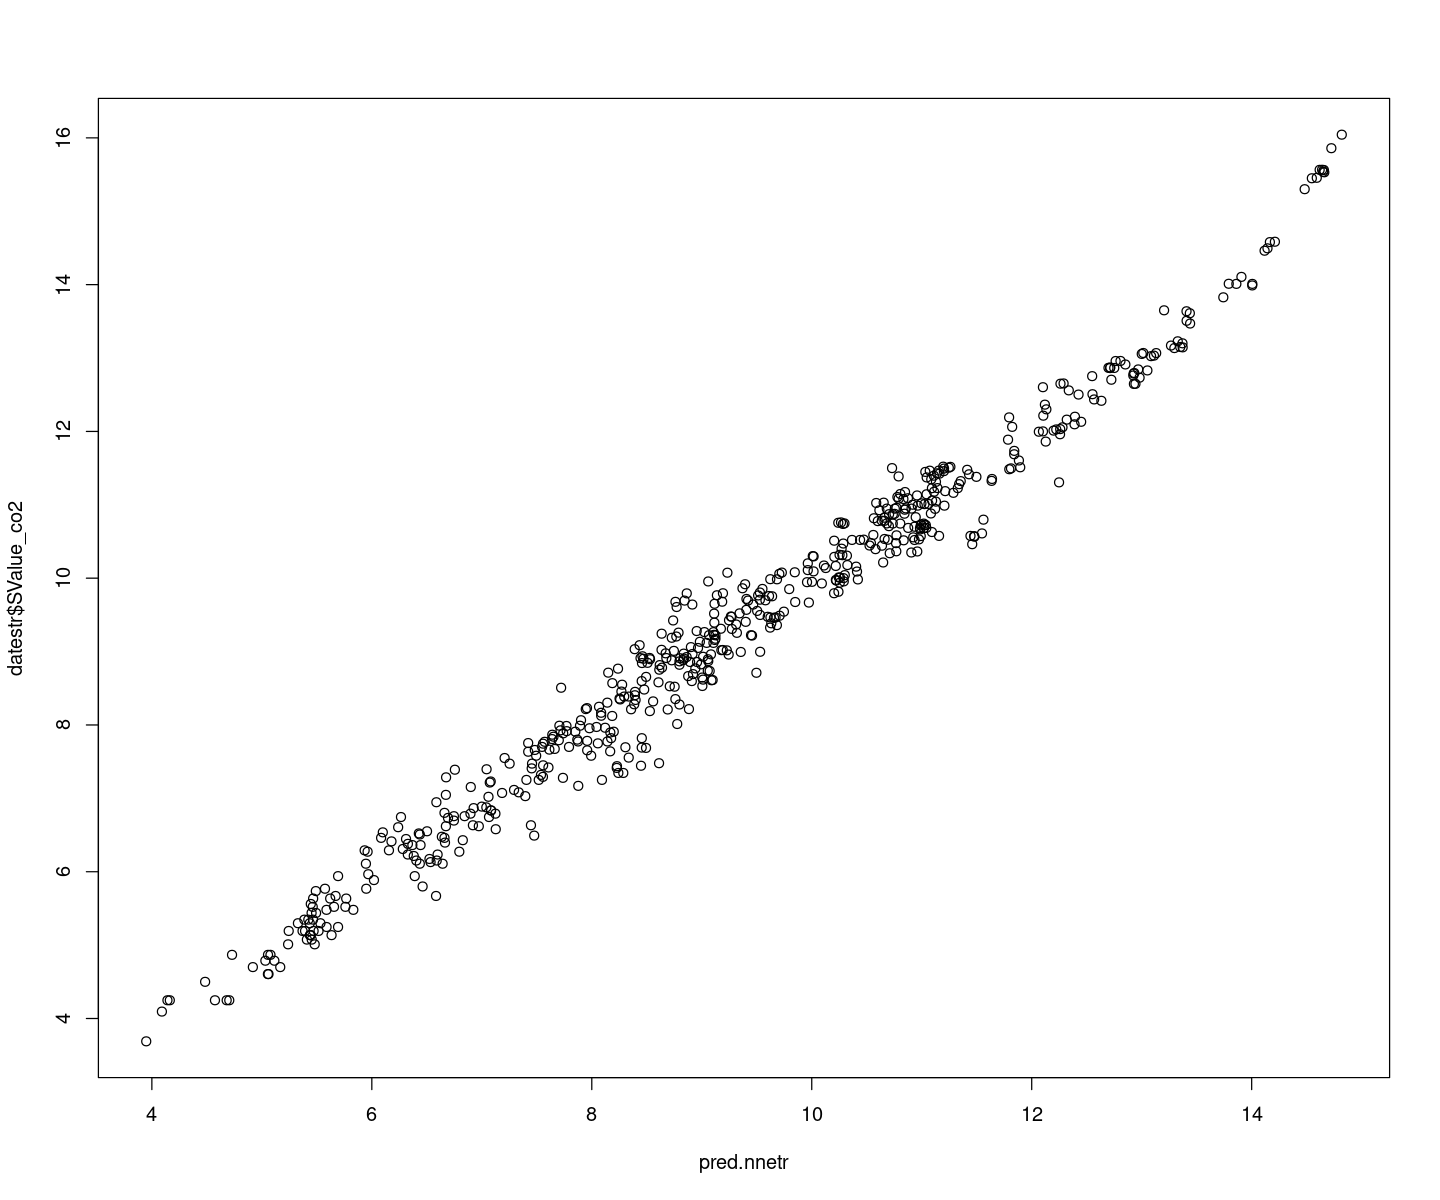

In [186]:
pred.nnetr=predict(nnet.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"SValue_co2"])^2)/nrow(datestr)
err.nnetr=pred.nnetr-datestr[,"SValue_co2"]
gplot.res(pred.nnetr,err.nnetr,titre="")
plot(pred.nnetr,datestr$SValue_co2)

## Question 3

In [187]:
Perf <- data.frame(
  Methode = c("RegLig", "AIC", "LASSO", "SVM", "Arbre","Forêt Aléatoire","Boosting","Neural Network"),
  MSE = c(MSE_rl,MSE_aic,MSE_lse,MSE_svm,MSE_a,MSE_rf,MSE_boo,MSE_nn),
  R2 = c(R2_rl,R2_aic,R2_lse,R2_svm,R2_a,R2_rf,R2_boo,R2_nn)
)

Perf

ERROR: Error in eval(expr, envir, enclos): objet 'MSE_rl' introuvable


### Retour sur l'analyse exploratoire

### Imputation des données manquantes

In [188]:
energyna = energy_pt2

In [189]:
missing = data.frame(colSums(is.na(energyna)))
missing

colSums.is.na.energyna..
Entity             0                     
Year               0                     
Access_elec       10                     
Access_fuels     169                     
Renewable_energy 194                     
Elec_fossil       21                     
Elec_nuclear     126                     
Elec_renew        21                     
Low_carbon        42                     
Primary_energy     0                     
Energy_intensity 207                     
Value_co2        428                     
gdp_growth       317                     
gdp_capita       282                     
Density            1                     
Land_area          1                     
Latitude           1                     
Longitude          1

In [190]:
#On enlève Entity et Year
energynaQuant = energyna[,3:18]
#On enlève Electricity from fossil fuel
energynaQuant = energynaQuant[,-4]
head(energynaQuant)

Access_elec Access_fuels Renewable_energy Elec_nuclear Elec_renew Low_carbon
1  1.613591    6.2         44.99            0            0.31       65.95744  
2  4.074574    7.2         45.60            0            0.50       84.74577  
3  9.409158    8.2         37.83            0            0.56       81.15942  
4 14.738506    9.5         36.66            0            0.63       67.02128  
5 20.064968   10.9         44.24            0            0.56       62.92135  
6 25.390894   12.2         33.88            0            0.59       63.44086  
  Primary_energy Energy_intensity Value_co2 gdp_growth gdp_capita Density
1 302.5948       1.64              760             NA        NA   60     
2 236.8919       1.74              730             NA        NA   60     
3 210.8622       1.40             1030             NA  179.4266   60     
4 229.9682       1.40             1220       8.832278  190.6838   60     
5 204.2312       1.20             1030       1.414118  211.3821   60     
6 252.0691       1.41             1550      11.229715  242.0313   60     
  Land_area Latitude Longitude
1 652230    33.93911 67.70995 
2 652230    33.93911 67.70995 
3 652230    33.93911 67.70995 
4 652230    33.93911 67.70995 
5 652230    33.93911 67.70995 
6 652230    33.93911 67.70995

In [191]:
energynaQuant[, "SAccess_elec"] = log(energynaQuant[, "Access_elec"])
energynaQuant[, "SAccess_fuels"] = log(1+energynaQuant[, "Access_fuels"])
energynaQuant[, "SRenewable_energy"] = sqrt(energynaQuant[, "Renewable_energy"])
energynaQuant[, "SElec_nuclear"] = log(1+energynaQuant[, "Elec_nuclear"])
energynaQuant[, "SElec_renew"] = log(1+energynaQuant[, "Elec_renew"])
energynaQuant[, "SLow_carbon"] = sqrt(energynaQuant[, "Low_carbon"])
energynaQuant[, "SPrimary_energy"] = log(1+energynaQuant[, "Primary_energy"])
energynaQuant[, "SEnergy_intensity"] = log(sqrt(energynaQuant[, "Energy_intensity"]))
energynaQuant[, "Sgdp_capita"] = log(sqrt(energynaQuant[, "gdp_capita"]))
energynaQuant[, "SDensity"] = log(energynaQuant[, "Density"])
energynaQuant[, "SLand_area"] = log(energynaQuant[, "Land_area"])
energynaQuant[, "Svalue_co2"] = log(energynaQuant[, "Value_co2"])
energynaQuant = energynaQuant[-c(1:9,11:13)]


In [192]:
head(energynaQuant)

gdp_growth Latitude Longitude SAccess_elec SAccess_fuels SRenewable_energy
1        NA  33.93911 67.70995  0.4784621    1.974081      6.707459         
2        NA  33.93911 67.70995  1.4047662    2.104134      6.752777         
3        NA  33.93911 67.70995  2.2416835    2.219203      6.150610         
4  8.832278  33.93911 67.70995  2.6904635    2.351375      6.054750         
5  1.414118  33.93911 67.70995  2.9989754    2.476538      6.651316         
6 11.229715  33.93911 67.70995  3.2343906    2.580217      5.820653         
  SElec_nuclear SElec_renew SLow_carbon SPrimary_energy SEnergy_intensity
1 0             0.2700271   8.121419    5.715694        0.24734812       
2 0             0.4054651   9.205746    5.471816        0.27694256       
3 0             0.4446858   9.008853    5.355936        0.16823612       
4 0             0.4885800   8.186653    5.442280        0.16823612       
5 0             0.4446858   7.932298    5.324137        0.09116078       
6 0             0.4637340   7.964977    5.533663        0.17179485       
  Sgdp_capita SDensity SLand_area Svalue_co2
1       NA    4.094345 13.38815   6.633318  
2       NA    4.094345 13.38815   6.593045  
3 2.594883    4.094345 13.38815   6.937314  
4 2.625308    4.094345 13.38815   7.106606  
5 2.676834    4.094345 13.38815   6.937314  
6 2.744534    4.094345 13.38815   7.346010

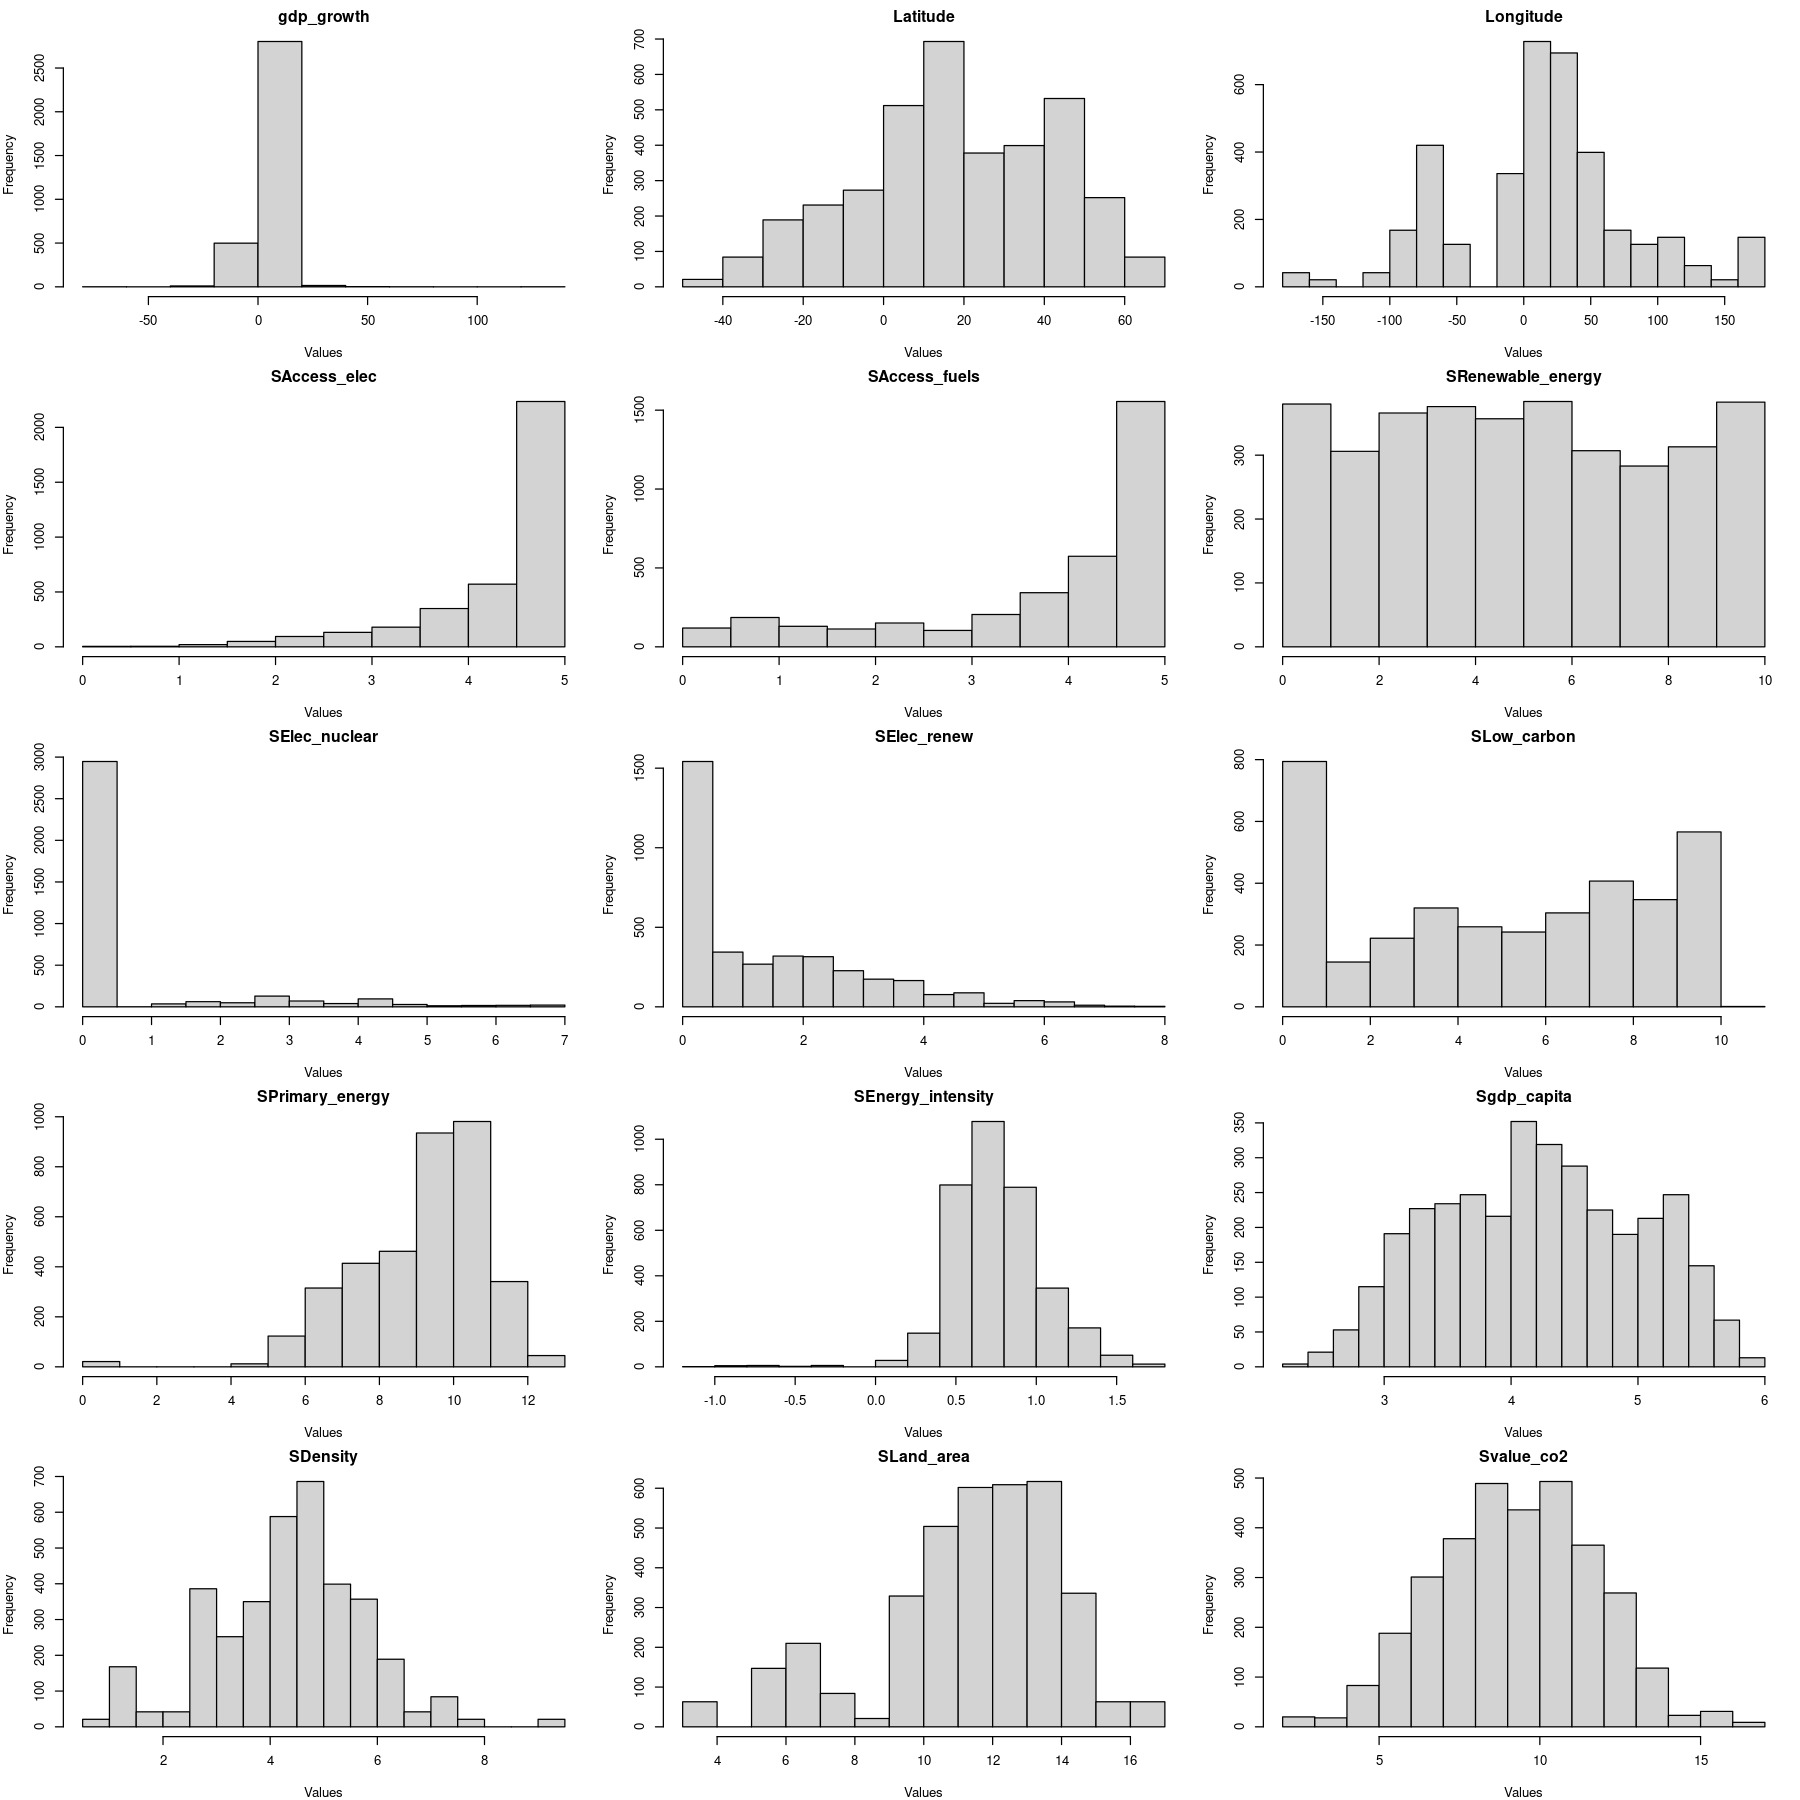

In [193]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow = c(5,3) , mar = c(4,4,2,1))

for (i in 1:length(names(energynaQuant))) {
    dfi = energynaQuant[,c(i)]
    hist(dfi, main=names(energynaQuant)[i],xlab='Values')
}

### Imputation mediane au cas ou 

In [194]:
# Mediane
med=apply(energynaQuant,2,median,na.rm=TRUE)

E.med = energynaQuant

#On cherche l'indices où c'est vide
ind.na=which(is.na(E.med),arr.ind=TRUE)

#On affect
E.med[ind.na]=med[ind.na[,2]]

missing_rates = data.frame(colSums(is.na(E.med)))
missing_rates

colSums.is.na.E.med..
gdp_growth        0                    
Latitude          0                    
Longitude         0                    
SAccess_elec      0                    
SAccess_fuels     0                    
SRenewable_energy 0                    
SElec_nuclear     0                    
SElec_renew       0                    
SLow_carbon       0                    
SPrimary_energy   0                    
SEnergy_intensity 0                    
Sgdp_capita       0                    
SDensity          0                    
SLand_area        0                    
Svalue_co2        0

### Imputation KNN

In [195]:
library(VIM)
# Mediane

E.knn = kNN(energynaQuant, k=5, imp_var=FALSE)

missing_rates = data.frame(colSums(is.na(E.knn)))
missing_rates

Le chargement a nécessité le package : colorspace


Attachement du package : ‘colorspace’


L'objet suivant est masqué depuis ‘package:pROC’:

    coords


VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attachement du package : ‘VIM’


L'objet suivant est masqué depuis ‘package:datasets’:

    sleep




colSums.is.na.E.knn..
gdp_growth        0                    
Latitude          0                    
Longitude         0                    
SAccess_elec      0                    
SAccess_fuels     0                    
SRenewable_energy 0                    
SElec_nuclear     0                    
SElec_renew       0                    
SLow_carbon       0                    
SPrimary_energy   0                    
SEnergy_intensity 0                    
Sgdp_capita       0                    
SDensity          0                    
SLand_area        0                    
Svalue_co2        0

### Complétion avec Missforest 

In [196]:
library(missForest)


Attachement du package : ‘missForest’


L'objet suivant est masqué depuis ‘package:VIM’:

    nrmse




In [197]:
XnaImp=missForest(energynaQuant,verbose=TRUE)

  missForest iteration 1 in progress...done!
    estimated error(s): 0.1730747 
    difference(s): 0.0005019246 
    time: 25.417 seconds

  missForest iteration 2 in progress...done!
    estimated error(s): 0.1450636 
    difference(s): 0.0001402756 
    time: 25.991 seconds

  missForest iteration 3 in progress...done!
    estimated error(s): 0.1411128 
    difference(s): 2.067165e-05 
    time: 26.115 seconds

  missForest iteration 4 in progress...done!
    estimated error(s): 0.1462261 
    difference(s): 2.096188e-05 
    time: 25.612 seconds

